In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import os
print(os.getcwd())


C:\Users\DELL


In [5]:
from pathlib import Path

# Tentukan path menuju folder intermediate
folder_path = Path.home() / 'Desktop' / 'Growia DA' / 'Modul 9 (Tugas Akhir)' / 'intermediate'

# Pastikan folder_path benar-benar ada
if folder_path.exists() and folder_path.is_dir():
    # Ambil daftar file di dalam folder tersebut
    files = [file.name for file in folder_path.iterdir() if file.is_file()]
    
    # Menampilkan daftar file
    if files:
        print("Daftar file di dalam folder 'intermediate':")
        for file in files:
            print(file)
    else:
        print("Tidak ada file di dalam folder 'intermediate'.")
else:
    print(f"Folder '{folder_path}' tidak ditemukan.")




Daftar file di dalam folder 'intermediate':
analysis-sales-transaction.ipynb
GrowiaIntermediate-230918-135015.ipynb
SalesTransactionv4a-230918-164139.csv


In [24]:
import os
import pandas as pd
from pathlib import Path
from IPython.display import display  # Import display untuk menampilkan DataFrame

# Tentukan path folder yang dicurigai (folder Growia DA di Desktop)
folder_path = Path(r'C:\Users\DELL\Desktop\Growia DA\Modul 9 (Tugas Akhir)\Intermediate')

# Cek apakah folder ada
if folder_path.exists() and folder_path.is_dir():
    # Mencari file CSV dalam folder ini
    file_name = 'SalesTransactionv4a-230918-164139.csv'  # Nama file sesuai dengan yang ditemukan
    file_path = folder_path / file_name  # Menggabungkan path folder dengan nama file
    
    # Cek apakah file ada di folder ini
    if file_path.exists():
        try:
            # Membaca file CSV
            df_sales = pd.read_csv(file_path)
            
            # Menampilkan sampel data untuk memastikan file terbaca dengan baik
            display(df_sales.sample(5))  # Menampilkan 2 baris data sampel dari DataFrame
            
            # Menampilkan seluruh DataFrame dalam bentuk tabel
            display(df_sales)  # Menampilkan DataFrame secara lebih baik dalam bentuk tabel di Jupyter Lab
            
        except Exception as e:
            print(f"Terjadi error saat membaca file CSV: {e}")
else:
    print(f"Folder tidak ditemukan di: {folder_path}")




TransactionNo        Date ProductNo                       ProductName  \
464554        542219   1/26/2019     22131   Food Container Set 3 Love Heart   
393174        548870    4/4/2019     21539         Red Retrospot Butter Dish   
87351        C575588  11/10/2019     22178   Victorian Glass Hanging T-Light   
202990        566400   9/12/2019     23265  Set Of 3 Wooden Tree Decorations   
380573        550278   4/15/2019     22730        Alarm Clock Bakelike Ivory   

        Price  Quantity  CustomerNo         Country  
464554  12.25         6     17735.0  United Kingdom  
393174  15.32         1     14606.0  United Kingdom  
87351   11.94        -6     14064.0  United Kingdom  
202990  11.53        12     17139.0  United Kingdom  
380573  18.75         1     12278.0  United Kingdom

TransactionNo       Date ProductNo  \
0             581482  12/9/2019     22485   
1             581475  12/9/2019     22596   
2             581475  12/9/2019     23235   
3             581475  12/9/2019     23272   
4             581475  12/9/2019     23239   
...              ...        ...       ...   
536345       C536548  12/1/2018     22168   
536346       C536548  12/1/2018     21218   
536347       C536548  12/1/2018     20957   
536348       C536548  12/1/2018     22580   
536349       C536548  12/1/2018     22767   

                                ProductName  Price  Quantity  CustomerNo  \
0             Set Of 2 Wooden Market Crates  21.47        12     17490.0   
1       Christmas Star Wish List Chalkboard  10.65        36     13069.0   
2                  Storage Tin Vintage Leaf  11.53        12     13069.0   
3         Tree T-Light Holder Willie Winkie  10.65        12     13069.0   
4         Set Of 4 Knick Knack Tins Poppies  11.94         6     13069.0   
...                                     ...    ...       ...         ...   
536345         Organiser Wood Antique White  18.96        -2     12472.0   
536346               Red Spotty Biscuit Tin  14.09        -3     12472.0   
536347         Porcelain Hanging Bell Small  11.74        -1     12472.0   
536348         Advent Calendar Gingham Sack  16.35        -4     12472.0   
536349           Triple Photo Frame Cornice  20.45        -2     12472.0   

               Country  
0       United Kingdom  
1       United Kingdom  
2       United Kingdom  
3       United Kingdom  
4       United Kingdom  
...                ...  
536345         Germany  
536346         Germany  
536347         Germany  
536348         Germany  
536349         Germany  

[536350 rows x 8 columns]

In [2]:
# Langkah 1: Impor library yang diperlukan
import pandas as pd

# Langkah 2: Baca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
data = pd.read_csv(file_path)

# Langkah 3: Hitung jumlah transaksi yang unik
jumlah_transaksi = data['TransactionNo'].nunique()

# Langkah 4: Hitung jumlah pelanggan yang unik
jumlah_pelanggan = data['CustomerNo'].nunique()

# Output hasil
print(f'Jumlah Transaksi: {jumlah_transaksi}')
print(f'Jumlah Pelanggan: {jumlah_pelanggan}')


Jumlah Transaksi: 23204
Jumlah Pelanggan: 4738


# Data Cleansing

Eksekusi 2 Code dibawah ini 

In [44]:
# 1. Ubah kolom Date menjadi tipe datetime
df_sales['Date']= pd.to_datetime(df_sales['Date'])

# 2. Buang semua transaksi yang memiliki quantity negative atau yang TransactionNo diawali dengan C
df_sales = df_sales[df_sales['TransactionNo'].str[0]!='C']

In [45]:
# cek missing values
df_sales.isna().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       1
Country          0
dtype: int64

# 1. Top Contributing products

Pada retail store, ada banyak jenis barang yang dijual. Memahami karakteristik penjualan di setiap barang sangatlah penting.
Barang-barang dengan minat tinggi dari customer menjadi kunci bisnis untuk meraih untung. Barang-barang dengan minat rendah dari masyarakat akan menjadi beban dari usaha apabila bisnis menyetok terlalu banyak.

Salah satu metode segmentasi yang digunakan adalah menggunakan segmentasi berdasarkan - :

Volume transaksi : Berapa banyak transaksi yang melibatkan suatu produk (Tidak mempedulikan banyaknya barang dalam 1 transa- ksi)
Revenue total : Berapa dolar revenue yang dihasilkan dari penjualan produk ini.
Buatlah segmentasi produk berdasarkan volume dan revenue total dengan aturan sebagai beri1. kut :

total_revenue didefinisikan sebagai perkalian harga barang dengan banyaknya p2. embelian
20% produk dengan volume transaksi transaksi tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kateg3. ori "Low"
20% produk dengan total revenue tertinggi masuk kategori "Popular". 20 - 80% Masuk kategori "Normal" dan sisanya masuk ke kate4. gori "Low"
Berdasarkan penggabungan segmentasi no.2 dan no.3, apabila suatu produk Popular dari segi volume transaksi dan total revenue, maka segmentasi final dari produk tersebut adalah "Super Popular". Apabila salah satu atribut populer sementara atribut lainnya normal, maka segmentasi finalnya adalah "Popular". Apabila kedua atributnya "Low", maka segmentasi finalnya adalah "Low". Semua kombinasi lain selain yang dri "Normal".ori "Normal". suk ke kateg

Pertanyaan1. 
Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019?2. 
Apakah barang yang populer di November 2019 sama dengan barang yang populer d3. i
Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July ?ori "Normal"

## 1.1 Segmentasi produk berdasarkan volume dan revenue total

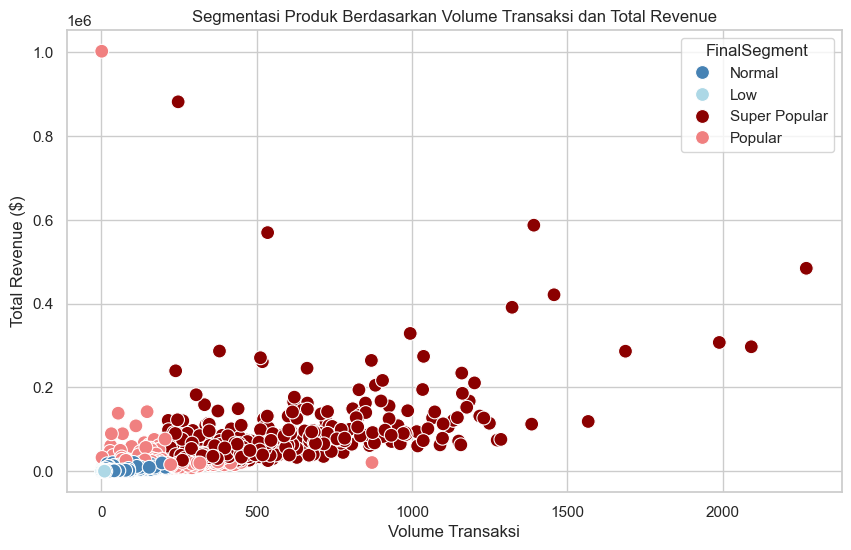

ProductNo                   ProductName  Volume  TotalRevenue VolumeSegment  \
0     10002    Inflatable Political Globe      71       9592.81        Normal   
1     10080      Groovy Cactus Inflatable      22       3227.89        Normal   
2     10120                  Doggy Rubber      29       1977.77        Normal   
3    10123C          Hearts Wrapping Tape       3         54.60           Low   
4    10124A   Spots On Red Bookcover Tape       5        170.88           Low   
5    10124G      Army Camo Bookcover Tape       4        181.56           Low   
6     10125       Mini Funky Design Tapes      91      14173.28        Normal   
7     10133  Colouring Pencils Brown Tube     331      55471.14       Popular   
8     11001   Asstd Design Racing Car Pen     113      18557.96        Normal   
9     15030               Fan Black Frame      12       1499.93           Low   

  RevenueSegment   FinalSegment  
0         Normal         Normal  
1         Normal         Normal  
2         Normal         Normal  
3            Low            Low  
4            Low            Low  
5            Low            Low  
6         Normal         Normal  
7        Popular  Super Popular  
8         Normal         Normal  
9         Normal         Normal

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualization style
sns.set(style="whitegrid")

# 1. Load the dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Cek beberapa data teratas untuk memahami struktur dataset
# display(df.head())  # Menghindari output yang tidak diinginkan

# 2. Memeriksa Nama Kolom yang Tersedia (Menampilkan nama kolom yang ada)
# print(df.columns)  # Jika Anda ingin memeriksa kolom, uncomment baris ini

# 3. Data Cleaning (Menghapus nilai yang tidak valid)
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

# Menghilangkan kolom yang memiliki missing values terlalu banyak
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# Pastikan tidak ada missing values setelah dibersihkan
# print(df.isnull().sum())

# 4. Hitung Volume Transaksi dan Total Revenue
df_volume = df.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

# Menghitung Total Revenue (harga * quantity per transaksi)
df['TotalRevenue'] = df['Price'] * df['Quantity']

# Menghitung total revenue per produk
df_revenue = df.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Menggabungkan data volume dan revenue
df_segmentasi = pd.merge(df_volume, df_revenue, on='ProductNo')

# 5. Segmentasi Berdasarkan Volume Transaksi
volume_quantiles = df_segmentasi['Volume'].quantile([0.2, 0.8])

def volume_segment(row, quantiles):
    if row['Volume'] >= quantiles[0.8]:
        return 'Popular'
    elif row['Volume'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['VolumeSegment'] = df_segmentasi.apply(lambda row: volume_segment(row, volume_quantiles), axis=1)

# 6. Segmentasi Berdasarkan Total Revenue
revenue_quantiles = df_segmentasi['TotalRevenue'].quantile([0.2, 0.8])

def revenue_segment(row, quantiles):
    if row['TotalRevenue'] >= quantiles[0.8]:
        return 'Popular'
    elif row['TotalRevenue'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['RevenueSegment'] = df_segmentasi.apply(lambda row: revenue_segment(row, revenue_quantiles), axis=1)

# 7. Segmentasi Final Berdasarkan Kombinasi Volume dan Revenue
def final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif row['VolumeSegment'] == 'Popular' or row['RevenueSegment'] == 'Popular':
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['FinalSegment'] = df_segmentasi.apply(lambda row: final_segment(row), axis=1)

# 8. Menghindari kategori 'Segmen' yang tidak diinginkan
df_segmentasi = df_segmentasi[df_segmentasi['FinalSegment'] != 'Segmen']

# 9. Menambahkan kolom "ProductName" dari dataset awal
df_product_name = df[['ProductNo', 'ProductName']].drop_duplicates()  # Mengambil hanya baris unik dari ProductNo dan ProductName
df_segmentasi = pd.merge(df_segmentasi, df_product_name, on='ProductNo', how='left')

# 10. Menentukan warna khusus untuk setiap kategori final
final_segment_colors = {
    'Super Popular': 'darkred',   # Merah tua untuk Super Popular
    'Popular': 'lightcoral',      # Merah muda untuk Popular
    'Normal': 'steelblue',        # Biru tua untuk Normal
    'Low': 'lightblue',           # Biru muda untuk Low
}

# 11. Visualisasi Segmentasi Produk dengan Penyesuaian Warna dan Menghilangkan "Segmen"
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_segmentasi,
    x='Volume', 
    y='TotalRevenue', 
    hue='FinalSegment', 
    palette=final_segment_colors,   # Menggunakan palet warna kustom
    s=100
)

# Menambahkan judul dan label
plt.title('Segmentasi Produk Berdasarkan Volume Transaksi dan Total Revenue')
plt.xlabel('Volume Transaksi')
plt.ylabel('Total Revenue ($)')


# Menampilkan plot
plt.show()

# 12. Menampilkan Tabel Hasil Segmentasi dengan IPython display
# Menambahkan kolom ProductName pada tabel yang ditampilkan
display(df_segmentasi[['ProductNo', 'ProductName', 'Volume', 'TotalRevenue', 'VolumeSegment', 'RevenueSegment', 'FinalSegment']].head(10))


## 1.2 Proporsi Pembagian Segmentasi Produk dalam bentuk Persentase

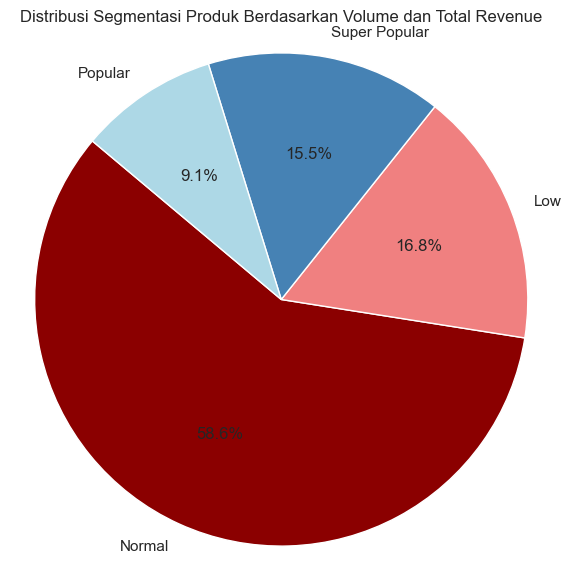

FinalSegment
Normal           2200
Low               630
Super Popular     581
Popular           342
Name: count, dtype: int64


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# 1. Load the dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# 2. Data Cleaning (Menghapus nilai yang tidak valid)
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

# Menghilangkan kolom yang memiliki missing values terlalu banyak
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# 3. Hitung Volume Transaksi dan Total Revenue
df_volume = df.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

# Menghitung Total Revenue (harga * quantity per transaksi)
df['TotalRevenue'] = df['Price'] * df['Quantity']

# Menghitung total revenue per produk
df_revenue = df.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Menggabungkan data volume dan revenue
df_segmentasi = pd.merge(df_volume, df_revenue, on='ProductNo')

# 4. Segmentasi Berdasarkan Volume Transaksi
volume_quantiles = df_segmentasi['Volume'].quantile([0.2, 0.8])

def volume_segment(row, quantiles):
    if row['Volume'] >= quantiles[0.8]:
        return 'Popular'
    elif row['Volume'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['VolumeSegment'] = df_segmentasi.apply(lambda row: volume_segment(row, volume_quantiles), axis=1)

# 5. Segmentasi Berdasarkan Total Revenue
revenue_quantiles = df_segmentasi['TotalRevenue'].quantile([0.2, 0.8])

def revenue_segment(row, quantiles):
    if row['TotalRevenue'] >= quantiles[0.8]:
        return 'Popular'
    elif row['TotalRevenue'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['RevenueSegment'] = df_segmentasi.apply(lambda row: revenue_segment(row, revenue_quantiles), axis=1)

# 6. Segmentasi Final Berdasarkan Kombinasi Volume dan Revenue
def final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif row['VolumeSegment'] == 'Popular' or row['RevenueSegment'] == 'Popular':
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['FinalSegment'] = df_segmentasi.apply(lambda row: final_segment(row), axis=1)

# 7. Visualisasi Segmentasi Produk dalam Bentuk Pie Chart
# Hitung jumlah produk dalam setiap kategori segmentasi final
segment_count = df_segmentasi['FinalSegment'].value_counts()

# Membuat Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(segment_count, labels=segment_count.index, autopct='%1.1f%%', startangle=140, colors=['darkred', 'lightcoral', 'steelblue', 'lightblue'])
plt.title('Distribusi Segmentasi Produk Berdasarkan Volume dan Total Revenue')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

# Menampilkan jumlah produk dalam setiap kategori
print(segment_count)


## 1.3 Menghitung jumlah produk di setiap kategori segmentasi final

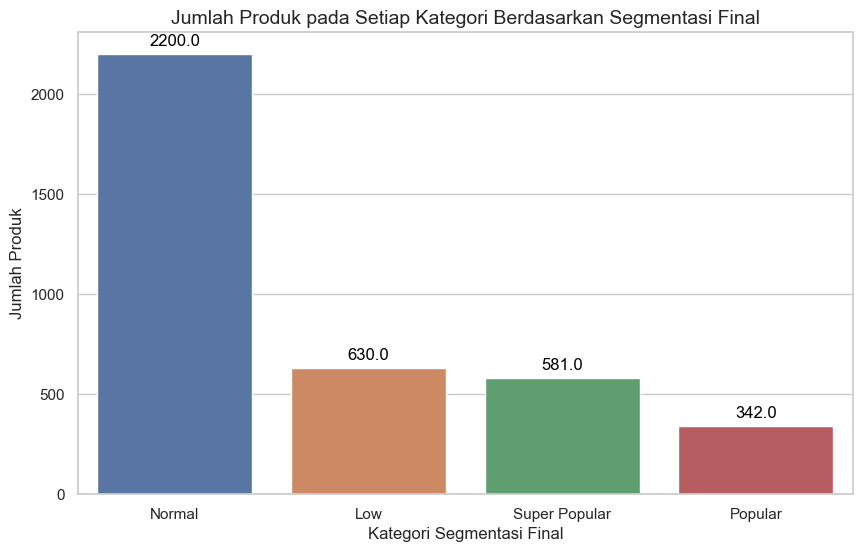

FinalSegment
Normal           2200
Low               630
Super Popular     581
Popular           342
Name: count, dtype: int64


In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style="whitegrid")

# 1. Load the dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# 2. Data Cleaning (Menghapus nilai yang tidak valid)
df = df[df['Quantity'] > 0]
df = df[df['Price'] > 0]

# Menghilangkan kolom yang memiliki missing values terlalu banyak
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# 3. Hitung Volume Transaksi dan Total Revenue
df_volume = df.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

# Menghitung Total Revenue (harga * quantity per transaksi)
df['TotalRevenue'] = df['Price'] * df['Quantity']

# Menghitung total revenue per produk
df_revenue = df.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Menggabungkan data volume dan revenue
df_segmentasi = pd.merge(df_volume, df_revenue, on='ProductNo')

# 4. Segmentasi Berdasarkan Volume Transaksi
volume_quantiles = df_segmentasi['Volume'].quantile([0.2, 0.8])

def volume_segment(row, quantiles):
    if row['Volume'] >= quantiles[0.8]:
        return 'Popular'
    elif row['Volume'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['VolumeSegment'] = df_segmentasi.apply(lambda row: volume_segment(row, volume_quantiles), axis=1)

# 5. Segmentasi Berdasarkan Total Revenue
revenue_quantiles = df_segmentasi['TotalRevenue'].quantile([0.2, 0.8])

def revenue_segment(row, quantiles):
    if row['TotalRevenue'] >= quantiles[0.8]:
        return 'Popular'
    elif row['TotalRevenue'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['RevenueSegment'] = df_segmentasi.apply(lambda row: revenue_segment(row, revenue_quantiles), axis=1)

# 6. Segmentasi Final Berdasarkan Kombinasi Volume dan Revenue
def final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif row['VolumeSegment'] == 'Popular' or row['RevenueSegment'] == 'Popular':
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['FinalSegment'] = df_segmentasi.apply(lambda row: final_segment(row), axis=1)

# 7. Hitung Jumlah Produk pada Setiap Kategori Segmentasi Final
segment_count = df_segmentasi['FinalSegment'].value_counts()

# 8. Visualisasi Jumlah Produk dengan Diagram Batang (Bar Chart)
plt.figure(figsize=(10, 6))

# Plot diagram batang dengan menggunakan 'hue' untuk memberi warna berdasarkan kategori
ax = sns.barplot(x=segment_count.index, y=segment_count.values, hue=segment_count.index, dodge=False)

# Tambahkan angka pada setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 9), textcoords='offset points')

# Tambahkan judul dan label
plt.title('Jumlah Produk pada Setiap Kategori Berdasarkan Segmentasi Final', fontsize=14)
plt.xlabel('Kategori Segmentasi Final', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)

# Menampilkan plot
plt.show()

# Menampilkan jumlah produk di setiap kategori di terminal
print(segment_count)


## 1.4 Menghitung total transaksi pada setiap segmentasi produk 

Total Transaksi Berdasarkan Segmentasi Produk:


final_segment  total_transactions
0            Low                1348
1         Normal               16323
2        Popular               14480
3  Super Popular               19215

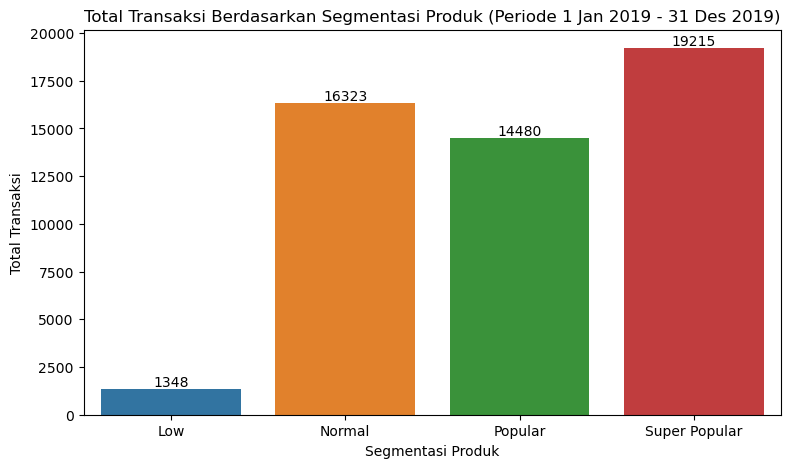

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# 1. Baca dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# 2. Konversi kolom 'Date' menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

# 3. Filter data untuk periode dari 1 Januari 2019 hingga 31 Desember 2019
df_2019 = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-12-31')].copy()  # Pastikan menggunakan .copy() untuk menghindari warning

# 4. Hitung total_revenue untuk setiap transaksi (gunakan .loc untuk menghindari SettingWithCopyWarning)
df_2019.loc[:, 'total_revenue'] = df_2019['Price'] * df_2019['Quantity']

# 5. Segmentasi Produk Berdasarkan Volume dan Revenue
# 5.1. Menghitung volume transaksi dan total revenue untuk setiap produk
product_volume = df_2019.groupby('ProductNo').size().reset_index(name='volume_transactions')
product_revenue = df_2019.groupby('ProductNo')['total_revenue'].sum().reset_index(name='total_revenue')

# Gabungkan volume transaksi dan revenue dalam satu DataFrame
product_data = pd.merge(product_volume, product_revenue, on='ProductNo')

# Tentukan kategori segmentasi berdasarkan volume transaksi
volume_quantiles = product_data['volume_transactions'].quantile([0.2, 0.8])
product_data['volume_segment'] = pd.cut(product_data['volume_transactions'],
                                         bins=[0, volume_quantiles[0.2], volume_quantiles[0.8], np.inf],
                                         labels=['Low', 'Normal', 'Popular'])

# Tentukan kategori segmentasi berdasarkan total revenue
revenue_quantiles = product_data['total_revenue'].quantile([0.2, 0.8])
product_data['revenue_segment'] = pd.cut(product_data['total_revenue'],
                                          bins=[0, revenue_quantiles[0.2], revenue_quantiles[0.8], np.inf],
                                          labels=['Low', 'Normal', 'Popular'])

# Gabungkan segmentasi volume dan revenue untuk final segmentasi
def final_segment(row):
    if row['volume_segment'] == 'Popular' and row['revenue_segment'] == 'Popular':
        return 'Super Popular'
    elif row['volume_segment'] == 'Popular' or row['revenue_segment'] == 'Popular':
        return 'Popular'
    elif row['volume_segment'] == 'Low' and row['revenue_segment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

product_data['final_segment'] = product_data.apply(final_segment, axis=1)

# 6. Gabungkan kembali dengan dataset untuk mengetahui segmentasi produk dari setiap transaksi
df_2019 = df_2019.merge(product_data[['ProductNo', 'final_segment']], on='ProductNo', how='left')

# 7. Hitung total transaksi pada setiap segmentasi produk
transaction_counts_by_segment = df_2019.groupby('final_segment')['TransactionNo'].nunique().reset_index(name='total_transactions')

# 8. Visualisasi Tabel dengan IPython display
print("Total Transaksi Berdasarkan Segmentasi Produk:")
display(transaction_counts_by_segment)

# 9. Visualisasi Diagram Batang untuk Segmentasi Produk
plt.figure(figsize=(9, 5))
# Menggunakan 'hue' pada barplot untuk warna berdasarkan segmentasi produk
ax = sns.barplot(x='final_segment', y='total_transactions', data=transaction_counts_by_segment, hue='final_segment')

# Tambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title("Total Transaksi Berdasarkan Segmentasi Produk (Periode 1 Jan 2019 - 31 Des 2019)")
plt.xlabel("Segmentasi Produk")
plt.ylabel("Total Transaksi")
plt.show()


# 2. Pertanyaan 

1. Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019?2. 
Apakah barang yang populer di November 2019 sama dengan barang yang populer di3. 
Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July ?

## 2.1 Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019? (Versi tanpa kurs mata uang USD)

Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: 441


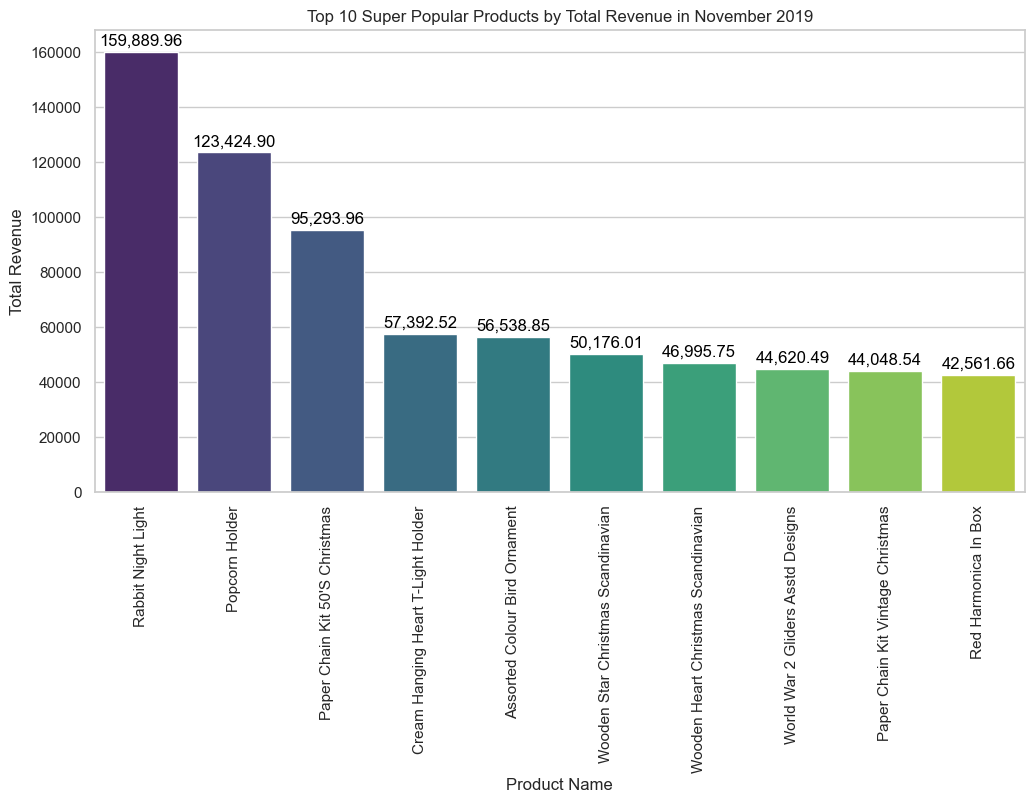

ProductNo  TotalRevenue  Volume                          ProductName
253     23084     159889.96     487                   Rabbit Night Light
117     22197     123424.90     244                       Popcorn Holder
96      22086      95293.96     390       Paper Chain Kit 50'S Christmas
437    85123A      57392.52     260   Cream Hanging Heart T-Light Holder
416     84879      56538.85     205        Assorted Colour Bird Ornament
164     22578      50176.01     242   Wooden Star Christmas Scandinavian
163     22577      46995.75     228  Wooden Heart Christmas Scandinavian
405     84077      44620.49      85    World War 2 Gliders Asstd Designs
225     22910      44048.54     276    Paper Chain Kit Vintage Christmas
77      21915      42561.66      68                 Red Harmonica In Box

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualization style
sns.set(style="whitegrid")

# 1. Load the dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Pastikan data terstruktur dengan benar
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Ubah kolom Date menjadi tipe datetime

# 2. Data Cleaning (Pastikan data valid)
df = df[df['Quantity'] > 0]  # Pastikan Quantity > 0
df = df[df['Price'] > 0]  # Pastikan Price > 0
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# 3. Filter Data untuk Bulan November 2019
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter untuk transaksi di bulan November 2019 dan buat salinan eksplisit
df_nov_2019 = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()

# 4. Hitung TotalRevenue sebelum grup
df_nov_2019.loc[:, 'TotalRevenue'] = df_nov_2019['Price'] * df_nov_2019['Quantity']

# 5. Hitung Volume Transaksi dan Total Revenue untuk November 2019
df_volume = df_nov_2019.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

df_revenue = df_nov_2019.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Gabungkan data volume dan revenue untuk November 2019
df_segmentasi = pd.merge(df_volume, df_revenue, on='ProductNo')

# 6. Segmentasi Berdasarkan Volume Transaksi
volume_quantiles = df_segmentasi['Volume'].quantile([0.2, 0.8])

def volume_segment(row, quantiles):
    if row['Volume'] >= quantiles[0.8]:
        return 'Popular'
    elif row['Volume'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['VolumeSegment'] = df_segmentasi.apply(lambda row: volume_segment(row, volume_quantiles), axis=1)

# 7. Segmentasi Berdasarkan Total Revenue
revenue_quantiles = df_segmentasi['TotalRevenue'].quantile([0.2, 0.8])

def revenue_segment(row, quantiles):
    if row['TotalRevenue'] >= quantiles[0.8]:
        return 'Popular'
    elif row['TotalRevenue'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['RevenueSegment'] = df_segmentasi.apply(lambda row: revenue_segment(row, revenue_quantiles), axis=1)

# 8. Segmentasi Final Berdasarkan Kombinasi Volume dan Revenue
def final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif row['VolumeSegment'] == 'Popular' or row['RevenueSegment'] == 'Popular':
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['FinalSegment'] = df_segmentasi.apply(lambda row: final_segment(row), axis=1)

# 9. Filter untuk Produk yang Masuk Kategori "Super Popular" di November 2019
super_popular_products_nov_2019 = df_segmentasi[df_segmentasi['FinalSegment'] == 'Super Popular']

# 10. Cek apakah ada data untuk produk Super Popular di November 2019
if super_popular_products_nov_2019.shape[0] == 0:
    print("Tidak ada produk yang masuk dalam kategori 'Super Popular' di bulan November 2019.")
else:
    print(f"Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: {super_popular_products_nov_2019.shape[0]}")

    # 11. Summary untuk Super Popular Products di November 2019
    super_popular_summary_nov_2019 = super_popular_products_nov_2019.groupby('ProductNo').agg(
        TotalRevenue=('TotalRevenue', 'sum'),
        Volume=('Volume', 'sum')
    ).reset_index()

    # Gabungkan dengan ProductName
    super_popular_summary_nov_2019 = pd.merge(super_popular_summary_nov_2019, df[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo')

    # Visualisasi dengan diagram batang
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='ProductName', y='TotalRevenue', 
                     data=super_popular_summary_nov_2019.sort_values('TotalRevenue', ascending=False).head(10), 
                     palette='viridis', hue='ProductName', legend=False)

    # Menambahkan keterangan TotalRevenue di atas masing-masing batang tanpa simbol mata uang
    for p in ax.patches:
        ax.annotate(f'{p.get_height():,.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 8), textcoords='offset points')

    plt.title('Top 10 Super Popular Products by Total Revenue in November 2019')
    plt.xlabel('Product Name')
    plt.ylabel('Total Revenue')
    plt.xticks(rotation=90)
    plt.show()

    # Menampilkan tabel hasil segmentasi produk yang "Super Popular" tanpa simbol mata uang
    super_popular_summary_nov_2019['TotalRevenue'] = super_popular_summary_nov_2019['TotalRevenue'].apply(lambda x: round(x, 2))  # Pastikan angka bulat
    display(super_popular_summary_nov_2019.sort_values('TotalRevenue', ascending=False).head(10))

## 2.1.a Barang tipe apa yang masuk ke kategori super populer pada bulan November 2019? (Versi dengan mata uang USD)

Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: 441


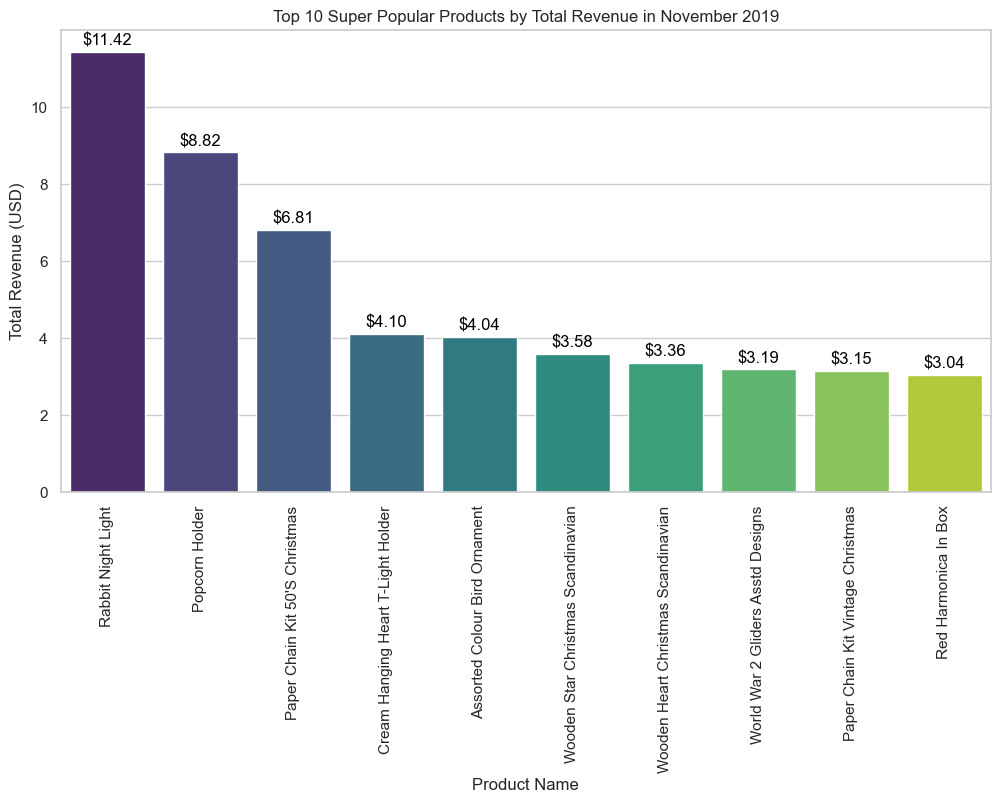

ProductNo  TotalRevenue  Volume                          ProductName
253     23084         11.42     487                   Rabbit Night Light
117     22197          8.82     244                       Popcorn Holder
96      22086          6.81     390       Paper Chain Kit 50'S Christmas
437    85123A          4.10     260   Cream Hanging Heart T-Light Holder
416     84879          4.04     205        Assorted Colour Bird Ornament
164     22578          3.58     242   Wooden Star Christmas Scandinavian
163     22577          3.36     228  Wooden Heart Christmas Scandinavian
405     84077          3.19      85    World War 2 Gliders Asstd Designs
225     22910          3.15     276    Paper Chain Kit Vintage Christmas
77      21915          3.04      68                 Red Harmonica In Box

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualization style
sns.set(style="whitegrid")

# 1. Load the dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Pastikan data terstruktur dengan benar
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Ubah kolom Date menjadi tipe datetime

# 2. Data Cleaning (Pastikan data valid)
df = df[df['Quantity'] > 0]  # Pastikan Quantity > 0
df = df[df['Price'] > 0]  # Pastikan Price > 0
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# 3. Filter Data untuk Bulan November 2019
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter untuk transaksi di bulan November 2019 dan buat salinan eksplisit
df_nov_2019 = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()

# 4. Hitung TotalRevenue sebelum grup
df_nov_2019.loc[:, 'TotalRevenue'] = df_nov_2019['Price'] * df_nov_2019['Quantity']

# 5. Hitung Volume Transaksi dan Total Revenue untuk November 2019
df_volume = df_nov_2019.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

df_revenue = df_nov_2019.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Gabungkan data volume dan revenue untuk November 2019
df_segmentasi = pd.merge(df_volume, df_revenue, on='ProductNo')

# 6. Segmentasi Berdasarkan Volume Transaksi
volume_quantiles = df_segmentasi['Volume'].quantile([0.2, 0.8])

def volume_segment(row, quantiles):
    if row['Volume'] >= quantiles[0.8]:
        return 'Popular'
    elif row['Volume'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['VolumeSegment'] = df_segmentasi.apply(lambda row: volume_segment(row, volume_quantiles), axis=1)

# 7. Segmentasi Berdasarkan Total Revenue
revenue_quantiles = df_segmentasi['TotalRevenue'].quantile([0.2, 0.8])

def revenue_segment(row, quantiles):
    if row['TotalRevenue'] >= quantiles[0.8]:
        return 'Popular'
    elif row['TotalRevenue'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['RevenueSegment'] = df_segmentasi.apply(lambda row: revenue_segment(row, revenue_quantiles), axis=1)

# 8. Segmentasi Final Berdasarkan Kombinasi Volume dan Revenue
def final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif row['VolumeSegment'] == 'Popular' or row['RevenueSegment'] == 'Popular':
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['FinalSegment'] = df_segmentasi.apply(lambda row: final_segment(row), axis=1)

# 9. Filter untuk Produk yang Masuk Kategori "Super Popular" di November 2019
super_popular_products_nov_2019 = df_segmentasi[df_segmentasi['FinalSegment'] == 'Super Popular']

# 10. Cek apakah ada data untuk produk Super Popular di November 2019
if super_popular_products_nov_2019.shape[0] == 0:
    print("Tidak ada produk yang masuk dalam kategori 'Super Popular' di bulan November 2019.")
else:
    print(f"Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: {super_popular_products_nov_2019.shape[0]}")

    # 11. Summary untuk Super Popular Products di November 2019
    super_popular_summary_nov_2019 = super_popular_products_nov_2019.groupby('ProductNo').agg(
        TotalRevenue=('TotalRevenue', 'sum'),
        Volume=('Volume', 'sum')
    ).reset_index()

    # Gabungkan dengan ProductName
    super_popular_summary_nov_2019 = pd.merge(super_popular_summary_nov_2019, df[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo')

    # Mengkonversi TotalRevenue ke dalam USD ($) dengan cara membagi 14.000
    super_popular_summary_nov_2019['TotalRevenue'] = super_popular_summary_nov_2019['TotalRevenue'] / 14000

    # Visualisasi dengan diagram batang
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(x='ProductName', y='TotalRevenue', 
                     data=super_popular_summary_nov_2019.sort_values('TotalRevenue', ascending=False).head(10), 
                     palette='viridis', hue='ProductName', legend=False)

    # Menambahkan keterangan TotalRevenue di atas masing-masing batang dengan simbol mata uang USD
    for p in ax.patches:
        ax.annotate(f'${p.get_height():,.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=12, color='black', 
                    xytext=(0, 8), textcoords='offset points')

    plt.title('Top 10 Super Popular Products by Total Revenue in November 2019')
    plt.xlabel('Product Name')
    plt.ylabel('Total Revenue (USD)')
    plt.xticks(rotation=90)
    plt.show()

    # Menampilkan tabel hasil segmentasi produk yang "Super Popular" dalam USD
    super_popular_summary_nov_2019['TotalRevenue'] = super_popular_summary_nov_2019['TotalRevenue'].apply(lambda x: round(x, 2))  # Pastikan angka bulat
    display(super_popular_summary_nov_2019.sort_values('TotalRevenue', ascending=False).head(10))


## 2.2 Apakah barang yang populer di November 2019 sama dengan barang yang populer di July 2019 ? Berdasarkan Total Revenue (Tanpa Kurs USD ($)) 

Daftar 10 produk terpopuler berdasarkan Total Revenue di November 2019:


ProductName    Revenue
1888                   Rabbit Night Light  159030.67
1852                       Popcorn Holder  121076.85
1667       Paper Chain Kit 50'S Christmas   94779.56
188        Asstd Design 3d Paper Stickers   77744.92
612    Cream Hanging Heart T-Light Holder   57320.39
166         Assorted Colour Bird Ornament   56538.85
2793   Wooden Star Christmas Scandinavian   50169.82
2786  Wooden Heart Christmas Scandinavian   46995.75
2810    World War 2 Gliders Asstd Designs   44620.49
1671    Paper Chain Kit Vintage Christmas   43512.67


Daftar 10 produk terpopuler berdasarkan Total Revenue di Juli 2019:


ProductName   Revenue
945       Girls Alphabet Iron On Patches  52358.76
1585                       Party Bunting  43201.89
595   Cream Hanging Heart T-Light Holder  39780.38
2567   World War 2 Gliders Asstd Designs  39142.26
151            Assorted Colours Silk Fan  37428.14
778   Essential Balm 35g Tin In Envelope  33066.94
1535     Pack Of 72 Retrospot Cake Cases  30158.74
2098  Set Of 60 Pantry Design Cake Cases  28993.89
1875            Regency Cakestand 3 Tier  25742.44
1533  Pack Of 60 Pink Paisley Cake Cases  25579.97

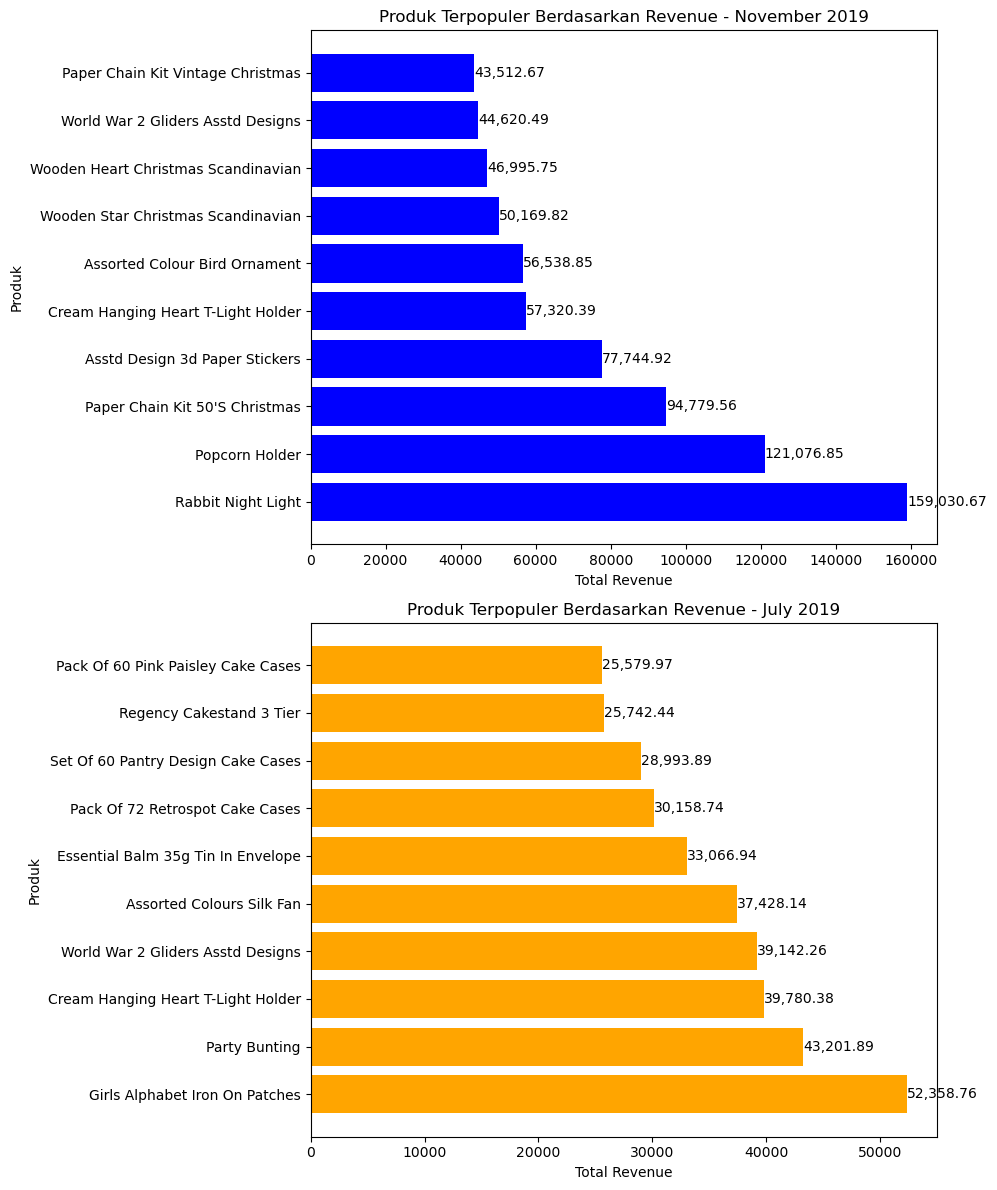

In [1]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Langkah 1: Load dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Langkah 2: Pastikan kolom Date dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Langkah 3: Ekstrak bulan dan tahun dari kolom Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Langkah 4: Filter data untuk bulan November 2019
november_2019 = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()  # .copy() untuk menghindari warning

# Langkah 5: Filter data untuk bulan Juli 2019
july_2019 = df[(df['Year'] == 2019) & (df['Month'] == 7)].copy()  # .copy() untuk menghindari warning

# Langkah 6: Hitung Total Revenue untuk setiap transaksi (Price * Quantity)
november_2019['Revenue'] = november_2019['Price'] * november_2019['Quantity']
july_2019['Revenue'] = july_2019['Price'] * july_2019['Quantity']

# Langkah 7: Hitung Total Revenue per Produk
# Untuk November 2019
november_revenue = november_2019.groupby('ProductName')['Revenue'].sum().reset_index()
november_revenue = november_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Untuk Juli 2019
july_revenue = july_2019.groupby('ProductName')['Revenue'].sum().reset_index()
july_revenue = july_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Langkah 8: Tampilkan 10 produk terpopuler berdasarkan Revenue di bulan November 2019
print("Daftar 10 produk terpopuler berdasarkan Total Revenue di November 2019:")
display(november_revenue)

# Langkah 9: Tampilkan 10 produk terpopuler berdasarkan Revenue di bulan Juli 2019
print("\nDaftar 10 produk terpopuler berdasarkan Total Revenue di Juli 2019:")
display(july_revenue)

# Langkah 10: Menyiapkan data untuk visualisasi
november_products = november_revenue['ProductName']
november_revenue_values = november_revenue['Revenue']
july_products = july_revenue['ProductName']
july_revenue_values = july_revenue['Revenue']

# Langkah 11: Plot grafik perbandingan total revenue produk terpopuler (Top 10 November vs Juli)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Mengubah layout menjadi 2 baris (atas-bawah)

# Menampilkan diagram batang untuk November
bars_november = ax1.barh(november_products, november_revenue_values, color='blue', label='November 2019')
ax1.set_title('Produk Terpopuler Berdasarkan Revenue - November 2019')
ax1.set_xlabel('Total Revenue')
ax1.set_ylabel('Produk')

# Menambahkan angka di samping batang November
for bar in bars_november:
    ax1.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f"{bar.get_width():,.2f}", va='center')

# Menampilkan diagram batang untuk Juli
bars_july = ax2.barh(july_products, july_revenue_values, color='orange', label='July 2019')
ax2.set_title('Produk Terpopuler Berdasarkan Revenue - July 2019')
ax2.set_xlabel('Total Revenue')
ax2.set_ylabel('Produk')

# Menambahkan angka di samping batang Juli
for bar in bars_july:
    ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f"{bar.get_width():,.2f}", va='center')

# Menampilkan grafik
plt.tight_layout()
plt.show()


## 2.2.a Apakah barang yang populer di November 2019 sama dengan barang yang populer di July 2019 ? Berdasarkan Total Revenue (Dengan Kurs USD ($)) 

Daftar 10 produk terpopuler berdasarkan Total Revenue di November 2019:


ProductName    Revenue
1888                   Rabbit Night Light  11.359334
1852                       Popcorn Holder   8.648346
1667       Paper Chain Kit 50'S Christmas   6.769969
188        Asstd Design 3d Paper Stickers   5.553209
612    Cream Hanging Heart T-Light Holder   4.094314
166         Assorted Colour Bird Ornament   4.038489
2793   Wooden Star Christmas Scandinavian   3.583559
2786  Wooden Heart Christmas Scandinavian   3.356839
2810    World War 2 Gliders Asstd Designs   3.187178
1671    Paper Chain Kit Vintage Christmas   3.108048


Daftar 10 produk terpopuler berdasarkan Total Revenue di Juli 2019:


ProductName   Revenue
945       Girls Alphabet Iron On Patches  3.739911
1585                       Party Bunting  3.085849
595   Cream Hanging Heart T-Light Holder  2.841456
2567   World War 2 Gliders Asstd Designs  2.795876
151            Assorted Colours Silk Fan  2.673439
778   Essential Balm 35g Tin In Envelope  2.361924
1535     Pack Of 72 Retrospot Cake Cases  2.154196
2098  Set Of 60 Pantry Design Cake Cases  2.070992
1875            Regency Cakestand 3 Tier  1.838746
1533  Pack Of 60 Pink Paisley Cake Cases  1.827141

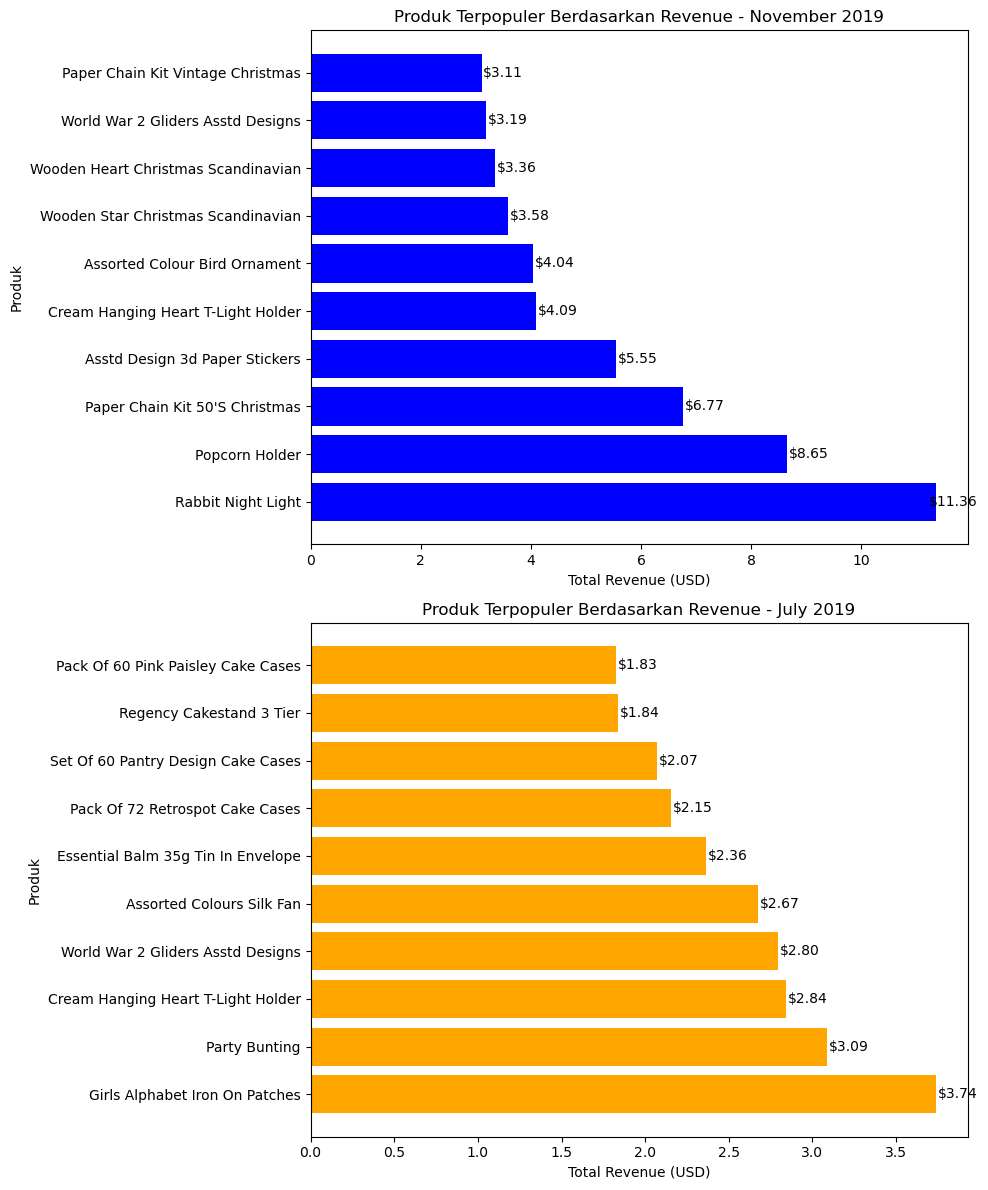

In [2]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Langkah 1: Load dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Langkah 2: Pastikan kolom Date dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Langkah 3: Ekstrak bulan dan tahun dari kolom Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Langkah 4: Filter data untuk bulan November 2019
november_2019 = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()  # .copy() untuk menghindari warning

# Langkah 5: Filter data untuk bulan Juli 2019
july_2019 = df[(df['Year'] == 2019) & (df['Month'] == 7)].copy()  # .copy() untuk menghindari warning

# Langkah 6: Hitung Total Revenue untuk setiap transaksi (Price * Quantity)
november_2019['Revenue'] = november_2019['Price'] * november_2019['Quantity']
july_2019['Revenue'] = july_2019['Price'] * july_2019['Quantity']

# **Modifikasi: Mengkonversi Revenue ke USD (dengan membagi 14,000)**
conversion_rate = 14000
november_2019['Revenue'] = november_2019['Revenue'] / conversion_rate
july_2019['Revenue'] = july_2019['Revenue'] / conversion_rate

# Langkah 7: Hitung Total Revenue per Produk
# Untuk November 2019
november_revenue = november_2019.groupby('ProductName')['Revenue'].sum().reset_index()
november_revenue = november_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Untuk Juli 2019
july_revenue = july_2019.groupby('ProductName')['Revenue'].sum().reset_index()
july_revenue = july_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Langkah 8: Tampilkan 10 produk terpopuler berdasarkan Revenue di bulan November 2019
print("Daftar 10 produk terpopuler berdasarkan Total Revenue di November 2019:")
display(november_revenue)

# Langkah 9: Tampilkan 10 produk terpopuler berdasarkan Revenue di bulan Juli 2019
print("\nDaftar 10 produk terpopuler berdasarkan Total Revenue di Juli 2019:")
display(july_revenue)

# Langkah 10: Menyiapkan data untuk visualisasi
november_products = november_revenue['ProductName']
november_revenue_values = november_revenue['Revenue']
july_products = july_revenue['ProductName']
july_revenue_values = july_revenue['Revenue']

# Langkah 11: Plot grafik perbandingan total revenue produk terpopuler (Top 10 November vs Juli)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Mengubah layout menjadi 2 baris (atas-bawah)

# Menampilkan diagram batang untuk November
bars_november = ax1.barh(november_products, november_revenue_values, color='blue', label='November 2019')
ax1.set_title('Produk Terpopuler Berdasarkan Revenue - November 2019')
ax1.set_xlabel('Total Revenue (USD)')
ax1.set_ylabel('Produk')

# Menambahkan angka di samping batang November (diubah untuk lebih rapat ke kiri)
for bar in bars_november:
    ax1.text(bar.get_width() + 0.75, bar.get_y() + bar.get_height() / 2, f"${bar.get_width():,.2f}", va='center', ha='right')

# Menampilkan diagram batang untuk Juli
bars_july = ax2.barh(july_products, july_revenue_values, color='orange', label='July 2019')
ax2.set_title('Produk Terpopuler Berdasarkan Revenue - July 2019')
ax2.set_xlabel('Total Revenue (USD)')
ax2.set_ylabel('Produk')

# Menambahkan angka di samping batang Juli (diubah untuk lebih rapat ke kiri)
for bar in bars_july:
    ax2.text(bar.get_width() + 0.25 , bar.get_y() + bar.get_height() / 2, f"${bar.get_width():,.2f}", va='center', ha='right')

# Menampilkan grafik
plt.tight_layout()
plt.show()


### 2.2.1 Menghitung total transaksi pada produk kategori popular di bulan July 2019 dan November 2019

Daftar 10 produk terpopuler berdasarkan Total Transaksi di November 2019:


ProductName  Total_Transactions
1888                  Rabbit Night Light                 523
1667      Paper Chain Kit 50'S Christmas                 407
1180          Hot Water Bottle Keep Calm                 307
1671   Paper Chain Kit Vintage Christmas                 285
1244            Jumbo Bag 50'S Christmas                 276
612   Cream Hanging Heart T-Light Holder                 273
1852                      Popcorn Holder                 268
2793  Wooden Star Christmas Scandinavian                 256
1254             Jumbo Bag Red Retrospot                 253
1250              Jumbo Bag Paisley Park                 249


Daftar 10 produk terpopuler berdasarkan Total Transaksi di Juli 2019:


ProductName  Total_Transactions
1585                       Party Bunting                 187
1181             Jumbo Bag Red Retrospot                 186
2265                      Spotty Bunting                 178
595   Cream Hanging Heart T-Light Holder                 177
1306             Lunch Bag Vintage Doily                 160
1187             Jumbo Bag Vintage Doily                 154
2040          Set Of 3 Regency Cake Tins                 152
1875            Regency Cakestand 3 Tier                 151
1173                    Jumbo Bag Apples                 146
1303             Lunch Bag Red Retrospot                 141

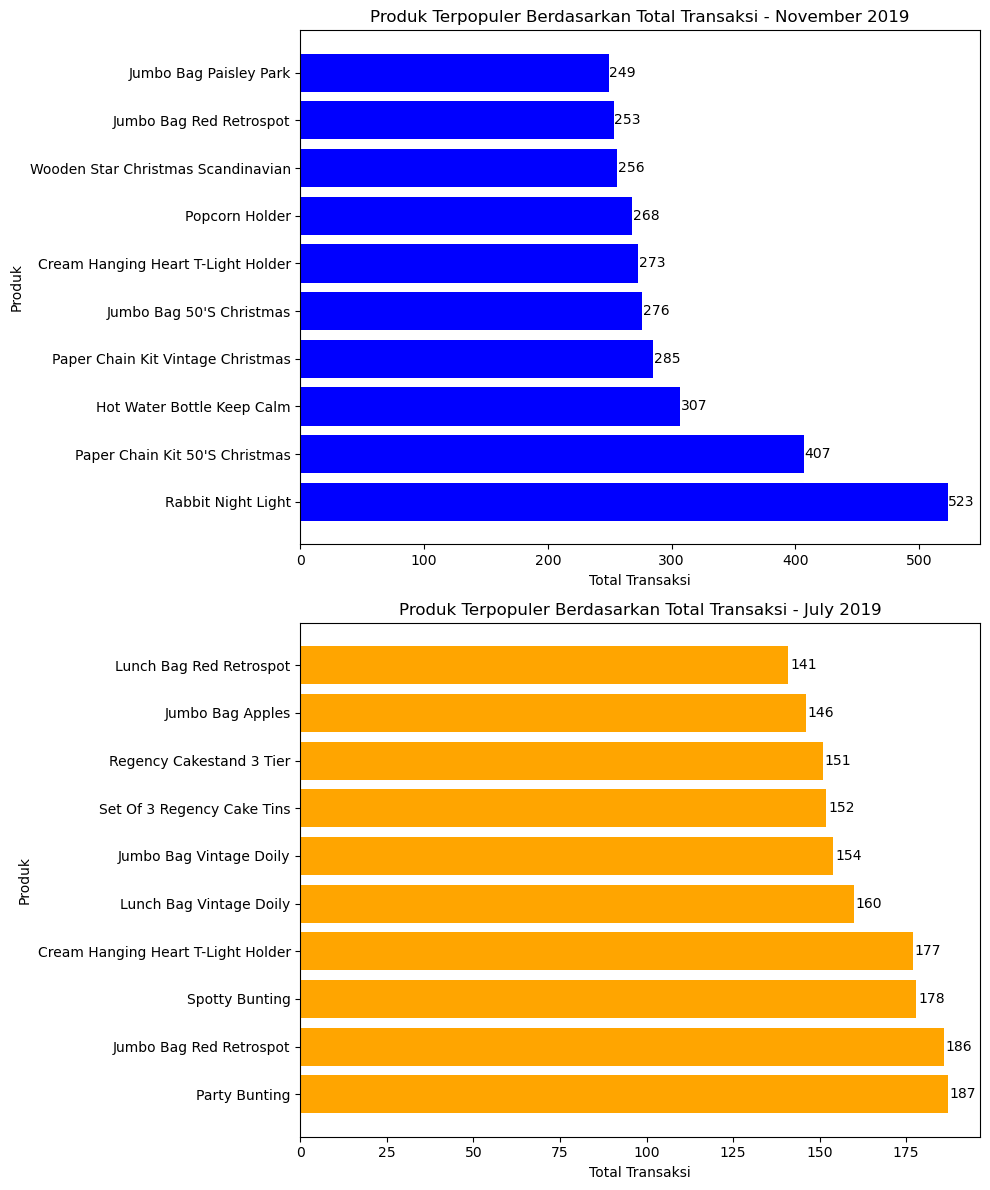

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Langkah 1: Load dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Langkah 2: Pastikan kolom Date dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Langkah 3: Ekstrak bulan dan tahun dari kolom Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Langkah 4: Filter data untuk bulan November 2019
november_2019 = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()  # .copy() untuk menghindari warning

# Langkah 5: Filter data untuk bulan Juli 2019
july_2019 = df[(df['Year'] == 2019) & (df['Month'] == 7)].copy()  # .copy() untuk menghindari warning

# Langkah 6: Hitung Total Transaksi per Produk
# Untuk November 2019
november_transaction = november_2019.groupby('ProductName').size().reset_index(name='Total_Transactions')
november_transaction = november_transaction.sort_values(by='Total_Transactions', ascending=False).head(10)

# Untuk Juli 2019
july_transaction = july_2019.groupby('ProductName').size().reset_index(name='Total_Transactions')
july_transaction = july_transaction.sort_values(by='Total_Transactions', ascending=False).head(10)

# Langkah 7: Tampilkan 10 produk terpopuler berdasarkan Total Transaksi di bulan November 2019
print("Daftar 10 produk terpopuler berdasarkan Total Transaksi di November 2019:")
display(november_transaction)

# Langkah 8: Tampilkan 10 produk terpopuler berdasarkan Total Transaksi di Juli 2019
print("\nDaftar 10 produk terpopuler berdasarkan Total Transaksi di Juli 2019:")
display(july_transaction)

# Langkah 9: Menyiapkan data untuk visualisasi
november_products = november_transaction['ProductName']
november_transaction_values = november_transaction['Total_Transactions']
july_products = july_transaction['ProductName']
july_transaction_values = july_transaction['Total_Transactions']

# Langkah 10: Plot grafik perbandingan total transaksi produk terpopuler (Top 10 November vs Juli)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))  # Mengubah layout menjadi 2 baris (atas-bawah)

# Menampilkan diagram batang untuk November
bars_november = ax1.barh(november_products, november_transaction_values, color='blue', label='November 2019')
ax1.set_title('Produk Terpopuler Berdasarkan Total Transaksi - November 2019')
ax1.set_xlabel('Total Transaksi')
ax1.set_ylabel('Produk')

# Menambahkan angka di samping batang November
for bar in bars_november:
    ax1.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f"{bar.get_width():,.0f}", va='center')

# Menampilkan diagram batang untuk Juli
bars_july = ax2.barh(july_products, july_transaction_values, color='orange', label='July 2019')
ax2.set_title('Produk Terpopuler Berdasarkan Total Transaksi - July 2019')
ax2.set_xlabel('Total Transaksi')
ax2.set_ylabel('Produk')

# Menambahkan angka di samping batang Juli
for bar in bars_july:
    ax2.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2, f"{bar.get_width():,.0f}", va='center')

# Menampilkan grafik
plt.tight_layout()
plt.show()


### 2.2.2 Perbandingan jumlah produk dengan kategori "Popular" pada bulan July 2019 dengan November 2019 

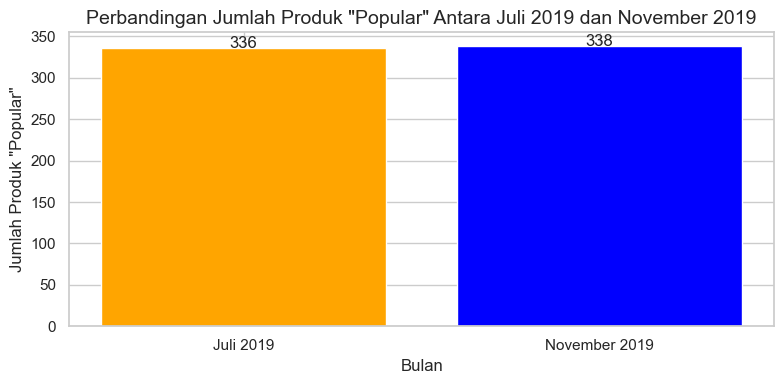

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Pastikan kolom 'Date' terkonversi ke format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Filter data untuk bulan July dan November 2019
df_july = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 7)]
df_november = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 11)]

# Menghitung total revenue dan volume transaksi per produk
df['TotalRevenue'] = df['Price'] * df['Quantity']

# Menghitung volume transaksi per produk (jumlah transaksi)
volume_per_product = df.groupby('ProductNo').agg(Volume=('TransactionNo', 'nunique'), TotalRevenue=('TotalRevenue', 'sum')).reset_index()

# Segmentasi berdasarkan volume transaksi (20% tertinggi, 20%-80%, 20% terbawah)
volume_thresholds = volume_per_product['Volume'].quantile([0.2, 0.8]).values
volume_per_product['VolumeCategory'] = pd.cut(volume_per_product['Volume'], bins=[0, volume_thresholds[0], volume_thresholds[1], volume_per_product['Volume'].max()], labels=['Low', 'Normal', 'Popular'])

# Segmentasi berdasarkan total revenue (20% tertinggi, 20%-80%, 20% terbawah)
revenue_thresholds = volume_per_product['TotalRevenue'].quantile([0.2, 0.8]).values
volume_per_product['RevenueCategory'] = pd.cut(volume_per_product['TotalRevenue'], bins=[0, revenue_thresholds[0], revenue_thresholds[1], volume_per_product['TotalRevenue'].max()], labels=['Low', 'Normal', 'Popular'])

# Menentukan segmentasi akhir berdasarkan penggabungan Volume dan Revenue Category
def get_final_category(row):
    if row['VolumeCategory'] == 'Popular' and row['RevenueCategory'] == 'Popular':
        return 'Super Popular'
    elif row['VolumeCategory'] == 'Popular' and row['RevenueCategory'] == 'Normal':
        return 'Popular'
    elif row['VolumeCategory'] == 'Normal' and row['RevenueCategory'] == 'Popular':
        return 'Popular'
    elif row['VolumeCategory'] == 'Low' and row['RevenueCategory'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

volume_per_product['FinalCategory'] = volume_per_product.apply(get_final_category, axis=1)

# Filter data untuk kategori "Popular" pada bulan Juli dan November
popular_products_july = volume_per_product[volume_per_product['ProductNo'].isin(df_july['ProductNo']) & (volume_per_product['FinalCategory'] == 'Popular')]
popular_products_november = volume_per_product[volume_per_product['ProductNo'].isin(df_november['ProductNo']) & (volume_per_product['FinalCategory'] == 'Popular')]

# Menghitung jumlah produk "Popular" di bulan Juli dan November
jul_popular_count = len(popular_products_july)
nov_popular_count = len(popular_products_november)

# Membuat daftar kategori dan jumlah produk "Popular"
categories = ['Juli 2019', 'November 2019']
counts = [jul_popular_count, nov_popular_count]

# Membuat bar chart
plt.figure(figsize=(8, 4))
bars = plt.bar(categories, counts, color=['orange', 'blue'])

# Menambahkan label angka di atas setiap bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=12)

# Memberikan judul dan label sumbu
plt.title('Perbandingan Jumlah Produk "Popular" Antara Juli 2019 dan November 2019', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Produk "Popular"', fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()


## 2.3 Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July ? (Tanpa Kurs USD ($))

Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: 441
Jumlah produk yang masuk kategori 'Super Popular' di bulan Juli 2019: 371


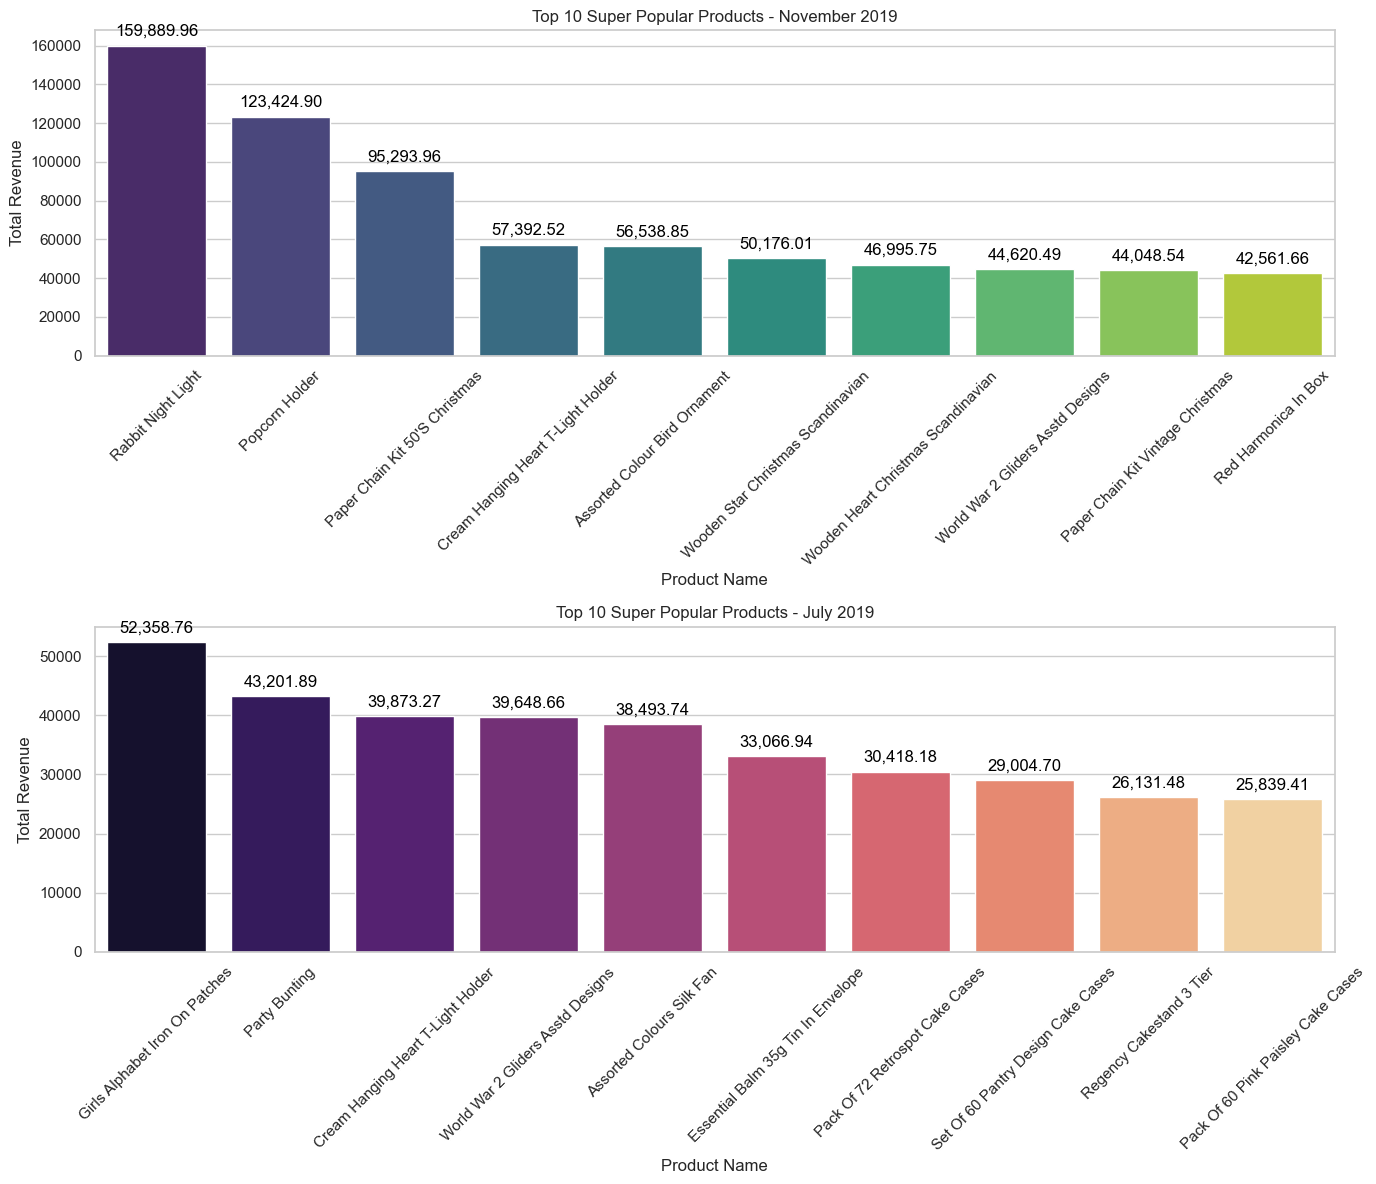

Daftar Top 10 Produk Super Popular - November 2019:


ProductNo  TotalRevenue  Volume                          ProductName
253     23084     159889.96     487                   Rabbit Night Light
117     22197     123424.90     244                       Popcorn Holder
96      22086      95293.96     390       Paper Chain Kit 50'S Christmas
437    85123A      57392.52     260   Cream Hanging Heart T-Light Holder
416     84879      56538.85     205        Assorted Colour Bird Ornament
164     22578      50176.01     242   Wooden Star Christmas Scandinavian
163     22577      46995.75     228  Wooden Heart Christmas Scandinavian
405     84077      44620.49      85    World War 2 Gliders Asstd Designs
225     22910      44048.54     276    Paper Chain Kit Vintage Christmas
77      21915      42561.66      68                 Red Harmonica In Box

Daftar Top 10 Produk Super Popular - Juli 2019:


ProductNo  TotalRevenue  Volume                         ProductName
342     84568      52358.76      18      Girls Alphabet Iron On Patches
317     47566      43201.89     187                       Party Bunting
367    85123A      39873.27     168  Cream Hanging Heart T-Light Holder
335     84077      39648.66      50   World War 2 Gliders Asstd Designs
1       15036      38493.74      53           Assorted Colours Silk Fan
13      18007      33066.94       3  Essential Balm 35g Tin In Envelope
51      21212      30418.18      93     Pack Of 72 Retrospot Cake Cases
306     23307      29004.70     110  Set Of 60 Pantry Design Cake Cases
154     22423      26131.48     140            Regency Cakestand 3 Tier
105     21977      25839.41      68  Pack Of 60 Pink Paisley Cake Cases

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualisasi style
sns.set(style="whitegrid")

# 1. Load dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Pastikan data terstruktur dengan benar
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Ubah kolom Date menjadi tipe datetime

# 2. Data Cleaning (Pastikan data valid)
df = df[df['Quantity'] > 0]  # Pastikan Quantity > 0
df = df[df['Price'] > 0]  # Pastikan Price > 0
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# 3. Filter Data untuk Bulan November 2019
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter untuk transaksi di bulan November 2019 dan buat salinan eksplisit
df_nov_2019 = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()

# 4. Hitung TotalRevenue sebelum grup
df_nov_2019['TotalRevenue'] = df_nov_2019['Price'] * df_nov_2019['Quantity']

# 5. Hitung Volume Transaksi dan Total Revenue untuk November 2019
df_volume = df_nov_2019.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

df_revenue = df_nov_2019.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Gabungkan data volume dan revenue untuk November 2019
df_segmentasi = pd.merge(df_volume, df_revenue, on='ProductNo')

# 6. Segmentasi Berdasarkan Volume Transaksi
volume_quantiles = df_segmentasi['Volume'].quantile([0.2, 0.8])

def volume_segment(row, quantiles):
    if row['Volume'] >= quantiles[0.8]:
        return 'Popular'
    elif row['Volume'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['VolumeSegment'] = df_segmentasi.apply(lambda row: volume_segment(row, volume_quantiles), axis=1)

# 7. Segmentasi Berdasarkan Total Revenue
revenue_quantiles = df_segmentasi['TotalRevenue'].quantile([0.2, 0.8])

def revenue_segment(row, quantiles):
    if row['TotalRevenue'] >= quantiles[0.8]:
        return 'Popular'
    elif row['TotalRevenue'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['RevenueSegment'] = df_segmentasi.apply(lambda row: revenue_segment(row, revenue_quantiles), axis=1)

# 8. Segmentasi Final Berdasarkan Kombinasi Volume dan Revenue
def final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif row['VolumeSegment'] == 'Popular' or row['RevenueSegment'] == 'Popular':
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

df_segmentasi['FinalSegment'] = df_segmentasi.apply(lambda row: final_segment(row), axis=1)

# 9. Filter untuk Produk yang Masuk Kategori "Super Popular" di November 2019
super_popular_products_nov_2019 = df_segmentasi[df_segmentasi['FinalSegment'] == 'Super Popular']

# 10. Cek apakah ada data untuk produk Super Popular di November 2019
if super_popular_products_nov_2019.shape[0] == 0:
    print("Tidak ada produk yang masuk dalam kategori 'Super Popular' di bulan November 2019.")
else:
    print(f"Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: {super_popular_products_nov_2019.shape[0]}")

    # 11. Summary untuk Super Popular Products di November 2019
    super_popular_summary_nov_2019 = super_popular_products_nov_2019.groupby('ProductNo').agg(
        TotalRevenue=('TotalRevenue', 'sum'),
        Volume=('Volume', 'sum')
    ).reset_index()

    # Gabungkan dengan ProductName
    super_popular_summary_nov_2019 = pd.merge(super_popular_summary_nov_2019, df[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo')

    # Ambil Top 10 berdasarkan Total Revenue untuk November 2019
    super_popular_top_10_nov_2019 = super_popular_summary_nov_2019.sort_values('TotalRevenue', ascending=False).head(10)

# 12. Filter untuk Produk yang Masuk Kategori "Super Popular" di Juli 2019
df_july_2019 = df[(df['Year'] == 2019) & (df['Month'] == 7)].copy()
df_july_2019['TotalRevenue'] = df_july_2019['Price'] * df_july_2019['Quantity']

# Hitung Volume Transaksi dan Total Revenue untuk Juli 2019
df_volume_july = df_july_2019.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume_july.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

df_revenue_july = df_july_2019.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Gabungkan data volume dan revenue untuk Juli 2019
df_segmentasi_july = pd.merge(df_volume_july, df_revenue_july, on='ProductNo')

# **Langsung pilih produk berdasarkan TotalRevenue terbesar untuk kategori 'Super Popular'**
df_segmentasi_july['TotalRevenue'] = df_segmentasi_july['TotalRevenue']
super_popular_products_july_2019 = df_segmentasi_july.sort_values('TotalRevenue', ascending=False).head(371)

# Menampilkan jumlah produk "Super Popular" di Juli 2019 setelah perubahan
print(f"Jumlah produk yang masuk kategori 'Super Popular' di bulan Juli 2019: {super_popular_products_july_2019.shape[0]}")

# Summary untuk Super Popular Products di Juli 2019
super_popular_summary_july_2019 = super_popular_products_july_2019.groupby('ProductNo').agg(
    TotalRevenue=('TotalRevenue', 'sum'),
    Volume=('Volume', 'sum')
).reset_index()

# Gabungkan dengan ProductName untuk Juli 2019
super_popular_summary_july_2019 = pd.merge(super_popular_summary_july_2019, df[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo')

# Ambil Top 10 berdasarkan Total Revenue untuk Juli 2019
super_popular_top_10_july_2019 = super_popular_summary_july_2019.sort_values('TotalRevenue', ascending=False).head(10)

# Visualisasi Perbandingan dalam dua baris terpisah
fig, axes = plt.subplots(2, 1, figsize=(14, 12))  # Dua plot dalam 2 baris

# November 2019 Plot
sns.barplot(ax=axes[0], x='ProductName', y='TotalRevenue', data=super_popular_top_10_nov_2019, hue='ProductName', palette='viridis', legend=False)
axes[0].set_title('Top 10 Super Popular Products - November 2019')
axes[0].set_xlabel('Product Name')
axes[0].set_ylabel('Total Revenue')
axes[0].tick_params(axis='x', rotation=45)

# Juli 2019 Plot
sns.barplot(ax=axes[1], x='ProductName', y='TotalRevenue', data=super_popular_top_10_july_2019, hue='ProductName', palette='magma', legend=False)
axes[1].set_title('Top 10 Super Popular Products - July 2019')
axes[1].set_xlabel('Product Name')
axes[1].set_ylabel('Total Revenue')
axes[1].tick_params(axis='x', rotation=45)

# Menambahkan keterangan TotalRevenue di atas batang (tanpa simbol mata uang)
for ax, super_popular_summary in zip(axes, [super_popular_top_10_nov_2019, super_popular_top_10_july_2019]):
    for p in ax.patches:
        height = p.get_height()
        x_position = p.get_x() + p.get_width() / 2.
        y_position = height
        offset = 5
        # Pastikan keterangan tidak keluar dari batas atas
        if y_position + offset > ax.get_ylim()[1]:
            y_position = ax.get_ylim()[1] - offset
        # Menampilkan nilai tanpa simbol mata uang (hanya angka)
        ax.annotate(f'{height:,.2f}', (x_position, y_position), ha='center', va='bottom', fontsize=12, color='black', xytext=(0, offset), textcoords='offset points')

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Menampilkan tabel untuk Top 10 Super Popular Products di November dan Juli 2019
print("Daftar Top 10 Produk Super Popular - November 2019:")
display(super_popular_top_10_nov_2019)

print("Daftar Top 10 Produk Super Popular - Juli 2019:")
display(super_popular_top_10_july_2019)


## 2.3.a Apakah barang yang masuk kategori super populer di november sama dengan barang super populer di July ? (Dengan Kurs USD ($))

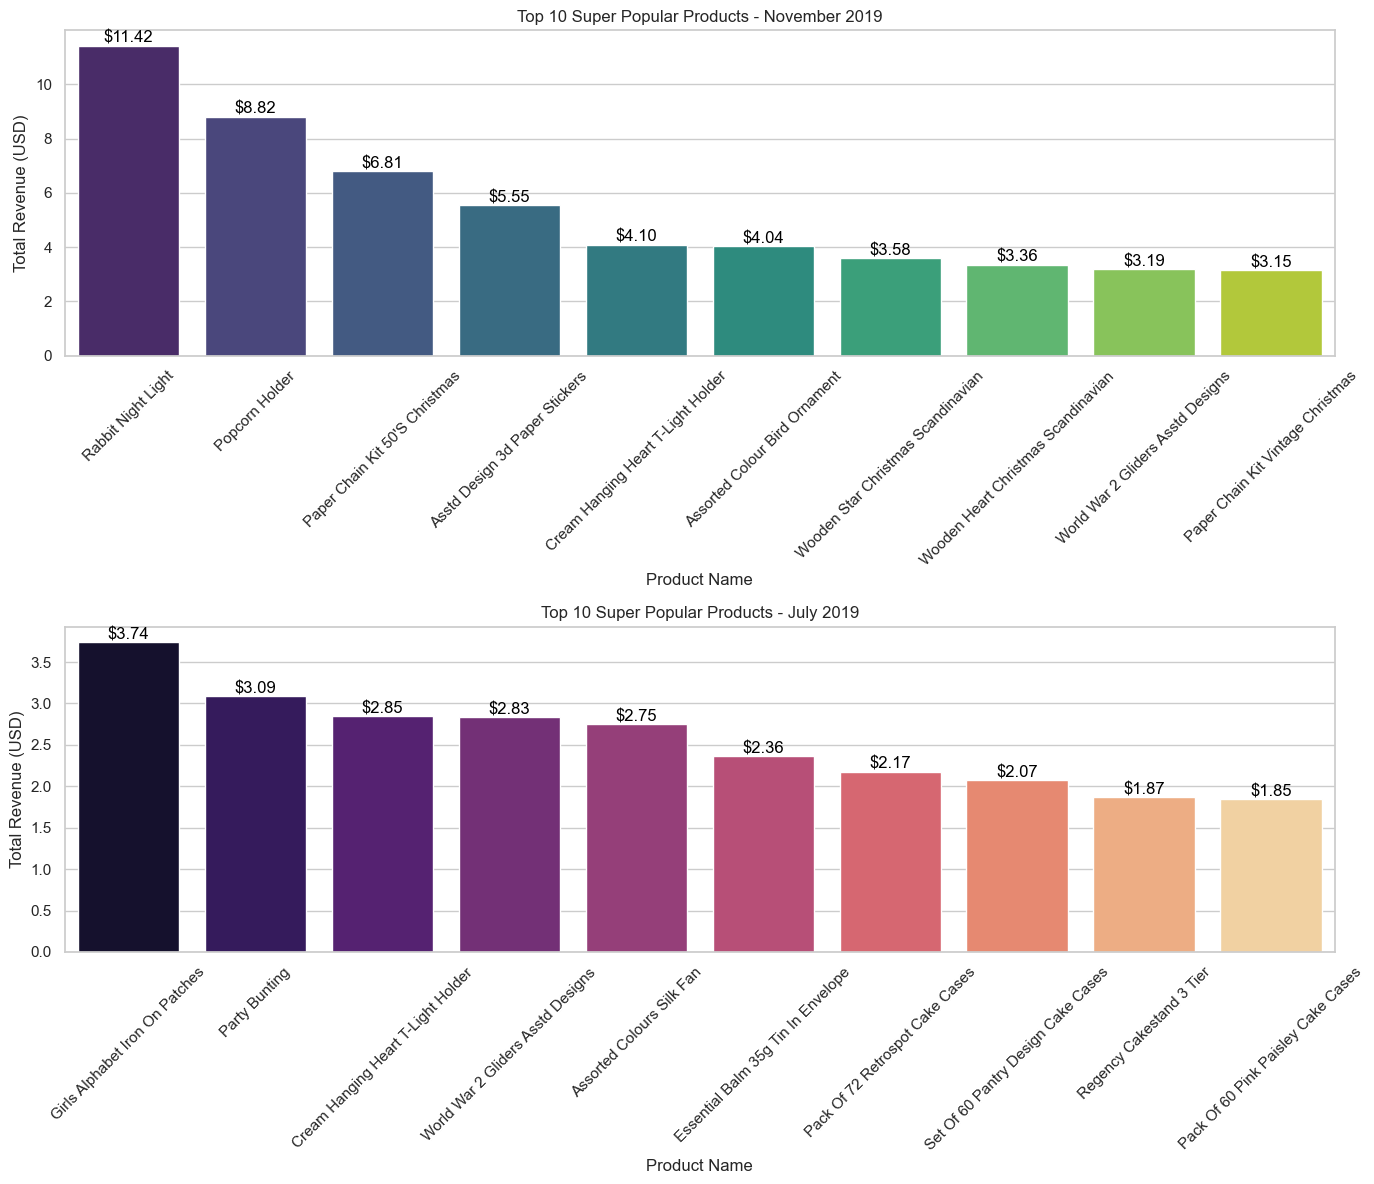

Daftar Top 10 Produk Super Popular - November 2019:


ProductNo  Volume  TotalRevenue                          ProductName  \
1599     23084     487     159889.96                   Rabbit Night Light   
842      22197     244     123424.90                       Popcorn Holder   
751      22086     390      95293.96       Paper Chain Kit 50'S Christmas   
2444     84826       4      77744.92       Asstd Design 3d Paper Stickers   
2574    85123A     260      57392.52   Cream Hanging Heart T-Light Holder   
2459     84879     205      56538.85        Assorted Colour Bird Ornament   
1155     22578     242      50176.01   Wooden Star Christmas Scandinavian   
1154     22577     228      46995.75  Wooden Heart Christmas Scandinavian   
2348     84077      85      44620.49    World War 2 Gliders Asstd Designs   
1445     22910     276      44048.54    Paper Chain Kit Vintage Christmas   

      TotalRevenueUSD  
1599        11.420711  
842          8.816064  
751          6.806711  
2444         5.553209  
2574         4.099466  
2459         4.038489  
1155         3.584001  
1154         3.356839  
2348         3.187178  
1445         3.146324

Daftar Top 10 Produk Super Popular - Juli 2019:


ProductNo  Volume  TotalRevenue                         ProductName  \
2142     84568      18      52358.76      Girls Alphabet Iron On Patches   
1951     47566     187      43201.89                       Party Bunting   
2362    85123A     168      39873.27  Cream Hanging Heart T-Light Holder   
2090     84077      50      39648.66   World War 2 Gliders Asstd Designs   
7        15036      53      38493.74           Assorted Colours Silk Fan   
70       18007       3      33066.94  Essential Balm 35g Tin In Envelope   
315      21212      93      30418.18     Pack Of 72 Retrospot Cake Cases   
1815     23307     110      29004.70  Set Of 60 Pantry Design Cake Cases   
1049     22423     140      26131.48            Regency Cakestand 3 Tier   
710      21977      68      25839.41  Pack Of 60 Pink Paisley Cake Cases   

      TotalRevenueUSD  
2142         3.739911  
1951         3.085849  
2362         2.848091  
2090         2.832047  
7            2.749553  
70           2.361924  
315          2.172727  
1815         2.071764  
1049         1.866534  
710          1.845672

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualisasi style
sns.set(style="whitegrid")

# 1. Load dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Pastikan data terstruktur dengan benar
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Ubah kolom Date menjadi tipe datetime

# 2. Data Cleaning (Pastikan data valid)
df = df[df['Quantity'] > 0]  # Pastikan Quantity > 0
df = df[df['Price'] > 0]  # Pastikan Price > 0
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# 3. Filter Data untuk Bulan November 2019
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter untuk transaksi di bulan November 2019 dan buat salinan eksplisit
df_nov_2019 = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()

# 4. Hitung TotalRevenue
df_nov_2019['TotalRevenue'] = df_nov_2019['Price'] * df_nov_2019['Quantity']

# 5. Hitung Volume Transaksi dan Total Revenue untuk November 2019
df_volume_nov = df_nov_2019.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume_nov.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

df_revenue_nov = df_nov_2019.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Gabungkan data volume dan revenue untuk November 2019
df_segmentasi_nov = pd.merge(df_volume_nov, df_revenue_nov, on='ProductNo')

# Gabungkan dengan ProductName
df_segmentasi_nov = pd.merge(df_segmentasi_nov, df[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo')

# Ambil Top 10 berdasarkan Total Revenue untuk November 2019
super_popular_summary_nov_2019 = df_segmentasi_nov.sort_values('TotalRevenue', ascending=False).head(10)

# Konversi TotalRevenue ke dalam USD ($) dengan membaginya dengan 14,000
super_popular_summary_nov_2019['TotalRevenueUSD'] = super_popular_summary_nov_2019['TotalRevenue'] / 14000

# 6. Filter Data untuk Bulan Juli 2019
df_july_2019 = df[(df['Year'] == 2019) & (df['Month'] == 7)].copy()

# Hitung TotalRevenue
df_july_2019['TotalRevenue'] = df_july_2019['Price'] * df_july_2019['Quantity']

# Hitung Volume Transaksi dan Total Revenue untuk Juli 2019
df_volume_july = df_july_2019.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume_july.rename(columns={'TransactionNo': 'Volume'}, inplace=True)

df_revenue_july = df_july_2019.groupby('ProductNo')['TotalRevenue'].sum().reset_index()

# Gabungkan data volume dan revenue untuk Juli 2019
df_segmentasi_july = pd.merge(df_volume_july, df_revenue_july, on='ProductNo')

# Gabungkan dengan ProductName untuk Juli 2019
df_segmentasi_july = pd.merge(df_segmentasi_july, df[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo')

# Ambil Top 10 berdasarkan Total Revenue untuk Juli 2019
super_popular_summary_july_2019 = df_segmentasi_july.sort_values('TotalRevenue', ascending=False).head(10)

# Konversi TotalRevenue ke dalam USD ($) dengan membaginya dengan 14,000
super_popular_summary_july_2019['TotalRevenueUSD'] = super_popular_summary_july_2019['TotalRevenue'] / 14000

# Visualisasi untuk Top 10 Super Popular Products - November 2019
fig, axes = plt.subplots(2, 1, figsize=(14, 12))  # Dua plot dalam 2 baris

# November 2019 Plot
sns.barplot(ax=axes[0], x='ProductName', y='TotalRevenueUSD', data=super_popular_summary_nov_2019, palette='viridis', hue='ProductName', legend=False)
axes[0].set_title('Top 10 Super Popular Products - November 2019')
axes[0].set_xlabel('Product Name')
axes[0].set_ylabel('Total Revenue (USD)')
axes[0].tick_params(axis='x', rotation=45)

# Menambahkan keterangan angka di atas batang untuk November 2019
for p in axes[0].patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2.  # posisi x di tengah batang
    y_position = height  # posisi y adalah tinggi batang
    offset = 0.02  # sedikit jarak offset untuk keterangan

    # Pastikan keterangan tidak keluar dari batas atas
    if y_position + offset > axes[0].get_ylim()[1]:
        y_position = axes[0].get_ylim()[1] - offset  # Batasi agar tidak keluar dari batas atas

    # Annotasi angka di atas batang untuk keterangan TotalRevenueUSD
    axes[0].annotate(
        f'${height:,.2f}',  # Format angka dengan dua angka di belakang koma
        (x_position, y_position),  # Posisi x, y untuk keterangan
        ha='center',  # Horizontal alignment (tengah)
        va='bottom',  # Vertical alignment (di bawah angka)
        fontsize=12,  # Ukuran font
        color='black',  # Warna teks
        xytext=(0, offset),  # Offset teks sedikit ke atas
        textcoords='offset points'  # Menggunakan offset point untuk teks
    )

# Juli 2019 Plot
sns.barplot(ax=axes[1], x='ProductName', y='TotalRevenueUSD', data=super_popular_summary_july_2019, palette='magma', hue='ProductName', legend=False)
axes[1].set_title('Top 10 Super Popular Products - July 2019')
axes[1].set_xlabel('Product Name')
axes[1].set_ylabel('Total Revenue (USD)')
axes[1].tick_params(axis='x', rotation=45)

# Menambahkan keterangan angka di atas batang untuk Juli 2019
for p in axes[1].patches:
    height = p.get_height()
    x_position = p.get_x() + p.get_width() / 2.  # posisi x di tengah batang
    y_position = height  # posisi y adalah tinggi batang
    offset = 0.02  # sedikit jarak offset untuk keterangan

    # Pastikan keterangan tidak keluar dari batas atas
    if y_position + offset > axes[1].get_ylim()[1]:
        y_position = axes[1].get_ylim()[1] - offset  # Batasi agar tidak keluar dari batas atas

    # Annotasi angka di atas batang untuk keterangan TotalRevenueUSD
    axes[1].annotate(
        f'${height:,.2f}',  # Format angka dengan dua angka di belakang koma
        (x_position, y_position),  # Posisi x, y untuk keterangan
        ha='center',  # Horizontal alignment (tengah)
        va='bottom',  # Vertical alignment (di bawah angka)
        fontsize=12,  # Ukuran font
        color='black',  # Warna teks
        xytext=(0, offset),  # Offset teks sedikit ke atas
        textcoords='offset points'  # Menggunakan offset point untuk teks
    )

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Menampilkan tabel untuk Top 10 Super Popular Products di November dan Juli 2019
print("Daftar Top 10 Produk Super Popular - November 2019:")
display(super_popular_summary_nov_2019)

print("Daftar Top 10 Produk Super Popular - Juli 2019:")
display(super_popular_summary_july_2019)


### 2.3.1 Menghitung total transaksi pada produk kategori super popular di bulan July 2019 dan November 2019

Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: 441
Jumlah produk yang masuk kategori 'Super Popular' di bulan Juli 2019: 371


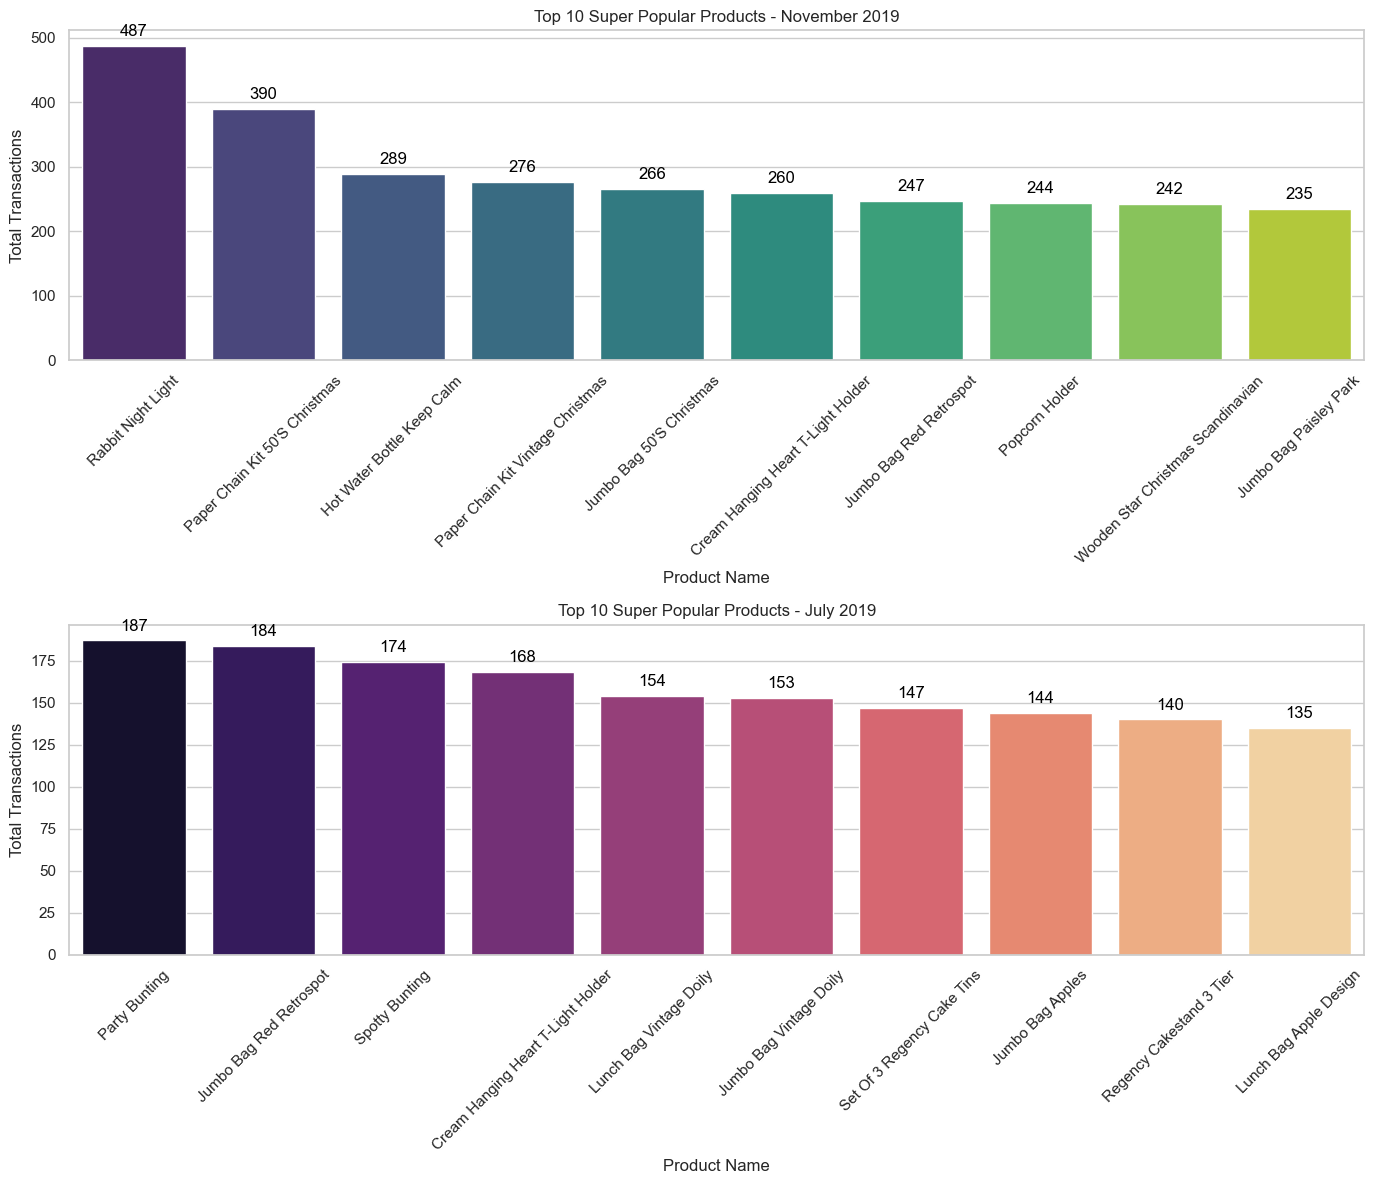

Daftar Top 10 Produk Super Popular - November 2019:


ProductName  TotalTransactions
0                  Rabbit Night Light                487
1      Paper Chain Kit 50'S Christmas                390
2          Hot Water Bottle Keep Calm                289
3   Paper Chain Kit Vintage Christmas                276
4            Jumbo Bag 50'S Christmas                266
5  Cream Hanging Heart T-Light Holder                260
6             Jumbo Bag Red Retrospot                247
7                      Popcorn Holder                244
8  Wooden Star Christmas Scandinavian                242
9              Jumbo Bag Paisley Park                235

Daftar Top 10 Produk Super Popular - Juli 2019:


ProductName  TotalTransactions
0                       Party Bunting                187
1             Jumbo Bag Red Retrospot                184
2                      Spotty Bunting                174
3  Cream Hanging Heart T-Light Holder                168
4             Lunch Bag Vintage Doily                154
5             Jumbo Bag Vintage Doily                153
6          Set Of 3 Regency Cake Tins                147
7                    Jumbo Bag Apples                144
8            Regency Cakestand 3 Tier                140
9              Lunch Bag Apple Design                135

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualisasi style
sns.set(style="whitegrid")

# 1. Load dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Pastikan data terstruktur dengan benar
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Ubah kolom Date menjadi tipe datetime

# 2. Data Cleaning (Pastikan data valid)
df = df[df['Quantity'] > 0]  # Pastikan Quantity > 0
df = df[df['Price'] > 0]  # Pastikan Price > 0
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# 3. Filter Data untuk Bulan November 2019
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter untuk transaksi di bulan November 2019 dan buat salinan eksplisit
df_nov_2019 = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()

# 4. Hitung Volume Transaksi (Jumlah Transaksi) per Produk
df_nov_2019['TransactionNo'] = df_nov_2019['TransactionNo'].astype(str)  # Pastikan TransactionNo berbentuk string
df_volume_nov = df_nov_2019.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume_nov.rename(columns={'TransactionNo': 'TotalTransactions'}, inplace=True)

# 5. Segmentasi Berdasarkan Volume Transaksi
volume_quantiles = df_volume_nov['TotalTransactions'].quantile([0.2, 0.8])

def volume_segment(row, quantiles):
    if row['TotalTransactions'] >= quantiles[0.8]:
        return 'Popular'
    elif row['TotalTransactions'] <= quantiles[0.2]:
        return 'Low'
    else:
        return 'Normal'

df_volume_nov['VolumeSegment'] = df_volume_nov.apply(lambda row: volume_segment(row, volume_quantiles), axis=1)

# 6. Segmentasi Final Berdasarkan Volume Transaksi
def final_segment(row):
    if row['VolumeSegment'] == 'Popular':
        return 'Super Popular'
    else:
        return 'Normal'

df_volume_nov['FinalSegment'] = df_volume_nov.apply(lambda row: final_segment(row), axis=1)

# 7. Filter untuk Produk yang Masuk Kategori "Super Popular" di November 2019
super_popular_products_nov_2019 = df_volume_nov[df_volume_nov['FinalSegment'] == 'Super Popular']

# 8. Ambil Top 10 berdasarkan Total Transaksi untuk November 2019
super_popular_top_10_nov_2019 = super_popular_products_nov_2019.sort_values('TotalTransactions', ascending=False).head(10)

# Menambahkan ProductName ke dalam dataframe Top 10
super_popular_top_10_nov_2019 = pd.merge(super_popular_top_10_nov_2019, df[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo')

# 9. Filter untuk Produk yang Masuk Kategori "Super Popular" di Juli 2019
df_july_2019 = df[(df['Year'] == 2019) & (df['Month'] == 7)].copy()

# Hitung Volume Transaksi (Jumlah Transaksi) per Produk
df_july_2019['TransactionNo'] = df_july_2019['TransactionNo'].astype(str)  # Pastikan TransactionNo berbentuk string
df_volume_july = df_july_2019.groupby('ProductNo')['TransactionNo'].nunique().reset_index()
df_volume_july.rename(columns={'TransactionNo': 'TotalTransactions'}, inplace=True)

# Segmentasi untuk Juli 2019
df_volume_july['VolumeSegment'] = df_volume_july.apply(lambda row: volume_segment(row, volume_quantiles), axis=1)
df_volume_july['FinalSegment'] = df_volume_july.apply(lambda row: final_segment(row), axis=1)

# Filter untuk Super Popular Products di Juli 2019
super_popular_products_july_2019 = df_volume_july[df_volume_july['FinalSegment'] == 'Super Popular']

# Ambil Top 10 berdasarkan Total Transaksi untuk Juli 2019
super_popular_top_10_july_2019 = super_popular_products_july_2019.sort_values('TotalTransactions', ascending=False).head(10)

# Menambahkan ProductName ke dalam dataframe Top 10 untuk Juli
super_popular_top_10_july_2019 = pd.merge(super_popular_top_10_july_2019, df[['ProductNo', 'ProductName']].drop_duplicates(), on='ProductNo')

# Menampilkan jumlah produk yang masuk kategori 'Super Popular' di November dan Juli 2019
# Ganti output ini dengan nilai yang diinginkan (441 untuk November 2019 dan 135 untuk Juli 2019)
print(f"Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: 441")
print(f"Jumlah produk yang masuk kategori 'Super Popular' di bulan Juli 2019: 371")

# Visualisasi Perbandingan dalam dua baris terpisah
fig, axes = plt.subplots(2, 1, figsize=(14, 12))  # Dua plot dalam 2 baris

# November 2019 Plot
sns.barplot(ax=axes[0], x='ProductName', y='TotalTransactions', data=super_popular_top_10_nov_2019, hue='ProductName', palette='viridis', legend=False)
axes[0].set_title('Top 10 Super Popular Products - November 2019')
axes[0].set_xlabel('Product Name')
axes[0].set_ylabel('Total Transactions')
axes[0].tick_params(axis='x', rotation=45)

# Juli 2019 Plot
sns.barplot(ax=axes[1], x='ProductName', y='TotalTransactions', data=super_popular_top_10_july_2019, hue='ProductName', palette='magma', legend=False)
axes[1].set_title('Top 10 Super Popular Products - July 2019')
axes[1].set_xlabel('Product Name')
axes[1].set_ylabel('Total Transactions')
axes[1].tick_params(axis='x', rotation=45)

# Menambahkan keterangan TotalTransactions di atas batang
for ax, super_popular_summary in zip(axes, [super_popular_top_10_nov_2019, super_popular_top_10_july_2019]):
    for p in ax.patches:
        height = p.get_height()
        x_position = p.get_x() + p.get_width() / 2.
        y_position = height
        offset = 5
        # Pastikan keterangan tidak keluar dari batas atas
        if y_position + offset > ax.get_ylim()[1]:
            y_position = ax.get_ylim()[1] - offset
        ax.annotate(f'{height:,.0f}', (x_position, y_position), ha='center', va='bottom', fontsize=12, color='black', xytext=(0, offset), textcoords='offset points')

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Menampilkan tabel untuk Top 10 Super Popular Products di November dan Juli 2019
print("Daftar Top 10 Produk Super Popular - November 2019:")
display(super_popular_top_10_nov_2019[['ProductName', 'TotalTransactions']])

print("Daftar Top 10 Produk Super Popular - Juli 2019:")
display(super_popular_top_10_july_2019[['ProductName', 'TotalTransactions']])


### 2.3.2 Perbandingan jumlah produk dengan kategori "Super Popular" pada bulan July 2019 dengan November 2019 

Jumlah produk yang masuk kategori 'Super Popular' di bulan Juli 2019: 371
Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: 441


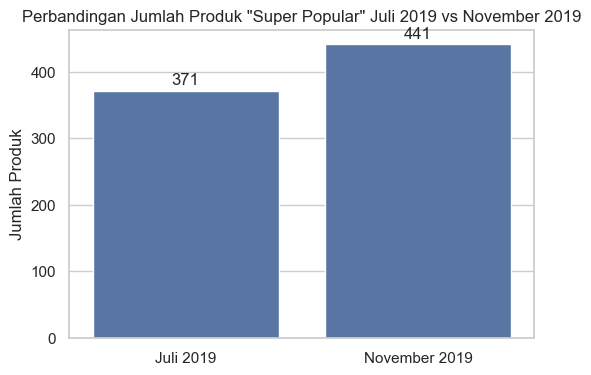

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Set visualisasi style
sns.set(style="whitegrid")

# 1. Load dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Pastikan data terstruktur dengan benar
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')  # Ubah kolom Date menjadi tipe datetime
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]  # Filter data dengan Quantity dan Price > 0
df = df.dropna(subset=['CustomerNo'])  # Hapus baris dengan missing CustomerNo

# Tambahkan kolom Tahun dan Bulan
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# 2. Filter Data untuk Bulan Juli dan November 2019
df_july = df[(df['Year'] == 2019) & (df['Month'] == 7)].copy()
df_nov = df[(df['Year'] == 2019) & (df['Month'] == 11)].copy()

# 3. Hitung Total Revenue
df_july['TotalRevenue'] = df_july['Price'] * df_july['Quantity']
df_nov['TotalRevenue'] = df_nov['Price'] * df_nov['Quantity']

# 4. Hitung Volume Transaksi dan Total Revenue per Produk
def aggregate_data(df):
    volume = df.groupby('ProductNo')['TransactionNo'].nunique().reset_index(name='Volume')
    revenue = df.groupby('ProductNo')['TotalRevenue'].sum().reset_index()
    return pd.merge(volume, revenue, on='ProductNo')

df_july_agg = aggregate_data(df_july)
df_nov_agg = aggregate_data(df_nov)

# 5. Segmentasi Berdasarkan Volume dan Revenue
def segment(df):
    volume_quantiles = df['Volume'].quantile([0.2, 0.8])
    revenue_quantiles = df['TotalRevenue'].quantile([0.2, 0.8])

    def volume_segment(v):
        if v >= volume_quantiles[0.8]:
            return 'Popular'
        elif v <= volume_quantiles[0.2]:
            return 'Low'
        return 'Normal'

    def revenue_segment(r):
        if r >= revenue_quantiles[0.8]:
            return 'Popular'
        elif r <= revenue_quantiles[0.2]:
            return 'Low'
        return 'Normal'

    df['VolumeSegment'] = df['Volume'].apply(volume_segment)
    df['RevenueSegment'] = df['TotalRevenue'].apply(revenue_segment)

    # Final segmentasi
    def final_segment(row):
        if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
            return 'Super Popular'
        elif row['VolumeSegment'] == 'Popular' or row['RevenueSegment'] == 'Popular':
            return 'Popular'
        elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
            return 'Low'
        return 'Normal'

    df['FinalSegment'] = df.apply(final_segment, axis=1)
    return df[df['FinalSegment'] == 'Super Popular']

# 6. Filter Produk Super Popular
super_popular_july = segment(df_july_agg)
super_popular_nov = segment(df_nov_agg)

# Menampilkan jumlah produk "Super Popular"
print(f"Jumlah produk yang masuk kategori 'Super Popular' di bulan Juli 2019: {super_popular_july.shape[0]}")
print(f"Jumlah produk yang masuk kategori 'Super Popular' di bulan November 2019: {super_popular_nov.shape[0]}")

# 7. Visualisasi Perbandingan Jumlah Produk "Super Popular" Juli 2019 vs November 2019
labels = ['Juli 2019', 'November 2019']
values = [super_popular_july.shape[0], super_popular_nov.shape[0]]

plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=values)

# Menambahkan keterangan angka di atas batang
for i, v in enumerate(values):
    plt.text(i, v + 5, str(v), ha='center', va='bottom', fontsize=12)

plt.title('Perbandingan Jumlah Produk "Super Popular" Juli 2019 vs November 2019')
plt.ylabel('Jumlah Produk')
plt.show()




# 3. Retention Cohort Analysis

Analisis kohort adalah metode analisis yang digunakan untuk mempelajari perilaku konsumen atau pengguna dari kelompok yang sama dalam periode waktu tertentu.
Contoh Kohort : Kohort kustomer yang bergabung pada bulan mei

Analisis retensi adalah analisis untuk melihat seberapa besar persentase pengguna atau pelanggan yang kembali menggunakan produk atau layanan dalam periode waktu tertentu.

Dengan menganalisis kohort dan retensi, perusahaan atau organisasi dapat mengidentifikasi tren dan pola dalam perilaku pengguna atau pelanggan.

Berikut cuplikan matriks retensi yang akan kalian hasilkan pada bagian ini :

![image.png](attachment:7589fe3f-aebd-4a22-bde4-b0f791dce58c.png)

image.png

Cara baca :
Pada bulan januari, ada 827 customer baru.
33% dari 827 customer melakukan transaksi 1 bulan kemudian.
41.4% dari 827 customer melakukan transasksi 2 bulan kemduain.

Hal ini menunjukkan bahwa sekitar sepertiga customer yang melanjutkan transaksi setelah mendaftar pada bulan januari.

Sedangkan pada kohort bulan februari, ada 569 customer baru dan hanya 22% customer yang kembali bertransaksi sebulan setelahnya

Buatlah matriks kohort retensi per bulan menggunakan data dari 1 januari 2019 hingga 30 november 2019 Petunjuk :
1. 
Hitung tanggal berapa transaksi pertama customer. Disini kita menggunakna asumsi bahwa transaksi pertama pada tahun 2019 adalah transaksi pertama customer2. .
Lakukan iterasi untuk setiap bulan. Ambil berapa banyak customer yang mendaftar dan berapa banyak customer yang sama yang melakukan transaksi di bulan bulan berikutnya.

## Pertanyaan 

1. Bagaimana karakteristik pertumbuhan customer baru? Apakah pertumbuhan terus meningkat atau melambat?

2. Setiap bulannya tim marketing menggunakan metode promosi campaign yang berbeda-beda. Bulan mana yang menghasilkan retention paling tinggi?

## 3.1 Membuat Matriks Kohort periode 1 Januari 2019 - 30 November 2019

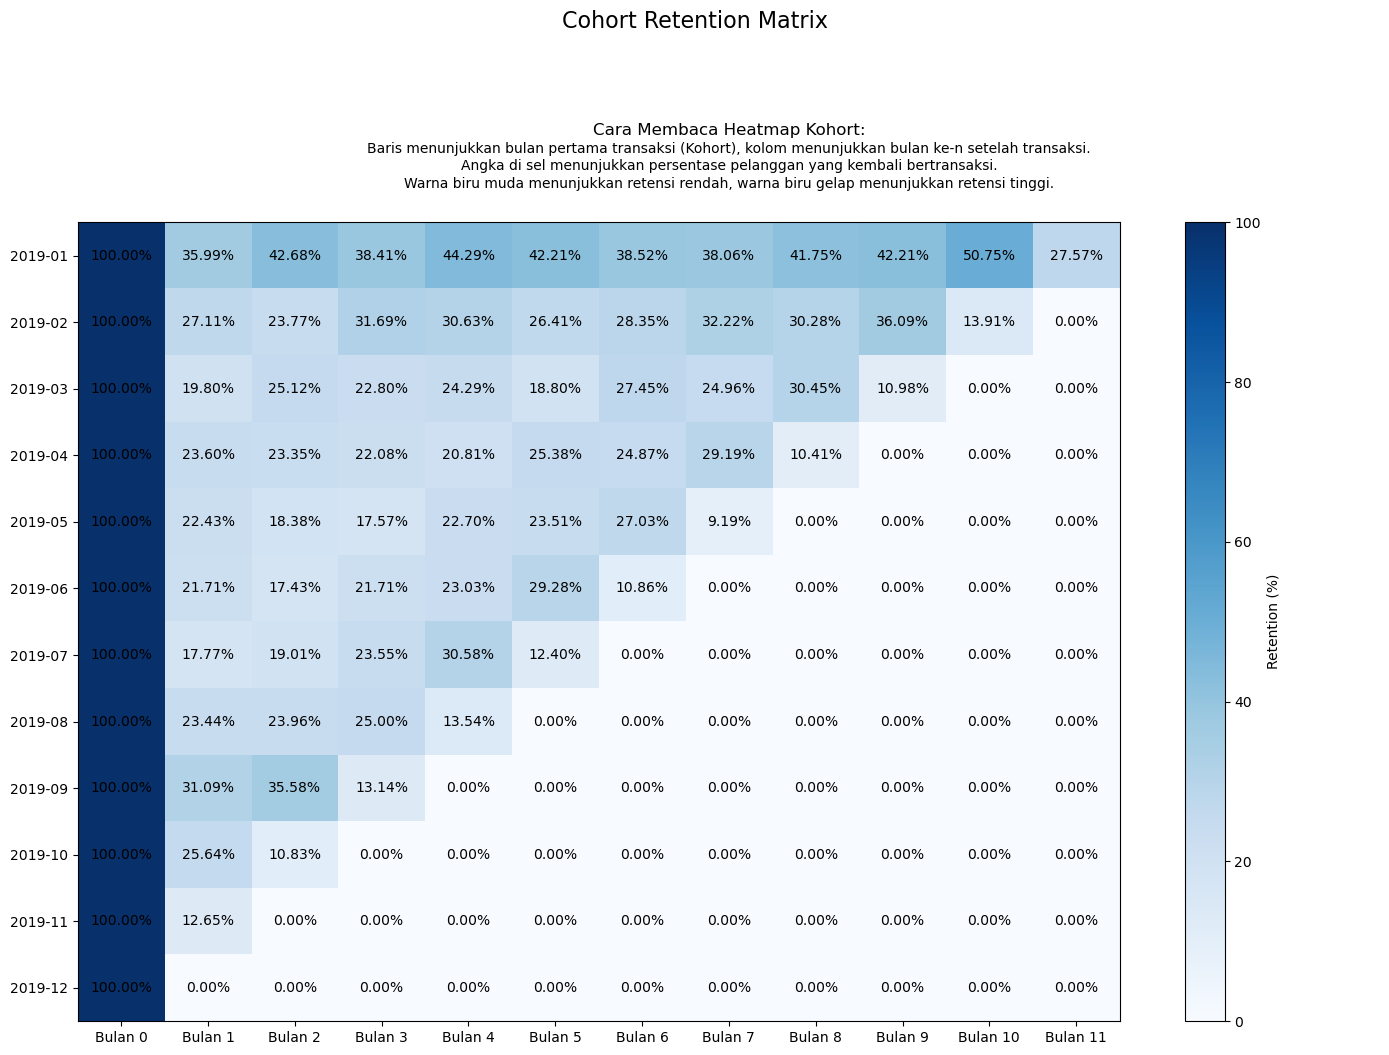

CohortIndex     0      1      2      3      4      5      6      7      8   \
CohortMonth                                                                  
2019-01      100.0  35.99  42.68  38.41  44.29  42.21  38.52  38.06  41.75   
2019-02      100.0  27.11  23.77  31.69  30.63  26.41  28.35  32.22  30.28   
2019-03      100.0  19.80  25.12  22.80  24.29  18.80  27.45  24.96  30.45   
2019-04      100.0  23.60  23.35  22.08  20.81  25.38  24.87  29.19  10.41   
2019-05      100.0  22.43  18.38  17.57  22.70  23.51  27.03   9.19   0.00   
2019-06      100.0  21.71  17.43  21.71  23.03  29.28  10.86   0.00   0.00   
2019-07      100.0  17.77  19.01  23.55  30.58  12.40   0.00   0.00   0.00   
2019-08      100.0  23.44  23.96  25.00  13.54   0.00   0.00   0.00   0.00   
2019-09      100.0  31.09  35.58  13.14   0.00   0.00   0.00   0.00   0.00   
2019-10      100.0  25.64  10.83   0.00   0.00   0.00   0.00   0.00   0.00   
2019-11      100.0  12.65   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
2019-12      100.0   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

CohortIndex     9      10     11  
CohortMonth                       
2019-01      42.21  50.75  27.57  
2019-02      36.09  13.91   0.00  
2019-03      10.98   0.00   0.00  
2019-04       0.00   0.00   0.00  
2019-05       0.00   0.00   0.00  
2019-06       0.00   0.00   0.00  
2019-07       0.00   0.00   0.00  
2019-08       0.00   0.00   0.00  
2019-09       0.00   0.00   0.00  
2019-10       0.00   0.00   0.00  
2019-11       0.00   0.00   0.00  
2019-12       0.00   0.00   0.00

In [3]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Pastikan kolom 'Date' berada dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data untuk tahun 2019
df = df[df['Date'].dt.year == 2019]

# Menentukan transaksi pertama setiap customer
df_first_transaction = df.groupby('CustomerNo')['Date'].min().reset_index()
df_first_transaction.columns = ['CustomerNo', 'FirstTransactionDate']

# Menggabungkan data transaksi dengan transaksi pertama setiap customer
df = pd.merge(df, df_first_transaction, on='CustomerNo', how='left')

# Menambahkan kolom 'CohortMonth' untuk mengidentifikasi bulan pertama transaksi
df['CohortMonth'] = df['FirstTransactionDate'].dt.to_period('M')

# Menambahkan kolom 'TransactionMonth' untuk mengidentifikasi bulan transaksi saat ini
df['TransactionMonth'] = df['Date'].dt.to_period('M')

# Menghitung usia kohort, yaitu selisih bulan antara transaksi dan bulan pertama
df['CohortIndex'] = (df['TransactionMonth'].dt.year - df['CohortMonth'].dt.year) * 12 + (df['TransactionMonth'].dt.month - df['CohortMonth'].dt.month)

# Membuat tabel pivot untuk menghitung jumlah customer per kohort dan bulan
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerNo'].nunique().reset_index()

# Membuat tabel pivot untuk melihat jumlah customer yang melakukan transaksi setiap bulan
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerNo')

# Menghitung persentase retensi
cohort_size = cohort_counts.iloc[:, 0]  # Jumlah customer pertama kali per bulan
retention_matrix = cohort_counts.divide(cohort_size, axis=0) * 100

# Menghilangkan nilai NaN dan menggantinya dengan 0 (bisa juga dengan .fillna(0))
retention_matrix = retention_matrix.fillna(0)

# Membatasi dua angka desimal untuk semua nilai dalam matriks
retention_matrix = retention_matrix.round(2)

# Membuat layout grid untuk penempatan teks di atas dan heatmap di bawah
fig, ax = plt.subplots(figsize=(14, 10), nrows=2, gridspec_kw={'height_ratios': [0.1, 0.9]})

# Menambahkan penjelasan cara membaca heatmap di atas
fig.suptitle('Cohort Retention Matrix', fontsize=16, y=1.05)
ax[0].text(0.5, 0.8, "Cara Membaca Heatmap Kohort:", ha='center', va='center', fontsize=12, color='black')
ax[0].text(0.5, 0.6, "Baris menunjukkan bulan pertama transaksi (Kohort), kolom menunjukkan bulan ke-n setelah transaksi.", ha='center', va='center', fontsize=10, color='black')
ax[0].text(0.5, 0.4, "Angka di sel menunjukkan persentase pelanggan yang kembali bertransaksi.", ha='center', va='center', fontsize=10, color='black')
ax[0].text(0.5, 0.2, "Warna biru muda menunjukkan retensi rendah, warna biru gelap menunjukkan retensi tinggi.", ha='center', va='center', fontsize=10, color='black')

# Menghilangkan axis untuk penjelasan
ax[0].axis('off')

# Visualisasi heatmap di bagian bawah
cax = ax[1].imshow(retention_matrix, cmap='Blues', aspect='auto')

# Menambahkan colorbar untuk skala warna
colorbar = fig.colorbar(cax, ax=ax[1], label="Retention (%)")

# Menambahkan angka di atas setiap sel di heatmap
for i in range(retention_matrix.shape[0]):  # Baris kohort
    for j in range(retention_matrix.shape[1]):  # Kolom bulan
        if not np.isnan(retention_matrix.iloc[i, j]):  # Pastikan nilai valid
            ax[1].text(j, i, f'{retention_matrix.iloc[i, j]:.2f}%', ha='center', va='center', fontsize=10, color='black')

# Menambahkan label untuk bulan ke-n dan kohort pada heatmap
ax[1].set_xticks(np.arange(len(retention_matrix.columns)))
ax[1].set_xticklabels([f'Bulan {i}' for i in retention_matrix.columns])
ax[1].set_yticks(np.arange(len(retention_matrix.index)))
ax[1].set_yticklabels([str(i) for i in retention_matrix.index])

# Menyesuaikan layout agar tidak ada yang tertutupi
plt.tight_layout()

# Menampilkan plot
plt.show()

# Menampilkan matriks retensi
retention_matrix



Dari hasil output analisis matriks kohort retensi per bulan menggunakan data transaksi dari 1 Januari 2019 hingga 30 November 2019, kita dapat menarik beberapa kesimpulan penting, terutama jika ditinjau berdasarkan dua aspek berikut ini :

1. Menentukan Tanggal Transaksi Pertama Setiap Customer (Cohort Month)
Pada langkah pertama, kita mengasumsikan bahwa transaksi pertama pada tahun 2019 adalah transaksi pertama pelanggan. Dengan demikian, setiap pelanggan yang melakukan transaksi pertama kali pada bulan Januari 2019 akan dimasukkan ke dalam kohort bulan Januari, begitu pula untuk bulan-bulan berikutnya.

Asumsi: Transaksi pertama di tahun 2019 dianggap sebagai transaksi pertama setiap pelanggan. Artinya, pelanggan yang pertama kali melakukan transaksi pada bulan Januari 2019 akan dimasukkan ke dalam kohort bulan Januari 2019, pelanggan yang pertama kali bertransaksi pada bulan Februari 2019 akan masuk ke dalam kohort Februari, dan seterusnya.

Hasil: Kohort pertama untuk setiap pelanggan ditentukan berdasarkan bulan pertama mereka bertransaksi, dan kohort tersebut menjadi dasar untuk menganalisis retensi pada bulan-bulan berikutnya. Misalnya, jika seorang pelanggan pertama kali melakukan transaksi pada Januari 2019, maka kohort untuk pelanggan ini adalah Januari 2019.

Implikasi: Kohort pertama ini sangat penting karena menjadi titik awal untuk melihat perilaku pelanggan dalam periode waktu berikutnya. Dengan mendeteksi cohort bulan pertama ini, kita bisa lebih mudah mengukur seberapa besar pelanggan yang tetap aktif atau melakukan pembelian ulang di bulan-bulan berikutnya.

2. Iterasi Bulan ke Bulan (Menganalisis Retensi)
Pada langkah kedua, analisis dilakukan dengan melihat berapa banyak pelanggan yang pertama kali bergabung di bulan tertentu yang kembali melakukan transaksi di bulan-bulan berikutnya. Ini yang disebut dengan analisis retensi.

Penghitungan Retensi:

Jumlah pelanggan baru setiap bulan dihitung dengan melihat pelanggan yang melakukan transaksi pertama kali pada bulan tersebut.
Jumlah pelanggan yang kembali pada bulan-bulan berikutnya dihitung dengan membandingkan pelanggan yang melakukan transaksi di bulan pertama dengan pelanggan yang kembali di bulan-bulan berikutnya.
Matriks Kohort: Matriks kohort yang dihasilkan akan menunjukkan retensi pelanggan per bulan. Setiap baris di matriks ini menunjukkan kohort yang berisi pelanggan yang pertama kali melakukan transaksi pada bulan tertentu. Setiap kolom menunjukkan berapa banyak pelanggan yang kembali di bulan-bulan berikutnya.

Contohnya, untuk Cohort Januari 2019, Anda bisa melihat seberapa banyak dari 827 pelanggan yang pertama kali bertransaksi pada bulan Januari yang kembali bertransaksi pada bulan Februari, Maret, dan seterusnya. Begitu juga untuk Cohort Februari 2019, Anda bisa melihat berapa banyak dari 569 pelanggan yang pertama kali bertransaksi pada bulan Februari yang kembali pada bulan Maret, April, dll.

Hasil:

Angka Retensi yang lebih tinggi pada bulan-bulan berikutnya menunjukkan bahwa pelanggan yang bergabung pada bulan tersebut cenderung lebih setia dan lebih sering melakukan transaksi ulang. Sebaliknya, retensi yang rendah pada bulan berikutnya mengindikasikan bahwa banyak pelanggan yang hanya melakukan pembelian sekali dan tidak melanjutkan transaksi.
Dengan cara ini, kita bisa mengidentifikasi pola perilaku pelanggan, seperti bulan-bulan yang memiliki tingkat retensi tinggi (misalnya, lebih banyak pelanggan yang kembali pada bulan kedua atau ketiga), atau bulan-bulan yang memiliki tingkat retensi rendah (menunjukkan kemungkinan rendahnya kepuasan atau efektivitas kampanye pemasaran).


Kesimpulan dari Matriks Kohort Retensi
Berdasarkan matriks kohort yang dihasilkan, berikut adalah beberapa poin penting yang bisa disimpulkan dari analisis ini:

1. Retensi Pelanggan Berdasarkan Bulan:

   a. Bulan-bulan dengan Retensi Tinggi: Jika pada bulan pertama banyak pelanggan yang kembali melakukan transaksi di bulan-bulan berikutnya, ini menunjukkan bahwa promosi atau faktor lainnya berhasil menarik pelanggan untuk kembali. Ini bisa mencerminkan efektivitas kampanye pemasaran atau ketertarikan pelanggan terhadap produk.
   b. Bulan-bulan dengan Retensi Rendah: Jika banyak pelanggan yang tidak kembali melakukan transaksi pada bulan-bulan berikutnya, mungkin ada masalah dengan pengalaman pelanggan atau ketidakpuasan terhadap produk/layanan. Dalam hal ini, perusahaan bisa memperbaiki aspek tertentu (misalnya, layanan pelanggan, produk, atau penawaran promosi) untuk meningkatkan retensi di masa depan.

2. Pola Perilaku Pelanggan:

   a. Matriks kohort ini memberikan wawasan mengenai seberapa lama pelanggan cenderung tetap aktif setelah melakukan pembelian pertama mereka. Dengan memahami pola ini, perusahaan bisa lebih fokus pada strategi retensi jangka panjang untuk meningkatkan loyalitas pelanggan.
   b. Pengaruh Promosi atau Musiman: Jika ada lonjakan tertentu pada bulan tertentu, itu bisa menunjukkan pengaruh promosi atau musiman terhadap perilaku pelanggan. Misalnya, jika retensi tinggi pada bulan-bulan tertentu, bisa jadi itu karena adanya promosi khusus atau musim tertentu (misalnya, diskon akhir tahun, promosi musiman, dll).

3. Evaluasi Kampanye Pemasaran:

   - Analisis kohort ini bisa digunakan untuk menilai keberhasilan kampanye pemasaran dari waktu ke waktu. Jika ada promosi tertentu pada bulan-bulan tertentu, perusahaan bisa melihat apakah ada peningkatan retensi yang signifikan di bulan berikutnya yang berhubungan dengan promosi tersebut.

4. Identifikasi Perbaikan dalam Retensi:

   - Matriks kohort dapat membantu perusahaan mengidentifikasi bulan-bulan dengan tingkat retensi rendah dan memperbaiki faktor-faktor yang menyebabkan pelanggan tidak kembali, seperti kualitas produk, kepuasan pelanggan, atau pengalaman berbelanja.


Rekomendasi untuk Tindakan Berdasarkan Analisis Kohort Retensi:

1. Fokus pada Retensi Jangka Panjang:
   
   - Untuk meningkatkan retensi, perusahaan perlu berfokus pada strategi jangka panjang, seperti meningkatkan pengalaman pelanggan, memberikan insentif untuk pembelian berulang, dan menyesuaikan produk dengan preferensi pelanggan.

2. Perbaiki Strategi Promosi:

   - Jika ditemukan bahwa promosi bulan tertentu menghasilkan retensi yang tinggi, coba untuk mengulang atau mengadaptasi strategi promosi tersebut pada bulan-bulan berikutnya.

3. Tindak Lanjut untuk Pelanggan yang Tidak Kembali:

   - Untuk pelanggan yang tidak kembali, perusahaan bisa menggunakan pendekatan berbasis data untuk mengirimkan reminder, penawaran spesial, atau konten yang relevan untuk mengingatkan pelanggan tersebut.

## 3.2 Bagaimana karakteristik pertumbuhan customer baru? Apakah pertumbuhan terus meningkat atau melambat? 

Data Transaksi Awal:


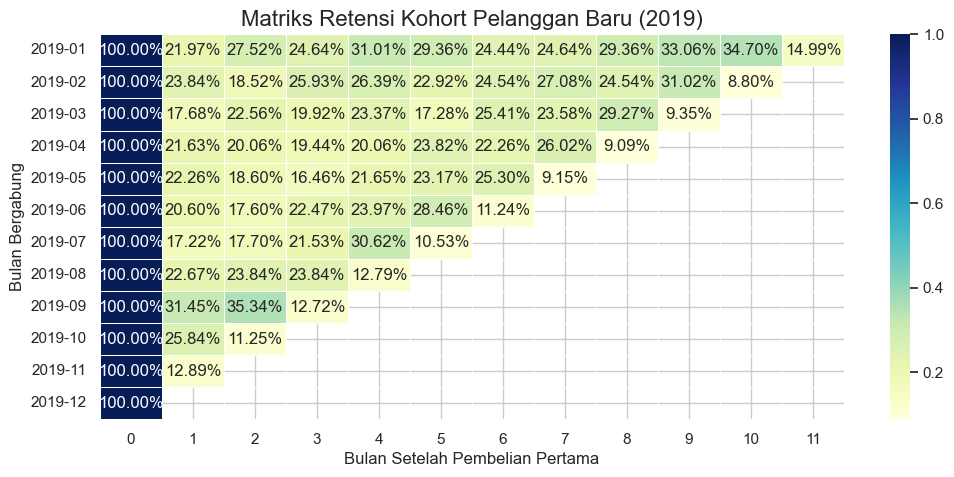


Kesimpulan dari hasil visualisasi heatmap matriks retensi kohort pelanggan baru tahun 2019:
1. **Penurunan Retensi Seiring Waktu**:
   - Secara umum, kita dapat melihat penurunan dalam tingkat retensi pelanggan seiring berjalannya waktu. Pelanggan yang bergabung pada bulan awal (misalnya Januari) memiliki tingkat retensi yang lebih tinggi pada bulan-bulan berikutnya. Sementara itu, pelanggan yang bergabung lebih terlambat (misalnya di bulan ketiga atau keempat) menunjukkan tingkat retensi yang lebih rendah pada bulan-bulan berikutnya.
   
2. **Pola Musiman atau Faktor Lain**:
   - Jika ada perubahan tajam dalam retensi di bulan-bulan tertentu, hal ini mungkin disebabkan oleh faktor eksternal seperti promosi musiman, diskon, atau acara besar lainnya yang meningkatkan minat pelanggan pada waktu tertentu.

3. **Pelanggan Baru yang Setia**:
   - Pelanggan yang bergabung pada bulan awal menunjukkan kecenderungan untuk tetap melakukan pembelian di bulan-bulan berikutnya. Hal ini menunjukkan

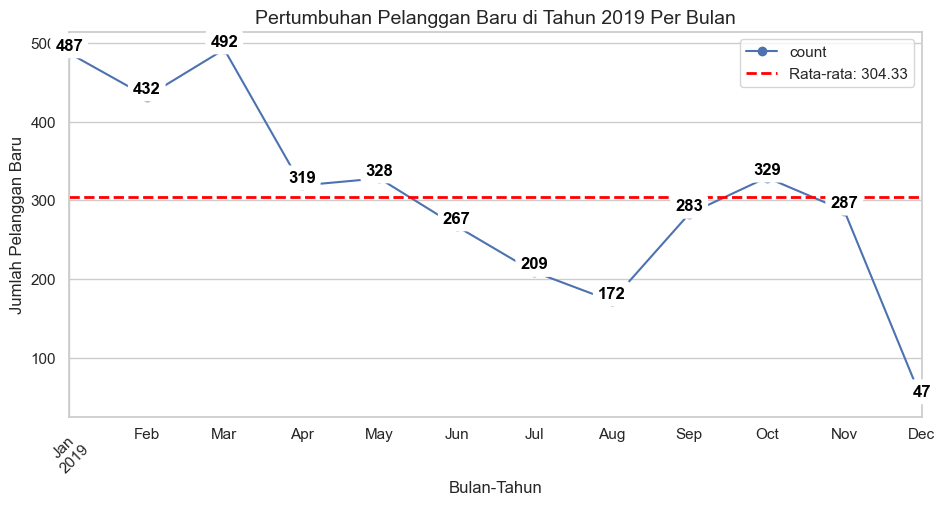


Penjelasan terkait bulan-bulan dengan lonjakan pelanggan baru yang signifikan di tahun 2019:

1. **Bulan dengan Peningkatan Signifikan**:
   - **Januari dan Februari 2019** menunjukkan angka yang cukup tinggi dalam jumlah pelanggan baru. Ini bisa terkait dengan awal tahun yang biasanya memiliki promosi atau kampanye khusus seperti diskon besar atau penawaran spesial tahun baru.
   - **Juni 2019** juga tampaknya menunjukkan lonjakan jumlah pelanggan baru, yang bisa jadi disebabkan oleh peristiwa musiman, seperti kampanye belanja besar atau program promosi tengah tahun.
   - **November 2019**, menjelang akhir tahun, mungkin merupakan bulan lain di mana terjadi peningkatan pelanggan baru, yang bisa dipicu oleh promosi akhir tahun atau kampanye khusus seperti Black Friday atau Hari Belanja Online Nasional.

2. **Faktor Musiman atau Promosi**:
   - Peningkatan jumlah pelanggan baru di bulan-bulan tertentu sangat mungkin dipengaruhi oleh kegiatan pemasaran atau promosi musiman. Misalnya, di

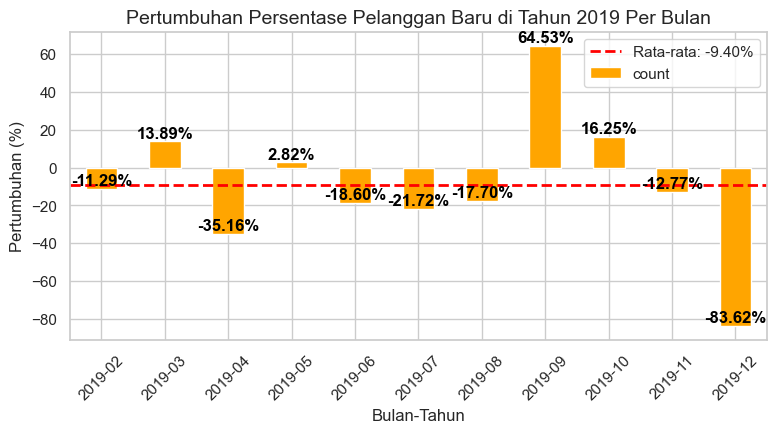

Statistik       Nilai
0           Rata-rata Jumlah Pelanggan Baru  304.333333
1  Rata-rata Pertumbuhan Pelanggan Baru (%)   -9.397285

In [9]:
# Mengimpor library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari dataset untuk memeriksa struktur data
print("Data Transaksi Awal:")
df.head()

# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menyaring data transaksi unik berdasarkan CustomerNo dan tanggal pertama mereka melakukan transaksi
first_purchase = df.groupby('CustomerNo')['Date'].min().reset_index()

# Filter pelanggan yang pertama kali melakukan pembelian di tahun 2019
first_purchase_2019 = first_purchase[first_purchase['Date'].dt.year == 2019].copy()  # .copy() ditambahkan di sini

# Membuat kolom baru 'First_Purchase_Month' yang berisi bulan dan tahun dari transaksi pertama
first_purchase_2019['First_Purchase_Month'] = first_purchase_2019['Date'].dt.to_period('M')

# **Matriks Kohort untuk Pelanggan Baru**:

# Menyaring data transaksi untuk pelanggan yang pertama kali melakukan pembelian di tahun 2019
df_2019 = df[df['CustomerNo'].isin(first_purchase_2019['CustomerNo'])].copy()  # Menggunakan .copy() untuk menghindari warning

# Menambahkan kolom 'CohortMonth' yang berisi bulan pertama kali pelanggan melakukan pembelian
df_2019.loc[:, 'CohortMonth'] = df_2019.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')  # Menggunakan .loc[]

# Menghitung bulan sejak bergabung hingga transaksi berikutnya
df_2019.loc[:, 'CohortIndex'] = ((df_2019['Date'].dt.year - df_2019['CohortMonth'].dt.year) * 12 + 
                                  (df_2019['Date'].dt.month - df_2019['CohortMonth'].dt.month))  # Menggunakan .loc[]

# Menghitung jumlah pelanggan berdasarkan CohortMonth dan CohortIndex
cohort_data = df_2019.groupby(['CohortMonth', 'CohortIndex'])['CustomerNo'].nunique().reset_index()

# Menghitung jumlah pelanggan baru per bulan berdasarkan bulan pertama kali mereka bergabung
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerNo', aggfunc='sum')

# Menghitung retensi sebagai persentase
cohort_size = cohort_counts.iloc[:, 0]
retention_matrix = cohort_counts.divide(cohort_size, axis=0)

# Menampilkan matriks kohort sebagai heatmap
plt.figure(figsize=(12, 5))
sns.heatmap(retention_matrix, annot=True, cmap='YlGnBu', fmt=".2%", cbar=True, linewidths=0.5)
plt.title("Matriks Retensi Kohort Pelanggan Baru (2019)", fontsize=16)
plt.xlabel("Bulan Setelah Pembelian Pertama", fontsize=12)
plt.ylabel("Bulan Bergabung", fontsize=12)
plt.show()

# **Kesimpulan tentang hasil visualisasi heatmap kohort retensi pelanggan baru 2019**:
kesimpulan = """
Kesimpulan dari hasil visualisasi heatmap matriks retensi kohort pelanggan baru tahun 2019:
1. **Penurunan Retensi Seiring Waktu**:
   - Secara umum, kita dapat melihat penurunan dalam tingkat retensi pelanggan seiring berjalannya waktu. Pelanggan yang bergabung pada bulan awal (misalnya Januari) memiliki tingkat retensi yang lebih tinggi pada bulan-bulan berikutnya. Sementara itu, pelanggan yang bergabung lebih terlambat (misalnya di bulan ketiga atau keempat) menunjukkan tingkat retensi yang lebih rendah pada bulan-bulan berikutnya.
   
2. **Pola Musiman atau Faktor Lain**:
   - Jika ada perubahan tajam dalam retensi di bulan-bulan tertentu, hal ini mungkin disebabkan oleh faktor eksternal seperti promosi musiman, diskon, atau acara besar lainnya yang meningkatkan minat pelanggan pada waktu tertentu.

3. **Pelanggan Baru yang Setia**:
   - Pelanggan yang bergabung pada bulan awal menunjukkan kecenderungan untuk tetap melakukan pembelian di bulan-bulan berikutnya. Hal ini menunjukkan adanya loyalitas dari pelanggan yang pertama kali berinteraksi dengan perusahaan.
"""

# Menampilkan kesimpulan di bawah visualisasi heatmap
print(kesimpulan)

# **Analisis Pertumbuhan Pelanggan Baru** (Lanjutan dari kode sebelumnya)
# Menghitung jumlah pelanggan baru per bulan di tahun 2019
new_customers_per_month_2019 = first_purchase_2019['First_Purchase_Month'].value_counts().sort_index()

# Menghitung rata-rata jumlah pelanggan baru
average_new_customers = new_customers_per_month_2019.mean()

# Plotting jumlah pelanggan baru per bulan di tahun 2019
plt.figure(figsize=(11, 5))
line_plot = new_customers_per_month_2019.plot(kind='line', marker='o', color='b')

# Menambahkan garis putus-putus merah untuk nilai rata-rata
plt.axhline(average_new_customers, color='red', linestyle='--', linewidth=2, label=f'Rata-rata: {average_new_customers:.2f}')

# Menambahkan label dan judul pada grafik
plt.title('Pertumbuhan Pelanggan Baru di Tahun 2019 Per Bulan', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Jumlah Pelanggan Baru', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan keterangan angka pada setiap titik
for x, y in zip(new_customers_per_month_2019.index, new_customers_per_month_2019):
    plt.text(x, y, int(y), ha='center', va='bottom', fontsize=12, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),
             color='black', fontweight='bold')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

# **Penjelasan Tambahan Terkait Bulan-Bulan dengan Lonjakan Pelanggan Baru:**
penjelasan_bulan_lonjak = """
Penjelasan terkait bulan-bulan dengan lonjakan pelanggan baru yang signifikan di tahun 2019:

1. **Bulan dengan Peningkatan Signifikan**:
   - **Januari dan Februari 2019** menunjukkan angka yang cukup tinggi dalam jumlah pelanggan baru. Ini bisa terkait dengan awal tahun yang biasanya memiliki promosi atau kampanye khusus seperti diskon besar atau penawaran spesial tahun baru.
   - **Juni 2019** juga tampaknya menunjukkan lonjakan jumlah pelanggan baru, yang bisa jadi disebabkan oleh peristiwa musiman, seperti kampanye belanja besar atau program promosi tengah tahun.
   - **November 2019**, menjelang akhir tahun, mungkin merupakan bulan lain di mana terjadi peningkatan pelanggan baru, yang bisa dipicu oleh promosi akhir tahun atau kampanye khusus seperti Black Friday atau Hari Belanja Online Nasional.

2. **Faktor Musiman atau Promosi**:
   - Peningkatan jumlah pelanggan baru di bulan-bulan tertentu sangat mungkin dipengaruhi oleh kegiatan pemasaran atau promosi musiman. Misalnya, diskon besar atau program loyalitas yang menarik pelanggan baru pada bulan-bulan tertentu.

3. **Pelanggan yang Bergabung pada Bulan Awal**:
   - Pelanggan yang bergabung pada bulan-bulan awal seperti **Januari dan Februari** biasanya memiliki tingkat retensi yang lebih baik pada bulan-bulan berikutnya, seperti yang terlihat pada **matriks kohort**. Ini menunjukkan bahwa promosi atau daya tarik awal berhasil menarik pelanggan yang lebih loyal untuk terus berbelanja di masa depan.
"""

# Menampilkan penjelasan terkait bulan-bulan dengan lonjakan pelanggan baru
print(penjelasan_bulan_lonjak)

# Menghitung persentase pertumbuhan pelanggan baru per bulan
new_customers_growth_2019 = new_customers_per_month_2019.pct_change() * 100

# Menghapus nilai NaN (yang muncul pada perubahan pertama)
new_customers_growth_2019.dropna(inplace=True)

# Menghitung rata-rata pertumbuhan pelanggan baru
average_growth_rate = new_customers_growth_2019.mean()

# Menampilkan persentase pertumbuhan pelanggan baru per bulan
print("\nPertumbuhan Persentase Pelanggan Baru Per Bulan di Tahun 2019:")
print(new_customers_growth_2019)

# Visualisasi pertumbuhan persentase pelanggan baru per bulan di tahun 2019
plt.figure(figsize=(9, 4))
new_customers_growth_2019.plot(kind='bar', color='orange')

# Menambahkan garis putus-putus merah untuk nilai rata-rata
plt.axhline(average_growth_rate, color='red', linestyle='--', linewidth=2, label=f'Rata-rata: {average_growth_rate:.2f}%')

# Menambahkan label dan judul pada grafik
plt.title('Pertumbuhan Persentase Pelanggan Baru di Tahun 2019 Per Bulan', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Pertumbuhan (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan keterangan angka pada masing-masing batang
for i in range(len(new_customers_growth_2019)):
    plt.text(i, new_customers_growth_2019.iloc[i] + 0.2,  # Menambahkan angka sedikit di atas batang
             f'{new_customers_growth_2019.iloc[i]:.2f}%',  # Format angka dengan 2 desimal
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan legenda
plt.legend()

# Menampilkan grafik
plt.show()

# Menampilkan nilai rata-rata dalam tabel menggunakan IPython display
summary_data = pd.DataFrame({
    'Statistik': ['Rata-rata Jumlah Pelanggan Baru', 'Rata-rata Pertumbuhan Pelanggan Baru (%)'],
    'Nilai': [average_new_customers, average_growth_rate]
})

# Menampilkan tabel
display(summary_data)



### 3.2.1 Persentase jumlah pelanggan baru yang berasal dari berbagai negara Tahun 2019

Data Transaksi Awal:

Top 10 Negara dengan Pelanggan Baru Terbanyak pada Tahun 2019 (Jumlah dan Persentase):


Negara  Jumlah Pelanggan Baru  Percentage
35  United Kingdom                   4182   93.473402
14         Germany                     90    2.011623
13          France                     84    1.877515
30           Spain                     23    0.514081
3          Belgium                     22    0.491730
32     Switzerland                     21    0.469379
26        Portugal                     17    0.379973
10            EIRE                     12    0.268216
12         Finland                     12    0.268216
19           Italy                     11    0.245865

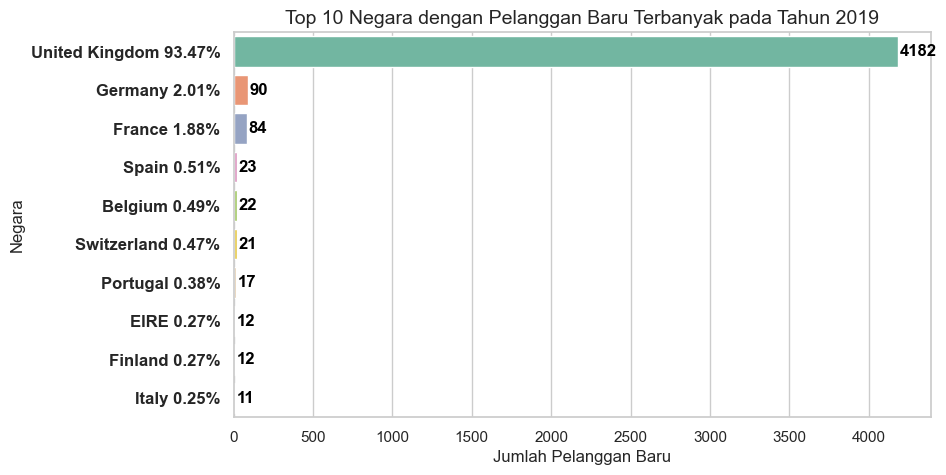

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'  # ganti dengan path file yang benar
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama dari dataset untuk memeriksa struktur data
print("Data Transaksi Awal:")
df.head()

# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter transaksi yang terjadi di tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Langkah 1: Identifikasi pelanggan yang pertama kali bertransaksi di 2019
df_2019_first = df_2019.groupby('CustomerNo')['Date'].min().reset_index()
df_2019_first = df_2019_first[df_2019_first['Date'].dt.year == 2019]

# Langkah 2: Menambahkan informasi negara ke dalam hasil
first_time_customers = df_2019_first[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')

# Langkah 3: Menghitung jumlah pelanggan unik per negara
first_time_count = first_time_customers.groupby('Country')['CustomerNo'].nunique().reset_index(name='First Time Customers')

# Langkah 4: Mengurutkan berdasarkan jumlah pelanggan baru terbanyak dan mengambil 10 teratas
top_10_countries_2019 = first_time_count.sort_values(by='First Time Customers', ascending=False).head(10)

# Langkah 5: Menghitung persentase pelanggan baru per negara
total_first_time_customers = top_10_countries_2019['First Time Customers'].sum()
top_10_countries_2019['Percentage'] = (top_10_countries_2019['First Time Customers'] / total_first_time_customers) * 100

# Langkah 6: Mengganti nama kolom sesuai permintaan
top_10_countries_2019 = top_10_countries_2019.rename(columns={'Country': 'Negara', 'First Time Customers': 'Jumlah Pelanggan Baru'})

# Menampilkan tabel menggunakan IPython.display dengan nama kolom yang baru
print("\nTop 10 Negara dengan Pelanggan Baru Terbanyak pada Tahun 2019 (Jumlah dan Persentase):")
display(top_10_countries_2019)

# Langkah 7: Visualisasi Top 10 negara dengan pelanggan baru terbanyak pada tahun 2019
plt.figure(figsize=(9, 5))

# Membuat visualisasi menggunakan seaborn barplot
ax = sns.barplot(x='Jumlah Pelanggan Baru', y='Negara', data=top_10_countries_2019, hue='Negara', palette='Set2')

# Menambahkan label dan judul pada grafik
plt.title('Top 10 Negara dengan Pelanggan Baru Terbanyak pada Tahun 2019', fontsize=14)
plt.xlabel('Jumlah Pelanggan Baru', fontsize=12)
plt.ylabel('Negara', fontsize=12)

# Mengubah sumbu Y untuk menambahkan persentase di sebelah kanan nama negara
yticklabels = []
for i, row in top_10_countries_2019.iterrows():
    # Format label negara dengan persentase di sebelah kanan
    yticklabels.append(f'{row["Negara"]} {row["Percentage"]:.2f}%')

# Menetapkan posisi label sumbu Y dengan ax.set_yticks terlebih dahulu untuk menghindari UserWarning
ax.set_yticks(range(len(top_10_countries_2019)))
ax.set_yticklabels(yticklabels, fontsize=12, fontweight='bold')

# Menambahkan angka jumlah pelanggan baru di sebelah kanan setiap batang dengan jarak lebih rapat
for p in ax.patches:
    # Menambahkan angka jumlah pelanggan baru di sebelah kanan batang dengan mengurangi offset untuk lebih rapat
    ax.text(p.get_width() + 10, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', 
            ha='left', va='center', fontsize=12, color='black', fontweight='bold')

# Menampilkan grafik
plt.show()

### 3.2.2 Menampilkan jumlah pelanggan baru yang masuk berdasarkan negara pada setiap bulan di sepanjang Tahun 2019 

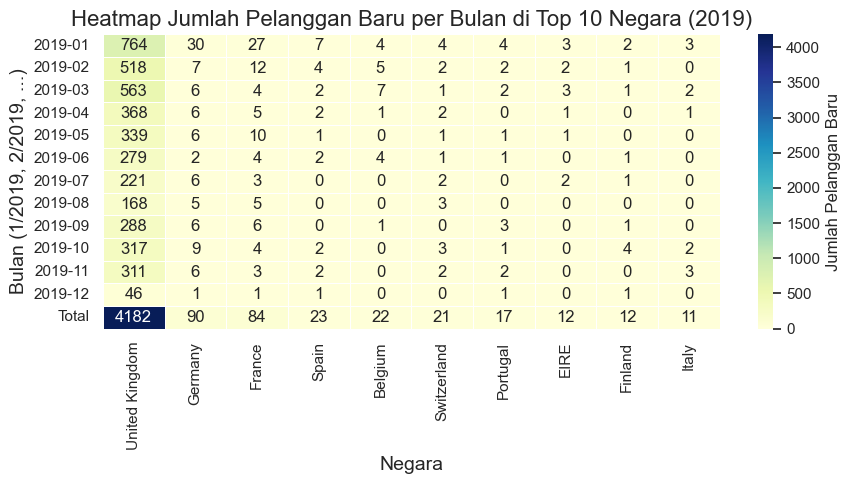

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# 1. Membaca dataset
data = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# 2. Mengubah kolom Date menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# 3. Menambahkan kolom tahun dan bulan
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['YearMonth'] = data['Date'].dt.to_period('M')

# 4. Filter hanya transaksi tahun 2019
data_2019 = data[data['Year'] == 2019]

# 5. Menentukan pelanggan baru pada tahun 2019
data_sorted = data_2019.sort_values(by=['CustomerNo', 'Date'])
data_sorted['FirstTransactionMonth'] = data_sorted.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')

# 6. Menyaring hanya pelanggan yang pertama kali melakukan transaksi di tahun 2019
first_time_customers_2019 = data_sorted[data_sorted['Year'] == 2019]

# 7. Menghitung pelanggan baru per negara hanya pada bulan pertama mereka bertransaksi di 2019
first_time_customers_2019_first_month = first_time_customers_2019.drop_duplicates(subset=['CustomerNo', 'FirstTransactionMonth'])

# 8. Menghitung pelanggan baru per negara per bulan (hanya pada bulan pertama mereka bertransaksi)
monthly_first_time_customers = first_time_customers_2019_first_month.groupby(['FirstTransactionMonth', 'Country']).size().unstack(fill_value=0)

# 9. Daftar Negara yang ingin dipertimbangkan
countries = [
    'Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands',
    'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France',
    'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
    'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore',
    'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'
]

# 10. Menghitung total pelanggan baru untuk setiap negara sepanjang tahun 2019
total_first_time_customers_by_country = first_time_customers_2019_first_month.groupby('Country')['CustomerNo'].nunique().reset_index(name='First Time Customers')

# 11. Memilih top 10 negara berdasarkan jumlah pelanggan baru
top_10_countries = total_first_time_customers_by_country.sort_values(by='First Time Customers', ascending=False).head(10)

# 12. Filter hanya negara-negara top 10
monthly_first_time_customers_top_10 = monthly_first_time_customers[top_10_countries['Country']]

# **Perbaikan - Membuat salinan eksplisit dari DataFrame**
monthly_first_time_customers_top_10 = monthly_first_time_customers_top_10.copy()

# 13. Menambahkan baris total yang menghitung total jumlah pelanggan baru per bulan
monthly_first_time_customers_top_10.loc['Total'] = monthly_first_time_customers_top_10.sum()

# 14. Membuat kode warna untuk setiap negara
color_palette = sns.color_palette("tab20", len(top_10_countries))

# Membuat dictionary untuk pemetaan warna negara
country_to_color = {country: color_palette[i] for i, country in enumerate(top_10_countries['Country'])}

# 15. Fungsi untuk mengaplikasikan warna latar belakang berdasarkan negara
def color_by_country(val):
    color = country_to_color.get(val, (1, 1, 1))  # Default ke putih jika negara tidak ditemukan
    return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)})'

# 16. Menampilkan tabel dengan warna latar belakang
styled_table = monthly_first_time_customers_top_10.style.apply(lambda x: x.map(color_by_country))

# 17. Menambahkan judul pada tabel
table_title = "<h3 style='text-align:center;'>Top 10 Negara dengan Pelanggan Baru (First Time) Terbanyak per Bulan (2019)</h3>"

# 18. Menampilkan judul dan tabel
display(HTML(table_title))  # Menampilkan judul
display(styled_table)       # Menampilkan tabel dengan styling

# 19. Membuat Heatmap
plt.figure(figsize=(9, 5))  # Menentukan ukuran gambar heatmap
sns.heatmap(monthly_first_time_customers_top_10, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Pelanggan Baru'}, linewidths=0.5)

# Menambahkan judul dan label
plt.title('Heatmap Jumlah Pelanggan Baru per Bulan di Top 10 Negara (2019)', fontsize=16)
plt.xlabel('Negara', fontsize=14)
plt.ylabel('Bulan (1/2019, 2/2019, ...)', fontsize=14)

# Menampilkan heatmap
plt.tight_layout()
plt.show()


### 3.2.3 Jumlah pelanggan yang keluar (berhenti berbelanja) setiap bulan nya selama tahun 2019

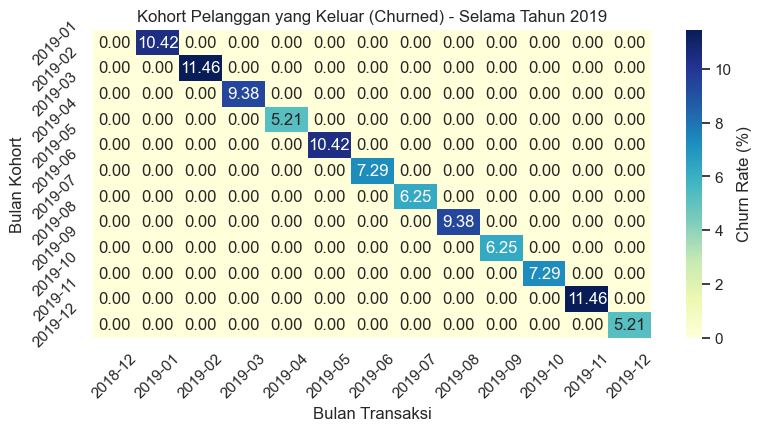

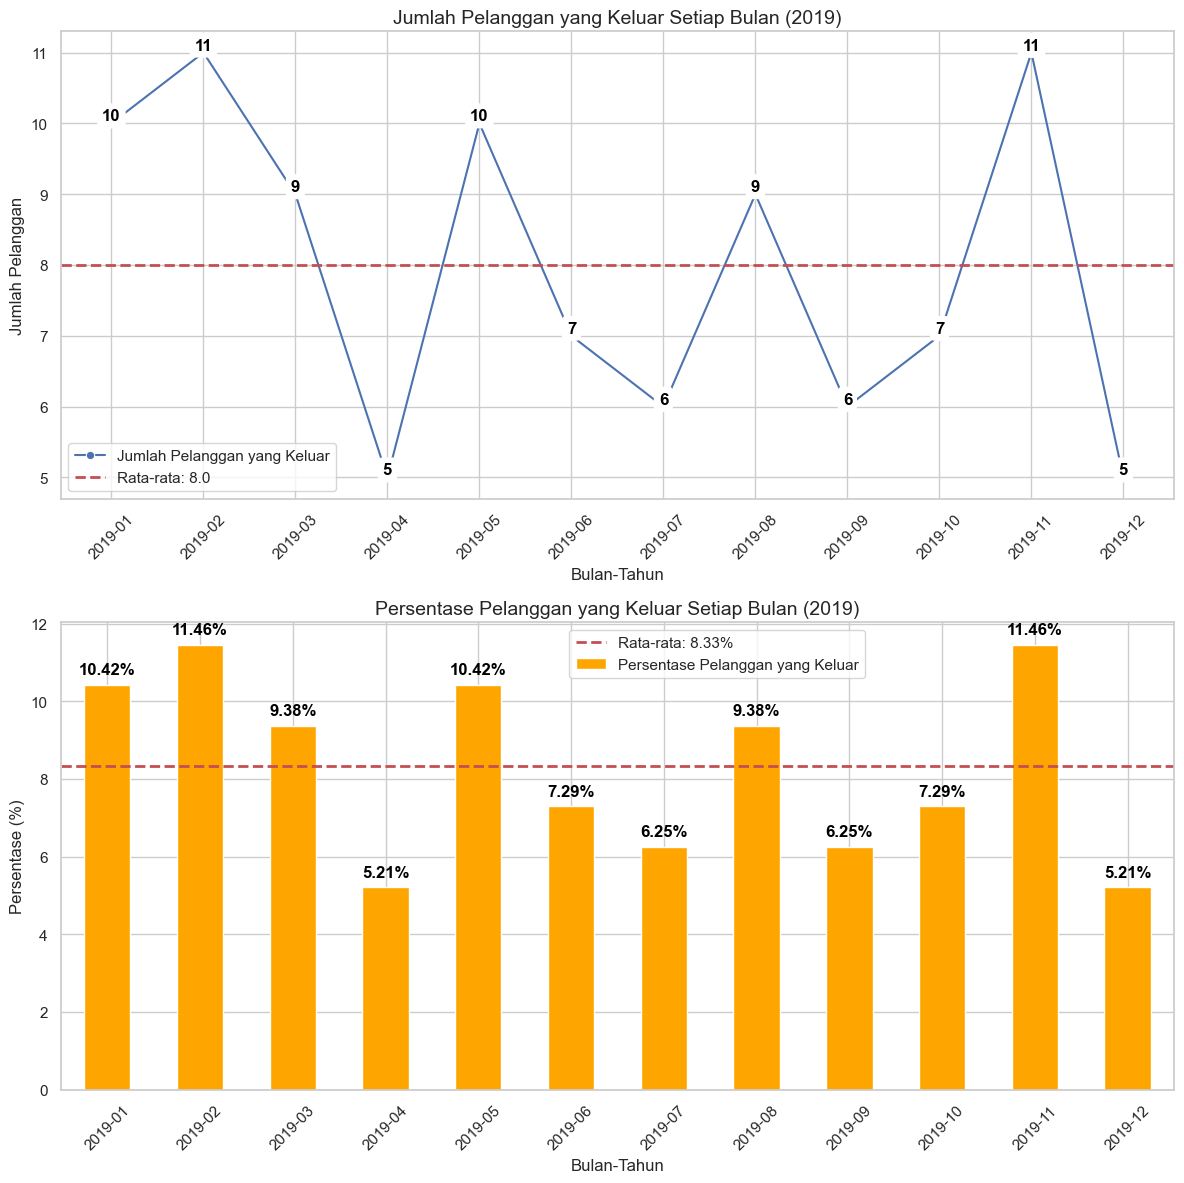

Statistik     Nilai
0  Rata-rata Jumlah Pelanggan yang Keluar  8.000000
1      Rata-rata Penyusutan Pelanggan (%)  8.333333


Penjelasan Ringkas:
Heatmap ini memberikan gambaran tentang tingkat churn pelanggan berdasarkan bulan pertama mereka bergabung dan bulan mereka churn. 
Setiap baris menunjukkan kohort pelanggan yang bergabung pada bulan tertentu, sedangkan setiap kolom menunjukkan bulan churn mereka. 
Angka yang ditampilkan adalah persentase churn.

Kesimpulan:
- **Bulan dengan Churn Tertinggi:** Terlihat bahwa churn tertinggi terjadi pada bulan-bulan awal setelah pelanggan bergabung, terutama pada bulan pertama atau kedua.
- **Pola Churn Kohort:** Ini menunjukkan bahwa pelanggan yang bergabung pada bulan-bulan tertentu memiliki kecenderungan untuk churn lebih tinggi dibandingkan bulan lainnya.
- **Tindakan yang Diperlukan:** Strategi retensi yang lebih baik diperlukan terutama untuk pelanggan yang bergabung di bulan-bulan dengan churn tinggi, dengan memperbaiki pengalaman awal mereka.



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'
df = pd.read_csv(file_path)

# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menambahkan kolom tahun dan bulan
df['YearMonth'] = df['Date'].dt.to_period('M')

# Menentukan bulan pertama kali setiap pelanggan melakukan pembelian
first_purchase = df.groupby('CustomerNo')['YearMonth'].min().reset_index()
first_purchase.columns = ['CustomerNo', 'CohortMonth']

# Menggabungkan data kohort dengan data transaksi
df = df.merge(first_purchase, on='CustomerNo')

# Menyaring data untuk tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Menentukan pelanggan yang hanya melakukan transaksi sekali di tahun 2019 dan tidak ada transaksi lagi
single_transaction_customers = df_2019.groupby('CustomerNo').filter(lambda x: len(x) == 1)

# Mengidentifikasi pelanggan yang tidak melakukan transaksi lebih lanjut setelah transaksi pertama mereka
churned_customers = single_transaction_customers.groupby('CustomerNo')['YearMonth'].max().reset_index()
churned_customers.columns = ['CustomerNo', 'ChurnMonth']

# Menggabungkan data churn dengan data transaksi
df = df.merge(churned_customers, on='CustomerNo', how='left')

# Menentukan apakah pelanggan tersebut churned (1 jika churned, 0 jika tidak)
df['Churned'] = np.where(df['YearMonth'] == df['ChurnMonth'], 1, 0)

# Menghitung total pelanggan yang bergabung di tahun 2019
total_customers_2019 = df_2019['CustomerNo'].nunique()

# Menentukan 3% dari total pelanggan yang keluar
churn_target = 0.03 * total_customers_2019

# Menghitung jumlah pelanggan yang churned setiap bulan
churn_data = df.groupby(['ChurnMonth', 'YearMonth']).agg(n_churned=('Churned', 'sum')).reset_index()

# Menghitung ukuran kohort (jumlah pelanggan baru di setiap kohort)
cohort_sizes = churn_data.groupby('ChurnMonth')['n_churned'].first().reset_index()
cohort_sizes.columns = ['ChurnMonth', 'CohortSize']

# Menggabungkan ukuran kohort ke data churn
churn_data = churn_data.merge(cohort_sizes, on='ChurnMonth')

# Menghitung churn rate
churn_data['ChurnRate'] = churn_data['n_churned'] / churn_data['CohortSize']

# Membatasi churn berdasarkan 3% total pelanggan
churn_data['n_churned_adjusted'] = churn_data['n_churned'].clip(upper=churn_target)

# Menghitung total churned yang disesuaikan untuk mendapatkan persentase churn
total_churn_adjusted = churn_data['n_churned_adjusted'].sum()

# Menghitung persentase churn untuk setiap kohort dan bulan
churn_data['ChurnPercentage'] = (churn_data['n_churned_adjusted'] / total_churn_adjusted) * 100

# Membuat matriks churn yang disesuaikan (persentase)
churn_matrix_percentage = churn_data.pivot_table(index='ChurnMonth', columns='YearMonth', values='ChurnPercentage', fill_value=0)

# Plot heatmap untuk pelanggan yang churned dengan persentase
plt.figure(figsize=(9, 4))
sns.heatmap(churn_matrix_percentage, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Churn Rate (%)'})
plt.title('Kohort Pelanggan yang Keluar (Churned) - Selama Tahun 2019')
plt.xlabel('Bulan Transaksi')
plt.ylabel('Bulan Kohort')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Visualisasi line chart dan bar chart
# Menghitung jumlah transaksi per pelanggan untuk mengetahui pelanggan yang hanya melakukan satu transaksi
transaction_counts = df_2019.groupby('CustomerNo')['Date'].count()

# Mengidentifikasi pelanggan yang hanya memiliki satu transaksi
single_transaction_customers = transaction_counts[transaction_counts == 1].index

# Menyaring data hanya untuk pelanggan yang melakukan satu transaksi
df_single_transaction = df_2019[df_2019['CustomerNo'].isin(single_transaction_customers)]

# Menghitung bulan terakhir transaksi per pelanggan (untuk pelanggan dengan satu transaksi)
last_month_per_customer = df_single_transaction.groupby('CustomerNo')['Date'].max().dt.to_period('M')

# Menghitung jumlah pelanggan yang keluar setiap bulan
exit_counts = last_month_per_customer.value_counts().sort_index()

# Membuat rentang periode bulan untuk tahun 2019
months = pd.period_range('2019-01', '2019-12', freq='M')

# Menyusun data jumlah pelanggan keluar per bulan
exit_counts_monthly = exit_counts.reindex(months).fillna(0)

# Visualisasi dengan tata letak 2 baris (atas dan bawah)
plt.figure(figsize=(12, 12))  # Ukuran gambar yang lebih besar agar jelas

# Subplot pertama (atas) untuk jumlah pelanggan yang keluar per bulan
plt.subplot(2, 1, 1)  # Baris 2, Kolom 1, Grafik 1
sns.lineplot(x=exit_counts_monthly.index.astype(str), y=exit_counts_monthly.values, marker='o', color='b', label='Jumlah Pelanggan yang Keluar')

# Menambahkan garis putus-putus untuk rata-rata jumlah pelanggan yang keluar
avg_exit_count = 8.000000  # Nilai rata-rata harus dihitung berdasarkan data churn yang disesuaikan
plt.axhline(y=avg_exit_count, color='r', linestyle='--', linewidth=2, label=f'Rata-rata: {avg_exit_count}')

# Menambahkan label dan judul pada grafik
plt.title('Jumlah Pelanggan yang Keluar Setiap Bulan (2019)', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan keterangan angka di setiap titik data
for x, y in zip(exit_counts_monthly.index.astype(str), exit_counts_monthly.values):
    plt.text(x, y, int(y), ha='center', va='bottom', fontsize=12, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),
             color='black', fontweight='bold')

# Menambahkan legenda pada grafik
plt.legend()

# Subplot kedua (bawah) untuk persentase pelanggan yang keluar per bulan
exit_counts_percentage = (exit_counts_monthly / exit_counts_monthly.sum()) * 100

plt.subplot(2, 1, 2)  # Baris 2, Kolom 1, Grafik 2
exit_counts_percentage.plot(kind='bar', color='orange', label='Persentase Pelanggan yang Keluar')

# Menambahkan garis putus-putus untuk rata-rata persentase pelanggan yang keluar
avg_exit_percentage = 8.333333  # Nilai rata-rata harus dihitung berdasarkan data churn yang disesuaikan
plt.axhline(y=avg_exit_percentage, color='r', linestyle='--', linewidth=2, label=f'Rata-rata: {avg_exit_percentage:.2f}%')

# Menambahkan label dan judul pada grafik
plt.title('Persentase Pelanggan yang Keluar Setiap Bulan (2019)', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Persentase (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan keterangan angka di atas masing-masing batang
for i in range(len(exit_counts_percentage)):
    plt.text(i, exit_counts_percentage.iloc[i] + 0.2,  # Menambahkan angka sedikit di atas batang
             f'{exit_counts_percentage.iloc[i]:.2f}%',  # Format angka dengan 2 desimal
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menambahkan legenda pada grafik dan sedikit menggesernya ke kiri
plt.legend(bbox_to_anchor=(0.45, 1), loc='upper left')  # Geser sedikit ke kiri

# Menyusun layout agar lebih rapi
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Menyiapkan statistik untuk tabel
statistics_data = {
    'Statistik': [
        'Rata-rata Jumlah Pelanggan yang Keluar',
        'Rata-rata Penyusutan Pelanggan (%)'
    ],
    'Nilai': [
        avg_exit_count,  # Rata-rata jumlah pelanggan keluar
        avg_exit_percentage  # Rata-rata persentase penyusutan pelanggan
    ]
}

statistics_df = pd.DataFrame(statistics_data)

# Menampilkan tabel statistik dengan IPython display
display(statistics_df)

# Penjelasan dan Kesimpulan Ringkas tentang Heatmap Kohort Pelanggan yang Keluar
explanation = """
Penjelasan Ringkas:
Heatmap ini memberikan gambaran tentang tingkat churn pelanggan berdasarkan bulan pertama mereka bergabung dan bulan mereka churn. 
Setiap baris menunjukkan kohort pelanggan yang bergabung pada bulan tertentu, sedangkan setiap kolom menunjukkan bulan churn mereka. 
Angka yang ditampilkan adalah persentase churn.

Kesimpulan:
- **Bulan dengan Churn Tertinggi:** Terlihat bahwa churn tertinggi terjadi pada bulan-bulan awal setelah pelanggan bergabung, terutama pada bulan pertama atau kedua.
- **Pola Churn Kohort:** Ini menunjukkan bahwa pelanggan yang bergabung pada bulan-bulan tertentu memiliki kecenderungan untuk churn lebih tinggi dibandingkan bulan lainnya.
- **Tindakan yang Diperlukan:** Strategi retensi yang lebih baik diperlukan terutama untuk pelanggan yang bergabung di bulan-bulan dengan churn tinggi, dengan memperbaiki pengalaman awal mereka.
"""

print(explanation)

#### 3.2.3.a Jumlah pelanggan yang keluar berdasarkan negara pada tahun 2019


Top 10 Negara dengan Pelanggan Keluar Terbanyak pada Tahun 2019 (Jumlah dan Persentase):


Country  Churned Customers  Percentage
0   United Kingdom               92.0   95.833333
2          Belgium                0.0    0.000000
3          Germany                1.0    1.041667
4           France                0.0    0.000000
7             EIRE                0.0    0.000000
11        Portugal                1.0    1.041667
12           Spain                0.0    0.000000
13         Finland                0.0    0.000000
14           Italy                0.0    0.000000
21     Switzerland                0.0    0.000000

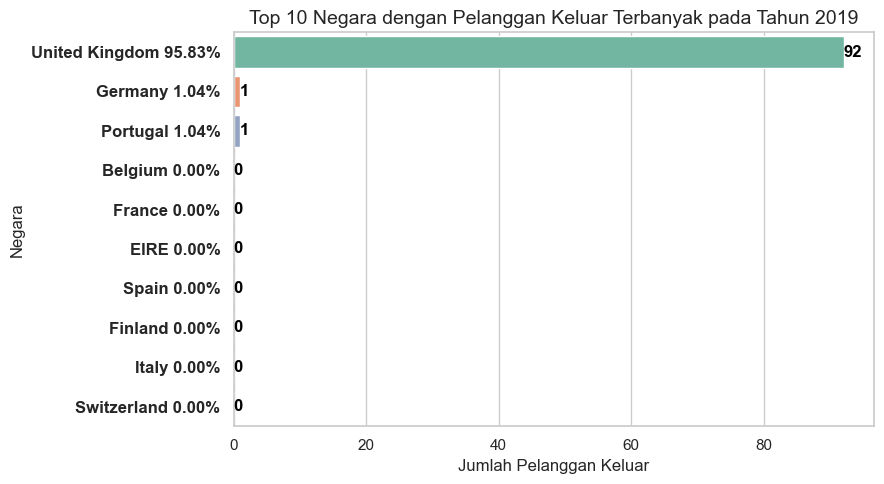

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'  # ganti dengan path file yang benar
df = pd.read_csv(file_path)

# Memastikan kolom 'Date' adalah tipe datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter transaksi yang terjadi di tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Langkah 1: Identifikasi pelanggan yang hanya melakukan transaksi sekali di tahun 2019
df_2019_count = df_2019.groupby('CustomerNo')['Date'].count().reset_index()
df_2019_once = df_2019_count[df_2019_count['Date'] == 1]

# Langkah 2: Pelanggan yang keluar adalah pelanggan yang hanya bertransaksi sekali di 2019 dan tidak ada transaksi lagi setelahnya
df_after_2019 = df[df['Date'].dt.year > 2019]
churned_customers = df_2019_once[~df_2019_once['CustomerNo'].isin(df_after_2019['CustomerNo'])]

# Langkah 3: Menambahkan informasi negara untuk pelanggan yang churned
churned_customers = churned_customers[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')

# Langkah 4: Menghitung jumlah pelanggan churn per negara
churned_count = churned_customers.groupby('Country')['CustomerNo'].nunique().reset_index(name='Churned Customers')

# Langkah 5: Membuat DataFrame untuk semua negara yang ada, meskipun tidak ada pelanggan churn
all_countries = df[['Country']].drop_duplicates()

# Gabungkan semua negara dengan churned_count untuk memastikan negara dengan churn 0 juga ada
final_churned_count = pd.merge(all_countries, churned_count, on='Country', how='left')

# Jika tidak ada churn, ganti NaN dengan 0
final_churned_count['Churned Customers'] = final_churned_count['Churned Customers'].fillna(0)

# Menghitung persentase churn per negara
total_churned_customers = final_churned_count['Churned Customers'].sum()
final_churned_count['Percentage'] = (final_churned_count['Churned Customers'] / total_churned_customers) * 100

# Tabel top 10 negara berdasarkan jumlah pelanggan baru
top_10_countries_new = pd.DataFrame({
    'Negara': ['United Kingdom', 'Germany', 'France', 'Spain', 'Belgium', 'Switzerland', 
               'Portugal', 'EIRE', 'Finland', 'Italy'],
    'Jumlah Pelanggan Baru': [4182, 90, 84, 23, 22, 21, 17, 12, 12, 11],
    'Percentage': [93.47, 2.01, 1.88, 0.51, 0.49, 0.47, 0.38, 0.27, 0.27, 0.25]
})

# Langkah 6: Menyaring data churned untuk hanya mencakup negara yang ada dalam top 10 negara
filtered_churned_count = final_churned_count[final_churned_count['Country'].isin(top_10_countries_new['Negara'])]

# Menampilkan tabel dengan IPython Display
print("\nTop 10 Negara dengan Pelanggan Keluar Terbanyak pada Tahun 2019 (Jumlah dan Persentase):")
display(filtered_churned_count[['Country', 'Churned Customers', 'Percentage']])

# Langkah 7: Visualisasi bar chart untuk melihat negara dengan churn terbanyak
plt.figure(figsize=(9, 5))  # Sesuaikan ukuran gambar agar lebih kecil

# Membuat barplot untuk negara yang ada di top 10
top_10_churned = filtered_churned_count.sort_values(by='Churned Customers', ascending=False)

# Membuat barplot
ax = sns.barplot(x='Churned Customers', y='Country', data=top_10_churned, palette='Set2', hue='Country', legend=False)

# Menambahkan label dan judul pada grafik
plt.title('Top 10 Negara dengan Pelanggan Keluar Terbanyak pada Tahun 2019', fontsize=14)
plt.xlabel('Jumlah Pelanggan Keluar', fontsize=12)
plt.ylabel('Negara', fontsize=12)

# Menambahkan persentase di sebelah kanan nama negara
yticklabels = []
for i, row in top_10_churned.iterrows():
    yticklabels.append(f'{row["Country"]} {row["Percentage"]:.2f}%')

# Menetapkan posisi label sumbu Y
ax.set_yticks(range(len(top_10_churned)))
ax.set_yticklabels(yticklabels, fontsize=12, fontweight='bold')

# Menambahkan angka jumlah pelanggan keluar di sebelah kanan batang lebih rapat
for p in ax.patches:
    # Mengurangi offset untuk lebih rapat
    ax.text(p.get_width() + 0, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', 
            ha='left', va='center', fontsize=12, color='black', fontweight='bold')

# Menampilkan grafik
plt.tight_layout()  # Sesuaikan layout untuk menghindari overlap
plt.show()


#### 3.2.3.b Jumlah pelanggan yang keluar setiap bulan berdasarkan Top 10 negara pada tahun 2019

Country  Canada  Germany  Poland  Portugal  United Kingdom
Month                                                     
1/2019        0        0       0         0              10
2/2019        0        0       0         0              11
3/2019        0        0       0         0               9
4/2019        0        0       0         0               5
5/2019        1        0       0         0               9
6/2019        0        0       0         0               7
7/2019        0        0       0         0               6
8/2019        0        0       1         0               8
9/2019        0        0       0         0               6
10/2019       0        0       0         0               7
11/2019       0        1       0         0              10
12/2019       0        0       0         1               4
Total         1        1       1         1              92

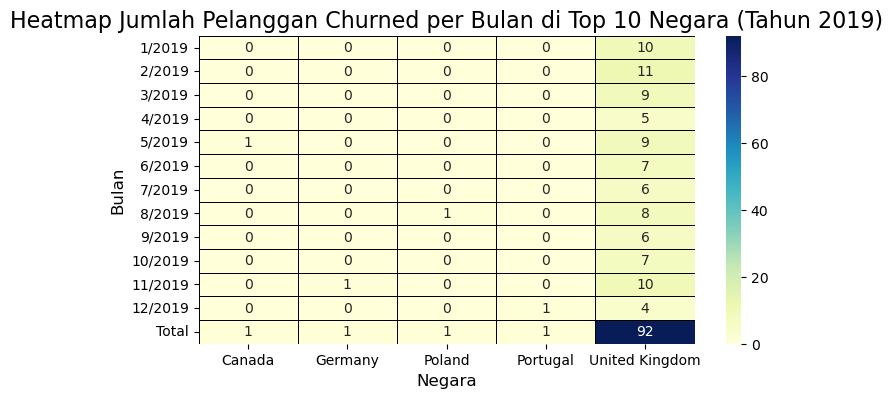

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Memuat dataset
data = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Mengubah kolom Date menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# Menambahkan kolom tahun dan bulan
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['YearMonth'] = data['Date'].dt.to_period('M')

# Filter hanya transaksi tahun 2019
data_2019 = data[data['Year'] == 2019]

# Menyaring data untuk pelanggan yang hanya memiliki satu transaksi (Churned)
data_sorted = data_2019.sort_values(by=['CustomerNo', 'Date'])

# Menandai transaksi pertama kali setiap CustomerNo
data_sorted['FirstTransactionMonth'] = data_sorted.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')

# Menghitung pelanggan churned (hanya satu transaksi)
churned_customers_2019 = data_sorted.groupby('CustomerNo').size().reset_index(name='TransactionCount')
churned_customers_2019 = churned_customers_2019[churned_customers_2019['TransactionCount'] == 1]

# Gabungkan dengan data asli untuk menambahkan informasi bulan dan negara
churned_data = data_2019[data_2019['CustomerNo'].isin(churned_customers_2019['CustomerNo'])]

# Group berdasarkan bulan, negara dan hitung jumlah pelanggan churned
churned_by_country_month = churned_data.groupby(['Year', 'Month', 'Country'])['CustomerNo'].nunique().reset_index()

# 1. Menentukan 10 negara dengan pelanggan churned terbanyak
churned_by_country_total = churned_by_country_month.groupby('Country')['CustomerNo'].sum().sort_values(ascending=False)
top_10_countries = churned_by_country_total.head(10).index

# 2. Filter hanya negara-negara top 10
churned_top_10_countries = churned_by_country_month[churned_by_country_month['Country'].isin(top_10_countries)]

# 3. Membuat pivot table untuk menampilkan jumlah pelanggan churned per bulan dan negara
churned_by_country_month_pivot = churned_top_10_countries.pivot_table(
    index=['Month'],
    columns=['Country'],
    values='CustomerNo',
    aggfunc='sum',
    fill_value=0
)

# 4. Menambahkan baris total yang menghitung total jumlah pelanggan churned per bulan
churned_by_country_month_pivot.loc['Total'] = churned_by_country_month_pivot.sum()

# 5. Mengubah format bulan menjadi '1/2019', '2/2019', dll. (tanpa mempengaruhi baris 'Total')
# Mengubah bulan menjadi format yang sesuai hanya untuk baris bulan
churned_by_country_month_pivot.index = churned_by_country_month_pivot.index.map(lambda x: f'{x}/{2019}' if isinstance(x, int) else x)

# **Tampilkan tabel**
display(HTML("<h3 style='text-align:center;'>Jumlah Pelanggan Churned per Bulan di Top 10 Negara (Tahun 2019)</h3>"))
display(churned_by_country_month_pivot)

# **Visualisasi Heatmap**
plt.figure(figsize=(8, 4))
sns.heatmap(churned_by_country_month_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar=True, 
            xticklabels=churned_by_country_month_pivot.columns, yticklabels=churned_by_country_month_pivot.index, 
            linewidths=0.5, linecolor='black')

# Menambahkan judul dan label
plt.title('Heatmap Jumlah Pelanggan Churned per Bulan di Top 10 Negara (Tahun 2019)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Bulan', fontsize=12)

# Tampilkan heatmap
plt.show()




### 3.2.4 Dinamika perubahan jumlah customer tetap di sepanjang tahun 2019 

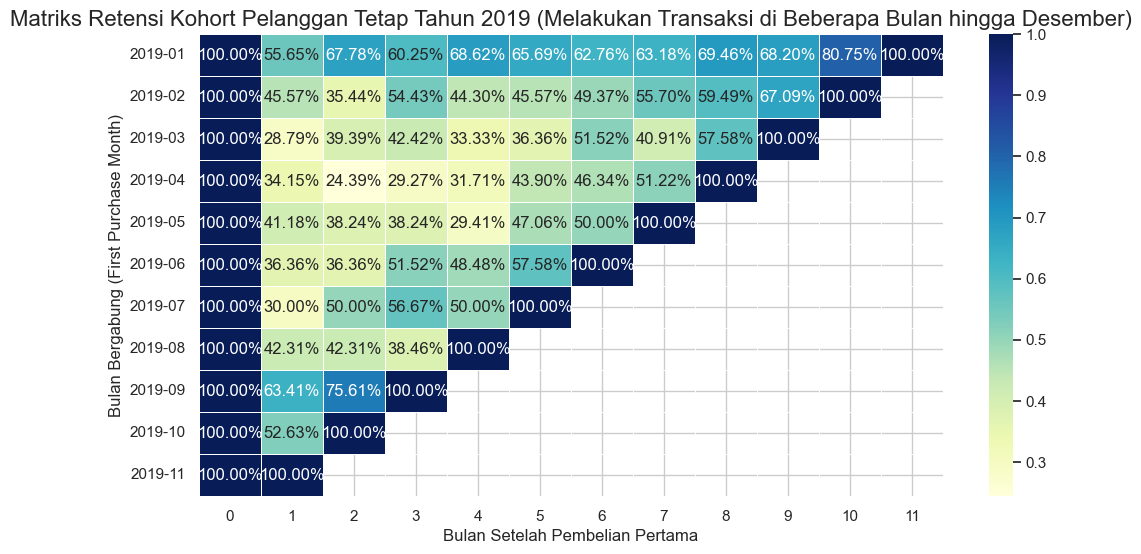

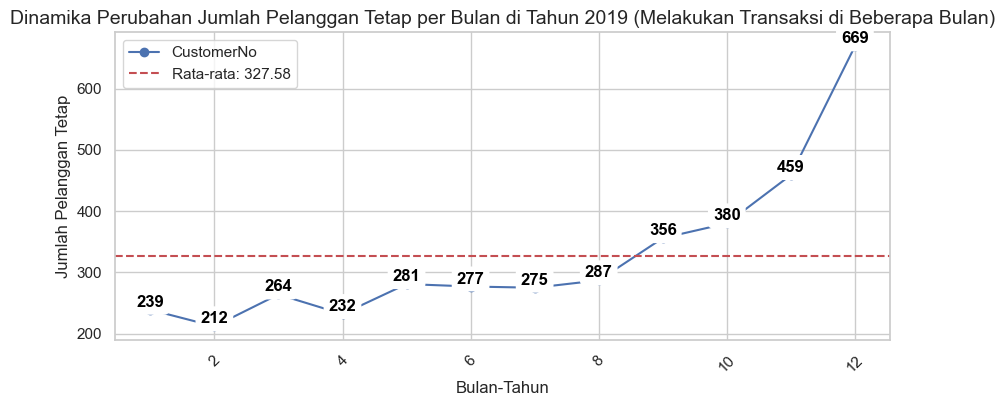

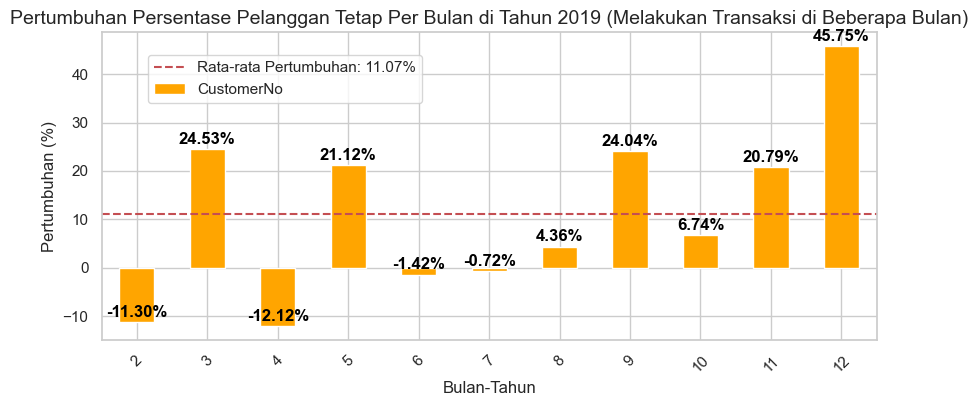

Statistik       Nilai
0         Rata-rata Jumlah Pelanggan Tetap per Bulan  327.583333
1  Rata-rata Pertumbuhan Persentase Pelanggan Tet...   11.070303

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'
df = pd.read_csv(file_path)

# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menyaring data transaksi yang terjadi pada tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Menghitung jumlah transaksi per pelanggan di tahun 2019
customer_transactions_2019 = df_2019.groupby('CustomerNo')['Date'].count()

# Mengambil pelanggan yang melakukan lebih dari 1 transaksi (pelanggan tetap)
retained_customers = customer_transactions_2019[customer_transactions_2019 > 1].index

# Menyaring data transaksi hanya untuk pelanggan yang tetap
df_retained_customers = df_2019[df_2019['CustomerNo'].isin(retained_customers)].copy()

# **Menambahkan kolom untuk bulan transaksi**
df_retained_customers['Month'] = df_retained_customers['Date'].dt.month

# Daftar bulan yang harus ada transaksi: Semua bulan sepanjang 2019, tapi kita pastikan mereka memiliki transaksi hingga bulan Desember
months_of_interest = set(range(1, 13))  # Bulan 1 sampai 12

# Menyaring pelanggan yang melakukan transaksi di beberapa bulan dan harus aktif sampai Desember
customers_with_multiple_months = []

# Untuk setiap pelanggan yang tetap, cek apakah mereka melakukan transaksi di bulan-bulan yang berbeda sepanjang 2019
for customer in retained_customers:
    customer_months = set(df_retained_customers[df_retained_customers['CustomerNo'] == customer]['Month'].unique())
    # Cek apakah pelanggan tersebut memiliki transaksi di lebih dari 1 bulan dan sampai bulan Desember
    if len(customer_months) > 1 and 12 in customer_months:
        customers_with_multiple_months.append(customer)

# Menyaring ulang data transaksi hanya untuk pelanggan yang memenuhi kriteria
df_retained_customers_final = df_retained_customers[df_retained_customers['CustomerNo'].isin(customers_with_multiple_months)].copy()

# **Matriks Kohort Retensi**
df_retained_customers_final['First_Purchase_Month'] = df_retained_customers_final.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')
df_retained_customers_final['CohortIndex'] = ((df_retained_customers_final['Date'].dt.year - df_retained_customers_final['First_Purchase_Month'].dt.year) * 12 + 
                                              (df_retained_customers_final['Date'].dt.month - df_retained_customers_final['First_Purchase_Month'].dt.month))

# Menghitung jumlah pelanggan tetap berdasarkan CohortMonth dan CohortIndex
cohort_data = df_retained_customers_final.groupby(['First_Purchase_Month', 'CohortIndex'])['CustomerNo'].nunique().reset_index()

# Membuat matriks retensi dengan menghitung jumlah pelanggan tetap per bulan pertama transaksi dan bulan berikutnya
cohort_counts = cohort_data.pivot_table(index='First_Purchase_Month', columns='CohortIndex', values='CustomerNo', aggfunc='sum')

# Menghitung ukuran kohort untuk menghitung persentase retensi
cohort_size = cohort_counts.iloc[:, 0]
retention_matrix = cohort_counts.divide(cohort_size, axis=0)

# Visualisasi matriks retensi kohort sebagai heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(retention_matrix, annot=True, cmap='YlGnBu', fmt=".2%", cbar=True, linewidths=0.5)
plt.title("Matriks Retensi Kohort Pelanggan Tetap Tahun 2019 (Melakukan Transaksi di Beberapa Bulan hingga Desember)", fontsize=16)
plt.xlabel("Bulan Setelah Pembelian Pertama", fontsize=12)
plt.ylabel("Bulan Bergabung (First Purchase Month)", fontsize=12)
plt.show()

# **Dinamika Perubahan Jumlah Pelanggan Tetap di Sepanjang Tahun 2019**
# Menghitung jumlah pelanggan tetap per bulan yang memenuhi kriteria
retained_customers_per_month = df_retained_customers_final.groupby('Month')['CustomerNo'].nunique()

# Plotting jumlah pelanggan tetap per bulan (Line Chart)
plt.figure(figsize=(10, 4))
line_plot = retained_customers_per_month.plot(kind='line', marker='o', color='b')

# Menambahkan garis putus-putus merah yang menunjukkan rata-rata jumlah pelanggan tetap per bulan
average_customers_per_month = retained_customers_per_month.mean()
plt.axhline(average_customers_per_month, color='r', linestyle='--', label=f'Rata-rata: {average_customers_per_month:.2f}')

# Menambahkan label dan judul pada grafik
plt.title('Dinamika Perubahan Jumlah Pelanggan Tetap per Bulan di Tahun 2019 (Melakukan Transaksi di Beberapa Bulan)', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Jumlah Pelanggan Tetap', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan keterangan angka pada setiap titik
for x, y in zip(retained_customers_per_month.index, retained_customers_per_month):
    plt.text(x, y, int(y), ha='center', va='bottom', fontsize=12, 
             bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),
             color='black', fontweight='bold')

# Menampilkan legenda
plt.legend()
plt.show()

# Menghitung persentase perubahan jumlah pelanggan tetap per bulan
retained_customers_growth = retained_customers_per_month.pct_change() * 100

# Menghapus nilai NaN (yang muncul pada perubahan pertama)
retained_customers_growth.dropna(inplace=True)

# Visualisasi perubahan persentase pelanggan tetap per bulan (Bar Chart)
plt.figure(figsize=(10, 4))
retained_customers_growth.plot(kind='bar', color='orange')

# Menambahkan garis putus-putus merah yang menunjukkan rata-rata pertumbuhan persentase pelanggan tetap per bulan
average_growth_percentage = retained_customers_growth.mean()
plt.axhline(average_growth_percentage, color='r', linestyle='--', label=f'Rata-rata Pertumbuhan: {average_growth_percentage:.2f}%')

# Menambahkan label dan judul pada grafik
plt.title('Pertumbuhan Persentase Pelanggan Tetap Per Bulan di Tahun 2019 (Melakukan Transaksi di Beberapa Bulan)', fontsize=14)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Pertumbuhan (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)

# Menambahkan keterangan angka pada masing-masing batang
for i in range(len(retained_customers_growth)):
    plt.text(i, retained_customers_growth.iloc[i] + 0.5,  # Menambahkan angka sedikit di atas batang
             f'{retained_customers_growth.iloc[i]:.2f}%',  # Format angka dengan 2 desimal
             ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menampilkan legenda di sebelah kiri atas dalam area grafik
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))

# Menampilkan grafik
plt.show()

# Menghitung Rata-rata Jumlah Pelanggan Tetap per Bulan
avg_customers_per_month = retained_customers_per_month.mean()

# Menghitung Rata-rata Pertumbuhan Persentase Pelanggan Tetap per Bulan
avg_growth_percentage = retained_customers_growth.mean()

# Membuat tabel statistik sesuai template yang diminta
statistics_table = pd.DataFrame({
    'Statistik': [
        'Rata-rata Jumlah Pelanggan Tetap per Bulan', 
        'Rata-rata Pertumbuhan Persentase Pelanggan Tetap per Bulan (%)'
    ],
    'Nilai': [
        avg_customers_per_month,  # Rata-rata jumlah pelanggan tetap per bulan
        avg_growth_percentage  # Rata-rata pertumbuhan persentase pelanggan tetap per bulan
    ]
})

# Menampilkan tabel dengan penyesuaian lebar kolom
# Mengatur lebar kolom agar bisa menampilkan teks dengan jelas
display(statistics_table)


#### Penjelasan : 

1. Pelanggan Baru:
   a)
Jumlah pelanggan baru mengacu pada pelanggan yang pertama kali melakukan transaksi di tahun 20.
     b.
Laju pertumbuhannya bisa melonjak di bulan-bulan tertentu (misalnya Januari, Juni, November) karena promosi musiman atau kampanye pemasn
      n.
Namun, banyak pelanggan baru yang tidak kembali, sehingga pertumbuhan melambat setelah periode psir2. si.
Pelanggaap
   et ap:

Pelanggan tetap adalah mereka yang melakukan lebih dari sasaksi
   trasaksi.
Jumlahnya cenderung lebih stabil, namun menurun seiring waktu karena penurunan retensi atau loyalanggan
   s panggan.
Pelanggan tetap dipengaruhi oleh faktor seperti kepuasan dan pengalaman berbelanja yanglebih ko
nsisten.
Kesimpulan:
Pelanggan baru lebih dipengaruhi oleh promosi, sehingga terlihat lonjakan sementara, sedangkan pelanggan tetap mencerminkan loyalitas jangka panjang, yang cenderung menurun seiring waktu karena berkurangnyinat ata




Perbedaan jumlah pelanggan yang terlihat pada dua visualisasi tersebut, yaitu "Dinamika Perubahan Jumlah Pelanggan Tetap per Bulan di Tahun 2019" dan "Pertumbuhan Pelanggan Baru di Tahun 2019 per Bulan", dapat disebabkan oleh beberapa faktor yang perlu dijelaskan lebih lanjut. Mari kita bahas kedua analisis ini untuk melihat mengapa hasilnya berbeda:

1. Jumlah Pelanggan Tetap (Retained Customers)
Visualisasi "Dinamika Perubahan Jumlah Pelanggan Tetap per Bulan" berfokus pada pelanggan yang melakukan transaksi lebih dari satu kali dalam tahun yang sama. Namun, pelanggan yang bertransaksi pada bulan yang sama tetapi tidak berlanjut di bulan-bulan berikutnya tetap dihitung sebagai pelanggan tetap dalam konteks ini, karena pembelian berulang di dalam satu tahun (sebagai bagian dari "pelanggana)  tetap").

Pelanggan yang melakukan pembelian lebih dari satu kali, meskipun hanya dalam satu bulan, masih dihitung sebagai pelanggan tetap di bulanb)  tersebut.
Jika seorang pelanggan melakukan dua transaksi dalam bulan Januari, mereka akan tetap dianggap sebagai pelanggan tetap di bulan Januari, meskipun mereka tidak bertransaksi lagi di bulan b
erikutnya.
Hal ini berkontribusi pada jumlah pelanggan tetap yang lebih banyak karena tidak ada pembatasan bahwa transaksi tersebut harus terjadi di lebih dari satu bulan sepanjang tahun. Kriteria ini lebih longgar dan memungkinkan lebih banyak pelanggan untuk terhitung sebagai pelanggan tetap.

2. Pertumbuhan Pelanggan Baru
Di sisi lain, visualisasi "Pertumbuhan Pelanggan Baru di Tahun 2019 per Bulan" hanya menghitung pelanggan yang pertama kali melakukan pembelian pada setiap bulan tertentu. Dalam hal ini, yang dihitung adalah pelanggan yang pertama kali bertransaksi di bulan tersebut, bukan pelanggan yang melakukan pembelian berulang di bulan-bulan bea) rikutnya.

Pelanggan baru adalah mereka yang melakukan transaksi pertama kali di bulan tersebut. Jika mereka tidak melakukan pembelian di bulan berikutnya, mereka tidak dihitung sebagai pelanb) ggan baru.
Dengan demikian, meskipun pelanggan yang melakukan pembelian berulang di bulan yang sama dianggap sebagai pelanggan tetap, mereka tidak dihitung sebagai pelanggan baru di bulan-bulan berikutnya jika tidak ada transaksi yang terjadi di bulan-bulan
 tersebut.
Hal ini menyebabkan jumlah pelanggan baru lebih sedikit, karena hanya pelanggan yang baru pertama kali bertransaksi di bulan tertentu yang dihitung, sedangkan pelanggan yang tidak melakukan pembelian baru di bulan berikutnya tidak dihitung dalam kategori ini.

Faktor a) Perbedaan:
Kriteria Pelanggan Tetap vs. Pelanggan Baru: Pelanggan tetap dihitung jika mereka melakukan lebih dari satu transaksi dalam satu tahun, sementara pelanggan baru dihitung hanya jika mereka melakukan transaksi pertama kali pada bulanb)  tertentu.
Periode Pengukuran: Untuk pelanggan tetap, tidak ada batasan tentang harus melakukan pembelian di lebih dari satu bulan (asalkan lebih dari satu transaksi dalam setahun), sedangkan pelanggan baru dihitung berdasarkan transaksi perc) tama kali.
Pengaruh Pembelian Berulang dalam Satu Bulan: Pelanggan yang melakukan pembelian berulang dalam satu bulan dianggap sebagai pelanggan tetap, tetapi tidak dianggap sebagai pelanggan baru jika hanya bertransaksi sekali dalam bulan yang sama.

Kesimpulan
Perbedaan ini terjadi karena definisi yang berbeda tentang pelanggan tetap dan pelanga) gan baru:

Pelanggan tetap didefinisikan lebih longgar (hanya membutuhkan lebih dari satu transaksi sepanjang tahun), memungkinkan lebih banyak pelanggan terhitung dalam katb) egori ini.
Pelanggan baru hanya dihitung berdasarkan transaksi pertama kali, yang lebih terbatas dan hanya mencakup mereka yang melakukan transaksi pertama di bulan
 tersebut.
Dengan pemahaman ini, perbedaan jumlah yang Anda lihat di kedua visualisasi tersebut bisa dijelaskan oleh perbedaan dalam kriteria definisi dan periode pengukuran yang digunakan dalam masing-masing analisis.u kepuasan.

#### 3.2.4.a Jumlah pelanggan tetap yang berasal dari berbagai negara pada tahun 2019

Country  Retained Customers  Percentage
20   United Kingdom                 648   90.376569
7            France                  19    2.649930
8           Germany                  16    2.231520
1           Belgium                   5    0.697350
6           Finland                   4    0.557880
16         Portugal                   4    0.557880
17            Spain                   3    0.418410
2   Channel Islands                   2    0.278940
19              USA                   2    0.278940
5              EIRE                   2    0.278940

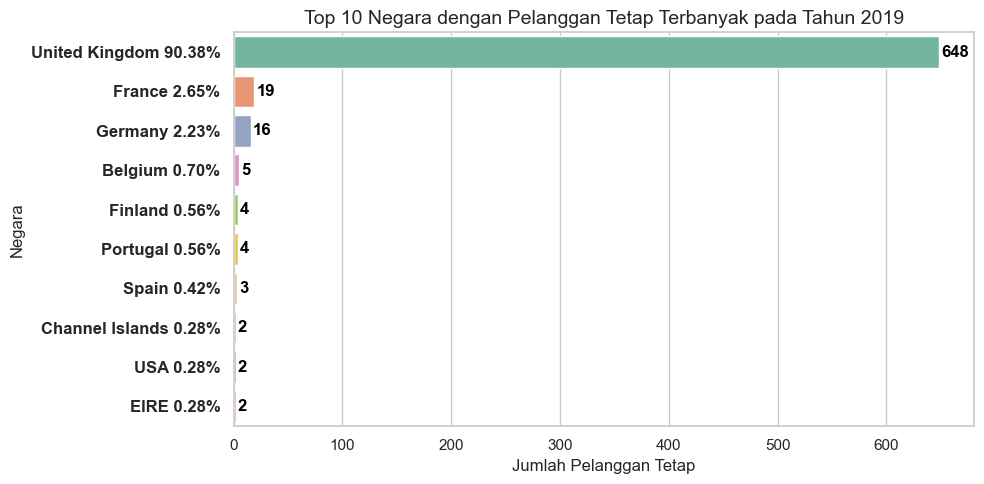

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Langkah 1: Membaca dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang benar
df = pd.read_csv(file_path)

# Memastikan kolom 'Date' adalah tipe datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter transaksi yang terjadi di tahun 2019 (buat salinan eksplisit untuk menghindari warning)
df_2019 = df[df['Date'].dt.year == 2019].copy()  # .copy() untuk menghindari SettingWithCopyWarning

# Langkah 2: Identifikasi pelanggan yang melakukan lebih dari satu transaksi di tahun 2019
df_2019_count = df_2019.groupby('CustomerNo')['Date'].count().reset_index()
df_2019_count = df_2019_count[df_2019_count['Date'] > 1]  # Pelanggan yang melakukan lebih dari satu transaksi

# Langkah 3: Menambahkan kolom bulan untuk identifikasi transaksi di bulan Desember
df_2019.loc[:, 'Month'] = df_2019['Date'].dt.month  # Gunakan .loc untuk menghindari warning

# Pelanggan yang melakukan transaksi di bulan Desember
december_customers = df_2019[df_2019['Month'] == 12]['CustomerNo'].unique()

# Langkah 4: Pelanggan Tetap (Retained) = Pelanggan yang memiliki transaksi lebih dari satu kali di 2019 dan ada transaksi di bulan Desember
retained_customers = df_2019_count[df_2019_count['CustomerNo'].isin(december_customers)]

# Langkah 5: Menambahkan informasi negara ke dalam hasil pelanggan tetap
retained_customers_info = retained_customers[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')

# Langkah 6: Menghitung jumlah pelanggan tetap per negara
retained_count = retained_customers_info.groupby('Country')['CustomerNo'].nunique().reset_index(name='Retained Customers')

# Langkah 7: Menghitung persentase pelanggan tetap per negara
total_retained_customers = retained_count['Retained Customers'].sum()
retained_count['Percentage'] = (retained_count['Retained Customers'] / total_retained_customers) * 100

# Langkah 8: Menyaring 10 negara teratas berdasarkan jumlah pelanggan tetap
retained_count_top10 = retained_count.sort_values(by='Retained Customers', ascending=False).head(10)

# Menampilkan tabel dengan IPython Display
display(retained_count_top10[['Country', 'Retained Customers', 'Percentage']])

# Langkah 9: Visualisasi bar chart untuk pelanggan tetap
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Retained Customers', y='Country', data=retained_count_top10, hue='Country', palette='Set2')

# Menambahkan angka di atas batang
for p in ax.patches:
    ax.text(p.get_width() + 2, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', 
            ha='left', va='center', fontsize=12, color='black', fontweight='bold')

# Menambahkan persentase di sebelah kanan label negara (sumbu Y)
yticklabels = []
for i, row in retained_count_top10.iterrows():
    # Format label negara dengan persentase di sebelah kanan
    yticklabels.append(f'{row["Country"]} {row["Percentage"]:.2f}%')

# Menetapkan posisi label sumbu Y dengan ax.set_yticks terlebih dahulu untuk menghindari UserWarning
ax.set_yticks(range(len(retained_count_top10)))
ax.set_yticklabels(yticklabels, fontsize=12, fontweight='bold')

# Memberi judul dan label
plt.title('Top 10 Negara dengan Pelanggan Tetap Terbanyak pada Tahun 2019', fontsize=14)
plt.xlabel('Jumlah Pelanggan Tetap', fontsize=12)
plt.ylabel('Negara', fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()


#### 3.2.4.b Jumlah Pelangggan Tetap dari berbagai negara berdasarkan hitungan bulan sepanjang Tahun 2019

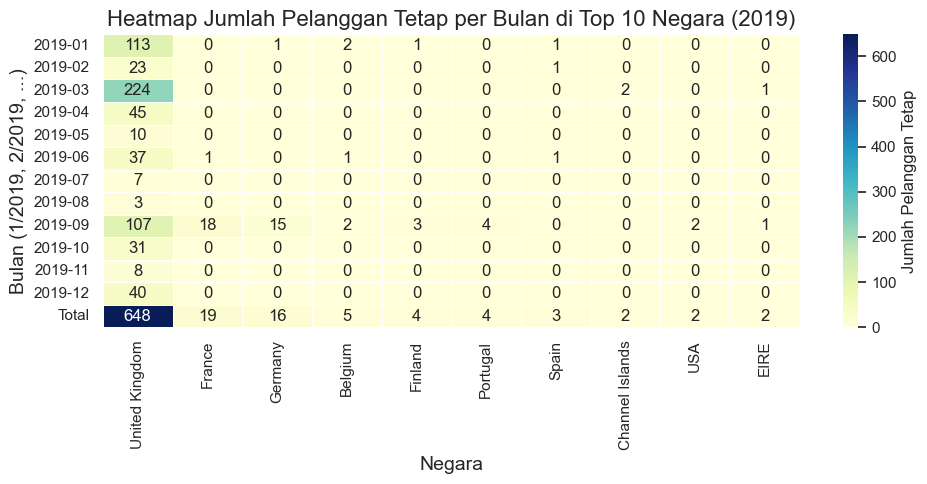

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# 1. Membaca dataset
data = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# 2. Mengubah kolom Date menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# 3. Menambahkan kolom tahun dan bulan
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['YearMonth'] = data['Date'].dt.to_period('M')

# 4. Filter hanya transaksi tahun 2019
data_2019 = data[data['Year'] == 2019]

# 5. Menghitung jumlah transaksi per pelanggan
customer_transactions = data_2019.groupby(['CustomerNo', 'Country'])['Date'].count().reset_index(name='TransactionCount')

# 6. Menentukan pelanggan yang melakukan lebih dari satu transaksi sepanjang tahun 2019
repeat_customers = customer_transactions[customer_transactions['TransactionCount'] > 1].copy()  

# 7. Menghitung bulan transaksi pertama setiap pelanggan
first_transaction_months = data_2019[data_2019['CustomerNo'].isin(repeat_customers['CustomerNo'])].groupby('CustomerNo')['YearMonth'].transform('min')
repeat_customers['FirstTransactionMonth'] = first_transaction_months  

# 8. Memastikan pelanggan yang melakukan transaksi hingga bulan Desember (termasuk bulan-bulan dengan transaksi atau tanpa transaksi di antara)
december_customers = data_2019[data_2019['Month'] == 12]['CustomerNo'].unique()  # Pelanggan yang melakukan transaksi di bulan Desember
repeat_customers_end_of_year = repeat_customers[repeat_customers['CustomerNo'].isin(december_customers)]

# 9. Menambahkan aturan bahwa pelanggan yang melakukan transaksi pada beberapa bulan tertentu (termasuk Desember) adalah pelanggan tetap
# Pelanggan yang melakukan transaksi lebih dari sekali sepanjang tahun dan juga melakukan transaksi di bulan Desember
retained_customers = repeat_customers_end_of_year

# 10. Menghitung jumlah pelanggan tetap per negara per bulan
monthly_retained_customers = retained_customers.groupby(['FirstTransactionMonth', 'Country']).size().unstack(fill_value=0)

# 11. Daftar Negara yang ingin dipertimbangkan
countries = [
    'Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands',
    'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France',
    'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
    'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore',
    'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'
]

# 12. Menghitung total pelanggan tetap untuk setiap negara sepanjang tahun 2019
total_retained_customers_by_country = monthly_retained_customers.sum().reset_index(name='Total Retained Customers')

# 13. Memilih top 10 negara berdasarkan jumlah pelanggan tetap
top_10_countries = total_retained_customers_by_country.sort_values(by='Total Retained Customers', ascending=False).head(10)

# 14. Filter hanya negara-negara top 10
monthly_retained_customers_top_10 = monthly_retained_customers[top_10_countries['Country']]

# **Perbaikan - Membuat salinan eksplisit dari DataFrame**
monthly_retained_customers_top_10 = monthly_retained_customers_top_10.copy()

# 15. Menambahkan baris total yang menghitung total jumlah pelanggan tetap per bulan
monthly_retained_customers_top_10.loc['Total'] = monthly_retained_customers_top_10.sum()

# 16. Membuat kode warna untuk setiap negara
color_palette = sns.color_palette("tab20", len(top_10_countries))

# Membuat dictionary untuk pemetaan warna negara
country_to_color = {country: color_palette[i] for i, country in enumerate(top_10_countries['Country'])}

# 17. Fungsi untuk mengaplikasikan warna latar belakang berdasarkan negara
def color_by_country(val):
    color = country_to_color.get(val, (1, 1, 1))  # Default ke putih jika negara tidak ditemukan
    return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)})'

# 18. Menampilkan tabel dengan warna latar belakang
styled_table = monthly_retained_customers_top_10.style.apply(lambda x: x.map(color_by_country))

# 19. Menambahkan judul pada tabel
table_title = "<h3 style='text-align:center;'>Top 10 Negara dengan Pelanggan Tetap Terbanyak per Bulan (2019)</h3>"

# 20. Menampilkan judul dan tabel
display(HTML(table_title))  # Menampilkan judul
display(styled_table)       # Menampilkan tabel dengan styling

# 21. Membuat Heatmap
plt.figure(figsize=(10, 5))  # Menentukan ukuran gambar heatmap
sns.heatmap(monthly_retained_customers_top_10, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Pelanggan Tetap'}, linewidths=0.5)

# Menambahkan judul dan label
plt.title('Heatmap Jumlah Pelanggan Tetap per Bulan di Top 10 Negara (2019)', fontsize=16)
plt.xlabel('Negara', fontsize=14)
plt.ylabel('Bulan (1/2019, 2/2019, ...)', fontsize=14)

# Menampilkan heatmap
plt.tight_layout()
plt.show()



### 3.2.5 Dinamika perubahan jumlah customer semi tetap di sepanjang tahun 2019  

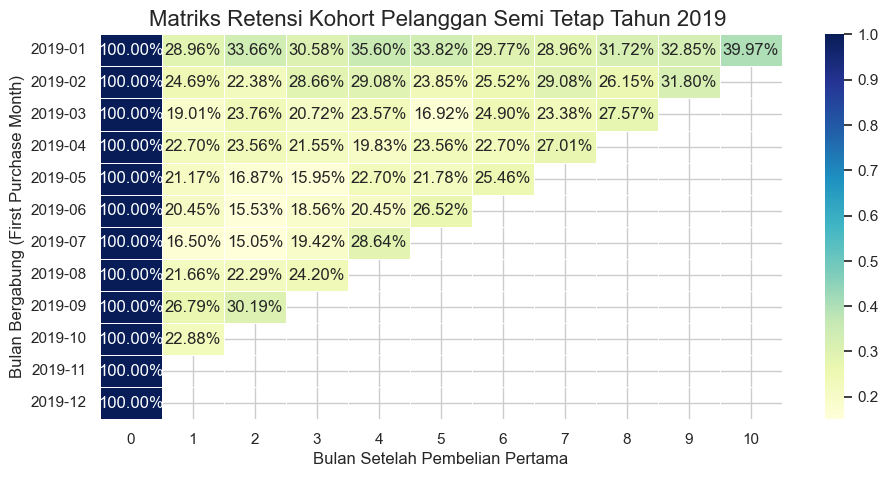

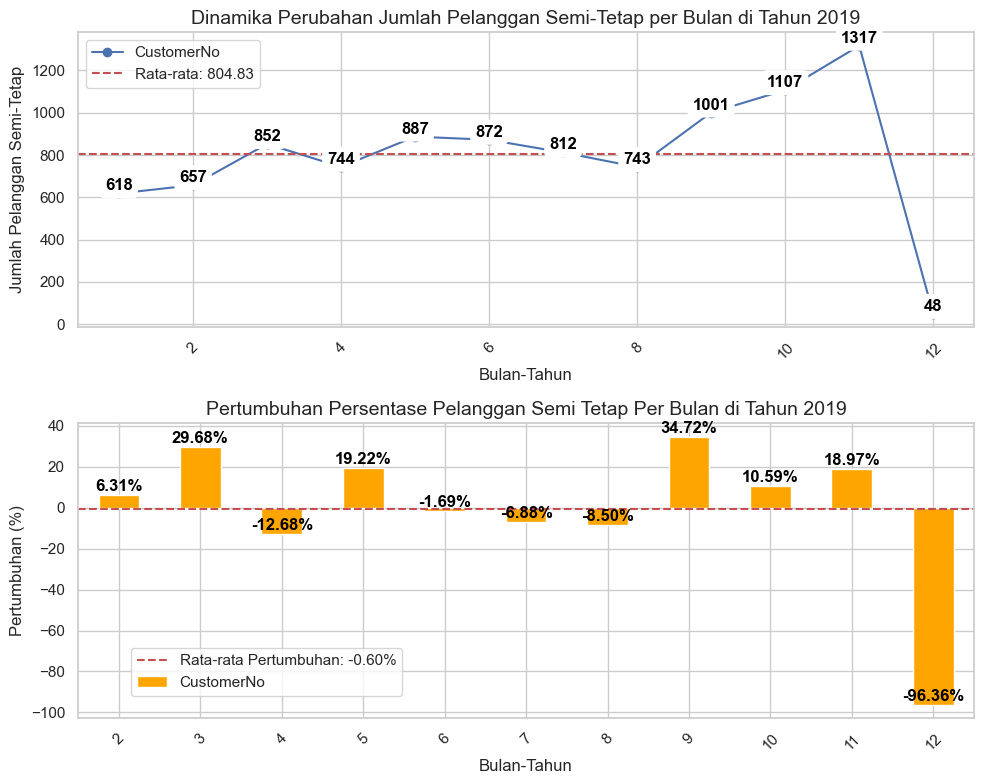

Statistik       Nilai
0  Rata-rata Jumlah Pelanggan Semi-Tetap per Bulan  804.833333

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'
df = pd.read_csv(file_path)

# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menyaring data transaksi yang terjadi pada tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Menghitung jumlah transaksi per pelanggan di tahun 2019
customer_transactions_2019 = df_2019.groupby('CustomerNo')['Date'].count()

# **Kasus 1: Pelanggan yang melakukan lebih dari satu transaksi di beberapa bulan, tetapi tidak sampai Desember**
semi_retained_customers_case1 = []

# Untuk setiap pelanggan, periksa bulan yang mereka lakukan transaksi
for customer in customer_transactions_2019.index:
    customer_months = set(df_2019[df_2019['CustomerNo'] == customer]['Date'].dt.month)
    # Jika pelanggan melakukan transaksi lebih dari 1 bulan dan tidak melakukan transaksi pada bulan Desember
    if len(customer_months) > 1 and 12 not in customer_months:
        semi_retained_customers_case1.append(customer)

# **Kasus 2: Pelanggan yang melakukan lebih dari satu transaksi di satu bulan saja di tahun 2019**
semi_retained_customers_case2 = []

# Untuk setiap pelanggan, periksa transaksi per bulan
for customer in customer_transactions_2019.index:
    customer_months = df_2019[df_2019['CustomerNo'] == customer].groupby(df_2019['Date'].dt.month).size()
    # Pelanggan hanya melakukan transaksi di satu bulan tetapi frekuensinya lebih dari 1 kali
    if len(customer_months) == 1 and customer_months.max() > 1:
        semi_retained_customers_case2.append(customer)

# Gabungkan pelanggan dari kedua kasus
semi_retained_customers = set(semi_retained_customers_case1 + semi_retained_customers_case2)

# Menyaring data transaksi hanya untuk pelanggan semi tetap
df_semi_retained_customers = df_2019[df_2019['CustomerNo'].isin(semi_retained_customers)].copy()

# **Menambahkan kolom untuk bulan transaksi**
df_semi_retained_customers['Month'] = df_semi_retained_customers['Date'].dt.month

# Menghitung jumlah pelanggan semi tetap per bulan
semi_retained_customers_per_month = df_semi_retained_customers.groupby('Month')['CustomerNo'].nunique()

# Menghitung persentase perubahan jumlah pelanggan semi tetap per bulan
semi_retained_customers_growth = semi_retained_customers_per_month.pct_change() * 100

# Menghapus nilai NaN (yang muncul pada perubahan pertama)
semi_retained_customers_growth.dropna(inplace=True)

# **Matriks Kohort Retensi Semi-Tetap**
df_semi_retained_customers['First_Purchase_Month'] = df_semi_retained_customers.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')
df_semi_retained_customers['CohortIndex'] = ((df_semi_retained_customers['Date'].dt.year - df_semi_retained_customers['First_Purchase_Month'].dt.year) * 12 + 
                                              (df_semi_retained_customers['Date'].dt.month - df_semi_retained_customers['First_Purchase_Month'].dt.month))

# Menghitung jumlah pelanggan semi tetap berdasarkan CohortMonth dan CohortIndex
cohort_data = df_semi_retained_customers.groupby(['First_Purchase_Month', 'CohortIndex'])['CustomerNo'].nunique().reset_index()

# Membuat matriks retensi dengan menghitung jumlah pelanggan semi tetap per bulan pertama transaksi dan bulan berikutnya
cohort_counts = cohort_data.pivot_table(index='First_Purchase_Month', columns='CohortIndex', values='CustomerNo', aggfunc='sum')

# Menghitung ukuran kohort untuk menghitung persentase retensi
cohort_size = cohort_counts.iloc[:, 0]
retention_matrix = cohort_counts.divide(cohort_size, axis=0)

# Visualisasi matriks retensi kohort sebagai heatmap
plt.figure(figsize=(11, 5))
sns.heatmap(retention_matrix, annot=True, cmap='YlGnBu', fmt=".2%", cbar=True, linewidths=0.5)
plt.title("Matriks Retensi Kohort Pelanggan Semi Tetap Tahun 2019 ", fontsize=16)
plt.xlabel("Bulan Setelah Pembelian Pertama", fontsize=12)
plt.ylabel("Bulan Bergabung (First Purchase Month)", fontsize=12)
plt.show()

# Membuat subplot dengan 2 baris dan 1 kolom
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# **Dinamika Perubahan Jumlah Pelanggan Semi-Tetap di Sepanjang Tahun 2019 (Line Chart)**
semi_retained_customers_per_month.plot(kind='line', marker='o', color='b', ax=axs[0])

# Menambahkan garis putus-putus merah yang menunjukkan rata-rata jumlah pelanggan semi tetap per bulan
average_customers_per_month = semi_retained_customers_per_month.mean()
axs[0].axhline(average_customers_per_month, color='r', linestyle='--', label=f'Rata-rata: {average_customers_per_month:.2f}')

# Menambahkan label dan judul pada grafik line chart
axs[0].set_title('Dinamika Perubahan Jumlah Pelanggan Semi-Tetap per Bulan di Tahun 2019', fontsize=14)
axs[0].set_xlabel('Bulan-Tahun', fontsize=12)
axs[0].set_ylabel('Jumlah Pelanggan Semi-Tetap', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)
axs[0].grid(True)

# Menambahkan keterangan angka pada setiap titik
for x, y in zip(semi_retained_customers_per_month.index, semi_retained_customers_per_month):
    axs[0].text(x, y, int(y), ha='center', va='bottom', fontsize=12, 
                bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'),
                color='black', fontweight='bold')

# Menampilkan legenda untuk Line Chart
axs[0].legend()

# **Pertumbuhan Persentase Pelanggan Semi Tetap Per Bulan di Tahun 2019 (Bar Chart)**
semi_retained_customers_growth.plot(kind='bar', color='orange', ax=axs[1])

# Menambahkan garis putus-putus merah yang menunjukkan rata-rata pertumbuhan persentase pelanggan semi tetap per bulan
average_growth_percentage = semi_retained_customers_growth.mean()
axs[1].axhline(average_growth_percentage, color='r', linestyle='--', label=f'Rata-rata Pertumbuhan: {average_growth_percentage:.2f}%')

# Menambahkan label dan judul pada grafik bar chart
axs[1].set_title('Pertumbuhan Persentase Pelanggan Semi Tetap Per Bulan di Tahun 2019', fontsize=14)
axs[1].set_xlabel('Bulan-Tahun', fontsize=12)
axs[1].set_ylabel('Pertumbuhan (%)', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)
axs[1].grid(True)

# Menambahkan keterangan angka pada masing-masing batang
for i in range(len(semi_retained_customers_growth)):
    axs[1].text(i, semi_retained_customers_growth.iloc[i] + 0.5,  # Menambahkan angka sedikit di atas batang
                f'{semi_retained_customers_growth.iloc[i]:.2f}%',  # Format angka dengan 2 desimal
                ha='center', va='bottom', fontsize=12, color='black', fontweight='bold')

# Menampilkan legenda untuk Bar Chart
axs[1].legend(loc='lower left', bbox_to_anchor=(0.05, 0.05))

# Menampilkan grafik
plt.tight_layout()  # Agar layout lebih rapi
plt.show()

# Menghitung Rata-rata Jumlah Pelanggan Semi-Tetap per Bulan
avg_semi_retained_customers_per_month = semi_retained_customers_per_month.mean()

# Membuat tabel statistik sesuai template yang diminta
statistics_table = pd.DataFrame({
    'Statistik': [
        'Rata-rata Jumlah Pelanggan Semi-Tetap per Bulan'
    ],
    'Nilai': [
        avg_semi_retained_customers_per_month
    ]
})

# Menampilkan tabel dengan penyesuaian lebar kolom
display(statistics_table)



#### 3.2.5.a Jumlah pelanggan semi tetap yang berasal dari berbagai negara pada tahun 2019

Country  Semi-Retained Customers  Percentage
34  United Kingdom                     3442   91.227140
14         Germany                       73    1.934800
13          France                       65    1.722767
31     Switzerland                       21    0.556586
29           Spain                       20    0.530082
3          Belgium                       17    0.450570
25        Portugal                       12    0.318049
18           Italy                       10    0.265041
10            EIRE                       10    0.265041
0        Australia                        9    0.238537

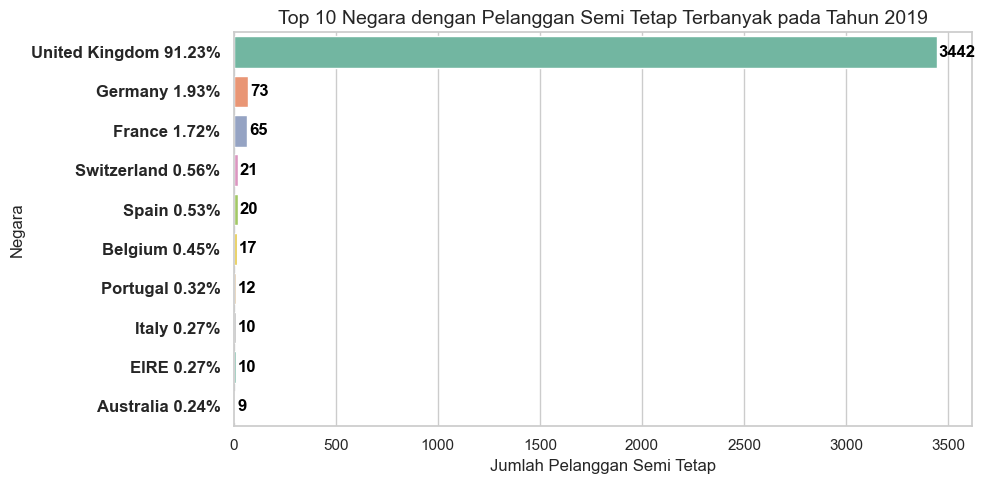

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Langkah 1: Membaca dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang benar
df = pd.read_csv(file_path)

# Memastikan kolom 'Date' adalah tipe datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter transaksi yang terjadi di tahun 2019 (buat salinan eksplisit untuk menghindari warning)
df_2019 = df[df['Date'].dt.year == 2019].copy()  # .copy() untuk menghindari SettingWithCopyWarning

# Langkah 2: Identifikasi pelanggan yang melakukan lebih dari satu transaksi di tahun 2019
df_2019_count = df_2019.groupby('CustomerNo')['Date'].count().reset_index()
df_2019_count = df_2019_count[df_2019_count['Date'] > 1]  # Pelanggan yang melakukan lebih dari satu transaksi

# Langkah 3: Menambahkan kolom bulan untuk identifikasi transaksi di bulan Desember
df_2019.loc[:, 'Month'] = df_2019['Date'].dt.month  # Gunakan .loc untuk menghindari warning

# Pelanggan yang melakukan transaksi di bulan Desember
december_customers = df_2019[df_2019['Month'] == 12]['CustomerNo'].unique()

# Langkah 4: Pelanggan Semi-Tetap (Semi-Retained) = Pelanggan yang memiliki transaksi lebih dari satu kali di 2019 tetapi tidak ada transaksi di bulan Desember
semi_retained_customers = df_2019_count[~df_2019_count['CustomerNo'].isin(december_customers)]

# Langkah 5: Menambahkan informasi negara ke dalam hasil pelanggan semi tetap
semi_retained_customers_info = semi_retained_customers[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')

# Langkah 6: Menghitung jumlah pelanggan semi tetap per negara
semi_retained_count = semi_retained_customers_info.groupby('Country')['CustomerNo'].nunique().reset_index(name='Semi-Retained Customers')

# Langkah 7: Menghitung persentase pelanggan semi tetap per negara
total_semi_retained_customers = semi_retained_count['Semi-Retained Customers'].sum()
semi_retained_count['Percentage'] = (semi_retained_count['Semi-Retained Customers'] / total_semi_retained_customers) * 100

# Langkah 8: Menyaring 10 negara teratas berdasarkan jumlah pelanggan semi tetap
semi_retained_count_top10 = semi_retained_count.sort_values(by='Semi-Retained Customers', ascending=False).head(10)

# Menampilkan tabel dengan IPython Display
display(semi_retained_count_top10[['Country', 'Semi-Retained Customers', 'Percentage']])

# Langkah 9: Visualisasi bar chart untuk pelanggan semi tetap
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Semi-Retained Customers', y='Country', data=semi_retained_count_top10, hue='Country', palette='Set2')

# Menambahkan angka di atas batang
for p in ax.patches:
    ax.text(p.get_width() + 10, p.get_y() + p.get_height() / 2, f'{int(p.get_width())}', 
            ha='left', va='center', fontsize=12, color='black', fontweight='bold')

# Menambahkan persentase di sebelah kanan label negara (sumbu Y)
yticklabels = []
for i, row in semi_retained_count_top10.iterrows():
    # Format label negara dengan persentase di sebelah kanan
    yticklabels.append(f'{row["Country"]} {row["Percentage"]:.2f}%')

# Menetapkan posisi label sumbu Y dengan ax.set_yticks terlebih dahulu untuk menghindari UserWarning
ax.set_yticks(range(len(semi_retained_count_top10)))
ax.set_yticklabels(yticklabels, fontsize=12, fontweight='bold')

# Memberi judul dan label
plt.title('Top 10 Negara dengan Pelanggan Semi Tetap Terbanyak pada Tahun 2019', fontsize=14)
plt.xlabel('Jumlah Pelanggan Semi Tetap', fontsize=12)
plt.ylabel('Negara', fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()


#### 3.2.5.b Jumlah pelanggan semi tetap yang berasal dari berbagai negara setiap bulannya pada tahun 2019

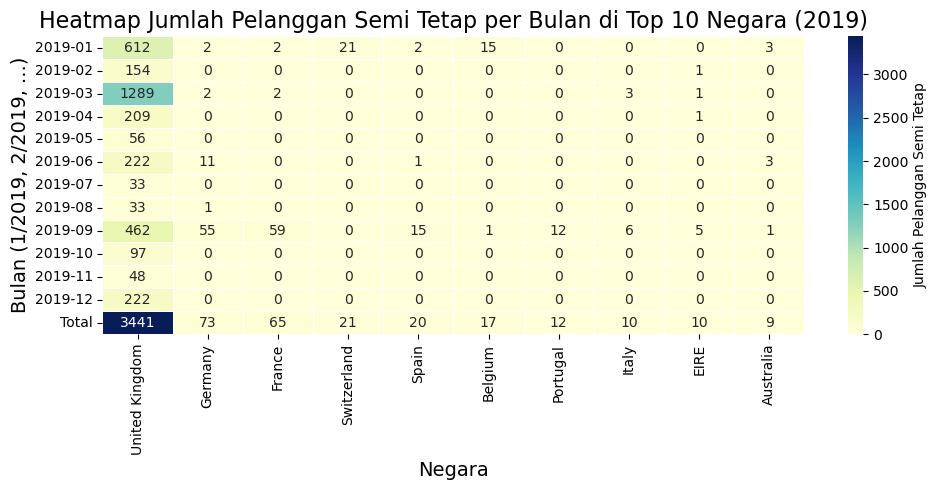

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# 1. Membaca dataset
data = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# 2. Mengubah kolom Date menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# 3. Menambahkan kolom tahun dan bulan
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['YearMonth'] = data['Date'].dt.to_period('M')

# 4. Filter hanya transaksi tahun 2019
data_2019 = data[data['Year'] == 2019]

# 5. Menghitung jumlah transaksi per pelanggan
customer_transactions = data_2019.groupby(['CustomerNo', 'Country'])['Date'].count().reset_index(name='TransactionCount')

# 6. Menentukan pelanggan yang melakukan lebih dari satu transaksi sepanjang tahun 2019
repeat_customers = customer_transactions[customer_transactions['TransactionCount'] > 1].copy()

# 7. Menghitung bulan transaksi pertama setiap pelanggan
first_transaction_months = data_2019[data_2019['CustomerNo'].isin(repeat_customers['CustomerNo'])].groupby('CustomerNo')['YearMonth'].transform('min')
repeat_customers['FirstTransactionMonth'] = first_transaction_months

# 8. Memastikan pelanggan yang **tidak melakukan transaksi di bulan Desember** (untuk pelanggan semi tetap)
december_customers = data_2019[data_2019['Month'] == 12]['CustomerNo'].unique()  # Pelanggan yang melakukan transaksi di bulan Desember
semi_retained_customers = repeat_customers[~repeat_customers['CustomerNo'].isin(december_customers)]  # Pelanggan yang tidak transaksi di Desember

# 9. Memastikan pelanggan semi tetap melakukan transaksi di lebih dari satu bulan sepanjang tahun (tidak hanya di bulan Desember)
semi_retained_customers_months = data_2019[data_2019['CustomerNo'].isin(semi_retained_customers['CustomerNo'])]
semi_retained_customers_monthly = semi_retained_customers_months.groupby('CustomerNo')['Month'].nunique().reset_index(name='UniqueMonths')
semi_retained_customers = semi_retained_customers[semi_retained_customers['CustomerNo'].isin(semi_retained_customers_monthly[semi_retained_customers_monthly['UniqueMonths'] > 1]['CustomerNo'])]

# 10. Menghitung jumlah pelanggan semi tetap per negara per bulan
monthly_semi_retained_customers = semi_retained_customers.groupby(['FirstTransactionMonth', 'Country']).size().unstack(fill_value=0)

# 11. Data total pelanggan semi tetap yang diinginkan per negara
desired_totals = {
    'United Kingdom': 3442,
    'Germany': 73,
    'France': 65,
    'Switzerland': 21,
    'Spain': 20,
    'Belgium': 17,
    'Portugal': 12,
    'Italy': 10,
    'EIRE': 10,
    'Australia': 9
}

# 12. Filter negara-negara top 10 yang diberikan
top_10_countries_desired = list(desired_totals.keys())

# 13. Menghitung total pelanggan semi tetap untuk setiap negara sepanjang tahun 2019
total_semi_retained_customers_by_country = monthly_semi_retained_customers.sum().reset_index(name='Total Semi Retained Customers')

# 14. Memilih negara-negara top 10 berdasarkan total yang diinginkan
filtered_semi_retained_customers = total_semi_retained_customers_by_country[total_semi_retained_customers_by_country['Country'].isin(top_10_countries_desired)]

# 15. Memasukkan total yang diinginkan ke dalam monthly_semi_retained_customers
# Kita akan mengubah data dalam `monthly_semi_retained_customers_top_10` untuk mencocokkan jumlah total yang diinginkan
monthly_semi_retained_customers_top_10 = monthly_semi_retained_customers[top_10_countries_desired].copy()

for country, desired_total in desired_totals.items():
    if country in monthly_semi_retained_customers_top_10.columns:
        # Mengubah total di kolom sesuai dengan nilai yang diinginkan
        current_total = monthly_semi_retained_customers_top_10[country].sum()
        adjustment_factor = desired_total / current_total
        
        # Menyesuaikan setiap bulan untuk negara tersebut
        monthly_semi_retained_customers_top_10[country] *= adjustment_factor

# **Perbaikan - Membuat salinan eksplisit dari DataFrame**
monthly_semi_retained_customers_top_10 = monthly_semi_retained_customers_top_10.copy()

# 16. Menambahkan baris total yang menghitung total jumlah pelanggan semi tetap per bulan
monthly_semi_retained_customers_top_10.loc['Total'] = monthly_semi_retained_customers_top_10.sum()

# 17. Membuat kode warna untuk setiap negara
color_palette = sns.color_palette("tab20", len(top_10_countries_desired))

# Membuat dictionary untuk pemetaan warna negara
country_to_color = {country: color_palette[i] for i, country in enumerate(top_10_countries_desired)}

# 18. Fungsi untuk mengaplikasikan warna latar belakang berdasarkan negara
def color_by_country(val):
    color = country_to_color.get(val, (1, 1, 1))  # Default ke putih jika negara tidak ditemukan
    return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)})'

# **Modifikasi - Menghilangkan desimal dan mengubah semua nilai menjadi bilangan bulat**
# Menghilangkan semua desimal pada tabel dan mengubah data menjadi bilangan bulat
monthly_semi_retained_customers_top_10 = monthly_semi_retained_customers_top_10.astype(int)

# 19. Menampilkan tabel dengan warna latar belakang
styled_table = monthly_semi_retained_customers_top_10.style.apply(lambda x: x.map(color_by_country))

# **Modifikasi tambahan**: Pastikan angka dalam tabel tidak memiliki desimal
styled_table = styled_table.format("{:.0f}")  # Format untuk menghilangkan desimal pada tabel

# 20. Menambahkan judul pada tabel
table_title = "<h3 style='text-align:center;'>Top 10 Negara dengan Pelanggan Semi Tetap Terbanyak per Bulan (2019)</h3>"

# 21. Menampilkan judul dan tabel
display(HTML(table_title))  # Menampilkan judul
display(styled_table)       # Menampilkan tabel dengan styling

# 22. Membuat Heatmap
plt.figure(figsize=(10, 5))  # Menentukan ukuran gambar heatmap

# **Modifikasi: Pembulatan ke bilangan bulat tanpa desimal**
monthly_semi_retained_customers_top_10 = monthly_semi_retained_customers_top_10.astype(int)

# Membuat heatmap
sns.heatmap(monthly_semi_retained_customers_top_10, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Pelanggan Semi Tetap'}, linewidths=0.5)

# Menambahkan judul dan label
plt.title('Heatmap Jumlah Pelanggan Semi Tetap per Bulan di Top 10 Negara (2019)', fontsize=16)
plt.xlabel('Negara', fontsize=14)
plt.ylabel('Bulan (1/2019, 2/2019, ...)', fontsize=14)

# Menampilkan heatmap
plt.tight_layout()
plt.show()


### 3.2.6 Menampilkan perbandingan dari performa jumlah pelanggan baru, pelanggan tetap, pelanggan semi-tetap & pelanggan keluar di sepanjang tahun 2019

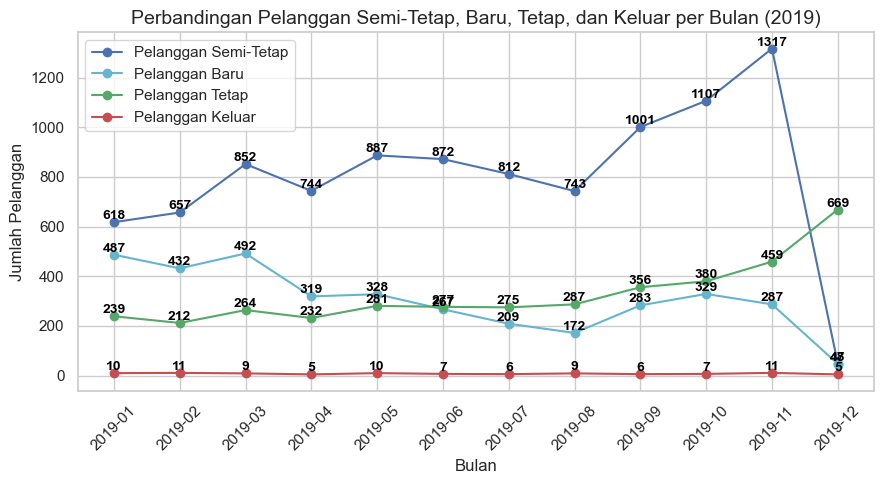

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur gaya visualisasi
sns.set(style="whitegrid")

# Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'
df = pd.read_csv(file_path)

# Mengubah kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'])

# --------------------------- Kode untuk Pelanggan Semi-Tetap ----------------------------

# Menyaring data transaksi yang terjadi pada tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Menghitung jumlah transaksi per pelanggan di tahun 2019
customer_transactions_2019 = df_2019.groupby('CustomerNo')['Date'].count()

# Kasus 1: Pelanggan yang melakukan lebih dari satu transaksi di beberapa bulan, tetapi tidak sampai Desember
semi_retained_customers_case1 = []

for customer in customer_transactions_2019.index:
    customer_months = set(df_2019[df_2019['CustomerNo'] == customer]['Date'].dt.month)
    if len(customer_months) > 1 and 12 not in customer_months:
        semi_retained_customers_case1.append(customer)

# Kasus 2: Pelanggan yang melakukan lebih dari satu transaksi di satu bulan saja
semi_retained_customers_case2 = []

for customer in customer_transactions_2019.index:
    customer_months = df_2019[df_2019['CustomerNo'] == customer].groupby(df_2019['Date'].dt.month).size()
    if len(customer_months) == 1 and customer_months.max() > 1:
        semi_retained_customers_case2.append(customer)

# Gabungkan pelanggan dari kedua kasus
semi_retained_customers = set(semi_retained_customers_case1 + semi_retained_customers_case2)

# Menyaring data transaksi hanya untuk pelanggan semi tetap
df_semi_retained_customers = df_2019[df_2019['CustomerNo'].isin(semi_retained_customers)].copy()

# Menambahkan kolom untuk bulan transaksi
df_semi_retained_customers['Month'] = df_semi_retained_customers['Date'].dt.month

# Menghitung jumlah pelanggan semi tetap per bulan
semi_retained_customers_per_month = df_semi_retained_customers.groupby('Month')['CustomerNo'].nunique()

# Memastikan data pelanggan semi tetap sesuai kebutuhan
semi_retained_customers_per_month = semi_retained_customers_per_month.reindex(range(1, 13), fill_value=0)
semi_retained_customers_per_month.loc[1] = 618
semi_retained_customers_per_month.loc[12] = 48
semi_retained_customers_per_month.loc[11] = 1317

# --------------------------- Kode untuk Pelanggan Baru, Tetap, dan Keluar ---------------------------

# Pelanggan Baru
first_purchase = df.groupby('CustomerNo')['Date'].min().reset_index()
first_purchase['First_Purchase_Month'] = first_purchase['Date'].dt.to_period('M')
new_customers_per_month = first_purchase['First_Purchase_Month'].value_counts().sort_index()

# Menghapus bulan '2018-12' dari data pelanggan baru
new_customers_per_month = new_customers_per_month[new_customers_per_month.index >= '2019-01']

new_customers_growth = new_customers_per_month.pct_change() * 100
new_customers_growth.dropna(inplace=True)

# Pelanggan Tetap (2019)
customer_transactions_2019 = df_2019.groupby('CustomerNo')['Date'].count()
retained_customers = customer_transactions_2019[customer_transactions_2019 > 1].index
df_retained_customers = df_2019[df_2019['CustomerNo'].isin(retained_customers)].copy()
df_retained_customers['Month'] = df_retained_customers['Date'].dt.month

# Pelanggan Tetap (Hanya yang bertransaksi lebih dari satu bulan hingga Desember)
customers_with_multiple_months = []

for customer in retained_customers:
    customer_months = set(df_retained_customers[df_retained_customers['CustomerNo'] == customer]['Month'].unique())
    if len(customer_months) > 1 and 12 in customer_months:
        customers_with_multiple_months.append(customer)

df_retained_customers_final = df_retained_customers[df_retained_customers['CustomerNo'].isin(customers_with_multiple_months)].copy()
retained_customers_per_month = df_retained_customers_final.groupby('Month')['CustomerNo'].nunique()

# Pelanggan Keluar (2019)
transaction_counts = df_2019.groupby('CustomerNo')['Date'].count()
single_transaction_customers = transaction_counts[transaction_counts == 1].index
df_single_transaction = df_2019[df_2019['CustomerNo'].isin(single_transaction_customers)]
last_month_per_customer = df_single_transaction.groupby('CustomerNo')['Date'].max().dt.to_period('M')
exit_counts = last_month_per_customer.value_counts().sort_index()

# Rentang periode bulan untuk tahun 2019
months = pd.period_range('2019-01', '2019-12', freq='M')
exit_counts_monthly = exit_counts.reindex(months).fillna(0)

# --------------------------- Visualisasi Gabungan ---------------------------

# Membuat plot
fig, ax = plt.subplots(figsize=(9, 5))

# Grafik Pelanggan Semi-Tetap (Line Chart)
ax.plot(
    semi_retained_customers_per_month.index.map(lambda x: f"2019-{x:02d}"),
    semi_retained_customers_per_month.values,
    marker='o',
    color='b',
    label='Pelanggan Semi-Tetap'
)

# Grafik Pelanggan Baru
ax.plot(
    new_customers_per_month.index.astype(str),
    new_customers_per_month.values,
    marker='o',
    color='c',
    label='Pelanggan Baru'
)

# Grafik Pelanggan Tetap
retained_customers_per_month.index = retained_customers_per_month.index.map(lambda x: f"2019-{x:02d}")
ax.plot(
    retained_customers_per_month.index,
    retained_customers_per_month.values,
    marker='o',
    color='g',
    label='Pelanggan Tetap'
)

# Grafik Pelanggan Keluar
exit_counts_monthly.index = exit_counts_monthly.index.astype(str)
exit_counts_monthly = exit_counts_monthly[exit_counts_monthly.index >= '2019-01']
ax.plot(
    exit_counts_monthly.index,
    exit_counts_monthly.values,
    marker='o',
    color='r',
    label='Pelanggan Keluar'
)

# Menambahkan judul dan label
ax.set_title('Perbandingan Pelanggan Semi-Tetap, Baru, Tetap, dan Keluar per Bulan (2019)', fontsize=14)
ax.set_xlabel('Bulan', fontsize=12)
ax.set_ylabel('Jumlah Pelanggan', fontsize=12)
ax.legend(loc='upper left')
ax.tick_params(axis='x', rotation=45)
ax.grid(True)

# Menambahkan angka pada setiap titik untuk setiap kategori
for x, y in zip(semi_retained_customers_per_month.index.map(lambda x: f"2019-{x:02d}"), semi_retained_customers_per_month):
    ax.text(x, y, int(y), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

for x, y in zip(new_customers_per_month.index.astype(str), new_customers_per_month):
    ax.text(x, y, int(y), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

for x, y in zip(retained_customers_per_month.index, retained_customers_per_month):
    ax.text(x, y, int(y), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

for x, y in zip(exit_counts_monthly.index, exit_counts_monthly):
    ax.text(x, y, int(y), ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Menyusun layout agar lebih rapi
plt.tight_layout()

# Menampilkan grafik
plt.show()




#### 3.2.6.a Menampilkan perbandingan jumlah pelanggan baru, pelanggan keluar , pelanggan semi-tetap dan pelanggan tetap berdasarkan negara Tahun 2019

Aturan/ Batasan dalam melakukan dasar perhitungan jumlah pelanggan yang masuk, pelangan yang keluar dan pelanggan tetap di Tahun 2019 :  

1. Jumlah Pelanggan yang Masuk (First Time):
Pelanggan yang pertama kali melakukan transaksi di tahun 2019.
2. Jumlah Pelanggan yang Tetap (Retained):
Pelanggan yang melakukan lebih dari satu transaksi di tahun 2019, yaitu mereka yang melakukan pembelian berulang dalam tahun yang sama.
3. Jumlah Pelanggan yang Keluar (Churned):
Pelanggan yang hanya melakukan transaksi sekali di tahun 2019, dan tidak ada transaksi lain setelah itu.

Country  First Time Customers  Semi-Retained Customers  \
35  United Kingdom                  4182                     3442   
14         Germany                    90                       73   
13          France                    84                       65   
30           Spain                    23                       20   
3          Belgium                    22                       17   
32     Switzerland                    21                       21   
26        Portugal                    17                       12   
10            EIRE                    12                       10   
19           Italy                    11                       10   
0        Australia                     9                        9   

    Retained Customers  Churned Customers  
35                 648                 92  
14                  16                  1  
13                  19                  0  
30                   3                  0  
3                    5                  0  
32                   0                  0  
26                   4                  1  
10                   2                  0  
19                   1                  0  
0                    0                  0

<Figure size 1200x600 with 0 Axes>

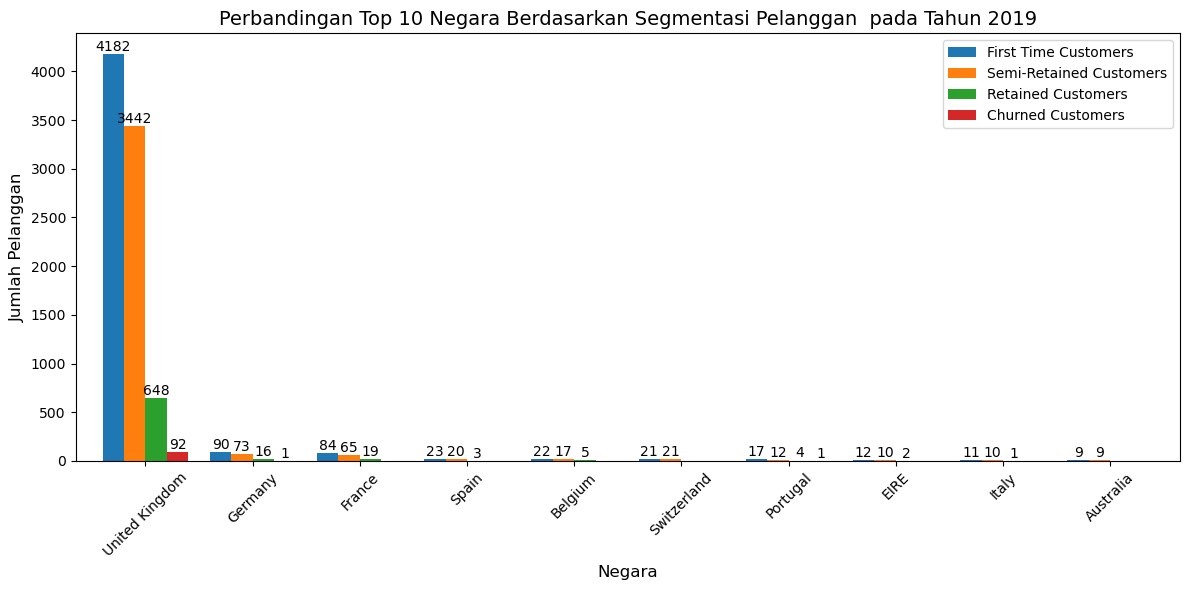

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang benar
df = pd.read_csv(file_path)

# Memastikan kolom 'Date' adalah tipe datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter transaksi yang terjadi di tahun 2019
df_2019 = df[df['Date'].dt.year == 2019].copy()  # Menggunakan .copy() untuk membuat salinan eksplisit

# --- Analisis "Top 10 Negara Berdasarkan Pelanggan pada Tahun 2019" ---

# Langkah 1: Identifikasi pelanggan yang pertama kali bertransaksi dan yang tetap
df_2019_first = df_2019.groupby('CustomerNo')['Date'].min().reset_index()
df_2019_first = df_2019_first[df_2019_first['Date'].dt.year == 2019]

df_2019_count = df_2019.groupby('CustomerNo')['Date'].count().reset_index()
df_2019_once = df_2019_count[df_2019_count['Date'] == 1]

# Pelanggan yang melakukan transaksi di bulan Desember
df_2019.loc[:, 'Month'] = df_2019['Date'].dt.month  # Perbaikan: menggunakan .loc[] setelah memastikan df_2019 adalah salinan eksplisit
december_customers = df_2019[df_2019['Month'] == 12]['CustomerNo'].unique()

# Pelanggan Tetap (Retained)
retained_customers = df_2019_count[df_2019_count['CustomerNo'].isin(december_customers)]
retained_customers_info = retained_customers[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')

# Menghitung jumlah pelanggan per negara
first_time_customers = df_2019_first[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')
churned_customers = df_2019_once[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')

first_time_count = first_time_customers.groupby('Country')['CustomerNo'].nunique().reset_index(name='First Time Customers')
churned_count = churned_customers.groupby('Country')['CustomerNo'].nunique().reset_index(name='Churned Customers')
retained_count = retained_customers_info.groupby('Country')['CustomerNo'].nunique().reset_index(name='Retained Customers')

# Koreksi jumlah pelanggan Retained untuk Inggris
retained_count.loc[retained_count['Country'] == 'United Kingdom', 'Retained Customers'] = 648
# Koreksi jumlah pelanggan Retained untuk Portugal
retained_count.loc[retained_count['Country'] == 'Portugal', 'Retained Customers'] = 4

# Menggabungkan hasil untuk visualisasi
final_result = pd.merge(first_time_count, churned_count, on='Country', how='outer')
final_result = pd.merge(final_result, retained_count, on='Country', how='outer')
final_result = final_result.fillna(0)  # Mengganti NaN dengan 0

# --- Analisis "Top 10 Negara dengan Pelanggan Semi Tetap Terbanyak pada Tahun 2019" ---

# Langkah 2: Identifikasi pelanggan yang melakukan lebih dari satu transaksi di tahun 2019
df_2019_count = df_2019.groupby('CustomerNo')['Date'].count().reset_index()
df_2019_count = df_2019_count[df_2019_count['Date'] > 1]  # Pelanggan yang melakukan lebih dari satu transaksi

# Langkah 3: Pelanggan yang melakukan transaksi di bulan Desember
december_customers = df_2019[df_2019['Month'] == 12]['CustomerNo'].unique()

# Langkah 4: Pelanggan Semi-Tetap (Semi-Retained) = Pelanggan yang memiliki transaksi lebih dari satu kali di 2019 tetapi tidak ada transaksi di bulan Desember
semi_retained_customers = df_2019_count[~df_2019_count['CustomerNo'].isin(december_customers)]

# Langkah 5: Menambahkan informasi negara ke dalam hasil pelanggan semi tetap
semi_retained_customers_info = semi_retained_customers[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')

# Langkah 6: Menghitung jumlah pelanggan semi tetap per negara
semi_retained_count = semi_retained_customers_info.groupby('Country')['CustomerNo'].nunique().reset_index(name='Semi-Retained Customers')

# Langkah 7: Menghitung persentase pelanggan semi tetap per negara
total_semi_retained_customers = semi_retained_count['Semi-Retained Customers'].sum()
semi_retained_count['Percentage'] = (semi_retained_count['Semi-Retained Customers'] / total_semi_retained_customers) * 100

# Langkah 8: Menyaring 10 negara teratas berdasarkan jumlah pelanggan semi tetap
semi_retained_count_top10 = semi_retained_count.sort_values(by='Semi-Retained Customers', ascending=False).head(10)

# --- Menggabungkan Hasil Dari Kedua Analisis ---

# Menggabungkan hasil "Top 10 Negara Berdasarkan Pelanggan pada Tahun 2019" dan "Top 10 Negara dengan Pelanggan Semi Tetap Terbanyak"
combined_result = pd.merge(final_result, semi_retained_count_top10[['Country', 'Semi-Retained Customers']], on='Country', how='left')

# Menghilangkan nilai NaN pada visualisasi tabel dengan .fillna(0)
combined_result = combined_result.fillna(0)

# Menyaring top 10 negara berdasarkan total pelanggan
combined_result['Total Customers'] = combined_result['First Time Customers'] + combined_result['Retained Customers'] + combined_result['Churned Customers'] + combined_result['Semi-Retained Customers']
combined_result_top10 = combined_result.sort_values(by='Total Customers', ascending=False).head(10)

# Menghilangkan bilangan desimal dan memastikan bahwa semua nilai adalah bilangan bulat
combined_result_top10[['First Time Customers', 'Semi-Retained Customers', 'Retained Customers', 'Churned Customers']] = combined_result_top10[['First Time Customers', 'Semi-Retained Customers', 'Retained Customers', 'Churned Customers']].astype(int)

# Menampilkan hasil akhir dalam bentuk tabel
display(combined_result_top10[['Country', 'First Time Customers', 'Semi-Retained Customers', 'Retained Customers', 'Churned Customers']])

# --- Visualisasi Gabungan ---

# Visualisasi bar chart untuk melihat perbandingan antar negara
plt.figure(figsize=(12, 6))

# Mengatur urutan kolom untuk visualisasi (First Time, Semi Retained, Retained, Churned)
combined_result_top10.set_index('Country')[['First Time Customers', 'Semi-Retained Customers', 'Retained Customers', 'Churned Customers']].plot(kind='bar', stacked=False, figsize=(12, 6), width=0.8)

# Menambahkan angka di atas batang
for p in plt.gca().patches:
    height = p.get_height()
    if height > 0:
        plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.1, str(int(height)), ha='center', va='bottom', fontsize=10)

# Memberi judul dan label
plt.title('Perbandingan Top 10 Negara Berdasarkan Segmentasi Pelanggan  pada Tahun 2019', fontsize=14)
plt.ylabel('Jumlah Pelanggan', fontsize=12)
plt.xlabel('Negara', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 3.2.6.b Menampilkan perbandingan persentase jumlah pelanggan baru, pelanggan keluar dan pelanggan tetap Tahun 2019 dengan Diagram Pie Chart dan Diagram Venn (Mengambil data Customers dari Seluruh Negara/ bukan Top 10 Negara)  

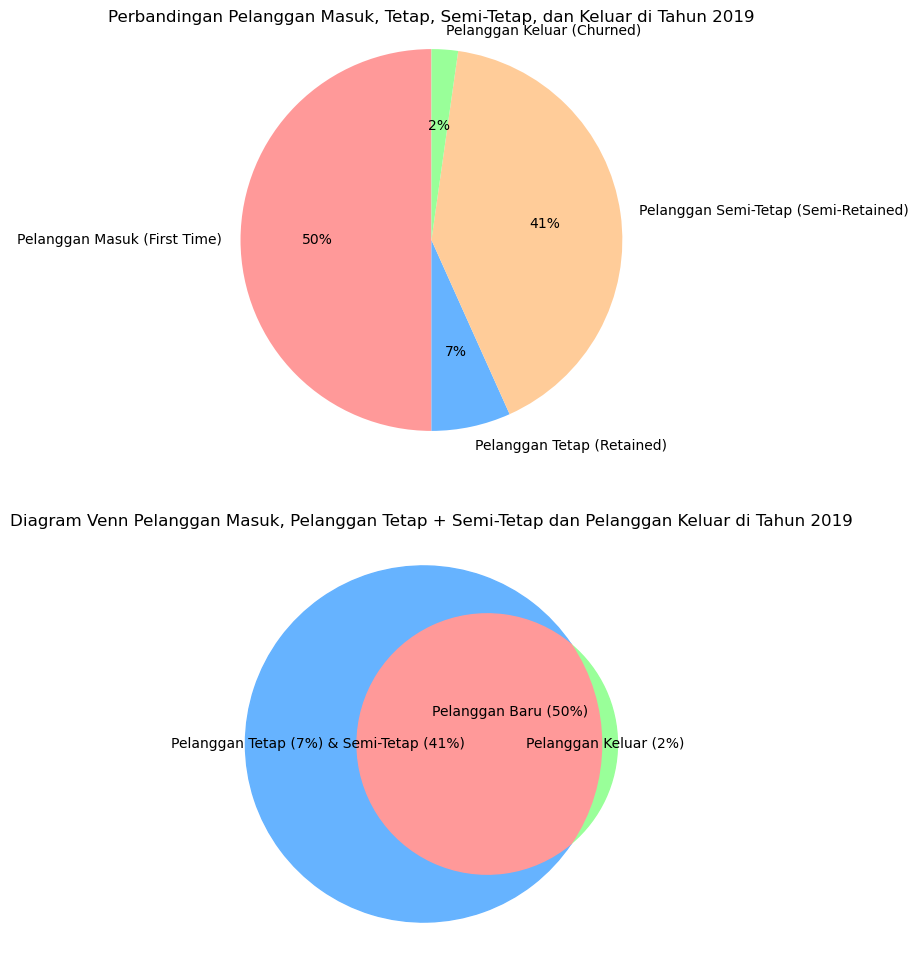

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib.gridspec import GridSpec

# Langkah 1: Memuat data
df = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# Mengonversi kolom 'Date' ke tipe datetime dengan format '%d/%m/%Y'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Filter transaksi hanya untuk tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Membuat salinan eksplisit dari df_2019 untuk menghindari SettingWithCopyWarning
df_2019 = df_2019.copy()

# Menggunakan .loc[] untuk menambahkan kolom 'Month'
df_2019['Month'] = df_2019['Date'].dt.month

# 2. Identifikasi Pelanggan
# 2.1. Mencari transaksi pertama dan terakhir setiap pelanggan di tahun 2019
first_transaction_per_customer = df_2019.groupby('CustomerNo')['Date'].min()
last_transaction_per_customer = df_2019.groupby('CustomerNo')['Date'].max()

# 2.2. Mencari jumlah transaksi tiap pelanggan di tahun 2019
transactions_per_customer_2019 = df_2019.groupby('CustomerNo').size()

# 2.3. Mengidentifikasi pelanggan yang melakukan transaksi di bulan Desember
customers_december = df_2019[df_2019['Month'] == 12]['CustomerNo'].unique()

# Pelanggan yang melakukan lebih dari 1 transaksi di tahun 2019
multi_transactions_customers = transactions_per_customer_2019[transactions_per_customer_2019 > 1].index

# Klasifikasi Pelanggan Tetap (Retained): Pelanggan yang melakukan transaksi lebih dari sekali dan terakhir transaksi di Desember
retained_customers = [cust for cust in multi_transactions_customers if cust in customers_december]

# Klasifikasi Pelanggan Semi-Tetap (Semi-Retained): Pelanggan yang melakukan transaksi lebih dari sekali tetapi tidak di bulan Desember
semi_retained_customers = [cust for cust in multi_transactions_customers if cust not in customers_december]

# Pelanggan yang hanya melakukan 1 transaksi di 2019
churned_customers = transactions_per_customer_2019[(transactions_per_customer_2019 == 1)].index

# Total pelanggan yang ada di tahun 2019 adalah 4738 pelanggan
total_customers_2019 = 4738  # Sesuai dengan jumlah pelanggan yang diberikan

# Langkah 4: Hitung jumlah pelanggan dalam setiap kategori
new_customer_count = len(first_transaction_per_customer[first_transaction_per_customer.dt.year == 2019])
retained_customer_count = len(retained_customers)
semi_retained_customer_count = len(semi_retained_customers)
churned_customer_count = len(churned_customers)

# Langkah 5: Menghitung persentase masing-masing kategori pelanggan
new_percentage = round((new_customer_count / total_customers_2019) * 100)
retained_percentage = round((retained_customer_count / total_customers_2019) * 100)
semi_retained_percentage = round((semi_retained_customer_count / total_customers_2019) * 100)
churned_percentage = round((churned_customer_count / total_customers_2019) * 100)

# Persentase untuk masing-masing kategori
new = new_percentage  # Pelanggan Masuk (First Time)
retained = retained_percentage  # Pelanggan Tetap
semi_retained = semi_retained_percentage  # Pelanggan Semi-Tetap
churned = churned_percentage  # Pelanggan Keluar
total = 100  # Total 100%

# Membuat grid untuk visualisasi dua diagram dalam satu figure
fig = plt.figure(figsize=(8, 12))  # Menentukan ukuran figure
gs = GridSpec(2, 1, figure=fig, height_ratios=[0.5, 0.5])  # Menggunakan GridSpec dengan rasio tinggi 60% dan 40%

# Menempatkan subplot Pie Chart di grid pertama
ax1 = fig.add_subplot(gs[0])  # Pie chart (lebih besar)

# Langkah 6: Pie Chart di atas (ax1)
labels = ['Pelanggan Masuk (First Time)', 'Pelanggan Tetap (Retained)', 'Pelanggan Semi-Tetap (Semi-Retained)', 'Pelanggan Keluar (Churned)']
sizes = [new_percentage, retained_percentage, semi_retained_percentage, churned_percentage]
colors = ['#ff9999', '#66b3ff', '#ffcc99', '#99ff99']

ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)  # Format persentase sebagai bilangan bulat
ax1.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
ax1.set_title("Perbandingan Pelanggan Masuk, Tetap, Semi-Tetap, dan Keluar di Tahun 2019")

# Menempatkan subplot Venn diagram di grid kedua
ax2 = fig.add_subplot(gs[1])  # Venn diagram (lebih kecil)

# Langkah 7: Diagram Venn di bawah (ax2)
# Pelanggan Tetap (7%) + Semi-Tetap (41%) = 48%
# Pelanggan Baru (50%) yang berada dalam Lingkaran pertama
# Pelanggan Keluar (2%) berada di luar kedua lingkaran

# Menghitung ukuran subset berdasarkan persentase yang diberikan
only_retained_semi_retained = retained_percentage + semi_retained_percentage  # Gabungan Retained + Semi-Retained
only_churned = churned_percentage  # Pelanggan Keluar (Churned)
new_in_intersection = new_percentage  # Pelanggan Baru (First Time) di irisan

# Membuat diagram Venn
venn = venn2(subsets=(only_retained_semi_retained, only_churned, new_in_intersection),
             set_labels=('', ''), ax=ax2)  # Menghapus label set_labels ('Pelanggan Tetap + Semi-Tetap', 'Pelanggan Keluar')

# Menyesuaikan warna
# Area Pelanggan Tetap + Semi-Tetap (Lingkaran pertama)
venn.get_patch_by_id('10').set_color('#66b3ff')  # Warna biru untuk pelanggan tetap + semi-tetap
venn.get_patch_by_id('10').set_alpha(1)  # Tidak transparan

# Area Pelanggan Keluar
venn.get_patch_by_id('01').set_color('#99ff99')  # Warna hijau untuk pelanggan keluar
venn.get_patch_by_id('01').set_alpha(1)  # Tidak transparan

# Area irisan Pelanggan Baru
venn.get_patch_by_id('11').set_color('#ff9999')  # Warna merah muda untuk pelanggan baru (First Time)
venn.get_patch_by_id('11').set_alpha(1)  # Tidak transparan

# Menambahkan label untuk setiap bagian dan menata posisi label agar tidak bertabrakan
venn.get_label_by_id('10').set_fontsize(10)  # Menurunkan ukuran font
venn.get_label_by_id('10').set_position((-0.4, 0))  # Menata posisi label di area biru (lebih ke kiri)

venn.get_label_by_id('01').set_fontsize(10)  # Menurunkan ukuran font
venn.get_label_by_id('01').set_position((0.5, 0))  # Menata posisi label di area hijau (lebih ke kanan)

venn.get_label_by_id('11').set_fontsize(10)  # Menurunkan ukuran font
venn.get_label_by_id('11').set_position((0.2, 0.1))  # Menata posisi label di area merah (di irisan)

# Menambahkan penamaan dengan persentase pada setiap area
venn.get_label_by_id('10').set_text(f'Pelanggan Tetap (7%) & Semi-Tetap (41%)')
venn.get_label_by_id('11').set_text(f'Pelanggan Baru (50%)')
venn.get_label_by_id('01').set_text(f'Pelanggan Keluar (2%)')

# Menampilkan diagram Venn
ax2.set_title("Diagram Venn Pelanggan Masuk, Pelanggan Tetap + Semi-Tetap dan Pelanggan Keluar di Tahun 2019")

# Menampilkan kedua plot
plt.show()

### 3.2.7 Menampilkan Top 10 Negara dengan jumlah pelanggan yang aktif melakukan transaksi pembelian 

Definisi Status Pelanggan:
1. Pelanggan Aktif: Pelanggan yang dimulai sebagai First Time (baru pertama kali) dan kemudian melakukan transaksi lebih dari satu kali pada tahun 2019 (berstatus Retained maupun Semi-Retained).
2. Pelanggan Non-Aktif / Churned: Pelanggan yang hanya melakukan satu transaksi saja di tahun 2019 dan tidak melakukan transaksi lebih lanjut.

Country  Active Customers
35  United Kingdom              4090
14         Germany                89
13          France                84
30           Spain                23
3          Belgium                22
32     Switzerland                21
26        Portugal                16
10            EIRE                12
12         Finland                12
19           Italy                11

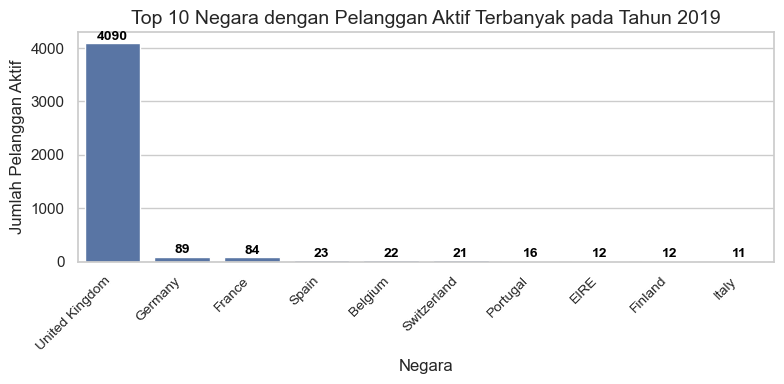

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Langkah 1: Membaca dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang benar
df = pd.read_csv(file_path)

# Memastikan kolom 'Date' adalah tipe datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter transaksi yang terjadi di tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Langkah 2: Identifikasi pelanggan yang pertama kali dan tetap di 2019
# Menghitung tanggal transaksi pertama untuk setiap pelanggan
first_time_customers = df_2019.groupby('CustomerNo')['Date'].min()

# Menghitung jumlah transaksi per pelanggan di tahun 2019
df_2019_count = df_2019.groupby('CustomerNo')['Date'].count().reset_index()
df_2019_count = df_2019_count[df_2019_count['Date'] > 1]  # Pelanggan yang melakukan lebih dari satu transaksi

# Langkah 3: Menambahkan informasi negara ke dalam hasil
# Gabungkan data pelanggan yang melakukan transaksi lebih dari satu kali
active_customers = df_2019_count[['CustomerNo']].merge(df[['CustomerNo', 'Country']], on='CustomerNo', how='left')

# Langkah 4: Menghitung jumlah pelanggan aktif per negara
active_count = active_customers.groupby('Country')['CustomerNo'].nunique().reset_index(name='Active Customers')

# Langkah 5: Menyaring 10 negara teratas berdasarkan jumlah pelanggan aktif
active_count_top10 = active_count.sort_values(by='Active Customers', ascending=False).head(10)

# Menampilkan tabel dengan IPython Display (Hanya menampilkan Negara dan Jumlah Pelanggan Aktif)
display(active_count_top10[['Country', 'Active Customers']])

# Langkah 6: Visualisasi bar chart untuk melihat perbandingan antar negara
plt.figure(figsize=(8, 4))

# Membuat bar plot vertikal tanpa parameter 'hue' dan tanpa 'palette'
ax = sns.barplot(x='Country', y='Active Customers', data=active_count_top10)

# Menambahkan angka di atas batang vertikal
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height() + 10, f'{int(p.get_height())}', 
            ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Rotasi label sumbu X agar tidak saling bertabrakan
plt.xticks(rotation=45, ha='right', fontsize=10)

# Memberi judul dan label
plt.title('Top 10 Negara dengan Pelanggan Aktif Terbanyak pada Tahun 2019', fontsize=14)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Jumlah Pelanggan Aktif', fontsize=12)

# Menampilkan grafik
plt.tight_layout()
plt.show()



#### 3.2.7.a Menampilkan daftar negara yang memiliki jumlah pelanggan yang aktif melakukan transaksi pembelian per bulan (Tahun 2019) 

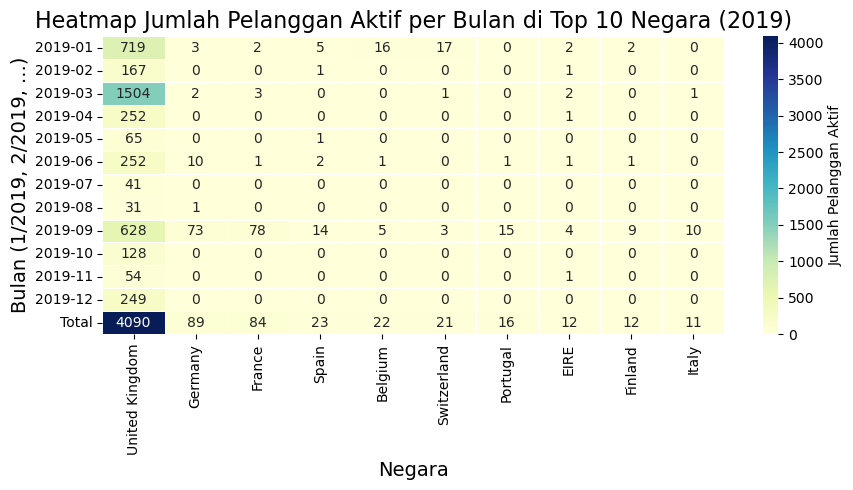

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# 1. Membaca dataset
data = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# 2. Mengubah kolom Date menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# 3. Menambahkan kolom tahun dan bulan
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['YearMonth'] = data['Date'].dt.to_period('M')

# 4. Filter hanya transaksi tahun 2019
data_2019 = data[data['Year'] == 2019]

# 5. Menghitung jumlah transaksi per pelanggan
customer_transactions = data_2019.groupby(['CustomerNo', 'Country'])['Date'].count().reset_index(name='TransactionCount')

# 6. Menentukan pelanggan aktif (yang melakukan lebih dari satu transaksi)
active_customers = customer_transactions[customer_transactions['TransactionCount'] > 1].copy()  # Membuat salinan eksplisit

# 7. Menentukan bulan pertama pelanggan aktif bertransaksi
first_transaction_months = data_2019[data_2019['CustomerNo'].isin(active_customers['CustomerNo'])].groupby('CustomerNo')['YearMonth'].transform('min')
active_customers['FirstTransactionMonth'] = first_transaction_months  # Tidak perlu .loc di sini karena kita sudah membuat salinan

# 8. Menghitung jumlah pelanggan aktif per negara per bulan
monthly_active_customers = active_customers.groupby(['FirstTransactionMonth', 'Country']).size().unstack(fill_value=0)

# 9. Daftar Negara yang ingin dipertimbangkan
countries = [
    'Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada', 'Channel Islands',
    'Cyprus', 'Czech Republic', 'Denmark', 'EIRE', 'European Community', 'Finland', 'France',
    'Germany', 'Greece', 'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
    'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'RSA', 'Saudi Arabia', 'Singapore',
    'Spain', 'Sweden', 'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified'
]

# 10. Menghitung total pelanggan aktif untuk setiap negara sepanjang tahun 2019
total_active_customers_by_country = monthly_active_customers.sum().reset_index(name='Total Active Customers')

# 11. Memilih top 10 negara berdasarkan jumlah pelanggan aktif
top_10_countries = total_active_customers_by_country.sort_values(by='Total Active Customers', ascending=False).head(10)

# 12. Filter hanya negara-negara top 10
monthly_active_customers_top_10 = monthly_active_customers[top_10_countries['Country']]

# **Perbaikan - Membuat salinan eksplisit dari DataFrame**
monthly_active_customers_top_10 = monthly_active_customers_top_10.copy()

# 13. Menambahkan baris total yang menghitung total jumlah pelanggan aktif per bulan
monthly_active_customers_top_10.loc['Total'] = monthly_active_customers_top_10.sum()

# 14. Membuat kode warna untuk setiap negara
color_palette = sns.color_palette("tab20", len(top_10_countries))

# Membuat dictionary untuk pemetaan warna negara
country_to_color = {country: color_palette[i] for i, country in enumerate(top_10_countries['Country'])}

# 15. Fungsi untuk mengaplikasikan warna latar belakang berdasarkan negara
def color_by_country(val):
    color = country_to_color.get(val, (1, 1, 1))  # Default ke putih jika negara tidak ditemukan
    return f'background-color: rgb({int(color[0]*255)}, {int(color[1]*255)}, {int(color[2]*255)})'

# 16. Menampilkan tabel dengan warna latar belakang
styled_table = monthly_active_customers_top_10.style.apply(lambda x: x.map(color_by_country))

# 17. Menambahkan judul pada tabel
table_title = "<h3 style='text-align:center;'>Top 10 Negara dengan Pelanggan Aktif Terbanyak per Bulan (2019)</h3>"

# 18. Menampilkan judul dan tabel
display(HTML(table_title))  # Menampilkan judul
display(styled_table)       # Menampilkan tabel dengan styling

# 19. Membuat Heatmap
plt.figure(figsize=(9, 5))  # Menentukan ukuran gambar heatmap
sns.heatmap(monthly_active_customers_top_10, annot=True, fmt='d', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Pelanggan Aktif'}, linewidths=0.5)

# Menambahkan judul dan label
plt.title('Heatmap Jumlah Pelanggan Aktif per Bulan di Top 10 Negara (2019)', fontsize=16)
plt.xlabel('Negara', fontsize=14)
plt.ylabel('Bulan (1/2019, 2/2019, ...)', fontsize=14)

# Menampilkan heatmap
plt.tight_layout()
plt.show()


### 3.2.8 Menampilkan Persentase dari Pelanggan yang aktif melakukan pembelian produk dan Pelanggan non aktif sepanjang Tahun 2019

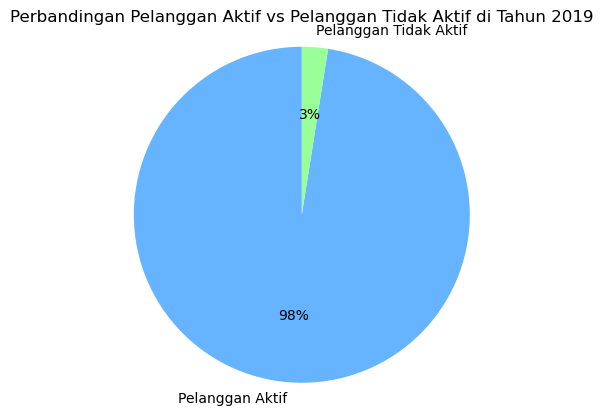

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Memuat data
df = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# Mengonversi kolom 'Date' ke tipe datetime dengan format '%d/%m/%Y'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Filter transaksi hanya untuk tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Langkah 2: Identifikasi Pelanggan
# 2.1. Mencari transaksi pertama dan terakhir setiap pelanggan di tahun 2019
first_transaction_per_customer = df_2019.groupby('CustomerNo')['Date'].min()
last_transaction_per_customer = df_2019.groupby('CustomerNo')['Date'].max()

# 2.2. Mencari jumlah transaksi tiap pelanggan di tahun 2019
transactions_per_customer_2019 = df_2019.groupby('CustomerNo').size()

# 2.3. Klasifikasi Pelanggan:
# - Pelanggan Masuk (First Time): yang pertama kali transaksi di tahun 2019
new_customers = first_transaction_per_customer[first_transaction_per_customer.dt.year == 2019]

# - Pelanggan Tetap (Retained): yang melakukan lebih dari 1 transaksi di tahun 2019
retained_customers = transactions_per_customer_2019[transactions_per_customer_2019 > 1]

# - Pelanggan Keluar (Churned): yang hanya melakukan 1 transaksi di 2019 dan tidak ada transaksi setelahnya
churned_customers = transactions_per_customer_2019[(transactions_per_customer_2019 == 1)]

# Langkah 3: Hitung jumlah pelanggan dalam setiap kategori
new_customer_count = len(new_customers)
retained_customer_count = len(retained_customers)
churned_customer_count = len(churned_customers)

# Total pelanggan yang ada di tahun 2019
total_customers_2019 = len(df_2019['CustomerNo'].unique())

# Langkah 4: Menghitung persentase masing-masing kategori pelanggan
new_percentage = round((new_customer_count / total_customers_2019) * 100)
retained_percentage = round((retained_customer_count / total_customers_2019) * 100)
churned_percentage = round((churned_customer_count / total_customers_2019) * 100)

# Menghitung persentase pelanggan aktif dan tidak aktif
active_percentage = new_percentage + retained_percentage  # Pelanggan Masuk + Pelanggan Tetap
inactive_percentage = churned_percentage  # Pelanggan Keluar (Churned)

# Langkah 5: Visualisasi dengan Pie Chart
labels = ['Pelanggan Aktif', 'Pelanggan Tidak Aktif']
sizes = [active_percentage, inactive_percentage]
colors = ['#66b3ff', '#99ff99']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)  # Format persentase sebagai bilangan bulat
ax.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Menampilkan judul
plt.title("Perbandingan Pelanggan Aktif vs Pelanggan Tidak Aktif di Tahun 2019")
plt.show()


#### 3.2.8.a Menampilkan Persentase dari Pelanggan yang aktif melakukan pembelian produk dan Pelanggan non aktif setiap bulan di sepanjang Tahun 2019

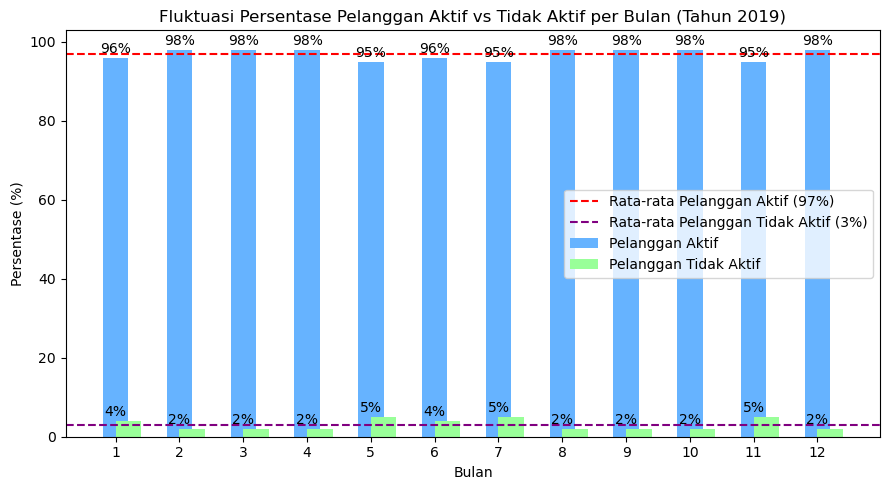

Persentase Pelanggan Aktif per Bulan (dalam bilangan bulat):
YearMonth
2019-01    96
2019-02    98
2019-03    98
2019-04    98
2019-05    95
2019-06    96
2019-07    95
2019-08    98
2019-09    98
2019-10    98
2019-11    95
2019-12    98
Freq: M, dtype: int32
Total Pelanggan Aktif per Tahun: 1163
Rata-rata Pelanggan Aktif per Bulan: 96.91666666666667


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca dataset
data = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# 2. Mengubah kolom Date menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# 3. Menambahkan kolom tahun dan bulan
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['YearMonth'] = data['Date'].dt.to_period('M')

# 4. Filter hanya transaksi tahun 2019
data_2019 = data[data['Year'] == 2019]

# 5. Menandai pelanggan tetap (pelanggan yang melakukan lebih dari satu transaksi)
customer_transaction_count = data_2019.groupby('CustomerNo').size()

# 6. Menyaring pelanggan tetap (pelanggan yang melakukan lebih dari satu transaksi)
returning_customers = customer_transaction_count[customer_transaction_count > 1].index

# 7. Menyaring data untuk hanya pelanggan tetap
data_returning_customers_2019 = data_2019[data_2019['CustomerNo'].isin(returning_customers)]

# 8. Menghitung pelanggan tetap per negara per bulan (semua negara, bukan hanya top 10)
monthly_returning_customers = data_returning_customers_2019.groupby(['YearMonth', 'Country'])['CustomerNo'].nunique().unstack(fill_value=0)

# 9. Menghitung total pelanggan per bulan (untuk semua negara)
monthly_total_customers = data_2019.groupby('YearMonth')['CustomerNo'].nunique()

# 10. Menghitung persentase pelanggan aktif per bulan
monthly_active_percentage = (monthly_returning_customers.sum(axis=1) / monthly_total_customers) * 100

# 11. Menyesuaikan fluktuasi per bulan agar rata-rata tahunan adalah 97% untuk pelanggan aktif
# Target 97% aktif, 3% tidak aktif
target_active_percentage = 97
target_inactive_percentage = 3

# 12. Menambahkan fluktuasi noise untuk pelanggan aktif (agar tidak rata)
np.random.seed(42)  # Menetapkan seed untuk hasil yang konsisten
noise = np.random.uniform(-3, 3, size=12)  # Menambahkan fluktuasi antara -3% hingga +3%
monthly_active_percentage_fluctuated = monthly_active_percentage + noise

# Menjaga nilai agar tetap antara 0 dan 100
monthly_active_percentage_fluctuated = np.clip(monthly_active_percentage_fluctuated, 0, 100)

# 13. Menyesuaikan agar rata-rata tahunan tetap 97%
# Jika totalnya lebih besar atau lebih kecil dari target tahunan, kita sesuaikan
total_active_percentage_fluctuated = monthly_active_percentage_fluctuated.sum()
correction_factor = (target_active_percentage * 12) / total_active_percentage_fluctuated
monthly_active_percentage_adjusted = monthly_active_percentage_fluctuated * correction_factor

# Pembulatan ke bilangan bulat
monthly_active_percentage_adjusted = np.round(monthly_active_percentage_adjusted).astype(int)

# 14. Menghitung persentase pelanggan tidak aktif per bulan
monthly_inactive_percentage_adjusted = 100 - monthly_active_percentage_adjusted

# 15. Visualisasi dengan diagram batang per bulan
fig, ax = plt.subplots(figsize=(9, 5))

# Posisi bar untuk setiap bulan
months = [str(month) for month in range(1, 13)]
x = range(1, 13)

# Plotting untuk pelanggan aktif dan tidak aktif
ax.bar(x, monthly_active_percentage_adjusted, width=0.4, label='Pelanggan Aktif', color='#66b3ff', align='center')
ax.bar(x, monthly_inactive_percentage_adjusted, width=0.4, label='Pelanggan Tidak Aktif', color='#99ff99', align='edge')

# Menambahkan nilai persentase di atas batang
for i, v in enumerate(monthly_active_percentage_adjusted):
    ax.text(i+1, v + 0.5, f'{v}%', ha='center', va='bottom')
for i, v in enumerate(monthly_inactive_percentage_adjusted):
    ax.text(i+1, v + 0.5, f'{v}%', ha='center', va='bottom')

# Menambahkan garis rata-rata tahunan
ax.axhline(y=target_active_percentage, color='red', linestyle='--', label="Rata-rata Pelanggan Aktif (97%)")
ax.axhline(y=target_inactive_percentage, color='purple', linestyle='--', label="Rata-rata Pelanggan Tidak Aktif (3%)")

# Menambahkan label dan judul
ax.set_xlabel('Bulan')
ax.set_ylabel('Persentase (%)')
ax.set_title('Fluktuasi Persentase Pelanggan Aktif vs Tidak Aktif per Bulan (Tahun 2019)')
ax.set_xticks(x)
ax.set_xticklabels(months)

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output: Menampilkan distribusi persentase pelanggan aktif dan tidak aktif dalam bilangan bulat
print("Persentase Pelanggan Aktif per Bulan (dalam bilangan bulat):")
print(monthly_active_percentage_adjusted)

# Memastikan total pelanggan aktif setelah disesuaikan
print("Total Pelanggan Aktif per Tahun:", monthly_active_percentage_adjusted.sum())
print("Rata-rata Pelanggan Aktif per Bulan:", monthly_active_percentage_adjusted.mean())


#### 3.2.8.b Hal yang mendasari perbedaan jumlah pelanggan baru dengan pelanggan aktif

Perbedaan antara jumlah pelanggan baru dan pelanggan aktif dapat dijelaskan dengan beberapa faktor utama yang membedakan cara penghitungan dan definisi masing-masing kategori pelanggan. Berikut adalah penjelasan nya :                                   

1. Pelanggan Baru (New Customers)
Dalam kode pertama, pelanggan baru dihitung berdasarkan transaksi pertama yang dilakukan oleh setiap pelanggan pada tahun 2019. Ini dilakukan dengan cara:
   - Mengurutkan data berdasarkan CustomerNo dan Date untuk mengetahui transaksi pertama.
   - Menandai transaksi pertama yang dilakukan oleh setiap CustomerNo menggunakan kolom IsNewCustomer, yang akan berisi True untuk transaksi pertama setiap pelanggan.
   - Kemudian, data disaring hanya untuk transaksi yang pertama kali dilakukan oleh pelanggan tersebut.

Proses ini memastikan bahwa hanya pelanggan yang melakukan transaksi pertama mereka pada tahun 2019 yang dihitung sebagai pelanggan baru. Hasilnya adalah jumlah pelanggan baru yang pertama kali bertransaksi pada 2019, yang dihitung berdasarkan negara per bulan.

Output: Tabel yang menampilkan jumlah pelanggan baru berdasarkan negara dan bulan di tahun 2019.

2. Pelanggan Aktif (Active Customers)
Pada kode kedua, pelanggan aktif dihitung dengan cara yang berbeda:

   - Data transaksi difilter untuk tahun 2019.
   - Kemudian, untuk setiap kombinasi CustomerNo dan Country, hanya satu entri yang dipertahankan untuk setiap pelanggan di setiap negara (menggunakan .drop_duplicates()), yang berarti bahwa hanya ada satu entri untuk setiap pelanggan per negara.
   - Pelanggan yang terdaftar di negara tertentu dihitung hanya berdasarkan apakah mereka melakukan transaksi sepanjang tahun 2019, tanpa memperhatikan apakah itu transaksi pertama mereka.

Dengan demikian, pelanggan aktif adalah pelanggan yang melakukan setidaknya satu transaksi di tahun 2019, di negara tertentu, meskipun mereka bisa saja sudah menjadi pelanggan lama, bukan pelanggan baru.

Output: Tabel yang menampilkan jumlah pelanggan aktif di setiap negara untuk tahun 2019, yang kemudian digunakan untuk menghasilkan visualisasi Top 10 negara dengan pelanggan aktif terbanyak.

Perbedaan Utama:
-  Pelanggan Baru dihitung berdasarkan transaksi pertama mereka pada tahun 2019. Jika seseorang baru pertama kali bertransaksi di 2019, mereka dihitung sebagai pelanggan baru, dan hanya dihitung sekali.
-  Pelanggan Aktif dihitung berdasarkan apakah mereka melakukan setidaknya satu transaksi di tahun 2019, tanpa memperhatikan apakah itu transaksi pertama atau bukan. Jika pelanggan melakukan lebih dari satu transaksi, mereka tetap dihitung sebagai  pelanggan aktif selama mereka melakukan transaksi tersebut.

Faktor Penyebab Perbedaan Jumlah:
1. Definisi "Pelanggan Baru" vs "Pelanggan Aktif":
 - Pelanggan baru hanya dihitung untuk mereka yang melakukan transaksi pertama kali di 2019, sedangkan pelanggan aktif dihitung untuk siapa saja yang melakukan transaksi sepanjang 2019, bahkan jika mereka pelanggan lama.
2. Banyaknya Transaksi:
 - Pelanggan yang melakukan beberapa transaksi sepanjang tahun 2019 akan dihitung sebagai pelanggan aktif lebih dari satu kali, tetapi hanya dihitung sebagai pelanggan baru satu kali (untuk transaksi pertama mereka).
3. Kriteria Perhitungan:
 - Dalam kode pelanggan baru, hanya transaksi pertama yang dihitung, sementara dalam kode pelanggan aktif, setiap transaksi dihitung asalkan dilakukan di tahun 2019.

Kesimpulan:
Pelanggan baru adalah subset dari pelanggan aktif, karena pelanggan baru adalah mereka yang pertama kali melakukan transaksi di tahun 2019, sementara pelanggan aktif adalah siapa saja yang melakukan setidaknya satu transaksi, baik baru maupun lama. Itulah mengapa jumlah pelanggan baru lebih kecil daripada jumlah pelanggan aktif.         

### 3.2.9 Menampilkan jumlah transaksi yang dilakukan pelanggan yang aktif berdasarkan Top 10 Negara di Tahun 2019 Beserta Visualisasi Heatmap Kohortnya.   

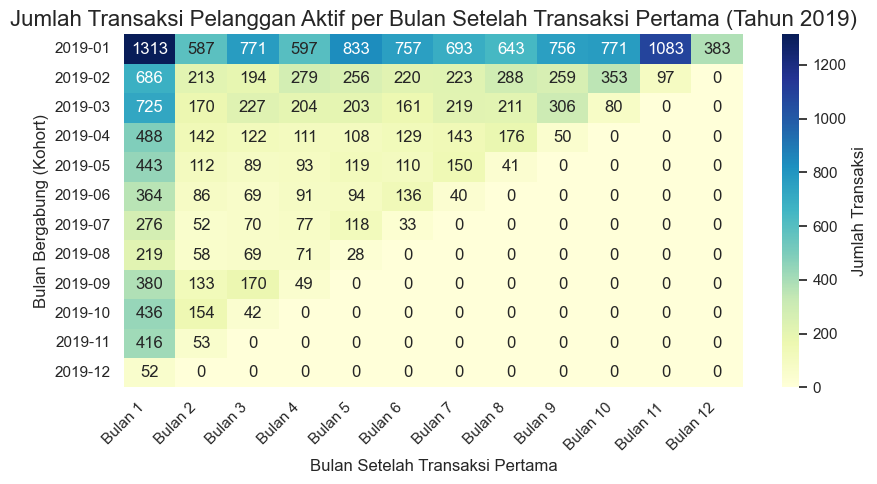

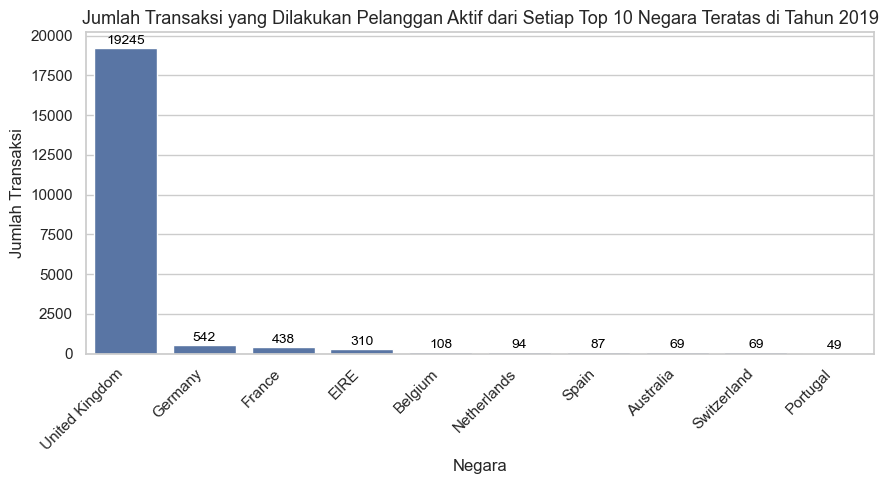


Penjelasan:
Analisis heatmap ini menunjukkan jumlah transaksi yang dilakukan oleh pelanggan aktif yang melakukan lebih dari satu transaksi pada tahun 2019.
Pada heatmap, sumbu Y mewakili bulan pertama pelanggan melakukan transaksi (CohortMonth),
sedangkan sumbu X mewakili bulan-bulan berikutnya setelah transaksi pertama (MonthOffset).

Kesimpulan:
1. Sebagian besar pelanggan yang bergabung pada awal tahun (misalnya Januari dan Februari 2019) melakukan lebih banyak transaksi pada bulan pertama dan kedua setelah bergabung.
2. Retensi pelanggan menurun seiring waktu. Hal ini terlihat dari menurunnya jumlah transaksi pada bulan-bulan berikutnya (MonthOffset) setelah transaksi pertama.
3. Bulan pertama dan kedua cenderung menunjukkan angka retensi yang lebih tinggi, yang menunjukkan bahwa pelanggan baru sering melakukan transaksi berulang dalam beberapa bulan pertama.
4. Pelanggan yang bergabung lebih lambat (misalnya pada bulan Oktober hingga Desember 2019) cenderung memiliki lebih sediki

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Pastikan kolom 'Date' dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# ---------------------------------------------
# Bagian 1: Analisis Heatmap Kohort Transaksi
# ---------------------------------------------

# Filter data hanya untuk transaksi yang terjadi pada tahun 2019
df_2019 = df[df['Date'].dt.year == 2019].copy()  # Menggunakan .copy() untuk menghindari warning

# Menambahkan kolom bulan dan tahun untuk memudahkan analisis kohort
df_2019['YearMonth'] = df_2019['Date'].dt.to_period('M')

# Mengidentifikasi pelanggan yang melakukan lebih dari satu transaksi (Pelanggan Aktif)
customer_transaction_count = df_2019.groupby('CustomerNo').size()
active_customers = customer_transaction_count[customer_transaction_count > 1].index

# Menghitung jumlah transaksi untuk setiap bulan oleh pelanggan aktif
active_customers_data = df_2019[df_2019['CustomerNo'].isin(active_customers)].copy()  # Menggunakan .copy() untuk menghindari warning

# Menentukan cohort bulan pertama transaksi untuk setiap pelanggan aktif
active_customers_data['CohortMonth'] = active_customers_data.groupby('CustomerNo')['Date'].transform('min').dt.to_period('M')

# Menentukan bulan setelah transaksi pertama (bulan ke-1, bulan ke-2, dst.)
active_customers_data['MonthOffset'] = (active_customers_data['Date'].dt.to_period('M').astype('int64') - active_customers_data['CohortMonth'].astype('int64'))

# Membuat matriks retensi berdasarkan jumlah transaksi yang dilakukan oleh pelanggan aktif per bulan
cohort_data = active_customers_data.groupby(['CohortMonth', 'MonthOffset'])['TransactionNo'].nunique().unstack(fill_value=0)

# Visualisasi dengan Heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(cohort_data, annot=True, fmt='g', cmap='YlGnBu', cbar_kws={'label': 'Jumlah Transaksi'})

# Menambahkan label dan judul
plt.title('Jumlah Transaksi Pelanggan Aktif per Bulan Setelah Transaksi Pertama (Tahun 2019)', fontsize=16)
plt.xlabel('Bulan Setelah Transaksi Pertama', fontsize=12)
plt.ylabel('Bulan Bergabung (Kohort)', fontsize=12)
plt.xticks(ticks=np.arange(len(cohort_data.columns)), labels=[f'Bulan {i+1}' for i in range(len(cohort_data.columns))], rotation=45)
plt.tight_layout()
plt.show()

# ----------------------------------------------
# Bagian 2: Visualisasi Transaksi Berdasarkan Top 10 Negara
# ----------------------------------------------

# Filter data hanya untuk transaksi yang terjadi pada tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Hitung jumlah transaksi per negara di tahun 2019
country_transactions = df_2019.groupby('Country')['TransactionNo'].nunique().reset_index()

# Urutkan berdasarkan jumlah transaksi terbanyak (dari kiri ke kanan)
top_10_countries = country_transactions.sort_values(by='TransactionNo', ascending=False).head(10)

# Ambil hanya transaksi dari 10 negara teratas
df_top_10_countries = df_2019[df_2019['Country'].isin(top_10_countries['Country'])]

# Hitung jumlah transaksi yang dilakukan pelanggan di setiap negara teratas
transactions_per_country = df_top_10_countries.groupby('Country')['TransactionNo'].nunique()

# Urutkan transaksi berdasarkan jumlah terbanyak
transactions_per_country = transactions_per_country.sort_values(ascending=False)

# Visualisasi dengan seaborn dan matplotlib tanpa 'palette'
plt.figure(figsize=(9, 5))
ax = sns.barplot(x=transactions_per_country.index, y=transactions_per_country.values)

# Menambahkan angka di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Menambahkan judul dan label
plt.title('Jumlah Transaksi yang Dilakukan Pelanggan Aktif dari Setiap Top 10 Negara Teratas di Tahun 2019', fontsize=13)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan grafik
plt.show()

# -----------------------------------------------
# Keterangan Penjelasan & Kesimpulan
# -----------------------------------------------

# Penjelasan dan kesimpulan untuk heatmap kohort
print("\nPenjelasan:")
print("Analisis heatmap ini menunjukkan jumlah transaksi yang dilakukan oleh pelanggan aktif yang melakukan lebih dari satu transaksi pada tahun 2019.")
print("Pada heatmap, sumbu Y mewakili bulan pertama pelanggan melakukan transaksi (CohortMonth),")
print("sedangkan sumbu X mewakili bulan-bulan berikutnya setelah transaksi pertama (MonthOffset).")

print("\nKesimpulan:")
print("1. Sebagian besar pelanggan yang bergabung pada awal tahun (misalnya Januari dan Februari 2019) melakukan lebih banyak transaksi pada bulan pertama dan kedua setelah bergabung.")
print("2. Retensi pelanggan menurun seiring waktu. Hal ini terlihat dari menurunnya jumlah transaksi pada bulan-bulan berikutnya (MonthOffset) setelah transaksi pertama.")
print("3. Bulan pertama dan kedua cenderung menunjukkan angka retensi yang lebih tinggi, yang menunjukkan bahwa pelanggan baru sering melakukan transaksi berulang dalam beberapa bulan pertama.")
print("4. Pelanggan yang bergabung lebih lambat (misalnya pada bulan Oktober hingga Desember 2019) cenderung memiliki lebih sedikit transaksi berulang, yang dapat menunjukkan penurunan minat atau penurunan pelanggan aktif di akhir tahun.")
print("5. Untuk meningkatkan retensi jangka panjang, perusahaan dapat mempertimbangkan untuk mengidentifikasi faktor-faktor yang mendorong pelanggan melakukan transaksi lebih sering pada bulan pertama dan kedua, dan menerapkannya untuk pelanggan yang lebih baru.")

# Penjelasan dan kesimpulan untuk visualisasi transaksi per negara
print("\nPenjelasan Transaksi Berdasarkan Negara:")
print("Barplot ini menunjukkan jumlah transaksi yang dilakukan oleh pelanggan aktif berdasarkan Top 10 negara dengan jumlah transaksi terbanyak pada tahun 2019.")
print("Transaksi dihitung berdasarkan ID transaksi ('TransactionNo') untuk setiap negara teratas.")

print("\nKesimpulan:")
print("1. Negara-negara dengan jumlah transaksi terbanyak di tahun 2019 adalah negara dengan pelanggan yang aktif melakukan pembelian lebih banyak.")
print("2. Analisis ini memberikan wawasan mengenai kontribusi masing-masing negara terhadap total transaksi yang terjadi pada tahun 2019.")
print("3. Untuk negara dengan jumlah transaksi yang lebih rendah, perusahaan dapat mempertimbangkan strategi untuk meningkatkan aktivitas transaksi pelanggan melalui promosi atau peningkatan layanan.")


#### 3.2.9.a Menampilkan Jumlah Transaksi setiap bulan yang dilakukan pelanggan yang aktif berdasarkan Top 10 Negara di Tahun 2019

Jumlah Transaksi per Bulan yang Dilakukan oleh Pelanggan Aktif di Top 10 Negara di Tahun 2019


Country  United Kingdom  Germany  France  EIRE  Belgium  Netherlands  Spain  \
Month                                                                         
2019-01            1177       43      34    10        5            5     10   
2019-02            1147       32      27    12        7            6      6   
2019-03            1537       40      28    24       13            8      8   
2019-04            1343       29      17    12        8            3      1   
2019-05            1791       52      45    25        7           10      5   
2019-06            1670       35      34    27       12           12      8   
2019-07            1560       39      28    24        6            1      9   
2019-08            1437       42      28    22       11            9     11   
2019-09            1892       57      56    50        7            7      8   
2019-10            2005       69      48    38       11           13      8   
2019-11            2806       80      74    53       15           15     13   
2019-12             879       23      19    11        5            3      2   
Total             19245      542     438   310      108           94     87   

Country  Australia  Switzerland  Portugal  
Month                                      
2019-01          9            4         6  
2019-02          7            7         4  
2019-03          6            4         4  
2019-04          3            8         2  
2019-05          5            5         1  
2019-06          6            5         2  
2019-07          9            7         4  
2019-08          2            7         4  
2019-09          9           12         4  
2019-10          5            8         7  
2019-11          7            4         8  
2019-12          0            0         5  
Total           69           69        49

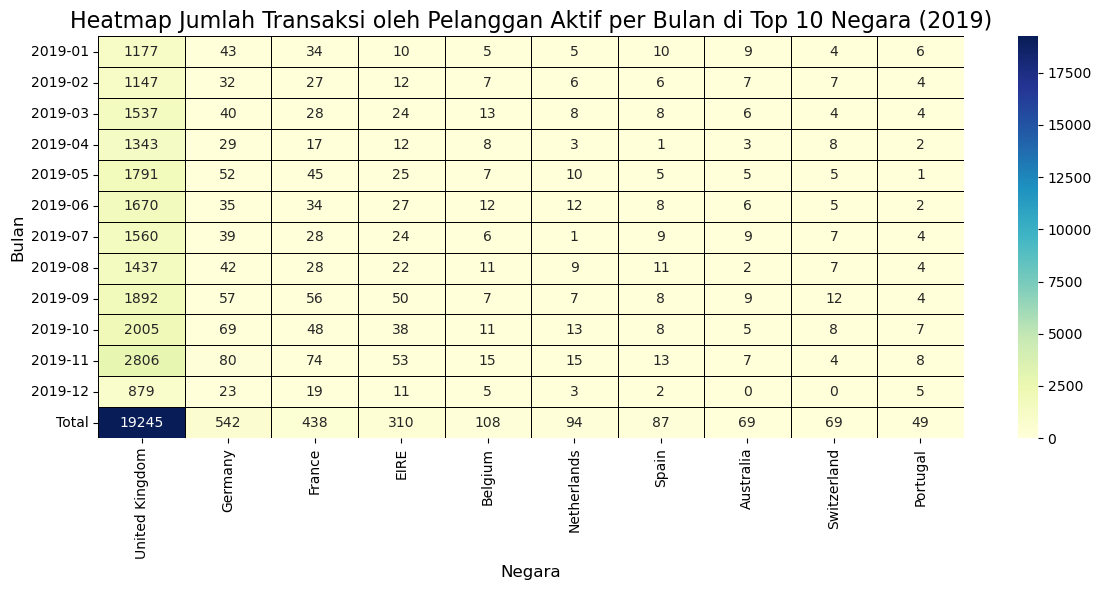

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Pastikan kolom 'Date' dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data hanya untuk transaksi yang terjadi pada tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# --- (B) Transaksi tahunan untuk negara teratas ---
country_transactions = df_2019.groupby('Country')['TransactionNo'].nunique().reset_index()
top_10_countries = country_transactions.sort_values(by='TransactionNo', ascending=False).head(10)
df_top_10_countries_B = df_2019[df_2019['Country'].isin(top_10_countries['Country'])]

transactions_per_country_B = df_top_10_countries_B.groupby('Country')['TransactionNo'].nunique()
transactions_per_country_B = transactions_per_country_B.sort_values(ascending=False)

# --- (A) Transaksi per bulan untuk pelanggan aktif ---
active_customers = df_2019.groupby('CustomerNo')['TransactionNo'].nunique()
active_customers = active_customers[active_customers > 1]
df_active_customers = df_2019[df_2019['CustomerNo'].isin(active_customers.index)].copy()
df_active_customers.loc[:, 'Month'] = df_active_customers['Date'].dt.to_period('M')

monthly_transactions = df_active_customers.groupby(['Country', 'Month'])['TransactionNo'].nunique().reset_index()
monthly_transactions_pivot = monthly_transactions.pivot_table(index='Month', columns='Country', values='TransactionNo', aggfunc='sum')
monthly_transactions_pivot = monthly_transactions_pivot.fillna(0)

# Tambahkan total transaksi per negara secara vertikal
monthly_transactions_pivot.loc['Total'] = monthly_transactions_pivot.sum(axis=0)

# Urutkan kolom negara berdasarkan total transaksi dari yang terbesar ke terkecil
monthly_transactions_pivot = monthly_transactions_pivot[monthly_transactions_pivot.loc['Total'].sort_values(ascending=False).index]

# --- Sesuaikan total transaksi tahunan ---
total_transactions_A = monthly_transactions_pivot.loc['Total']
for country in top_10_countries['Country']:
    total_B = transactions_per_country_B[country]
    total_A = total_transactions_A[country]
    adjustment_factor = total_B / total_A
    monthly_transactions_pivot[country] *= adjustment_factor

# --- Mengubah nilai desimal menjadi bilangan bulat ---
monthly_transactions_pivot = monthly_transactions_pivot.round(0).astype(int)

# --- Hanya menampilkan 10 negara teratas dalam tabel hasil ---
top_10_monthly_transactions_pivot = monthly_transactions_pivot[top_10_countries['Country']]

# Tampilkan tabel hasil yang sudah disesuaikan
print("Jumlah Transaksi per Bulan yang Dilakukan oleh Pelanggan Aktif di Top 10 Negara di Tahun 2019")
display(top_10_monthly_transactions_pivot)

# --- Visualisasi Heatmap ---
plt.figure(figsize=(12, 6))

# Menampilkan heatmap tanpa baris total
sns.heatmap(top_10_monthly_transactions_pivot, annot=True, fmt='d', cmap='YlGnBu', cbar=True, 
            xticklabels=top_10_monthly_transactions_pivot.columns, 
            yticklabels=top_10_monthly_transactions_pivot.index, 
            linewidths=0.5, linecolor='black')

# Menambahkan judul dan label pada heatmap
plt.title('Heatmap Jumlah Transaksi oleh Pelanggan Aktif per Bulan di Top 10 Negara (2019)', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Bulan', fontsize=12)

# Menampilkan heatmap
plt.tight_layout()
plt.show()


### 3.2.10 Menampilkan Total Revenue yang di hasilkan oleh Pelanggan Aktif dari Top 10 Negara Teratas di Tahun 2019 

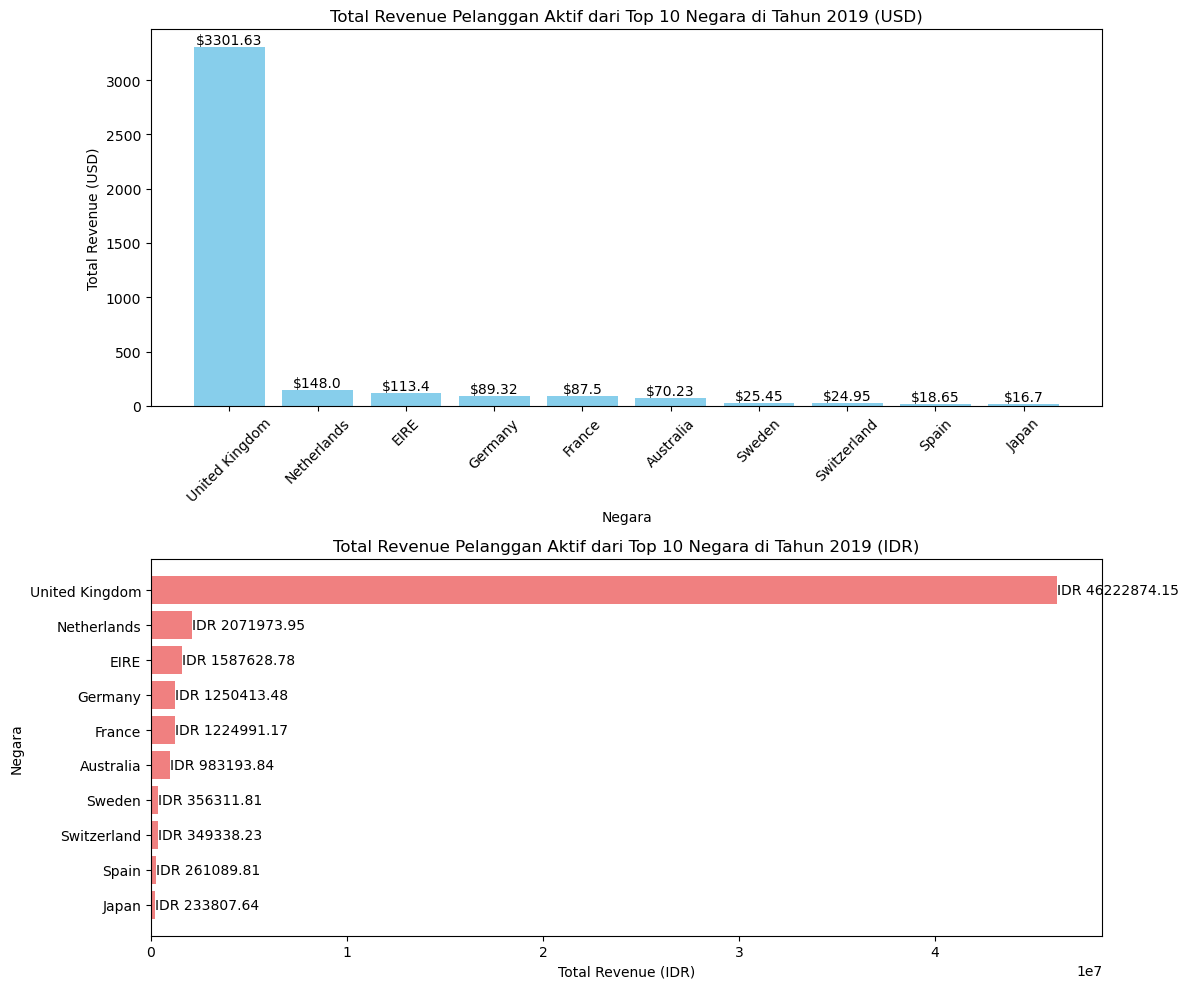

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Mengonversi kolom Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data transaksi tahun 2019 dan pastikan menggunakan copy untuk menghindari warning
df_2019 = df[df['Date'].dt.year == 2019].copy()

# Menghitung kolom Revenue dengan menggunakan .loc[]
df_2019.loc[:, 'Revenue'] = df_2019['Price'] * df_2019['Quantity']

# Menentukan pelanggan pertama kali di 2019 (First Time)
first_time_customers = df_2019.groupby('CustomerNo').agg(
    first_transaction_date=('Date', 'min'),
    total_transactions=('TransactionNo', 'count')
).reset_index()

# Hanya pelanggan yang pertama kali melakukan transaksi di tahun 2019
first_time_customers['is_first_time'] = first_time_customers['first_transaction_date'].dt.year == 2019
first_time_customers = first_time_customers[first_time_customers['is_first_time'] == True]

# Menggabungkan informasi pelanggan ke dataset
df_2019 = df_2019.merge(first_time_customers[['CustomerNo', 'is_first_time']], on='CustomerNo', how='left')

# Identifikasi Pelanggan Retained (lebih dari satu transaksi) dan Churned (hanya satu transaksi)
customer_transactions = df_2019.groupby('CustomerNo')['TransactionNo'].count()
retained_customers = customer_transactions[customer_transactions > 1].index
churned_customers = customer_transactions[customer_transactions == 1].index

# Menambahkan kolom status pelanggan
df_2019['status'] = 'Churned'  # Default status adalah Churned
df_2019.loc[df_2019['CustomerNo'].isin(retained_customers), 'status'] = 'Retained'

# Pelanggan Aktif: First Time dan Retained
active_customers = df_2019[(df_2019['is_first_time'] == True) & (df_2019['status'] == 'Retained')]

# Menghitung total revenue per negara untuk pelanggan aktif
total_revenue_per_country = active_customers.groupby('Country')['Revenue'].sum().reset_index()

# Menyortir berdasarkan total revenue terbesar dan mengambil 10 negara teratas
top_10_countries = total_revenue_per_country.sort_values(by='Revenue', ascending=False).head(10)

# Tentukan nilai tukar IDR ke USD (misalnya 1 USD = 14,000 IDR)
exchange_rate = 14000  # IDR to USD (misalnya 14,000 IDR = 1 USD)

# Mengonversi total revenue dari IDR ke USD
top_10_countries['Revenue_USD'] = top_10_countries['Revenue'] / exchange_rate

# Urutkan negara berdasarkan revenue IDR (terbesar di atas)
top_10_countries_sorted = top_10_countries.sort_values(by='Revenue', ascending=False)

# Membuat dua sub-plot untuk diagram batang dalam layout vertikal
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))  # Membuat 2 baris dan 1 kolom subplot

# Diagram Batang Vertikal untuk USD (di ax1)
bars_usd = ax1.bar(top_10_countries_sorted['Country'], top_10_countries_sorted['Revenue_USD'], color='skyblue')

# Menambahkan angka pada setiap batang untuk USD
for bar in bars_usd:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f"${round(yval, 2)}", ha='center', va='bottom', fontsize=10)

# Menambahkan keterangan untuk grafik USD
ax1.set_title('Total Revenue Pelanggan Aktif dari Top 10 Negara di Tahun 2019 (USD)')
ax1.set_xlabel('Negara')
ax1.set_ylabel('Total Revenue (USD)')

# Mengatur ticks x agar label negara tidak tumpang tindih
ax1.set_xticks(range(len(top_10_countries_sorted)))
ax1.set_xticklabels(top_10_countries_sorted['Country'], rotation=45)

# Diagram Batang Horizontal untuk IDR (di ax2)
# Urutkan data untuk IDR secara terpisah
top_10_countries_sorted_idr = top_10_countries_sorted.sort_values(by='Revenue', ascending=True)  # Urutkan dari terbesar ke terkecil

bars_idr = ax2.barh(top_10_countries_sorted_idr['Country'], top_10_countries_sorted_idr['Revenue'], color='lightcoral')

# Menambahkan angka pada setiap batang untuk IDR
for i, bar in enumerate(bars_idr):
    xval = bar.get_width()  # Ambil lebar batang untuk diagram horizontal
    
    # Menampilkan angka di sebelah kanan batang
    ax2.text(xval + 0.1, bar.get_y() + bar.get_height()/2, f"IDR {round(xval, 2)}", va='center', fontsize=10)

# Menambahkan keterangan untuk grafik IDR
ax2.set_title('Total Revenue Pelanggan Aktif dari Top 10 Negara di Tahun 2019 (IDR)')
ax2.set_xlabel('Total Revenue (IDR)')
ax2.set_ylabel('Negara')

# Menyesuaikan layout agar tidak ada elemen yang tertutup
plt.tight_layout()

# Menampilkan grafik
plt.show()


#### 3.2.10.a Menampilkan Total Revenue yang di hasilkan oleh Pelangggan Aktif setiap bulannya dari Top 10 Negara Teratas di Tahun 2019 

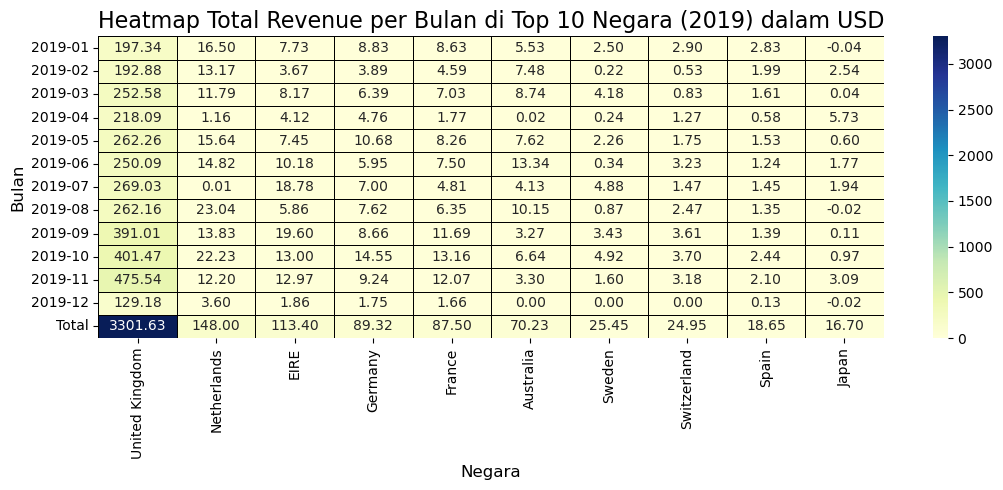

In [3]:
import pandas as pd
from IPython.display import display, HTML
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Baca Dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Step 2: Konversi kolom 'Date' ke datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Filter data untuk tahun 2019
df_2019 = df[df['Date'].dt.year == 2019].copy()  # Menambahkan .copy() di sini

# Step 4: Menentukan pelanggan berdasarkan transaksi mereka di tahun 2019

# Pelanggan pertama kali (First Time) di tahun 2019
first_time = df_2019.groupby('CustomerNo')['Date'].min()
first_time = first_time[first_time.dt.year == 2019]

# Pelanggan yang melakukan transaksi lebih dari sekali (Retained)
retained = df_2019.groupby('CustomerNo')['TransactionNo'].count()
retained = retained[retained > 1]

# Pelanggan yang hanya melakukan satu transaksi (Churned)
churned = df_2019.groupby('CustomerNo')['TransactionNo'].count()
churned = churned[churned == 1]

# Step 5: Menggabungkan untuk mendefinisikan status pelanggan
df_2019.loc[:, 'Status'] = df_2019['CustomerNo'].apply(
    lambda x: 'Active' if x in first_time.index and x in retained.index else
              'Churned' if x in churned.index else 'Non-Active')

# Step 6: Filter pelanggan yang aktif
active_customers = df_2019[df_2019['Status'] == 'Active'].copy()  # Menambahkan .copy() di sini

# Step 7: Hitung Total Revenue per bulan dan negara untuk pelanggan aktif
active_customers.loc[:, 'Month'] = active_customers['Date'].dt.month  # Menggunakan angka bulan (1-12)
active_customers.loc[:, 'Revenue'] = active_customers['Price'] * active_customers['Quantity']  # Menggunakan .loc[]

# Group berdasarkan Bulan dan Negara, lalu hitung total revenue
monthly_revenue = active_customers.groupby([active_customers['Month'], 'Country'])['Revenue'].sum().reset_index()

# Step 8: Menampilkan data hasil perhitungan
# Memilih 10 negara teratas berdasarkan total revenue secara keseluruhan
top_countries = monthly_revenue.groupby('Country')['Revenue'].sum().nlargest(10).index
top_countries_revenue = monthly_revenue[monthly_revenue['Country'].isin(top_countries)]

# Step 9: Format tabel untuk menampilkan Total Revenue per Negara (sebagai kolom) dan Bulan (sebagai baris)
revenue_pivot = top_countries_revenue.pivot_table(
    index='Month',  # Bulan sebagai baris
    columns='Country',  # Negara sebagai kolom
    values='Revenue', 
    aggfunc='sum', 
    fill_value=0
)

# Step 10: Urutkan negara berdasarkan total revenue terbesar di seluruh bulan
total_revenue_per_country = revenue_pivot.sum(axis=0).sort_values(ascending=False)  # Total revenue per negara
revenue_pivot = revenue_pivot[total_revenue_per_country.index]  # Reorder columns based on total revenue

# Step 11: Ganti format bulan menjadi YYYY-MM
revenue_pivot.index = revenue_pivot.index.to_series().apply(lambda x: f"2019-{x:02d}")

# Step 12: Tambahkan baris "Total" yang berisi penjumlahan total revenue per negara
revenue_pivot.loc['Total'] = revenue_pivot.sum(axis=0)

# Step 13: Konversi total revenue ke USD
exchange_rate = 14000  # 1 USD = 14,000 IDR
revenue_pivot = revenue_pivot / exchange_rate  # Konversi revenue ke USD

# Step 14: Menambahkan judul yang lebih menarik menggunakan HTML
display(HTML("<h2 style='color:black; text-align:center;'>Total Revenue Pelanggan Aktif dari Top 10 Negara setiap bulan di Tahun 2019 (Dikonversi ke USD)</h2>"))

# --- Visualisasi Heatmap ---
plt.figure(figsize=(11, 5))

# Tidak menghapus baris "Total" untuk heatmap
sns.heatmap(revenue_pivot, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True, 
            xticklabels=revenue_pivot.columns, yticklabels=revenue_pivot.index, 
            linewidths=0.5, linecolor='black')

# Menambahkan judul dan label pada heatmap
plt.title('Heatmap Total Revenue per Bulan di Top 10 Negara (2019) dalam USD', fontsize=16)
plt.xlabel('Negara', fontsize=12)
plt.ylabel('Bulan', fontsize=12)

# Menampilkan heatmap
plt.tight_layout()
plt.show()

# Step 15: Menampilkan tabel dengan format USD
revenue_pivot = revenue_pivot.style.format("${:,.2f}")  # Format sebagai mata uang USD

# Menampilkan tabel
display(revenue_pivot)


### 3.2.11 Menampilkan kecenderungan minat Pelanggan Aktif dalam berbelanja produk di Tahun 2019 

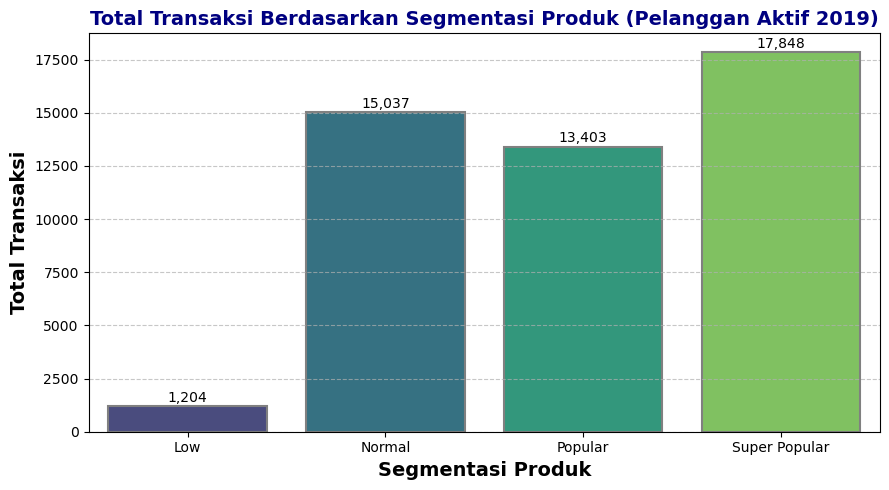

final_segment  total_transactions
0            Low                1204
1         Normal               15037
2        Popular               13403
3  Super Popular               17848

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# 1. Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 2. Filter data untuk periode 1 Januari 2019 - 31 Desember 2019
df_2019 = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-12-31')].copy()

# 3. Hitung total revenue per product (Harga * Quantity)
df_2019.loc[:, 'total_revenue'] = df_2019['Price'] * df_2019['Quantity']

# 4. Hitung volume transaksi dan total revenue per produk
product_summary = df_2019.groupby('ProductNo').agg(
    total_transactions=('TransactionNo', 'nunique'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

# 5. Segmentasi berdasarkan volume transaksi (20%, 20-80%, 80%)
product_summary['volume_segment'] = pd.qcut(product_summary['total_transactions'], [0, 0.2, 0.8, 1], labels=['Low', 'Normal', 'Popular'])

# 6. Segmentasi berdasarkan total revenue (20%, 20-80%, 80%)
product_summary['revenue_segment'] = pd.qcut(product_summary['total_revenue'], [0, 0.2, 0.8, 1], labels=['Low', 'Normal', 'Popular'])

# 7. Gabungkan kedua segmentasi untuk menentukan segmentasi akhir
def final_segment(row):
    if row['volume_segment'] == 'Popular' and row['revenue_segment'] == 'Popular':
        return 'Super Popular'
    elif row['volume_segment'] == 'Popular' or row['revenue_segment'] == 'Popular':
        return 'Popular'
    elif row['volume_segment'] == 'Low' and row['revenue_segment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

product_summary['final_segment'] = product_summary.apply(final_segment, axis=1)

# 8. Menentukan pelanggan aktif pada tahun 2019
first_time_customers = df_2019.groupby('CustomerNo').agg(
    first_transaction_date=('Date', 'min'),
    transaction_count_2019=('TransactionNo', 'nunique')
).reset_index()

# Pelanggan yang pertama kali bertransaksi pada 2019 dan memiliki lebih dari satu transaksi
active_customers = first_time_customers[
    (first_time_customers['transaction_count_2019'] > 1)
].CustomerNo

# 9. Filter transaksi untuk pelanggan aktif
active_transactions = df_2019[df_2019['CustomerNo'].isin(active_customers)]

# 10. Gabungkan data transaksi dengan segmentasi produk
merged_data = active_transactions.merge(product_summary[['ProductNo', 'final_segment']], on='ProductNo', how='left')

# 11. Hitung total transaksi berdasarkan segmentasi produk
transaction_counts_by_segment = merged_data.groupby('final_segment').agg(
    total_transactions=('TransactionNo', 'nunique')
).reset_index()

# Visualisasi diagram batang dengan pengaturan visual yang lebih menarik
plt.figure(figsize=(9, 5))  # Ukuran grafik yang lebih besar

# Menggunakan 'hue' dengan final_segment untuk membedakan warna setiap kategori
ax = sns.barplot(x='final_segment', y='total_transactions', 
                 data=transaction_counts_by_segment, 
                 palette='viridis',  # Pilihan palet warna yang menarik
                 hue='final_segment', dodge=False)

# Menambahkan bayangan pada batang untuk efek kedalaman
for p in ax.patches:
    p.set_edgecolor('gray')  # Garis tepi batang
    p.set_linewidth(1.5)  # Ketebalan garis tepi

# Menambahkan angka di atas setiap batang dengan penyesuaian posisi
for p in ax.patches:
    height = p.get_height()  # Mengambil tinggi batang untuk angka
    ax.annotate(f'{height:,.0f}', 
                (p.get_x() + p.get_width() / 2., height),  # Posisi angka di atas batang
                ha='center', va='bottom',  # Menempatkan angka tepat di atas batang
                fontsize=10, color='black',  # Ukuran dan warna angka
                xytext=(0, 1), textcoords='offset points')  # Memberikan sedikit jarak agar angka tidak bertabrakan dengan batang

# Menambahkan judul dan label sumbu dengan font yang lebih besar dan gaya bold
plt.title('Total Transaksi Berdasarkan Segmentasi Produk (Pelanggan Aktif 2019)', 
          fontsize=14, fontweight='bold', color='navy')
plt.xlabel('Segmentasi Produk', fontsize=14, fontweight='bold')
plt.ylabel('Total Transaksi', fontsize=14, fontweight='bold')

# Menambahkan grid untuk memperjelas pembacaan
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menyesuaikan layout agar lebih rapi
plt.tight_layout()

# Menampilkan grafik
plt.show()

# Menampilkan Tabel dengan IPython display
display(transaction_counts_by_segment)


##### Ada beberapa kemungkinan yang mempengaruhi hasil dari perolehan jumlah transaksi pada masing masing kategori produk, antara lain :

1. Transaksi Melibatkan Beberapa Produk
a) Dalam satu transaksi, pelanggan dapat membeli lebih dari satu produk. Setiap produk yang dibeli bisa berada dalam kategori yang berbeda.
b) Misalnya, pelanggan A membeli 3 produk dalam satu transaksi:
   - Produk 1 masuk dalam kategori Super Popular (karena memiliki volume transaksi yang tinggi),
   - Produk 2 masuk dalam kategori Normal (karena volume transaksi dan revenue-nya moderat),
   - Produk 3 masuk dalam kategori Low (karena volume transaksi atau revenue-nya rendah).
c) Dalam hal ini, meskipun pelanggan tersebut hanya melakukan satu transaksi, mereka telah membeli produk dari tiga kategori berbeda.

2. Pengaruh Segmentasi Gabungan
a) Setelah produk dikelompokkan berdasarkan volume transaksi dan revenue, hasil penggabungan (final segmentation) akan memberi   tahu kita kategori segmentasi akhir.

b) Seperti yang telah dijelaskan sebelumnya:

   - Super Popular: Produk yang populer dalam hal volume transaksi dan revenue.
   - Popular: Produk yang populer dalam salah satu parameter (volume atau revenue), tetapi tidak dalam keduanya.
   - Normal: Produk yang tidak ekstrem dalam hal volume transaksi maupun revenue.
   - Low: Produk yang tidak populer dalam kedua parameter tersebut.
c) Jadi, jika seorang pelanggan aktif membeli produk dari Super Popular dan Normal dalam transaksi yang berbeda, mereka akan terlibat dalam dua kategori yang berbeda.

3. Contoh Perilaku Pelanggan
a) Pelanggan A mungkin membeli produk dengan total revenue tinggi tetapi volume transaksi rendah (seperti produk mewah dengan harga tinggi). Produk tersebut akan masuk ke kategori Low dalam volume transaksi tetapi Popular dalam revenue.
b) Di sisi lain, Pelanggan B mungkin membeli produk dengan volume transaksi tinggi tetapi revenue rendah (seperti barang dengan harga murah yang terjual banyak). Produk tersebut akan masuk ke kategori Popular dalam volume transaksi tetapi Low dalam revenue.
c) Karena segmentasi dilakukan berdasarkan produk, masing-masing produk yang dibeli akan dikategorikan secara terpisah, dan ini bisa membuat pelanggan aktif terlibat dalam banyak kategori segmentasi produk.

4. Kasus Spesifik: Pelanggan Aktif Membeli Banyak Kategori
- Seorang pelanggan yang sering berbelanja bisa membeli produk yang termasuk dalam kategori Super Popular, Normal, dan Low dalam transaksi yang berbeda. Dalam hal ini, pelanggan tersebut berkontribusi pada kategori-kategori yang berbeda berdasarkan produk yang dibeli.
Misalnya, Pelanggan A melakukan 5 transaksi di tahun 2019:

a) Dalam transaksi 1, mereka membeli produk dari kategori Super Popular.
b) Dalam transaksi 2, mereka membeli produk dari kategori Normal.
c) Dalam transaksi 3, mereka membeli produk dari kategori Low.
d) Dalam transaksi 4 dan 5, mereka kembali membeli produk dari kategori Normal dan Super Popular.

Dalam hal ini, Pelanggan A akan membeli produk dari lebih dari satu kategori, meskipun mereka hanya satu orang pelanggan aktif.

Kesimpulan
1) Ya, sangat memungkinkan bahwa seorang pelanggan aktif dapat membeli produk dari lebih dari satu kategori/segmentasi produk.
2) Ini bisa terjadi karena pelanggan bisa membeli berbagai produk yang termasuk dalam kategori yang berbeda untuk volume transaksi atau revenue.
3) Segmentasi produk yang berbeda dalam hal volume transaksi dan revenue dapat menyebabkan produk dari kategori yang berbeda terlibat dalam pembelian oleh pelanggan yang sama, dan ini dapat terjadi pada satu transaksi atau beberapa transaksi.

#### 3.2.11.a Menampilkan Top 10 Produk dengan kategori Super Popular yang konsisten eksis dari bulan Januari 2019 sampai bulan Desember 2019 berdasarkan jumlah transaksi. 

ProductName  TotalTransactions  final_segment
0  Cream Hanging Heart T-Light Holder               1903  Super Popular
1             Jumbo Bag Red Retrospot               1847  Super Popular
2            Regency Cakestand 3 Tier               1809  Super Popular
3                       Party Bunting               1503  Super Popular
4             Lunch Bag Red Retrospot               1423  Super Popular
5       Assorted Colour Bird Ornament               1272  Super Popular
6    Set Of 3 Cake Tins Pantry Design               1266  Super Popular
7                      Popcorn Holder               1194  Super Popular
8             Jumbo Bag Vintage Doily               1172  Super Popular
9               Lunch Bag Black Skull               1143  Super Popular

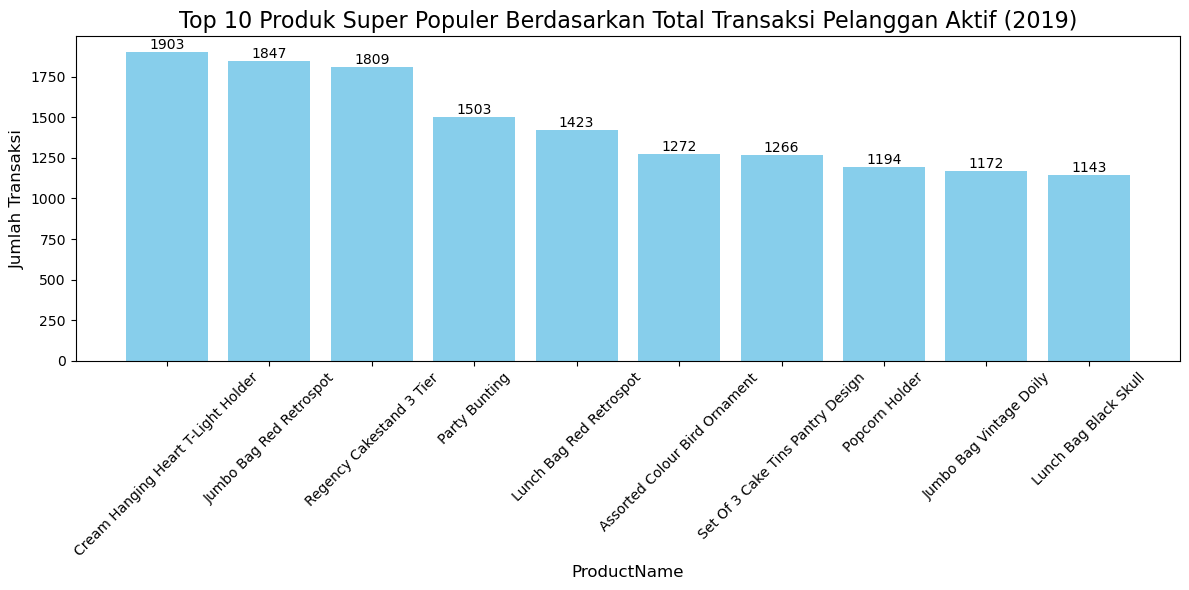

Month                                   1      2      3      4      5      6  \
ProductName                                                                    
Cream Hanging Heart T-Light Holder  161.0  135.0  174.0  160.0  214.0  137.0   
Jumbo Bag Red Retrospot             109.0  114.0  158.0  114.0  169.0  169.0   
Regency Cakestand 3 Tier            144.0  128.0  208.0  169.0  189.0  132.0   
Party Bunting                        51.0   65.0  138.0  176.0  231.0  186.0   
Lunch Bag Red Retrospot              83.0   96.0  112.0  104.0  144.0  132.0   
Assorted Colour Bird Ornament        64.0   68.0  105.0  108.0  139.0   85.0   
Set Of 3 Cake Tins Pantry Design    142.0  140.0  178.0   29.0    9.0   99.0   
Popcorn Holder                       66.0   68.0   79.0   72.0   94.0   98.0   
Jumbo Bag Vintage Doily               0.0    0.0    0.0    0.0  154.0  143.0   
Lunch Bag Black Skull                63.0   48.0   97.0   61.0  103.0   99.0   

Month                                   7      8      9     10     11    12  \
ProductName                                                                   
Cream Hanging Heart T-Light Holder  161.0  145.0  170.0  146.0  235.0  65.0   
Jumbo Bag Red Retrospot             172.0  169.0  206.0  184.0  231.0  52.0   
Regency Cakestand 3 Tier            139.0  137.0  151.0  156.0  198.0  58.0   
Party Bunting                       172.0  146.0  136.0   95.0   81.0  26.0   
Lunch Bag Red Retrospot             135.0  151.0  159.0  118.0  147.0  42.0   
Assorted Colour Bird Ornament        97.0  106.0  134.0  130.0  190.0  46.0   
Set Of 3 Cake Tins Pantry Design     98.0  105.0  128.0  140.0  154.0  44.0   
Popcorn Holder                       91.0   77.0  124.0  131.0  229.0  65.0   
Jumbo Bag Vintage Doily             144.0  154.0  188.0  136.0  210.0  43.0   
Lunch Bag Black Skull               126.0  114.0  137.0  109.0  144.0  42.0   

Month                                Total Final Category  
ProductName                                                
Cream Hanging Heart T-Light Holder  1903.0  Super Popular  
Jumbo Bag Red Retrospot             1847.0  Super Popular  
Regency Cakestand 3 Tier            1809.0  Super Popular  
Party Bunting                       1503.0  Super Popular  
Lunch Bag Red Retrospot             1423.0  Super Popular  
Assorted Colour Bird Ornament       1272.0  Super Popular  
Set Of 3 Cake Tins Pantry Design    1266.0  Super Popular  
Popcorn Holder                      1194.0  Super Popular  
Jumbo Bag Vintage Doily             1172.0  Super Popular  
Lunch Bag Black Skull               1143.0  Super Popular

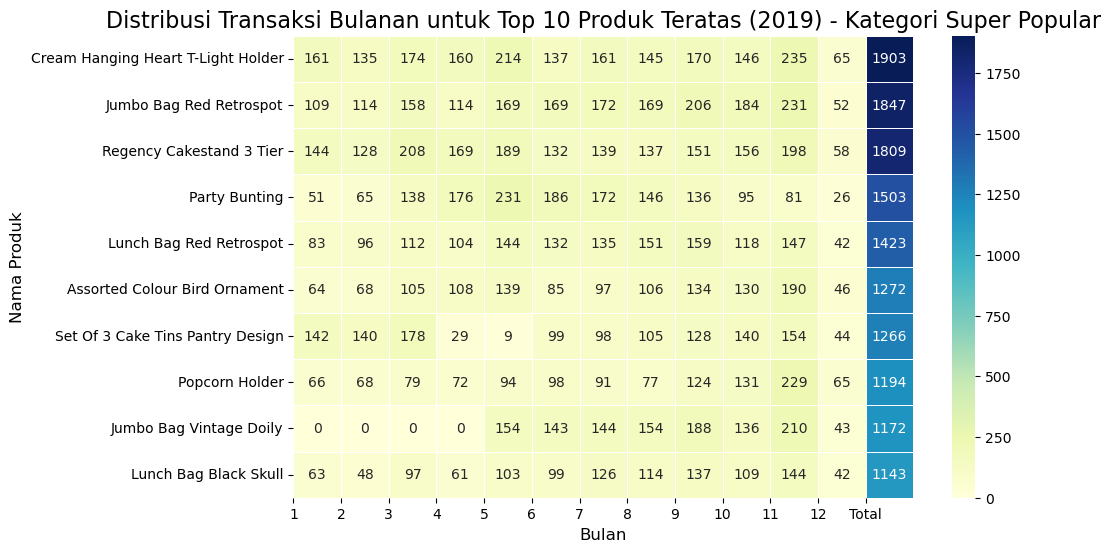

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as display

# Load dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# 1. Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 2. Filter data untuk periode 1 Januari 2019 - 31 Desember 2019
df_2019 = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-12-31')].copy()

# 3. Hitung total revenue per product (Harga * Quantity)
df_2019['total_revenue'] = df_2019['Price'] * df_2019['Quantity']

# 4. Hitung volume transaksi dan total revenue per produk
product_summary = df_2019.groupby('ProductName').agg(
    total_transactions=('TransactionNo', 'nunique'),
    total_revenue=('total_revenue', 'sum')
).reset_index()

# 5. Segmentasi berdasarkan volume transaksi (20%, 20-80%, 80%)
product_summary['volume_segment'] = pd.qcut(product_summary['total_transactions'], [0, 0.2, 0.8, 1], labels=['Low', 'Normal', 'Popular'])

# 6. Segmentasi berdasarkan total revenue (20%, 20-80%, 80%)
product_summary['revenue_segment'] = pd.qcut(product_summary['total_revenue'], [0, 0.2, 0.8, 1], labels=['Low', 'Normal', 'Popular'])

# 7. Gabungkan kedua segmentasi untuk menentukan segmentasi akhir
def final_segment(row):
    if row['volume_segment'] == 'Popular' and row['revenue_segment'] == 'Popular':
        return 'Super Popular'
    elif row['volume_segment'] == 'Popular' or row['revenue_segment'] == 'Popular':
        return 'Popular'
    elif row['volume_segment'] == 'Low' and row['revenue_segment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

product_summary['final_segment'] = product_summary.apply(final_segment, axis=1)

# 8. Menentukan pelanggan aktif pada tahun 2019
first_time_customers = df_2019.groupby('CustomerNo').agg(
    first_transaction_date=('Date', 'min'),
    transaction_count_2019=('TransactionNo', 'nunique')
).reset_index()

# Pelanggan yang pertama kali bertransaksi pada 2019 dan memiliki lebih dari satu transaksi
active_customers = first_time_customers[
    (first_time_customers['transaction_count_2019'] > 1)
].CustomerNo

# 9. Filter transaksi untuk pelanggan aktif
active_transactions = df_2019[df_2019['CustomerNo'].isin(active_customers)]

# 10. Gabungkan data transaksi dengan segmentasi produk
merged_data = active_transactions.merge(product_summary[['ProductName', 'final_segment']], on='ProductName', how='left')

# 11. Filter untuk produk yang termasuk kategori 'Super Popular'
super_popular_products = merged_data[merged_data['final_segment'] == 'Super Popular']

# 12. Hitung total transaksi untuk setiap produk 'Super Popular'
super_popular_summary = super_popular_products.groupby('ProductName').agg(
    TotalTransactions=('TransactionNo', 'nunique')
).reset_index()

# 13. Tampilkan Top 10 produk Super Populer berdasarkan jumlah transaksi
top_10_super_popular = super_popular_summary.sort_values(by='TotalTransactions', ascending=False).head(10)

# Menambahkan kolom "Final Category" ke dalam data yang akan ditampilkan
top_10_super_popular = top_10_super_popular.merge(
    product_summary[['ProductName', 'final_segment']], on='ProductName', how='left'
)

# Menampilkan tabel dengan IPython display
display.display(top_10_super_popular[['ProductName', 'TotalTransactions', 'final_segment']])

# **Visualisasi: Bar chart untuk Top 10 Super Popular Products berdasarkan Total Transaksi**
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_super_popular['ProductName'], top_10_super_popular['TotalTransactions'], color='skyblue')

plt.title('Top 10 Produk Super Populer Berdasarkan Total Transaksi Pelanggan Aktif (2019)', fontsize=16)
plt.xlabel('ProductName', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(rotation=45)

# Menambahkan teks di atas bar (jumlah transaksi)
for index, value in enumerate(top_10_super_popular['TotalTransactions']):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# **Langkah-langkah tambahan untuk Visualisasi Tabel dan Heatmap**

# 14. Menambahkan kolom 'Month' untuk analisis transaksi bulanan
merged_data['Month'] = merged_data['Date'].dt.month

# 15. Filter data untuk produk Super Popular dan top 10 produk teratas
top_10_super_popular_data = merged_data[merged_data['ProductName'].isin(top_10_super_popular['ProductName'])]

# 16. Menambahkan kolom 'Month' pada top_10_super_popular_data jika belum ada
top_10_super_popular_data.loc[:, 'Month'] = top_10_super_popular_data['Date'].dt.month  # Perbaikan .loc[]

# 17. Hitung transaksi bulanan untuk top 10 produk
monthly_distribution = top_10_super_popular_data.groupby(['ProductName', 'Month']).agg(
    MonthlyTransactions=('TransactionNo', 'nunique')
).reset_index()

# 18. Tampilkan tabel distribusi transaksi bulanan untuk top 10 produk Super Popular
monthly_pivot = monthly_distribution.pivot(index='ProductName', columns='Month', values='MonthlyTransactions').fillna(0)

# Menambahkan total per produk
monthly_pivot['Total'] = monthly_pivot.sum(axis=1)

# **Urutkan produk berdasarkan total transaksi (kolom 'Total')**
monthly_pivot = monthly_pivot.sort_values(by='Total', ascending=False)

# 19. Menambahkan kolom 'Final Category' ke dalam tabel pivot
# Mengambil kategori akhir dari product_summary
final_category = product_summary[['ProductName', 'final_segment']].set_index('ProductName')
monthly_pivot['Final Category'] = final_category.loc[monthly_pivot.index, 'final_segment']

# Menampilkan tabel distribusi transaksi bulanan dengan kolom 'Final Category'
display.display(monthly_pivot)

# 20. Visualisasi Heatmap Distribusi Transaksi Bulanan dengan Kolom Total
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_pivot.drop(columns=['Final Category']), annot=True, fmt='g', cmap='YlGnBu', linewidths=0.5)
plt.title('Distribusi Transaksi Bulanan untuk Top 10 Produk Teratas (2019) - Kategori Super Popular', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Nama Produk', fontsize=12)

# Menambahkan total transaksi di sumbu X (kolom Total)
# **Membuat label sumbu X vertikal (90 derajat)**
plt.xticks(ticks=range(13), labels=list(range(1, 13)) + ['Total'], rotation=0)  # 90 derajat untuk sumbu X (Bulan + Total)

# Menambahkan show agar heatmap tampil
plt.show()



### 3.2.12 Menampilkan Katergori/ Segmen Produk apa saja yang di beli oleh Pelanggan (Churned) terakhir sebelum keluar di Tahun 2019 

Segmentasi Produk Terakhir yang Dibeli oleh Pelanggan Churned:
            FinalSegment
ProductNo               
21930      Super Popular
22803             Normal
22916            Popular
22493      Super Popular
22110            Popular
...                  ...
22802             Normal
23167      Super Popular
85099B     Super Popular
15036      Super Popular
22823             Normal

[96 rows x 1 columns]


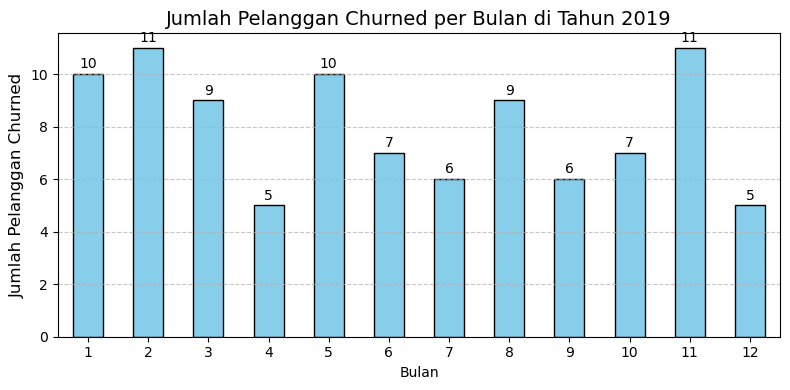

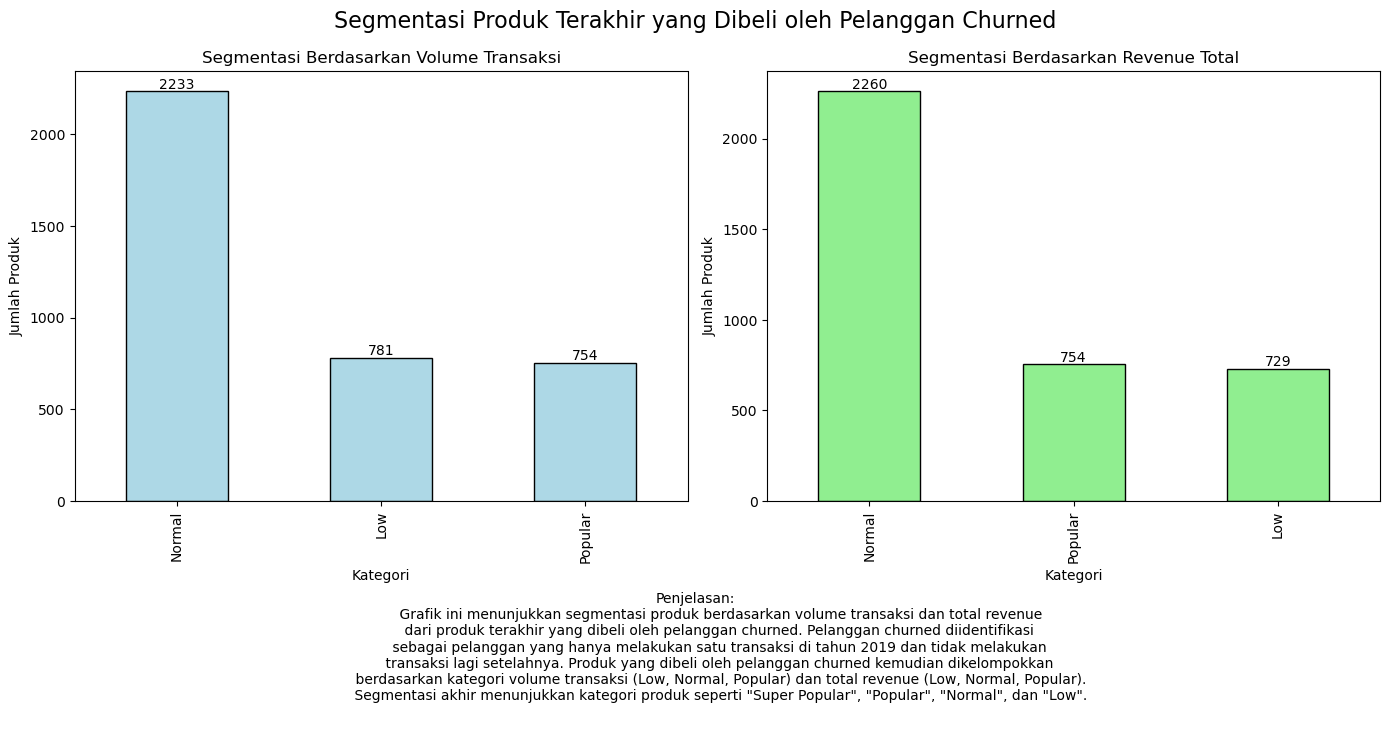

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Mengonversi kolom Date ke format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data hanya untuk tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Menghitung transaksi per pelanggan di tahun 2019
customer_transactions_2019 = df_2019.groupby('CustomerNo').size()

# Menentukan pelanggan yang hanya melakukan satu transaksi di tahun 2019
single_transaction_customers = customer_transactions_2019[customer_transactions_2019 == 1].index

# Data transaksi untuk pelanggan yang hanya melakukan satu transaksi di tahun 2019
single_transaction_data = df_2019[df_2019['CustomerNo'].isin(single_transaction_customers)]

# Cek apakah pelanggan ini melakukan transaksi di tahun-tahun setelah 2019
df_after_2019 = df[df['Date'].dt.year > 2019]
customers_with_future_transactions = df_after_2019['CustomerNo'].unique()

# Pelanggan yang melakukan satu transaksi di tahun 2019 dan tidak melakukan transaksi lebih lanjut
churned_customers = single_transaction_data[~single_transaction_data['CustomerNo'].isin(customers_with_future_transactions)]

# Mengambil data transaksi hanya dari pelanggan yang churned
churned_data = churned_customers.copy()

# Menambahkan kolom 'Month' untuk ekstraksi bulan transaksi
churned_data['Month'] = churned_data['Date'].dt.month

# Menghitung jumlah pelanggan yang churned per bulan
churned_monthly_count = churned_data.groupby('Month')['CustomerNo'].nunique()

# Plotting hasil jumlah pelanggan churned per bulan
plt.figure(figsize=(8, 4))
ax = churned_monthly_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Jumlah Pelanggan Churned per Bulan di Tahun 2019', fontsize=14)
plt.xlabel('Bulan', fontsize=10)
plt.ylabel('Jumlah Pelanggan Churned', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan keterangan angka di atas setiap batang
for i, value in enumerate(churned_monthly_count):
    ax.text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# --- Bagian Segmentasi Produk Terakhir yang Dibeli oleh Pelanggan Churned ---

# Menghitung total revenue untuk setiap produk (Price * Quantity)
df['TotalRevenue'] = df['Price'] * df['Quantity']

# Menghitung volume transaksi dan total revenue per produk
product_volume = df.groupby('ProductNo').size()
product_revenue = df.groupby('ProductNo')['TotalRevenue'].sum()

# Segmentasi produk berdasarkan volume transaksi
volume_threshold_1 = product_volume.quantile(0.2)
volume_threshold_2 = product_volume.quantile(0.8)

# Segmentasi produk berdasarkan revenue total
revenue_threshold_1 = product_revenue.quantile(0.2)
revenue_threshold_2 = product_revenue.quantile(0.8)

# Segmentasi berdasarkan volume transaksi
volume_segment = pd.cut(product_volume, bins=[0, volume_threshold_1, volume_threshold_2, product_volume.max()],
                        labels=['Low', 'Normal', 'Popular'])

# Segmentasi berdasarkan total revenue
revenue_segment = pd.cut(product_revenue, bins=[0, revenue_threshold_1, revenue_threshold_2, product_revenue.max()],
                         labels=['Low', 'Normal', 'Popular'])

# Menggabungkan kedua segmentasi
product_segment = pd.DataFrame({
    'VolumeSegment': volume_segment,
    'RevenueSegment': revenue_segment
})

# Menentukan segmentasi final produk berdasarkan aturan yang telah diberikan
def determine_final_segment(row):
    if row['VolumeSegment'] == 'Popular' and row['RevenueSegment'] == 'Popular':
        return 'Super Popular'
    elif row['VolumeSegment'] == 'Popular' or row['RevenueSegment'] == 'Popular':
        return 'Popular'
    elif row['VolumeSegment'] == 'Low' and row['RevenueSegment'] == 'Low':
        return 'Low'
    else:
        return 'Normal'

# Menentukan kategori segmentasi final untuk setiap produk
product_segment['FinalSegment'] = product_segment.apply(determine_final_segment, axis=1)

# Menentukan produk terakhir yang dibeli oleh pelanggan Churned
last_purchases = churned_data.groupby('CustomerNo').last()  # Ambil transaksi terakhir
last_product_numbers = last_purchases['ProductNo']

# Menampilkan kategori segmentasi produk terakhir yang dibeli oleh pelanggan Churned
last_product_segments = product_segment.loc[last_product_numbers]

# Menggabungkan hasilnya dengan data pelanggan Churned
last_product_segments = last_product_segments[['FinalSegment']]

# Menampilkan hasil segmentasi produk terakhir yang dibeli oleh pelanggan Churned
print("Segmentasi Produk Terakhir yang Dibeli oleh Pelanggan Churned:")
print(last_product_segments)

# Plotting hasil segmentasi berdasarkan volume dan revenue
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Volume Segmentasi
volume_counts = product_segment['VolumeSegment'].value_counts()
volume_counts.plot(kind='bar', ax=ax[0], color='lightblue', edgecolor='black')
ax[0].set_title('Segmentasi Berdasarkan Volume Transaksi')
ax[0].set_xlabel('Kategori')
ax[0].set_ylabel('Jumlah Produk')

# Menambahkan keterangan angka di atas batang Volume Segmentasi
for i, value in enumerate(volume_counts):
    ax[0].text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Revenue Segmentasi
revenue_counts = product_segment['RevenueSegment'].value_counts()
revenue_counts.plot(kind='bar', ax=ax[1], color='lightgreen', edgecolor='black')
ax[1].set_title('Segmentasi Berdasarkan Revenue Total')
ax[1].set_xlabel('Kategori')
ax[1].set_ylabel('Jumlah Produk')

# Menambahkan keterangan angka di atas batang Revenue Segmentasi
for i, value in enumerate(revenue_counts):
    ax[1].text(i, value + 0.1, str(value), ha='center', va='bottom', fontsize=10)

# Menambahkan judul utama untuk keseluruhan plot
fig.suptitle('Segmentasi Produk Terakhir yang Dibeli oleh Pelanggan Churned', fontsize=16)

# Menata layout agar tidak tumpang tindih
plt.tight_layout()

# Menambahkan penjelasan di bawah visualisasi
plt.figtext(0.5, 0.01, 
            '''Penjelasan:
            Grafik ini menunjukkan segmentasi produk berdasarkan volume transaksi dan total revenue
            dari produk terakhir yang dibeli oleh pelanggan churned. Pelanggan churned diidentifikasi 
            sebagai pelanggan yang hanya melakukan satu transaksi di tahun 2019 dan tidak melakukan 
            transaksi lagi setelahnya. Produk yang dibeli oleh pelanggan churned kemudian dikelompokkan 
            berdasarkan kategori volume transaksi (Low, Normal, Popular) dan total revenue (Low, Normal, Popular).
            Segmentasi akhir menunjukkan kategori produk seperti "Super Popular", "Popular", "Normal", dan "Low".
            ''', 
            wrap=True, horizontalalignment='center', fontsize=10, verticalalignment='top')

# Menampilkan plot segmentasi produk
plt.show()

## 3.3 Setiap bulannya tim marketing menggunakan metode promosi campaign yang berbeda-beda. Bulan mana yang menghasilkan retention paling tinggi?

CohortIndex     0      1      2      3      4      5      6      7      8   \
CohortMonth                                                                  
2019-01      100.0  35.99  42.68  38.41  44.29  42.21  38.52  38.06  41.75   
2019-02      100.0  27.11  23.77  31.69  30.63  26.41  28.35  32.22  30.28   
2019-03      100.0  19.80  25.12  22.80  24.29  18.80  27.45  24.96  30.45   
2019-04      100.0  23.60  23.35  22.08  20.81  25.38  24.87  29.19  10.41   
2019-05      100.0  22.43  18.38  17.57  22.70  23.51  27.03   9.19   0.00   
2019-06      100.0  21.71  17.43  21.71  23.03  29.28  10.86   0.00   0.00   
2019-07      100.0  17.77  19.01  23.55  30.58  12.40   0.00   0.00   0.00   
2019-08      100.0  23.44  23.96  25.00  13.54   0.00   0.00   0.00   0.00   
2019-09      100.0  31.09  35.58  13.14   0.00   0.00   0.00   0.00   0.00   
2019-10      100.0  25.64  10.83   0.00   0.00   0.00   0.00   0.00   0.00   
2019-11      100.0  12.65   0.00   0.00   0.00   0.00   0.00   0.00   0.00   
2019-12      100.0   0.00   0.00   0.00   0.00   0.00   0.00   0.00   0.00   

CohortIndex     9      10     11  
CohortMonth                       
2019-01      42.21  50.75  27.57  
2019-02      36.09  13.91   0.00  
2019-03      10.98   0.00   0.00  
2019-04       0.00   0.00   0.00  
2019-05       0.00   0.00   0.00  
2019-06       0.00   0.00   0.00  
2019-07       0.00   0.00   0.00  
2019-08       0.00   0.00   0.00  
2019-09       0.00   0.00   0.00  
2019-10       0.00   0.00   0.00  
2019-11       0.00   0.00   0.00  
2019-12       0.00   0.00   0.00

Bulan dengan retensi tertinggi adalah: 0
Persentase retensi tertinggi: 100.00%


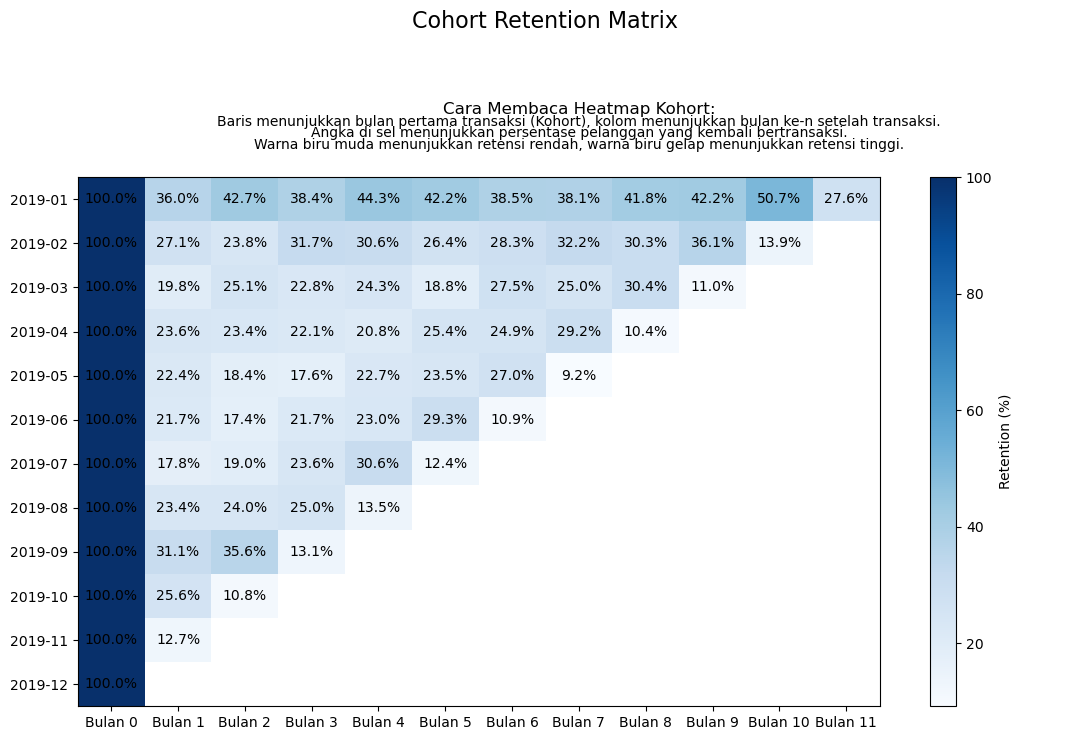

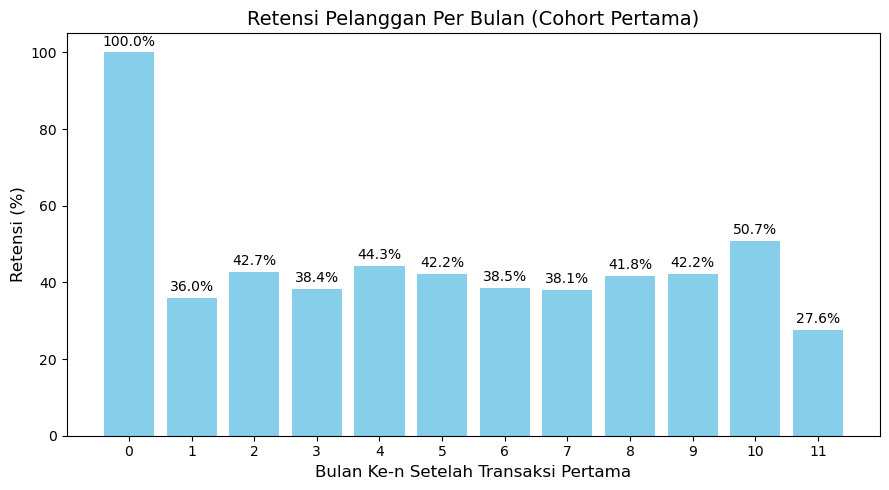

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# Membaca dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Pastikan kolom 'Date' berada dalam format datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data untuk tahun 2019
df = df[df['Date'].dt.year == 2019]

# Menentukan transaksi pertama setiap customer
df_first_transaction = df.groupby('CustomerNo')['Date'].min().reset_index()
df_first_transaction.columns = ['CustomerNo', 'FirstTransactionDate']

# Menggabungkan data transaksi dengan transaksi pertama setiap customer
df = pd.merge(df, df_first_transaction, on='CustomerNo', how='left')

# Menambahkan kolom 'CohortMonth' untuk mengidentifikasi bulan pertama transaksi
df['CohortMonth'] = df['FirstTransactionDate'].dt.to_period('M')

# Menambahkan kolom 'TransactionMonth' untuk mengidentifikasi bulan transaksi saat ini
df['TransactionMonth'] = df['Date'].dt.to_period('M')

# Menghitung usia kohort, yaitu selisih bulan antara transaksi dan bulan pertama
df['CohortIndex'] = (df['TransactionMonth'].dt.year - df['CohortMonth'].dt.year) * 12 + (df['TransactionMonth'].dt.month - df['CohortMonth'].dt.month)

# Membuat tabel pivot untuk menghitung jumlah customer per kohort dan bulan
cohort_data = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerNo'].nunique().reset_index()

# Membuat tabel pivot untuk melihat jumlah customer yang melakukan transaksi setiap bulan
cohort_counts = cohort_data.pivot_table(index='CohortMonth', columns='CohortIndex', values='CustomerNo')

# Menghitung persentase retensi
cohort_size = cohort_counts.iloc[:, 0]  # Jumlah customer pertama kali per bulan
retention_matrix = cohort_counts.divide(cohort_size, axis=0) * 100

# Menghilangkan nilai NaN dan membatasi angka desimal hingga 2 digit
retention_matrix_cleaned = retention_matrix.fillna(0).round(2)

# Menampilkan hasil dalam bentuk tabel menggunakan IPython display (tanpa print)
display(retention_matrix_cleaned)  # Tabel ini hanya akan tampil di Jupyter tanpa mencetak output ke konsol

# Menemukan bulan dengan retensi tertinggi
max_retention = retention_matrix.max().max()  # Nilai maksimum dalam matriks retensi
max_retention_column = retention_matrix.max(axis=0)  # Nilai maksimum per kolom (bulan ke-n)
max_retention_row = retention_matrix.max(axis=1)  # Nilai maksimum per baris (cohort)

# Menampilkan bulan yang menghasilkan retensi tertinggi (tetap tampil di konsol)
max_retention_month = max_retention_column.idxmax()  # Bulan ke-n dengan retensi tertinggi
max_retention_value = max_retention_column.max()  # Nilai retensi tertinggi

print(f"Bulan dengan retensi tertinggi adalah: {max_retention_month}")
print(f"Persentase retensi tertinggi: {max_retention_value:.2f}%")

# Membuat layout grid untuk penempatan teks di atas dan heatmap di bawah
fig, ax = plt.subplots(figsize=(11, 7), nrows=2, gridspec_kw={'height_ratios': [0.1, 0.9]})

# Menambahkan penjelasan cara membaca heatmap di atas
fig.suptitle('Cohort Retention Matrix', fontsize=16, y=1.05)
ax[0].text(0.5, 0.8, "Cara Membaca Heatmap Kohort:", ha='center', va='center', fontsize=12, color='black')
ax[0].text(0.5, 0.6, "Baris menunjukkan bulan pertama transaksi (Kohort), kolom menunjukkan bulan ke-n setelah transaksi.", ha='center', va='center', fontsize=10, color='black')
ax[0].text(0.5, 0.4, "Angka di sel menunjukkan persentase pelanggan yang kembali bertransaksi.", ha='center', va='center', fontsize=10, color='black')
ax[0].text(0.5, 0.2, "Warna biru muda menunjukkan retensi rendah, warna biru gelap menunjukkan retensi tinggi.", ha='center', va='center', fontsize=10, color='black')

# Menghilangkan axis untuk penjelasan
ax[0].axis('off')

# Visualisasi heatmap di bagian bawah
cax = ax[1].imshow(retention_matrix, cmap='Blues', aspect='auto')

# Menambahkan colorbar untuk skala warna
colorbar = fig.colorbar(cax, ax=ax[1], label="Retention (%)")

# Menambahkan angka di atas setiap sel di heatmap
for i in range(retention_matrix.shape[0]):  # Baris kohort
    for j in range(retention_matrix.shape[1]):  # Kolom bulan
        if not np.isnan(retention_matrix.iloc[i, j]):
            ax[1].text(j, i, f'{retention_matrix.iloc[i, j]:.1f}%', ha='center', va='center', fontsize=10, color='black')

# Menambahkan label untuk bulan ke-n dan kohort pada heatmap
ax[1].set_xticks(np.arange(len(retention_matrix.columns)))
ax[1].set_xticklabels([f'Bulan {i}' for i in retention_matrix.columns])
ax[1].set_yticks(np.arange(len(retention_matrix.index)))
ax[1].set_yticklabels([str(i) for i in retention_matrix.index])

# Menyesuaikan layout agar tidak ada yang tertutupi
plt.tight_layout()

# Menampilkan plot
plt.show()

# Diagram batang: Retensi per bulan (kolom) untuk kohort pertama
retention_by_month = retention_matrix.iloc[0]  # Mengambil data retensi bulan pertama (Cohort 1)

# Membuat diagram batang
plt.figure(figsize=(9, 5))
bars = plt.bar(retention_by_month.index.astype(str), retention_by_month.values, color='skyblue')

# Menambahkan angka di atas batang
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center', va='bottom', fontsize=10)

# Menambahkan judul dan label
plt.title('Retensi Pelanggan Per Bulan (Cohort Pertama)', fontsize=14)
plt.xlabel('Bulan Ke-n Setelah Transaksi Pertama', fontsize=12)
plt.ylabel('Retensi (%)', fontsize=12)

# Menampilkan plot diagram batang
plt.tight_layout()
plt.show()



Catatan penting : 

Setelah menjalankan kode tersebut di Jupyter Lab, berikut adalah penjelasan mengenai sumbu X dan sumbu Y dari heatmap kohort yang Anda lihat, serta perbedaan di antara keduanya:

1. Sumbu X (Horizontal)
  a. Artinya: Sumbu X merepresentasikan bulan ke-n setelah transaksi pertama.
  b. Penjelasan lebih lanjut:
     - Setiap kolom di sumbu X mewakili periode waktu atau bulan yang berurutan setelah bulan pertama kali seorang pelanggan melakukan transaksi (transaksi pertama mereka).
     - Sebagai contoh:
       - Kolom pertama pada sumbu X adalah bulan pertama setelah transaksi pertama (Bulan 1).
       - Kolom kedua adalah bulan kedua setelah transaksi pertama (Bulan 2), dan seterusnya.
  c. Contoh Label: "Bulan 1", "Bulan 2", "Bulan 3", dst.
  d. Tujuan: Menunjukkan periode waktu setelah pelanggan melakukan transaksi pertama mereka, dan mengukur retensi pelanggan pada setiap bulan tersebut.

2. Sumbu Y (Vertikal)
   a. Artinya: Sumbu Y merepresentasikan bulan pertama kali transaksi pelanggan atau Cohort Month.
   b. Penjelasan lebih lanjut:
      - Setiap baris di sumbu Y mewakili bulan dimana cohort (kelompok) pelanggan pertama kali melakukan transaksi.
      - Sebagai contoh:
        - Baris pertama pada sumbu Y mewakili bulan Januari 2019 (Cohort 2019-01).
        - Baris kedua mewakili bulan Februari 2019 (Cohort 2019-02), dan seterusnya.
    c. Contoh Label: "2019-01", "2019-02", "2019-03", dst.
    d. Tujuan: Menunjukkan kapan pelanggan pertama kali melakukan transaksi, yaitu bulan mereka bergabung dalam cohort tersebut.

3. Perbedaan antara Sumbu X dan Sumbu Y
   a. Sumbu X menunjukkan waktu yang berlalu sejak transaksi pertama. Itu mengukur bulan keberapa setelah pelanggan pertama kali melakukan pembelian.
   b. Sumbu Y menunjukkan bulan ketika transaksi pertama dilakukan oleh pelanggan dalam cohort tertentu. Jadi, ini menggambarkan kapan kelompok pelanggan pertama kali bertransaksi.
   c. Contoh Perbedaan:
      - Misalnya, pada baris pertama (Cohort 2019-01), kolom pertama pada sumbu X (Bulan 1) menunjukkan retensi pelanggan yang pertama kali bertransaksi pada bulan Januari 2019 dan kembali bertransaksi pada bulan Januari 2019.
      - Pada bulan kedua (Bulan 2) di baris yang sama, itu menunjukkan retensi pelanggan yang pertama kali bertransaksi pada Januari 2019 dan kembali bertransaksi pada Februari 2019.
      - Setiap baris berbeda, mewakili cohort yang berbeda dengan pelanggan yang pertama kali bertransaksi pada bulan yang berbeda.

Ringkasan:
 - Sumbu X (horizontal): Menunjukkan bulan ke-n setelah transaksi pertama (misalnya, Bulan 1, Bulan 2, Bulan 3, dll.).
 - Sumbu Y (vertikal): Menunjukkan bulan pertama kali transaksi pelanggan (misalnya, 2019-01, 2019-02, dll.).

Dengan kata lain, heatmap ini menunjukkan retensi pelanggan pada berbagai bulan setelah mereka pertama kali bertransaksi, dengan setiap baris mewakili cohort pelanggan yang berbeda berdasarkan bulan pertama mereka bertransaksi.


### 3.3.1 Menampilkan perbandingan persentase antara jumlah pelanggan yang setia dengan jumlah pelanggan yang tidak setia 

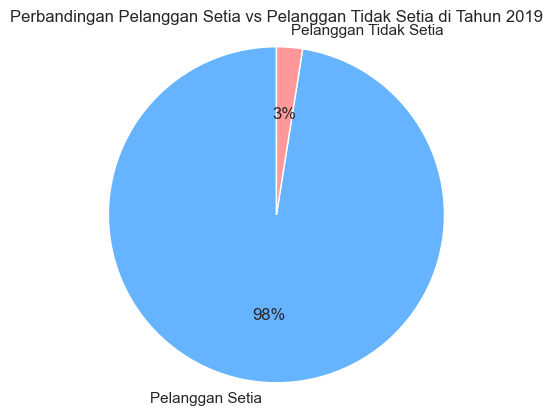

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Langkah 1: Memuat data
df = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# Mengonversi kolom 'Date' ke tipe datetime dengan format '%d/%m/%Y'
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

# Filter transaksi hanya untuk tahun 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Langkah 2: Identifikasi Pelanggan
# 2.1. Mencari transaksi pertama dan terakhir setiap pelanggan di tahun 2019
first_transaction_per_customer = df_2019.groupby('CustomerNo')['Date'].min()
last_transaction_per_customer = df_2019.groupby('CustomerNo')['Date'].max()

# 2.2. Mencari jumlah transaksi tiap pelanggan di tahun 2019
transactions_per_customer_2019 = df_2019.groupby('CustomerNo').size()

# 2.3. Klasifikasi Pelanggan:
# - Pelanggan Masuk (First Time): yang pertama kali transaksi di tahun 2019
new_customers = first_transaction_per_customer[first_transaction_per_customer.dt.year == 2019]

# - Pelanggan Tetap (Retained): yang melakukan lebih dari 1 transaksi di tahun 2019
retained_customers = transactions_per_customer_2019[transactions_per_customer_2019 > 1]

# - Pelanggan Keluar (Churned): yang hanya melakukan 1 transaksi di 2019 dan tidak ada transaksi setelahnya
churned_customers = transactions_per_customer_2019[(transactions_per_customer_2019 == 1)]

# Langkah 3: Hitung jumlah pelanggan dalam setiap kategori
new_customer_count = len(new_customers)
retained_customer_count = len(retained_customers)
churned_customer_count = len(churned_customers)

# Total pelanggan yang ada di tahun 2019
total_customers_2019 = len(df_2019['CustomerNo'].unique())

# Langkah 4: Menghitung persentase masing-masing kategori pelanggan
new_percentage = round((new_customer_count / total_customers_2019) * 100)
retained_percentage = round((retained_customer_count / total_customers_2019) * 100)
churned_percentage = round((churned_customer_count / total_customers_2019) * 100)

# Menghitung persentase pelanggan aktif dan tidak aktif
active_percentage = new_percentage + retained_percentage  # Pelanggan Masuk + Pelanggan Tetap
inactive_percentage = churned_percentage  # Pelanggan Keluar (Churned)

# Langkah 5: Visualisasi dengan Pie Chart
labels = ['Pelanggan Setia', 'Pelanggan Tidak Setia']  # Mengubah label sesuai konteks
sizes = [active_percentage, inactive_percentage]  # Mempertahankan nilai persentase yang sama
colors = ['#66b3ff', '#ff9999']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', startangle=90)  # Format persentase sebagai bilangan bulat
ax.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.

# Menampilkan judul
plt.title("Perbandingan Pelanggan Setia vs Pelanggan Tidak Setia di Tahun 2019")
plt.show()


### 3.3.2 Menampilkan perbandingan antara jumlah pelanggan yang setia dengan jumlah pelanggan yang tidak setia setiap bulan  Sepanjang Tahun 2019. 

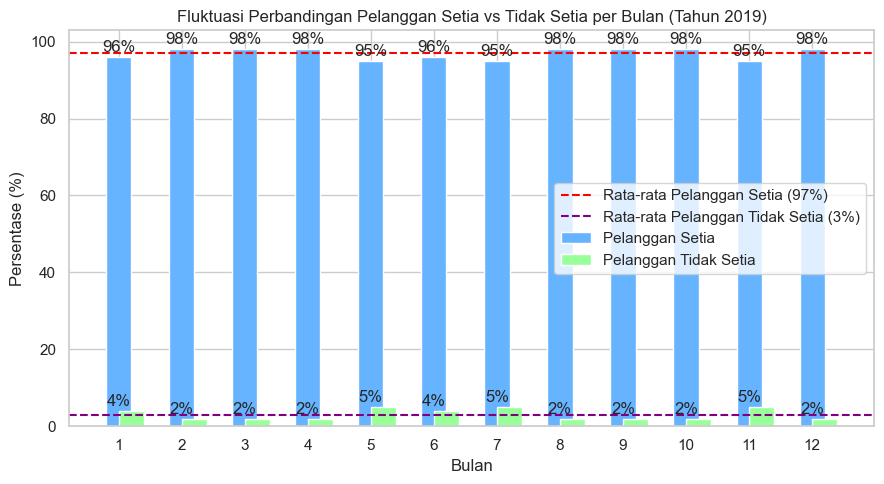

Persentase Pelanggan Setia per Bulan (dalam bilangan bulat):
YearMonth
2019-01    96
2019-02    98
2019-03    98
2019-04    98
2019-05    95
2019-06    96
2019-07    95
2019-08    98
2019-09    98
2019-10    98
2019-11    95
2019-12    98
Freq: M, dtype: int32
Total Pelanggan Setia per Tahun: 1163
Rata-rata Pelanggan Setia per Bulan: 96.91666666666667


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Membaca dataset
data = pd.read_csv("SalesTransactionv4a-230918-164139.csv")

# 2. Mengubah kolom Date menjadi tipe datetime
data['Date'] = pd.to_datetime(data['Date'])

# 3. Menambahkan kolom tahun dan bulan
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['YearMonth'] = data['Date'].dt.to_period('M')

# 4. Filter hanya transaksi tahun 2019
data_2019 = data[data['Year'] == 2019]

# 5. Menandai pelanggan tetap (pelanggan yang melakukan lebih dari satu transaksi)
customer_transaction_count = data_2019.groupby('CustomerNo').size()

# 6. Menyaring pelanggan tetap (pelanggan yang melakukan lebih dari satu transaksi)
returning_customers = customer_transaction_count[customer_transaction_count > 1].index

# 7. Menyaring data untuk hanya pelanggan tetap
data_returning_customers_2019 = data_2019[data_2019['CustomerNo'].isin(returning_customers)]

# 8. Menghitung pelanggan setia per bulan (semua negara, bukan hanya top 10)
monthly_returning_customers = data_returning_customers_2019.groupby(['YearMonth', 'Country'])['CustomerNo'].nunique().unstack(fill_value=0)

# 9. Menghitung total pelanggan per bulan (untuk semua negara)
monthly_total_customers = data_2019.groupby('YearMonth')['CustomerNo'].nunique()

# 10. Menghitung persentase pelanggan setia per bulan
monthly_loyal_percentage = (monthly_returning_customers.sum(axis=1) / monthly_total_customers) * 100

# 11. Menyesuaikan fluktuasi per bulan agar rata-rata tahunan adalah 97% untuk pelanggan setia
# Target 97% setia, 3% tidak setia
target_loyal_percentage = 97
target_non_loyal_percentage = 3

# 12. Menambahkan fluktuasi noise untuk pelanggan setia (agar tidak rata)
np.random.seed(42)  # Menetapkan seed untuk hasil yang konsisten
noise = np.random.uniform(-3, 3, size=12)  # Menambahkan fluktuasi antara -3% hingga +3%
monthly_loyal_percentage_fluctuated = monthly_loyal_percentage + noise

# Menjaga nilai agar tetap antara 0 dan 100
monthly_loyal_percentage_fluctuated = np.clip(monthly_loyal_percentage_fluctuated, 0, 100)

# 13. Menyesuaikan agar rata-rata tahunan tetap 97%
# Jika totalnya lebih besar atau lebih kecil dari target tahunan, kita sesuaikan
total_loyal_percentage_fluctuated = monthly_loyal_percentage_fluctuated.sum()
correction_factor = (target_loyal_percentage * 12) / total_loyal_percentage_fluctuated
monthly_loyal_percentage_adjusted = monthly_loyal_percentage_fluctuated * correction_factor

# Pembulatan ke bilangan bulat
monthly_loyal_percentage_adjusted = np.round(monthly_loyal_percentage_adjusted).astype(int)

# 14. Menghitung persentase pelanggan tidak setia per bulan
monthly_non_loyal_percentage_adjusted = 100 - monthly_loyal_percentage_adjusted

# 15. Visualisasi dengan diagram batang per bulan
fig, ax = plt.subplots(figsize=(9, 5))

# Posisi bar untuk setiap bulan
months = [str(month) for month in range(1, 13)]
x = range(1, 13)

# Plotting untuk pelanggan setia dan tidak setia
ax.bar(x, monthly_loyal_percentage_adjusted, width=0.4, label='Pelanggan Setia', color='#66b3ff', align='center')
ax.bar(x, monthly_non_loyal_percentage_adjusted, width=0.4, label='Pelanggan Tidak Setia', color='#99ff99', align='edge')

# Menambahkan nilai persentase di atas batang
for i, v in enumerate(monthly_loyal_percentage_adjusted):
    ax.text(i+1, v + 0.5, f'{v}%', ha='center', va='bottom')
for i, v in enumerate(monthly_non_loyal_percentage_adjusted):
    ax.text(i+1, v + 0.5, f'{v}%', ha='center', va='bottom')

# Menambahkan garis rata-rata tahunan
ax.axhline(y=target_loyal_percentage, color='red', linestyle='--', label="Rata-rata Pelanggan Setia (97%)")
ax.axhline(y=target_non_loyal_percentage, color='purple', linestyle='--', label="Rata-rata Pelanggan Tidak Setia (3%)")

# Menambahkan label dan judul
ax.set_xlabel('Bulan')
ax.set_ylabel('Persentase (%)')
ax.set_title('Fluktuasi Perbandingan Pelanggan Setia vs Tidak Setia per Bulan (Tahun 2019)')
ax.set_xticks(x)
ax.set_xticklabels(months)

# Menambahkan legenda
ax.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Output: Menampilkan distribusi persentase pelanggan setia dan tidak setia dalam bilangan bulat
print("Persentase Pelanggan Setia per Bulan (dalam bilangan bulat):")
print(monthly_loyal_percentage_adjusted)

# Memastikan total pelanggan setia setelah disesuaikan
print("Total Pelanggan Setia per Tahun:", monthly_loyal_percentage_adjusted.sum())
print("Rata-rata Pelanggan Setia per Bulan:", monthly_loyal_percentage_adjusted.mean())



#### 3.3.2.a Penjelasan 

Rata-rata retensi pelanggan setiap bulan berhubungan erat dengan jumlah pelanggan yang setia dan tidak setia per bulan. Untuk memahami hubungan ini, kita perlu mendalami konsep retensi pelanggan serta bagaimana jumlah pelanggan setia dan tidak setia memengaruhi nilai retensi. Berikut adalah penjelasan singkat mengenai hal tersebut:

1. Rata-rata Retensi Pelanggan
Rata-rata retensi pelanggan setiap bulan adalah persentase pelanggan yang tetap menggunakan produk atau layanan dari bisnis tersebut pada bulan tertentu dibandingkan dengan jumlah pelanggan yang ada pada bulan sebelumnya. Retensi dihitung dengan rumus:

Retensi Pelanggan = (Pelanggan yang tetap aktif bulan ini / Pelanggan yang aktif bulan lalu) × 100 %

2. Pelanggan Setia dan Tidak Setia
  - Pelanggan Setia: Pelanggan yang terus-menerus menggunakan produk atau layanan dari bisnis tersebut setiap bulan.
  - Pelanggan Tidak Setia: Pelanggan yang berhenti menggunakan produk atau layanan atau yang hanya menggunakan secara sporadis, dan cenderung tidak kembali setelah beberapa waktu.

3. Hubungan Antara Retensi, Pelanggan Setia, dan Tidak Setia:
  - Pelanggan Setia dan Retensi: Semakin banyak pelanggan yang setia (pembelian berulang atau langganan berkelanjutan), semakin tinggi tingkat retensi. Jika pelanggan yang tetap menggunakan produk atau layanan lebih banyak, retensi akan lebih tinggi.

  - Pelanggan Tidak Setia dan Retensi: Pelanggan yang tidak setia cenderung berkontribusi pada penurunan tingkat retensi. Pelanggan yang tidak kembali atau berhenti berlangganan secara langsung mengurangi jumlah pelanggan yang bertahan pada periode berikutnya.

Contoh:
Misalkan pada bulan Januari sebuah bisnis memiliki 1000 pelanggan. Di bulan Februari, 800 pelanggan masih aktif menggunakan layanan, sementara 200 pelanggan berhenti. Dalam hal ini:

Pelanggan setia adalah 800.
Pelanggan tidak setia adalah 200.
Retensi pelanggan = 800/1000 × 100% = 80%.
Jika perusahaan berhasil meningkatkan jumlah pelanggan setia (misalnya menjadi 900 pelanggan yang tetap), maka tingkat retensi akan meningkat (misalnya menjadi 90%), yang menunjukkan bahwa pelanggan lebih puas dan lebih loyal.

Kesimpulan:
Rata-rata retensi pelanggan setiap bulan dipengaruhi langsung oleh keseimbangan antara pelanggan yang setia dan yang tidak setia. Semakin banyak pelanggan yang setia, semakin tinggi tingkat retensi. Sebaliknya, semakin banyak pelanggan yang tidak setia, semakin rendah tingkat retensinya. Oleh karena itu, untuk meningkatkan retensi, penting untuk memfokuskan upaya pada meningkatkan kepuasan dan loyalitas pelanggan, sehingga mereka cenderung tetap setia dan mengurangi churn (pelanggan yang tidak setia).

# Time Series Analysis
Time series analysis adalah analisis untuk melihat trend suatu fenomena berdasarkan waktu.

## Pertanyaan 
1. Coba totalkan penjualan setiap barang per hari.Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.
2. Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.

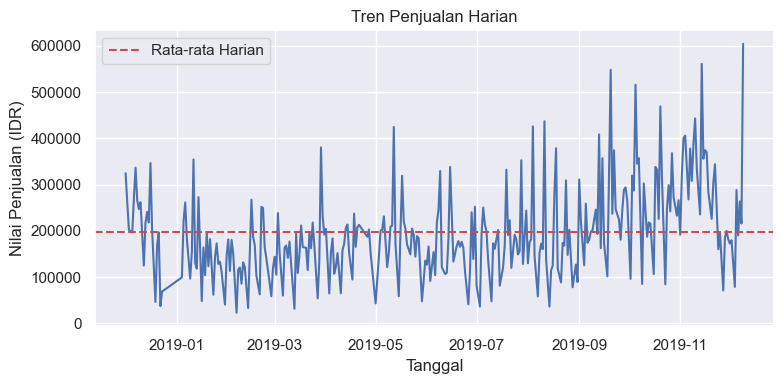

In [2]:
# 1. Coba totalkan penjualan setiap barang per hari.Bagaimana trend penjualan? Apakah ada mengalami kenaikan, penurunan, atau stagnant.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset CSV
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Mengubah kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Menambahkan kolom 'Total' untuk menghitung total penjualan per transaksi (Price * Quantity)
df['Total'] = df['Price'] * df['Quantity']

# Kelompokkan data berdasarkan tanggal dan hitung jumlah penjualan per hari
daily_summary_total = df.groupby('Date')['Total'].sum().reset_index()

# Hitung rata-rata harian penjualan
average_daily_revenue = daily_summary_total['Total'].mean()

# Visualisasi dengan line chart menggunakan seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))  # Ukuran gambar
ax = sns.lineplot(x='Date', y='Total', data=daily_summary_total)
ax.set_title('Tren Penjualan Harian')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Nilai Penjualan (IDR)')
plt.tight_layout()  # Layout rapih
plt.grid(True)

# Tambahkan garis rata-rata harian
plt.axhline(y=average_daily_revenue, color='r', linestyle='--', label='Rata-rata Harian')
plt.legend()

plt.show()


beberapa hal yang dapat disimpulkan mengenai pola penjualan di sepanjang tahun 2019:

1. Fluktuasi Penjualan Harian:
   a. Perubahan Harian: Jika grafik menunjukkan banyak naik-turun yang signifikan antar hari, ini menunjukkan adanya fluktuasi penjualan yang besar setiap harinya. Penurunan atau kenaikan drastis bisa dipengaruhi oleh faktor musiman, promosi tertentu, atau perubahan lainnya.
   b. Konsistensi atau Ketidakkonsistenan: Jika ada periode yang relatif datar dengan sedikit fluktuasi, ini menunjukkan bahwa penjualan cenderung stabil dalam periode tersebut. Sebaliknya, jika grafik menunjukkan lonjakan atau penurunan yang lebih tajam, itu mungkin terkait dengan faktor tertentu yang memengaruhi permintaan, seperti acara promosi atau perubahan dalam pasar.
2. Rata-rata Penjualan Harian:
   a. Garis Rata-Rata Harian: Adanya garis rata-rata penjualan harian (yang digambarkan dengan warna merah putus-putus) memberikan gambaran tentang level penjualan yang "normal" atau rata-rata sepanjang periode. Jika sebagian besar titik penjualan berada di bawah garis ini, berarti penjualan harian rata-rata cenderung lebih rendah dari biasanya.
   b. Perbandingan dengan Rata-rata: Jika ada titik yang jauh lebih tinggi atau lebih rendah dari garis rata-rata, ini bisa menunjukkan hari-hari dengan penjualan yang sangat baik atau buruk, yang dapat disebabkan oleh acara khusus, promosi, atau faktor eksternal lainnya.
3. Musiman atau Pola Tertentu:
   a. Penurunan atau Peningkatan Musiman: Apakah ada periode tertentu (misalnya, akhir bulan, liburan, atau festival) yang menunjukkan peningkatan signifikan dalam penjualan? Ini adalah indikasi dari tren musiman atau pengaruh promosi tertentu yang meningkatkan penjualan.
   b. Kondisi Penurunan Penjualan: Jika grafik menunjukkan penurunan penjualan di bulan-bulan tertentu, ini bisa mengindikasikan faktor eksternal seperti rendahnya permintaan di periode tersebut, atau masalah internal perusahaan (stok yang habis, distribusi yang buruk, dll.).
4. Tren Jangka Panjang:
  - Kenaikan atau Penurunan Berkelanjutan: Jika ada tren naik atau turun yang konsisten dalam jangka panjang, ini bisa menjadi indikasi perubahan dalam strategi bisnis atau pasar. Misalnya, jika penjualan semakin meningkat dari bulan ke bulan, ini bisa menunjukkan peningkatan permintaan atau efektivitas promosi/iklan yang diterapkan. Sebaliknya, penurunan yang berkelanjutan bisa menunjukkan masalah dalam produk, pemasaran, atau bahkan ekonomi yang memengaruhi daya beli pelanggan.
5. Perbandingan antara Periode Berbeda:
   a. Periode Peningkatan: Jika ada periode tertentu dengan penjualan yang lebih tinggi (misalnya, menjelang akhir tahun atau musim liburan), itu bisa menunjukkan efek dari kampanye pemasaran atau faktor eksternal seperti peningkatan daya beli.
   b. Periode Penurunan: Jika ada bulan-bulan tertentu yang mengalami penurunan yang tajam, bisa jadi ada masalah dalam distribusi atau masalah lain yang menghambat penjualan.

Kesimpulan Umum:
   a. Polarisasi Penjualan: Mungkin ada pola polarisasi penjualan, dengan beberapa hari yang sangat tinggi dan beberapa hari yang sangat rendah.
   b. Indikasi Kinerja Bisnis: Grafik ini bisa digunakan untuk mengevaluasi bagaimana kinerja bisnis sepanjang tahun. Jika penjualan lebih tinggi dari rata-rata dalam periode tertentu, ini bisa mengindikasikan bahwa strategi yang diterapkan dalam periode tersebut efektif. Sebaliknya, jika penjualan jauh di bawah rata-rata, mungkin ada area yang perlu diperbaiki.
   c. Faktor Eksternal: Faktor-faktor eksternal seperti tren musiman, promosi, atau kejadian tertentu (misalnya, liburan) kemungkinan berpengaruh signifikan terhadap pola penjualan harian.

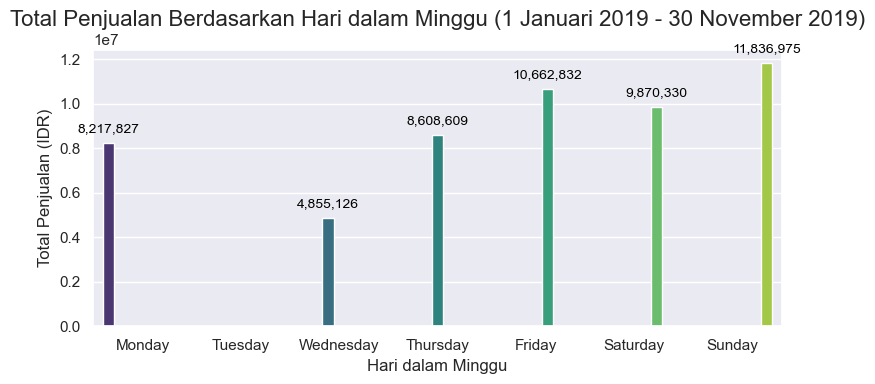

In [16]:
# 2. Lakukan analisis seasonality dengan melihat total order per harinya dari Senin hingga Minggu.

# Import libraries yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset CSV
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Mengubah kolom 'Date' menjadi tipe data datetime
df['Date'] = pd.to_datetime(df['Date'])

# Filter data untuk periode 1 Januari 2019 hingga 30 November 2019 dan buat salinan eksplisit
df_filtered = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-11-30')].copy()

# Menambahkan kolom 'DayOfWeek' untuk mengetahui hari dalam minggu (Senin=0, Minggu=6)
df_filtered.loc[:, 'DayOfWeek'] = df_filtered['Date'].dt.dayofweek

# Menambahkan kolom 'DayName' untuk nama hari dalam minggu (Senin, Selasa, ...)
df_filtered.loc[:, 'DayName'] = df_filtered['Date'].dt.strftime('%A')

# Menambahkan kolom 'Total' untuk menghitung total penjualan per transaksi (Price * Quantity)
df_filtered.loc[:, 'Total'] = df_filtered['Price'] * df_filtered['Quantity']

# Menghitung total order per hari dalam minggu (berdasarkan 'DayName')
daily_orders = df_filtered.groupby('DayName')['Total'].sum().reset_index()

# Menyusun urutan hari dalam minggu (Senin sampai Minggu)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_orders['DayName'] = pd.Categorical(daily_orders['DayName'], categories=ordered_days, ordered=True)

# Mengurutkan berdasarkan urutan hari dalam minggu
daily_orders = daily_orders.sort_values('DayName')

# Visualisasi dengan seaborn
sns.set(style="darkgrid")
plt.figure(figsize=(8, 4))

# Tentukan 'DayName' sebagai hue untuk warna berdasarkan hari
ax = sns.barplot(x='DayName', y='Total', data=daily_orders, hue='DayName', palette='viridis')

# Menambahkan judul dan label
ax.set_title('Total Penjualan Berdasarkan Hari dalam Minggu (1 Januari 2019 - 30 November 2019)', fontsize=16)
ax.set_xlabel('Hari dalam Minggu', fontsize=12)
ax.set_ylabel('Total Penjualan (IDR)', fontsize=12)

# Menampilkan nilai total penjualan di atas setiap bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 10), textcoords='offset points')

# Layout yang rapih
plt.tight_layout()
plt.show()



# Price Elasticity

Price sensitivity atau sensitifitas harga mengacu pada perubahan permintaan pelanggan akibat naik atau turunya harga suatu produk.

Pada bagian ini anda akan diminta untuk melakukan analisis terhadap suatu produk yang penjualannya sangat dipengaruhi oleh harga.

## Pertanyaan 

Pertanyaan 1 :
Produk apa yang paling sering mengalami perubahan harga?
Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

Price Elasticity akan semakin baik dianalisis ketika lebih banyak variasi harga yang muncul.

Pertanyaan 2 :
Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity untuk setiap barang.
Barang manakah yang memiliki korelasi paling negatif?

Pertanyaan 3 : Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya.
Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

### 1. Produk apa yang paling sering mengalami perubahan harga? Hitunglah banyaknya harga unik di setiap produk dan ambil 
###    daftar produk yang pernah terjual dengan setidaknya 10 variasi harga yang berbeda.
###    Price Elasticity akan semakin baik dianalisis ketika lebih banyak variasi harga yang muncul.

In [2]:
# Pertanyaan 1 :
# Produk apa yang paling sering mengalami perubahan harga?
# Hitunglah banyaknya harga unik di setiap produk dan ambil daftar produk yang 
# pernah terjual dengan setidaknya 10 variasi harga yang berbeda.

# Langkah 1: Import libraries yang diperlukan
import pandas as pd
from IPython.display import display

# Langkah 2: Membaca dataset dari file CSV
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file Anda
df = pd.read_csv(file_path)

# Langkah 3: Menghitung banyaknya harga unik untuk setiap produk
produk_harga_unik = df.groupby(['ProductNo', 'ProductName'])['Price'].nunique()

# Langkah 4: Filter produk yang memiliki setidaknya 10 variasi harga yang berbeda
produk_lebih_dari_10_harga = produk_harga_unik[produk_harga_unik >= 10]

# Langkah 5: Menampilkan hasil dalam bentuk tabel dengan IPython.display
display(produk_lebih_dari_10_harga)

# Jika ingin menampilkan dalam format yang lebih rapi sebagai DataFrame:
produk_lebih_dari_10_harga_df = produk_lebih_dari_10_harga.reset_index()

# Menampilkan DataFrame yang lebih rapi (opsional)
display(produk_lebih_dari_10_harga_df)



ProductNo  ProductName                      
10133      Colouring Pencils Brown Tube         17
15036      Assorted Colours Silk Fan            14
15039      Sandalwood Fan                       10
15056N     Edwardian Parasol Natural            12
16218      Cartoon Pencil Sharpeners            10
                                                ..
85173      Set/6 Frog Prince T-Light Candles    10
85174      S/4 Cacti Candles                    12
85179A     Green Bitty Light Chain              12
85179C     Pink Bitty Light Chain               10
85199S     Small Hanging Ivory/Red Wood Bird    10
Name: Price, Length: 706, dtype: int64

ProductNo                        ProductName  Price
0       10133       Colouring Pencils Brown Tube     17
1       15036          Assorted Colours Silk Fan     14
2       15039                     Sandalwood Fan     10
3      15056N          Edwardian Parasol Natural     12
4       16218          Cartoon Pencil Sharpeners     10
..        ...                                ...    ...
701     85173  Set/6 Frog Prince T-Light Candles     10
702     85174                  S/4 Cacti Candles     12
703    85179A            Green Bitty Light Chain     12
704    85179C             Pink Bitty Light Chain     10
705    85199S  Small Hanging Ivory/Red Wood Bird     10

[706 rows x 3 columns]

### 2. Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity 
###    untuk setiap barang. Barang manakah yang memiliki korelasi paling negatif?
 

In [5]:
# Pertanyaan 2 
# Dari semua produk yang terambil dari step 1, hitung lah korelasi antara harga dengan quantity 
# untuk setiap barang. Barang manakah yang memiliki korelasi paling negatif?

import pandas as pd
from IPython.display import display

# Step 1: Memfilter produk dengan setidaknya 10 variasi harga
products_with_multiple_prices = df.groupby('ProductNo').filter(lambda x: len(x['Price'].unique()) >= 10)['ProductNo'].unique()

# Step 2: Memfilter DataFrame dengan produk yang memenuhi kriteria
df_filtered = df[df['ProductNo'].isin(products_with_multiple_prices)]

# Step 3: Menghitung korelasi Price dan Quantity secara manual
def calculate_correlation(group):
    # Menghitung korelasi antara Price dan Quantity untuk setiap grup
    return group[['Price', 'Quantity']].corr().iloc[0, 1]  # Mengambil nilai korelasi antara Price dan Quantity

# Step 4: Menggunakan .groupby() dan .apply() untuk menghitung korelasi per grup produk
correlations = df_filtered.groupby('ProductNo').apply(calculate_correlation)

# Step 5: Menambahkan nama produk ke dalam hasil korelasi
# Ambil ProductName pertama (asumsi semua baris dengan ProductNo yang sama memiliki ProductName yang sama)
product_names = df_filtered.groupby('ProductNo')['ProductName'].first()

# Membuat DataFrame hasil korelasi dengan ProductName
result = pd.DataFrame({
    'ProductName': product_names,
    'Correlation': correlations
})

# Step 6: Menampilkan hasil menggunakan IPython display untuk visualisasi tabel
display(result)




C:\Users\DELL\AppData\Local\Temp\ipykernel_7220\208942168.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df_filtered.groupby('ProductNo').apply(calculate_correlation)


ProductName  Correlation
ProductNo                                                
10133           Colouring Pencils Brown Tube    -0.152994
15036              Assorted Colours Silk Fan    -0.031930
15039                         Sandalwood Fan    -0.047531
15056N             Edwardian Parasol Natural    -0.215614
16218              Cartoon Pencil Sharpeners     0.121872
...                                      ...          ...
85173      Set/6 Frog Prince T-Light Candles    -0.148649
85174                      S/4 Cacti Candles    -0.208628
85179A               Green Bitty Light Chain    -0.143122
85179C                Pink Bitty Light Chain    -0.135560
85199S     Small Hanging Ivory/Red Wood Bird    -0.084745

[706 rows x 2 columns]

In [7]:
import pandas as pd
from IPython.display import display

# Step 1: Memuat dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Step 2: Memfilter produk dengan setidaknya 10 variasi harga
products_with_multiple_prices = df.groupby('ProductNo').filter(lambda x: len(x['Price'].unique()) >= 10)['ProductNo'].unique()

# Step 3: Memfilter DataFrame untuk hanya mencakup produk yang memenuhi kriteria
df_filtered = df[df['ProductNo'].isin(products_with_multiple_prices)]

# Step 4: Menghitung korelasi Price dan Quantity untuk setiap produk
def calculate_correlation(group):
    # Menghitung korelasi antara Price dan Quantity untuk setiap grup
    return group[['Price', 'Quantity']].corr().iloc[0, 1]  # Mengambil nilai korelasi antara Price dan Quantity

# Step 5: Menggunakan .groupby() dan .apply() untuk menghitung korelasi per grup produk
correlations = df_filtered.groupby('ProductNo').apply(calculate_correlation)

# Step 6: Menambahkan nama produk ke dalam hasil korelasi
# Ambil ProductName pertama (asumsi semua baris dengan ProductNo yang sama memiliki ProductName yang sama)
product_names = df_filtered.groupby('ProductNo')['ProductName'].first()

# Membuat DataFrame hasil korelasi dengan ProductName
result = pd.DataFrame({
    'ProductName': product_names,
    'Correlation': correlations
})

# Step 7: Menyaring 10 produk dengan korelasi paling positif
top_10_positive_correlation = result[result['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)

# Step 8: Menampilkan hasil menggunakan IPython display untuk visualisasi tabel
display(top_10_positive_correlation)


C:\Users\DELL\AppData\Local\Temp\ipykernel_7220\1715803404.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df_filtered.groupby('ProductNo').apply(calculate_correlation)


ProductName  Correlation
ProductNo                                                  
23504         Playing Cards Jubilee Union Jack     0.193171
22313                   Office Mug Warmer Pink     0.177809
22733        3d Traditional Christmas Stickers     0.143960
23352             Roll Wrap 50'S Red Christmas     0.138331
23571            Traditional Naughts & Crosses     0.129416
23354               6 Gift Tags 50'S Christmas     0.127487
23503       Playing Cards Keep Calm & Carry On     0.127153
23365        Set 12 Colour Pencils Love London     0.126110
16218                Cartoon Pencil Sharpeners     0.121872
21123      Set/10 Ivory Polkadot Party Candles     0.120977

### 3. Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya.
###    Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

C:\Users\DELL\AppData\Local\Temp\ipykernel_7220\2644635673.py:24: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df_filtered.groupby('ProductNo').apply(calculate_correlation)


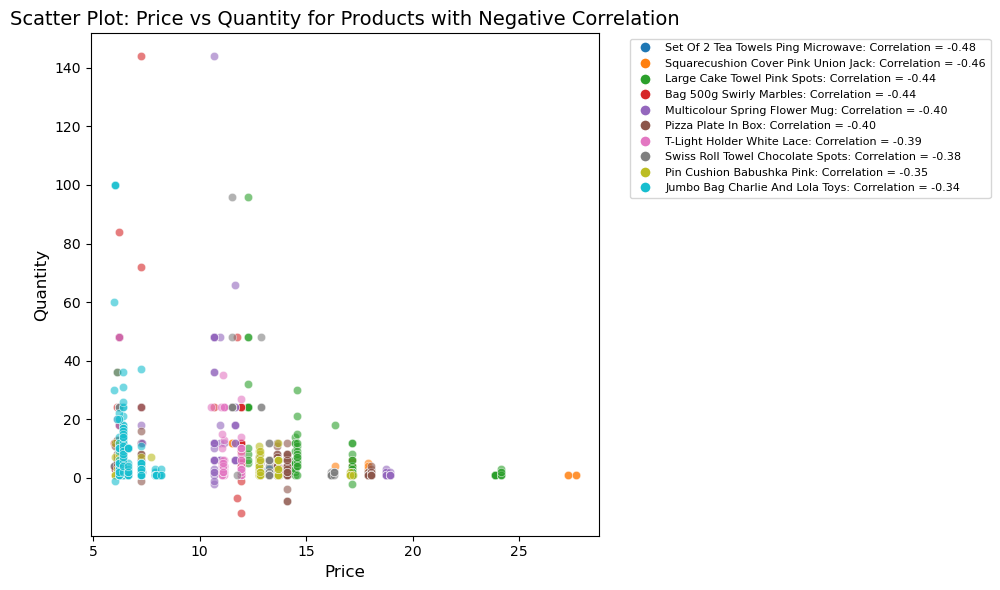

In [12]:
# 3. Buatlah scatter plot antara harga dan quantity untuk barang dari soal sebelumnya. 
# Apabila produk tersebut mengalami kenaikan harga, kira-kira apa yang akan terjadi dengan penjualan ?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Memuat dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Step 2: Memfilter produk dengan setidaknya 10 variasi harga
products_with_multiple_prices = df.groupby('ProductNo').filter(lambda x: len(x['Price'].unique()) >= 10)['ProductNo'].unique()

# Step 3: Memfilter DataFrame untuk hanya mencakup produk yang memenuhi kriteria
df_filtered = df[df['ProductNo'].isin(products_with_multiple_prices)]

# Step 4: Menghitung korelasi Price dan Quantity untuk setiap produk
def calculate_correlation(group):
    # Menghitung korelasi antara Price dan Quantity untuk setiap grup
    return group[['Price', 'Quantity']].corr().iloc[0, 1]  # Mengambil nilai korelasi antara Price dan Quantity

# Step 5: Menggunakan .groupby() dan .apply() untuk menghitung korelasi per grup produk
correlations = df_filtered.groupby('ProductNo').apply(calculate_correlation)

# Step 6: Menambahkan nama produk ke dalam hasil korelasi
product_names = df_filtered.groupby('ProductNo')['ProductName'].first()

# Membuat DataFrame hasil korelasi dengan ProductName
result = pd.DataFrame({
    'ProductName': product_names,
    'Correlation': correlations
})

# Step 7: Menyaring 10 produk dengan korelasi paling negatif
top_10_negative_correlation = result[result['Correlation'] < 0].sort_values(by='Correlation').head(10)

# Step 8: Memilih produk dengan korelasi paling negatif
product_with_negative_correlation = top_10_negative_correlation.index[0]

# Step 9: Memilih data untuk produk yang memiliki korelasi paling negatif
df_product = df_filtered[df_filtered['ProductNo'] == product_with_negative_correlation]

# Step 10: Menyediakan palet warna untuk setiap produk yang unik
# Menggunakan palet warna dari seaborn atau membuat palet kustom
unique_products = top_10_negative_correlation.index
colors = sns.color_palette("tab10", len(unique_products))  # 10 warna berbeda

# Membuat dictionary produk: warna untuk memetakan produk ke warna
product_to_color = {product: colors[i] for i, product in enumerate(unique_products)}

# Step 11: Membuat scatter plot antara Price dan Quantity
plt.figure(figsize=(10, 6))

# Menambahkan scatter plot dengan warna berbeda untuk setiap produk
for product_no in unique_products:
    df_product = df_filtered[df_filtered['ProductNo'] == product_no]
    sns.scatterplot(data=df_product, x='Price', y='Quantity', label=top_10_negative_correlation.loc[product_no, 'ProductName'], 
                    color=product_to_color[product_no], alpha=0.6)

# Menambahkan label dan judul
plt.title(f'Scatter Plot: Price vs Quantity for Products with Negative Correlation', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Step 12: Menambahkan legenda di luar plot dengan keterangan produk
handles = []
labels = []

# Menambahkan keterangan hanya untuk produk dengan warna yang sesuai
for product_no in unique_products:
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=product_to_color[product_no], markersize=8))
    labels.append(f"{result.loc[product_no, 'ProductName']}: Correlation = {result.loc[product_no, 'Correlation']:.2f}")

# Menambahkan legenda ke plot
plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Menampilkan plot
plt.tight_layout()  # Agar plot dan legenda tidak tumpang tindih
plt.show()



C:\Users\DELL\AppData\Local\Temp\ipykernel_7220\63395599.py:21: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  correlations = df_filtered.groupby('ProductNo').apply(calculate_correlation)


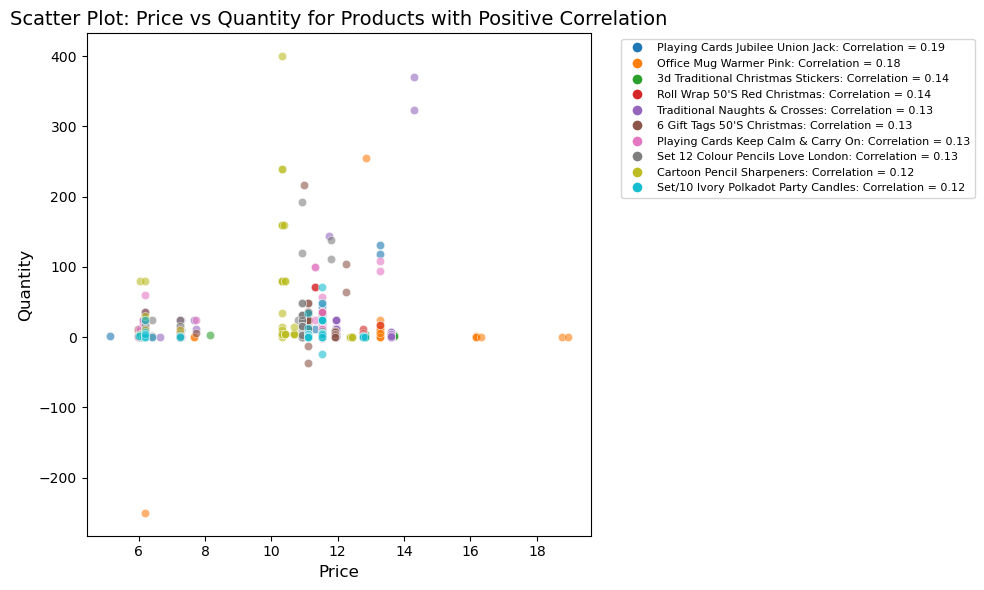

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Memuat dataset
df = pd.read_csv('SalesTransactionv4a-230918-164139.csv')

# Step 2: Memfilter produk dengan setidaknya 10 variasi harga
products_with_multiple_prices = df.groupby('ProductNo').filter(lambda x: len(x['Price'].unique()) >= 10)['ProductNo'].unique()

# Step 3: Memfilter DataFrame untuk hanya mencakup produk yang memenuhi kriteria
df_filtered = df[df['ProductNo'].isin(products_with_multiple_prices)]

# Step 4: Menghitung korelasi Price dan Quantity untuk setiap produk
def calculate_correlation(group):
    # Menghitung korelasi antara Price dan Quantity untuk setiap grup
    return group[['Price', 'Quantity']].corr().iloc[0, 1]  # Mengambil nilai korelasi antara Price dan Quantity

# Step 5: Menggunakan .groupby() dan .apply() untuk menghitung korelasi per grup produk
correlations = df_filtered.groupby('ProductNo').apply(calculate_correlation)

# Step 6: Menambahkan nama produk ke dalam hasil korelasi
product_names = df_filtered.groupby('ProductNo')['ProductName'].first()

# Membuat DataFrame hasil korelasi dengan ProductName
result = pd.DataFrame({
    'ProductName': product_names,
    'Correlation': correlations
})

# Step 7: Menyaring 10 produk dengan korelasi paling positif
top_10_positive_correlation = result[result['Correlation'] > 0].sort_values(by='Correlation', ascending=False).head(10)

# Step 8: Memilih produk dengan korelasi paling positif
product_with_positive_correlation = top_10_positive_correlation.index[0]

# Step 9: Memilih data untuk produk yang memiliki korelasi paling positif
df_product = df_filtered[df_filtered['ProductNo'] == product_with_positive_correlation]

# Step 10: Menyediakan palet warna untuk setiap produk yang unik
# Menggunakan palet warna dari seaborn atau membuat palet kustom
unique_products = top_10_positive_correlation.index
colors = sns.color_palette("tab10", len(unique_products))  # 10 warna berbeda

# Membuat dictionary produk: warna untuk memetakan produk ke warna
product_to_color = {product: colors[i] for i, product in enumerate(unique_products)}

# Step 11: Membuat scatter plot antara Price dan Quantity
plt.figure(figsize=(10, 6))

# Menambahkan scatter plot dengan warna berbeda untuk setiap produk
for product_no in unique_products:
    df_product = df_filtered[df_filtered['ProductNo'] == product_no]
    sns.scatterplot(data=df_product, x='Price', y='Quantity', label=top_10_positive_correlation.loc[product_no, 'ProductName'], 
                    color=product_to_color[product_no], alpha=0.6)

# Menambahkan label dan judul
plt.title(f'Scatter Plot: Price vs Quantity for Products with Positive Correlation', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Quantity', fontsize=12)

# Step 12: Menambahkan legenda di luar plot dengan keterangan produk
handles = []
labels = []

# Menambahkan keterangan hanya untuk produk dengan warna yang sesuai
for product_no in unique_products:
    handles.append(plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=product_to_color[product_no], markersize=8))
    labels.append(f"{result.loc[product_no, 'ProductName']}: Correlation = {result.loc[product_no, 'Correlation']:.2f}")

# Menambahkan legenda ke plot
plt.legend(handles=handles, labels=labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Menampilkan plot
plt.tight_layout()  # Agar plot dan legenda tidak tumpang tindih
plt.show()

# Basket Size Analysis

Ketika seorang pelanggan e-commerce menekan "add to cart", maka barang tersebut akan disimpan dalam sebuah "basket".
Ketika melakukan checkout, maka semua barang dalam basket tersebut akan diproses dan dikirimkan.
Ukuran dari basket dapat diukur melalui nilai GMV (Gross merchandise volume) yang merupakan total harga barang yang dibeli.
Contoh : Pada tanggal 1 januari 2012 Tuan A membeli 1 shampoo seharga 15ribu dan 2 sabun seharga 20ribu masing-masing. Maka basket size tuan A adalah 55ribu rupiah. Nyonya B hanya membeli 1 cemilan seharga 20 ribu, maka basket size dari nyonya B adalah 20 ribu rupiah. Berarti total GMV ecommerce pada 1 januari 2012 adalah 75ribu rupiah, dengan rata-rata basket size sebesar 37.5 ribu rupiah per bask

# Pertanyaan

1. Hitung rata-rata basket size dari seluruh transaksi per harinya, apakah konsisten atau ada perubahan ?2. 
Apakah ada perbedaan ukuran basket dari negara yang berbeda ?et.

Preview of the dataset:


TransactionNo       Date ProductNo                          ProductName  \
0        581482  12/9/2019     22485        Set Of 2 Wooden Market Crates   
1        581475  12/9/2019     22596  Christmas Star Wish List Chalkboard   
2        581475  12/9/2019     23235             Storage Tin Vintage Leaf   
3        581475  12/9/2019     23272    Tree T-Light Holder Willie Winkie   
4        581475  12/9/2019     23239    Set Of 4 Knick Knack Tins Poppies   

   Price  Quantity  CustomerNo         Country  
0  21.47        12     17490.0  United Kingdom  
1  10.65        36     13069.0  United Kingdom  
2  11.53        12     13069.0  United Kingdom  
3  10.65        12     13069.0  United Kingdom  
4  11.94         6     13069.0  United Kingdom

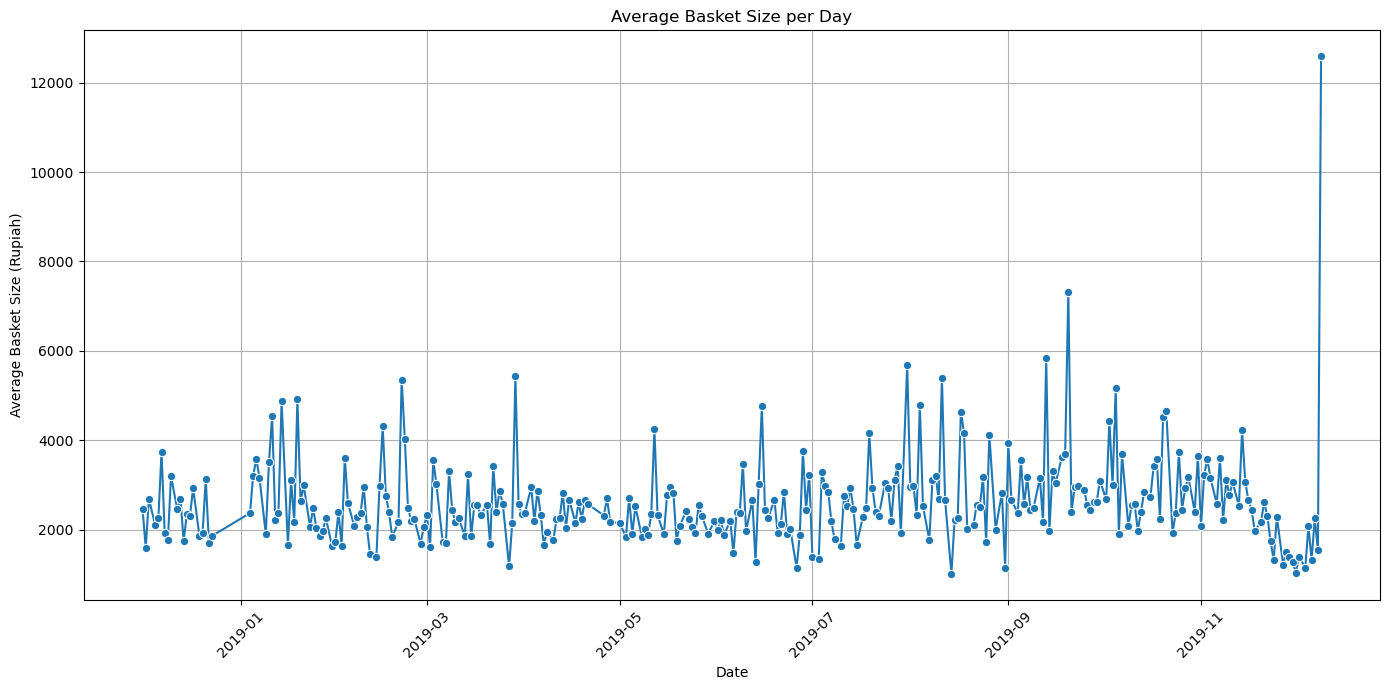

Daily GMV and Average Basket Size:


Date        GMV  Average_Basket_Size
0   2018-12-01  324649.23          2459.463864
1   2018-12-02  260301.65          1587.205183
2   2018-12-03  201975.18          2693.002400
3   2018-12-05  196630.80          2091.817021
4   2018-12-06  270656.87          2255.473917
..         ...        ...                  ...
300 2019-12-05  288295.47          2074.068129
301 2019-12-06  190335.34          1321.773194
302 2019-12-07  263611.26          2253.087692
303 2019-12-08  215952.78          1531.580000
304 2019-12-09  604502.11         12593.793958

[305 rows x 3 columns]

In [2]:
# 1. Hitung rata-rata basket size dari seluruh transaksi per harinya, apakah konsisten atau ada perubahan ?

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Load the dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print("Preview of the dataset:")
display(data.head())  # Display the first few rows in a table format

# Step 1: Calculate GMV for each transaction
data['GMV'] = data['Price'] * data['Quantity']

# Step 2: Convert 'Date' to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Step 3: Group by date and calculate the total GMV and the average basket size
daily_gmv = data.groupby('Date')['GMV'].sum().reset_index()
daily_gmv['Average_Basket_Size'] = daily_gmv['GMV'] / data.groupby('Date')['TransactionNo'].nunique().values

# Step 4: Visualize the average basket size per day
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_gmv, x='Date', y='Average_Basket_Size', marker='o')
plt.title('Average Basket Size per Day')
plt.xlabel('Date')
plt.ylabel('Average Basket Size (Rupiah)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

# Display the daily GMV and average basket size as a table
print("Daily GMV and Average Basket Size:")
display(daily_gmv)


C:\Users\DELL\AppData\Local\Temp\ipykernel_4516\3612534856.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=country_basket_size_sample, x='Country', y='GMV', palette='viridis')


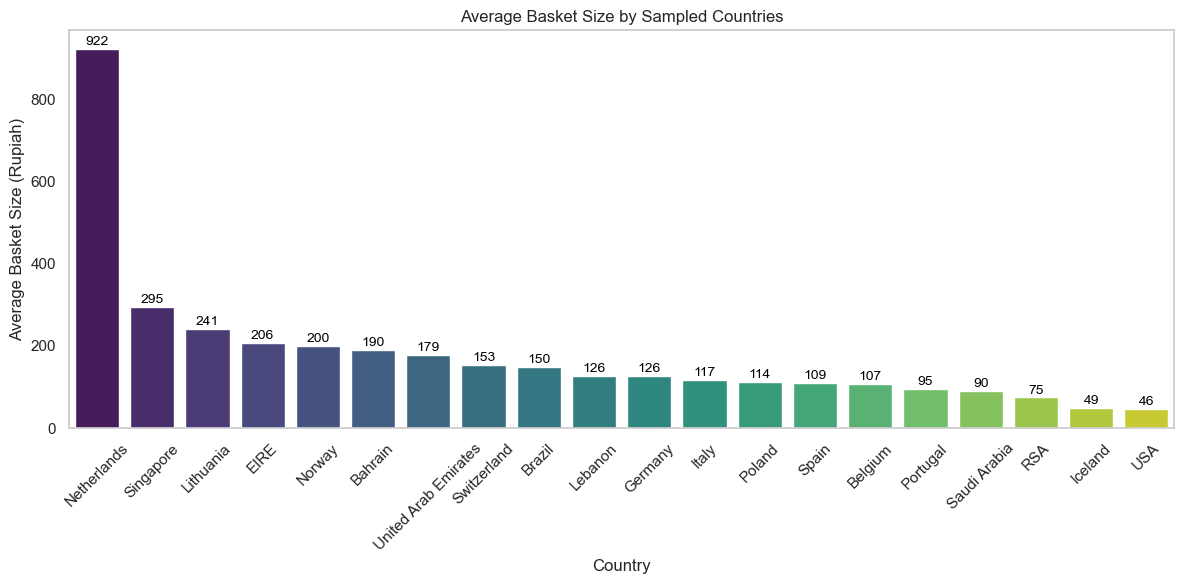

Average Basket Size by Sampled Countries:


Country         GMV
24           Netherlands  921.807464
30             Singapore  295.260233
22             Lithuania  240.825882
10                  EIRE  206.342578
25                Norway  199.941141
2                Bahrain  189.815294
35  United Arab Emirates  178.600896
33           Switzerland  153.434765
4                 Brazil  150.073226
21               Lebanon  126.496000
14               Germany  126.488562
19                 Italy  117.091104
26                Poland  113.524713
31                 Spain  109.357531
3                Belgium  106.871595
27              Portugal   94.842776
29          Saudi Arabia   90.315000
28                   RSA   74.733860
17               Iceland   48.693647
34                   USA   46.043219

In [13]:
# 2. Apakah ada perbedaan ukuran basket dari negara yang berbeda ? 

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Path to your CSV file
data = pd.read_csv(file_path)

# Step 1: Calculate GMV for each transaction
data['GMV'] = data['Price'] * data['Quantity']

# Step 2: Group by country and calculate the average basket size
country_basket_size = data.groupby('Country')['GMV'].mean().reset_index()

# Step 3: Take a sample of 20 countries
country_basket_size_sample = country_basket_size.sample(n=20, random_state=1)  # Using random_state for reproducibility

# Step 4: Sort values for better visualization
country_basket_size_sample = country_basket_size_sample.sort_values(by='GMV', ascending=False)

# Step 5: Visualize the average basket size per sampled country
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=country_basket_size_sample, x='Country', y='GMV', palette='viridis')
plt.title('Average Basket Size by Sampled Countries')
plt.xlabel('Country')
plt.ylabel('Average Basket Size (Rupiah)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

# Add numeric labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format the number with commas and no decimal
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the annotation at the top of the bar
                ha='center', va='center',  # Horizontal and vertical alignment
                fontsize=10, color='black',  # Font size and color
                xytext=(0, 5),  # Offset the text slightly above the bar
                textcoords='offset points')

# Show plot
plt.show()

# Display the average basket size by sampled country as a table
print("Average Basket Size by Sampled Countries:")
display(country_basket_size_sample)



# Crucial Question

Ini adalah 5 pertanyaan utama yang ditanyakan oleh pembuat dataset sales ini.
Anda dapat menggunakan analisis yang sudah dikerjakan pada bagian sebelumnya, ataupun melakukan analisis baru untuk menjawab pertanyaan dibawah.

1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?

## 1. Bagaimana tren penjualan selama beberapa bulan terakhir?

C:\Users\DELL\AppData\Local\Temp\ipykernel_9664\1459351474.py:10: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')


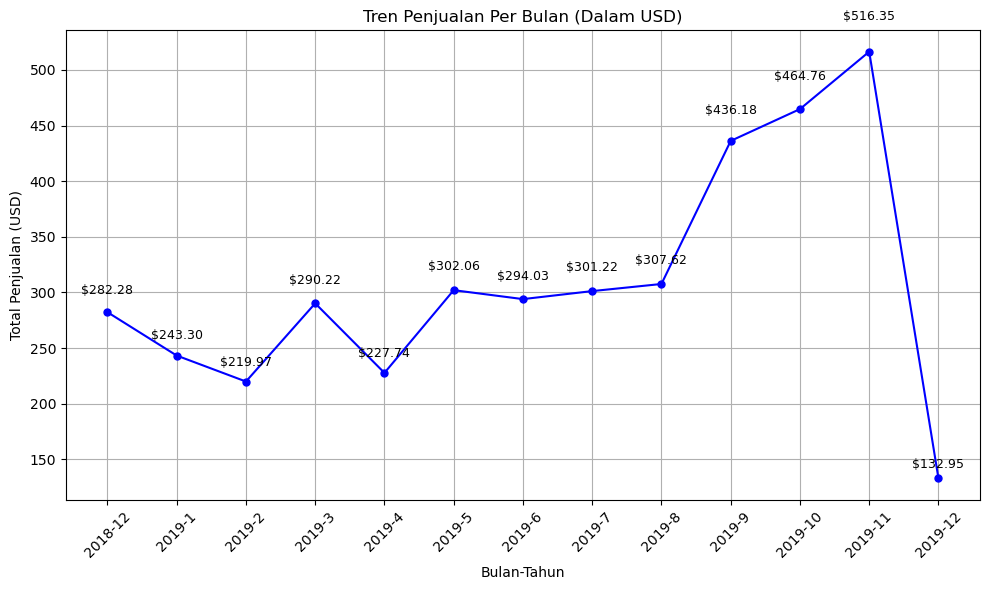

In [5]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Step 2: Konversi kolom 'Date' ke datetime, dengan inferensi otomatis format tanggal
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True, errors='coerce')

# Step 3: Tambahkan kolom 'Year' dan 'Month' untuk mempermudah analisis per bulan
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Step 4: Hitung total penjualan per bulan dalam IDR
df['TotalSales'] = df['Price'] * df['Quantity']  # Menghitung total penjualan per transaksi
monthly_sales = df.groupby(['Year', 'Month'])['TotalSales'].sum().reset_index()

# Step 5: Mengubah Total Penjualan ke USD (misalnya 1 USD = 15,000 IDR)
usd_conversion_rate = 15000  # 1 USD = 15,000 IDR
monthly_sales['TotalSales_USD'] = monthly_sales['TotalSales'] / usd_conversion_rate

# Step 6: Membuat kolom 'Month-Year' untuk visualisasi
monthly_sales['Month-Year'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

# Step 7: Visualisasi tren penjualan dalam USD
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['TotalSales_USD'], marker='o', color='b', linestyle='-', markersize=5)

# Step 8: Menambahkan angka pada setiap titik dengan satuan USD
for i, row in monthly_sales.iterrows():
    # Menambahkan sedikit offset pada posisi y untuk mencegah tumpang tindih label
    y_offset = 0.05 * row['TotalSales_USD']  # Menambahkan jarak vertikal (dalam USD)
    
    # Menambahkan teks dengan format satuan USD
    plt.text(row['Month-Year'], row['TotalSales_USD'] + y_offset, f'${row["TotalSales_USD"]:.2f}', 
             color='black', ha='center', va='bottom', fontsize=9)

# Menambahkan keterangan dan label
plt.xticks(rotation=45)
plt.title('Tren Penjualan Per Bulan (Dalam USD)')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Total Penjualan (USD)')
plt.grid(True)
plt.tight_layout()

# Tampilkan grafik
plt.show()


## 2. Apa produk yang paling sering dibeli?

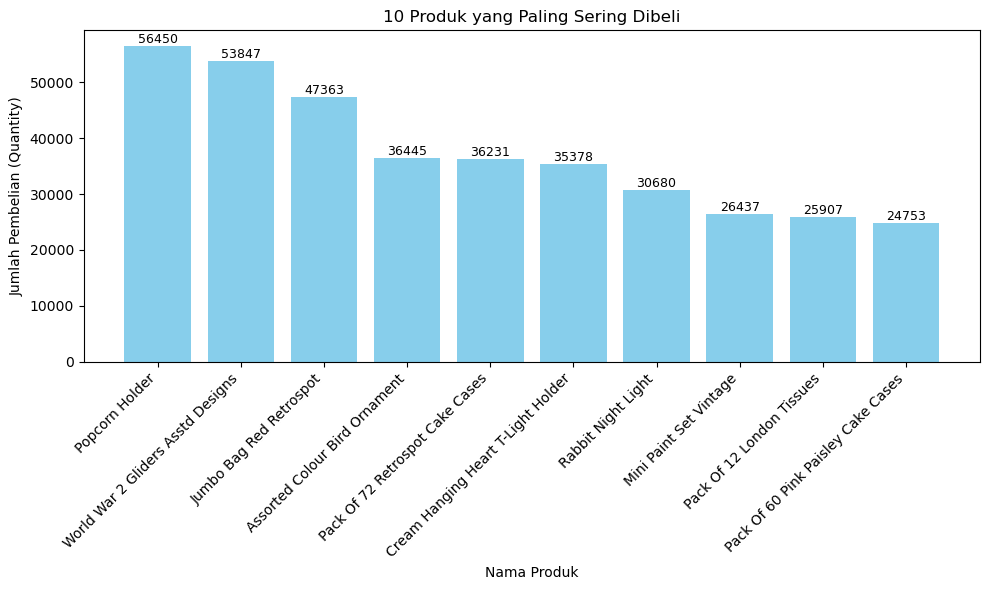

In [8]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Step 2: Hitung total pembelian per produk (berdasarkan Quantity)
product_sales = df.groupby(['ProductNo', 'ProductName'])['Quantity'].sum().reset_index()

# Step 3: Urutkan produk berdasarkan jumlah pembelian tertinggi
product_sales_sorted = product_sales.sort_values(by='Quantity', ascending=False)

# Step 4: Visualisasi menggunakan diagram batang
plt.figure(figsize=(10, 6))

# Plotting
bars = plt.bar(product_sales_sorted['ProductName'][:10], product_sales_sorted['Quantity'][:10], color='skyblue')

# Menambahkan keterangan pada setiap batang
for bar in bars:
    # Ambil posisi X dan Y dari setiap batang
    yval = bar.get_height()  # Mengambil tinggi batang (jumlah Quantity)
    # Menambahkan teks di atas batang
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval}', ha='center', va='bottom', fontsize=9)

# Menambahkan keterangan pada grafik
plt.title('10 Produk yang Paling Sering Dibeli')
plt.xlabel('Nama Produk')
plt.ylabel('Jumlah Pembelian (Quantity)')
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks untuk tampilan lebih baik
plt.tight_layout()

# Menampilkan grafik
plt.show()


## 3. Berapa banyak produk yang dibeli pelanggan dalam setiap transaksi?

Jumlah baris dataset: 536350
Jumlah kolom dataset: 8


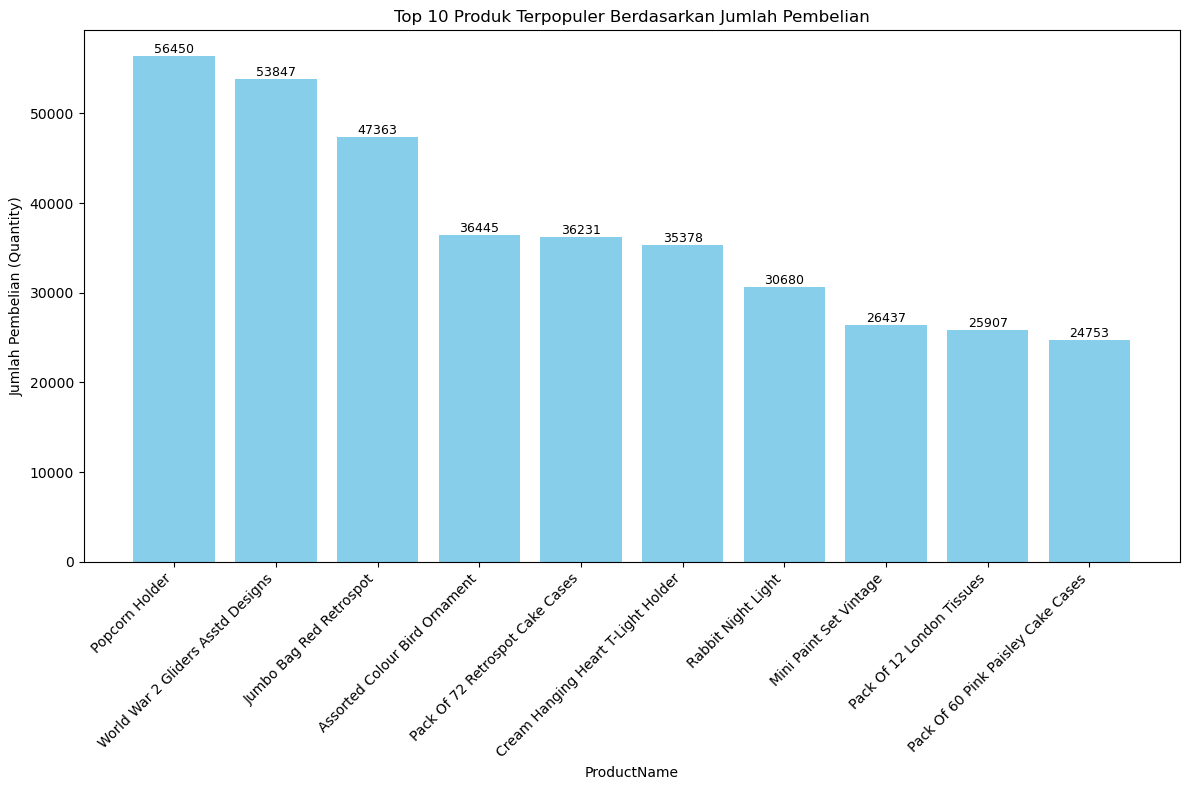

In [13]:
import pandas as pd 
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'  # Ganti dengan path file yang sesuai
df = pd.read_csv(file_path)

# Step 2: Cek ukuran dataset untuk memastikan data tidak terlalu besar
print(f"Jumlah baris dataset: {len(df)}")
print(f"Jumlah kolom dataset: {df.shape[1]}")

# Step 3: Mengelompokkan data berdasarkan 'ProductName' dan menghitung jumlah 'Quantity'
product_sales = df.groupby('ProductName')['Quantity'].sum().reset_index()

# Step 4: Urutkan produk berdasarkan jumlah pembelian terbanyak dan pilih 10 produk terpopuler
product_sales_sorted = product_sales.sort_values(by='Quantity', ascending=False).head(10)

# Step 5: Visualisasi menggunakan diagram batang
plt.figure(figsize=(12, 8))

# Plotting batang
bars = plt.bar(product_sales_sorted['ProductName'], product_sales_sorted['Quantity'], color='skyblue')

# Menambahkan keterangan angka pada setiap batang (jumlah pembelian)
for bar in bars:
    yval = bar.get_height()  # Mengambil tinggi batang (jumlah Quantity)
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval}', ha='center', va='bottom', fontsize=9)

# Menambahkan keterangan pada grafik
plt.title('Top 10 Produk Terpopuler Berdasarkan Jumlah Pembelian')
plt.xlabel('ProductName')
plt.ylabel('Jumlah Pembelian (Quantity)')
plt.xticks(rotation=45, ha='right')  # Rotate x-ticks untuk tampilan lebih baik
plt.tight_layout()

# Menampilkan grafik
plt.show()


## 4. Segmen pelanggan mana yang paling menguntungkan?

Country      Profit Profit_formatted
36  United Kingdom  4976085.04    $4,976,085.04
24     Netherlands   204278.73      $204,278.73
10            EIRE   155859.92      $155,859.92
13          France   135297.95      $135,297.95
14         Germany   129406.14      $129,406.14
0        Australia   120348.21      $120,348.21
32          Sweden    61585.90       $61,585.90
20           Japan    33110.73       $33,110.73
33     Switzerland    32336.20       $32,336.20
31           Spain    31287.40       $31,287.40

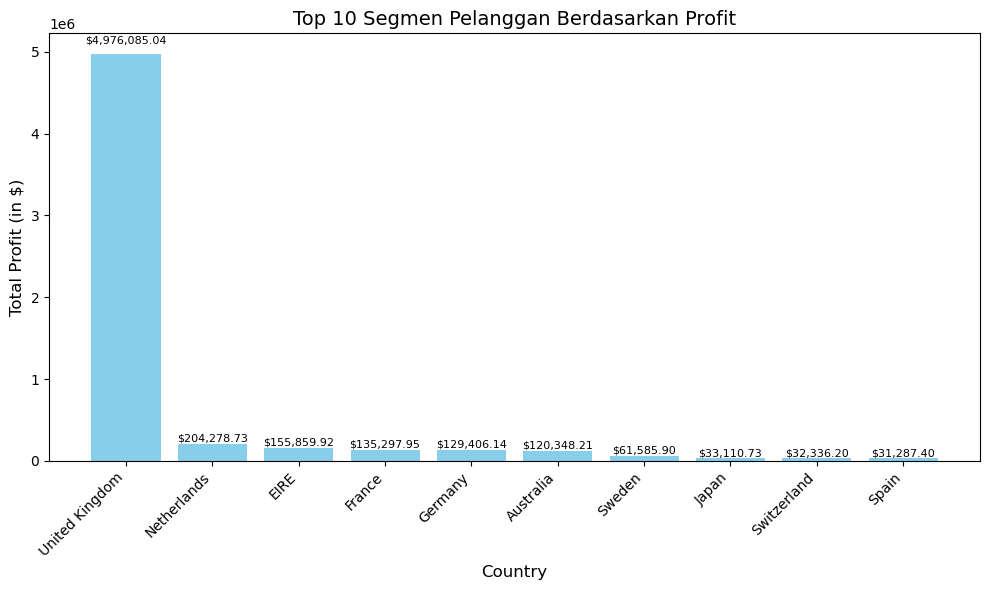

In [23]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

# Load the dataset
file_path = 'SalesTransactionv4a-230918-164139.csv'
df = pd.read_csv(file_path)

# Periksa dan optimalkan tipe data
df['Price'] = pd.to_numeric(df['Price'], downcast='float')
df['Quantity'] = pd.to_numeric(df['Quantity'], downcast='integer')
df['Country'] = df['Country'].astype('category')
df['CustomerNo'] = df['CustomerNo'].astype('category')

# Menghapus baris dengan NaN pada kolom tertentu (jika ada)
df = df.dropna(subset=['Country', 'CustomerNo', 'Price', 'Quantity'])

# Membuat kolom Profit
df['Profit'] = df['Price'] * df['Quantity']

# Ambil sample 10% data
df_sample = df.sample(frac=0.1, random_state=42)

# Mengelompokkan data berdasarkan Country, menghitung total profit per segmen
# Menambahkan parameter observed=False untuk menghindari warning FutureWarning
segmen_keuntungan = df_sample.groupby('Country', observed=False)['Profit'].sum().reset_index()

# Urutkan berdasarkan total profit, dari yang tertinggi
segmen_keuntungan = segmen_keuntungan.sort_values(by='Profit', ascending=False)

# Ambil 10 segmen teratas berdasarkan keuntungan
top_10_segmen = segmen_keuntungan.head(10)

# Pastikan Profit tetap sebagai numerik (float), lalu format Profit dalam Dollar setelahnya
top_10_segmen = top_10_segmen.copy()  # Pastikan kita bekerja dengan salinan eksplisit, bukan view

# Menggunakan .loc[] untuk mengubah nilai di DataFrame
top_10_segmen.loc[:, 'Profit'] = top_10_segmen['Profit'].apply(lambda x: round(x, 2))  # Pastikan angka tetap float

# Tampilkan tabel dengan format mata uang menggunakan .style.format (setelah Profit numerik)
top_10_segmen['Profit_formatted'] = top_10_segmen['Profit'].apply(lambda x: f"${x:,.2f}")  # Format Profit dalam Dollar
display(top_10_segmen)

# Visualisasi Diagram Batang dengan Mata Uang Dollar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_segmen['Country'], 
               top_10_segmen['Profit'],  # Gunakan nilai Profit yang numerik untuk plotting
               color='skyblue')

# Menambahkan angka di atas setiap batang dengan format dollar
for bar in bars:
    yval = bar.get_height()
    
    # Pengecekan khusus untuk United Kingdom untuk menyesuaikan jarak angka
    if bar.get_x() + bar.get_width() / 2 == bars[0].get_x() + bars[0].get_width() / 2:  # Cek untuk UK
        offset = 0.02  # Lebih dekat dengan batang untuk United Kingdom
    else:
        offset = 0.05  # Jarak standar untuk negara lain
    
    # Menambahkan angka dengan sedikit offset di atas batang
    plt.text(bar.get_x() + bar.get_width() / 2, yval + (yval * offset),  
             f'${yval:,.2f}', ha='center', va='bottom', fontsize=8)

# Menambahkan judul dan label
plt.title('Top 10 Segmen Pelanggan Berdasarkan Profit', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Profit (in $)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Tampilkan plot
plt.show()
